## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3         X4         Y
0  26.008507   563.105411  0.745682   4.446892  1.707981
1  78.972096   128.740483  0.223314   3.375202  0.384966
2  94.776083   912.004344  0.497290   6.628949  1.504725
3  55.171535   358.253161  0.617669  10.725685  1.481357
4  43.859095  1624.874654  0.794380   2.177255  1.573073


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[-0.1493],
        [-0.6332],
        [-1.1297],
        [ 0.3883],
        [-3.5232],
        [-0.3110],
        [-0.9454],
        [-0.7197],
        [ 0.0441],
        [-2.5742],
        [-0.7897],
        [-1.9255],
        [-0.3910],
        [-0.5077],
        [-0.5587],
        [-0.8827],
        [-0.1858],
        [-0.4255],
        [-1.3473],
        [ 0.2751],
        [-0.8932],
        [-0.4026],
        [-0.7356],
        [-0.1055],
        [-0.2533],
        [-0.8816],
        [-1.8170],
        [-0.1877],
        [-0.3560],
        [-0.0699],
        [-0.5419],
        [-1.0376]], grad_fn=<MmBackward>)
tensor([[-1.0851],
        [-0.6020],
        [-1.4607],
        [-0.6863],
        [-3.2269],
        [-0.1934],
        [ 0.6425],
        [-0.4402],
        [-0.1936],
        [-0.7301],
        [-1.3078],
        [-1.2578],
        [-0.1673],
        [-0.4737],
        [ 0.0778],
        [-0.4652],
        [-0.6362],
        [-0.2278],
        [-0.8920],
        

tensor([[-4.8936e-01],
        [ 1.7587e-03],
        [-3.9262e-01],
        [-1.9903e-01],
        [-2.0759e-01],
        [-1.3187e+00],
        [-3.2137e-01],
        [-2.4620e+00],
        [-1.6835e+00],
        [-7.4639e-01],
        [ 4.3807e-01],
        [-1.0607e+00],
        [-5.9248e-01],
        [-1.6976e-01],
        [-1.1326e+00],
        [-3.6331e-01],
        [-1.7805e+00],
        [ 8.0832e-01],
        [-7.5320e-01],
        [-2.2048e-01],
        [-2.8938e-01],
        [-6.1996e-01],
        [-1.6044e-01],
        [-1.3524e-01],
        [-9.2242e-01],
        [-6.5234e-01],
        [ 2.1883e-01],
        [ 6.3805e-01],
        [-1.2132e+00],
        [-3.9504e-01],
        [-8.4288e-01],
        [-6.7047e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0552],
        [-0.0722],
        [-1.0292],
        [-0.2381],
        [ 0.0307],
        [-0.5568],
        [-0.6534],
        [-1.3817],
        [-1.3122],
        [-0.0497],
        [-1.5499],
        [-1.9595],
        [-0.1

tensor([[-0.9585],
        [-0.1091],
        [-0.7340],
        [-0.8070],
        [-0.7168],
        [-0.0826],
        [-0.1469],
        [ 0.4592],
        [-0.0112],
        [ 0.1221],
        [-0.0431],
        [-0.2104],
        [-0.2656],
        [-0.0521],
        [ 0.0364],
        [-0.0105],
        [-1.5429],
        [-0.5148],
        [ 0.3562],
        [-0.0817],
        [-0.4926],
        [-0.0574],
        [-0.3607],
        [-0.7179],
        [-0.1280],
        [ 0.1723],
        [-1.1787],
        [-2.4126],
        [-1.3228],
        [-0.0613],
        [-1.0041],
        [-0.5334]], grad_fn=<MmBackward>)
tensor([[-0.0332],
        [-0.0744],
        [ 0.4090],
        [-0.5490],
        [-1.0299],
        [ 0.0252],
        [-0.4397],
        [-0.0837],
        [-0.0916],
        [-0.7521],
        [-1.0580],
        [ 0.4162],
        [-0.0053],
        [-1.4529],
        [-0.8645],
        [-3.9135],
        [-0.4300],
        [-0.2172],
        [ 1.7197],
        

tensor([[-1.1258],
        [-0.2756],
        [-0.0276],
        [-0.2298],
        [-0.0188],
        [-1.4756],
        [-0.0113],
        [-0.1866],
        [-0.2460],
        [-0.4434],
        [-3.7998],
        [-0.0685],
        [ 0.6360],
        [-0.3996],
        [-0.0854],
        [-0.3436],
        [-0.4761],
        [ 0.0594],
        [ 1.2551],
        [ 0.7325],
        [ 0.1525],
        [ 0.4449],
        [-0.3125],
        [-0.5094],
        [ 0.4036],
        [ 0.1671],
        [-0.0909],
        [ 0.0851],
        [-0.5027],
        [ 0.0354],
        [-0.4218],
        [ 0.0491]], grad_fn=<MmBackward>)
tensor([[-0.9501],
        [-0.2624],
        [-0.7391],
        [ 0.0218],
        [-0.2691],
        [-1.0848],
        [ 0.0622],
        [-0.0882],
        [-0.1005],
        [-0.0128],
        [-3.3976],
        [-0.8065],
        [-1.1157],
        [ 0.5511],
        [-0.2679],
        [ 0.1105],
        [-0.8532],
        [-0.1951],
        [ 1.7099],
        

tensor([[ 0.4107],
        [ 0.1108],
        [ 0.0014],
        [-0.7746],
        [ 0.6298],
        [ 0.2837],
        [-0.2244],
        [ 0.2217],
        [-0.5230],
        [ 0.9910],
        [ 0.1042],
        [-0.0874],
        [-0.3589],
        [ 0.1040],
        [ 0.0504],
        [-0.7165],
        [ 0.1896],
        [ 0.6062],
        [-0.8910],
        [ 0.2332],
        [-0.3420],
        [-0.0293],
        [-0.0154],
        [-0.0706],
        [-0.4937],
        [ 0.5667],
        [-0.0457],
        [ 0.1615],
        [-1.1490],
        [ 0.0171],
        [-0.5803],
        [-0.1557]], grad_fn=<MmBackward>)
tensor([[ 0.1235],
        [-0.4288],
        [ 0.2614],
        [-1.4263],
        [ 0.1180],
        [-0.6823],
        [ 0.6045],
        [-0.5134],
        [-0.3710],
        [-0.0440],
        [-0.0158],
        [ 0.0730],
        [ 0.2340],
        [ 0.2765],
        [ 0.1654],
        [ 0.2827]], grad_fn=<MmBackward>)
tensor([[-0.2763],
        [ 0.2186],
    

tensor([[ 0.4507],
        [-0.0097],
        [-0.4528],
        [ 0.0870],
        [ 0.0044],
        [-0.1525],
        [ 0.2326],
        [-0.7525],
        [ 1.8293],
        [-0.0249],
        [ 0.8120],
        [-0.1835],
        [ 0.0715],
        [-0.1207],
        [ 0.0297],
        [-0.5695],
        [ 0.2042],
        [ 0.6537],
        [-0.2487],
        [ 0.0537],
        [-0.0096],
        [-0.3259],
        [ 0.0505],
        [-0.1896],
        [-0.8079],
        [-0.0190],
        [-0.1707],
        [ 0.6269],
        [-0.4149],
        [-0.4073],
        [-0.9733],
        [-0.5647]], grad_fn=<MmBackward>)
tensor([[ 0.1402],
        [-0.2282],
        [-0.7702],
        [-0.1358],
        [ 0.2039],
        [-0.5726],
        [-0.1207],
        [-0.3728],
        [ 1.9220],
        [ 0.0175],
        [-1.3751],
        [ 0.1688],
        [ 0.0380],
        [-0.1734],
        [-0.1864],
        [-0.0212],
        [-0.0447],
        [-0.4857],
        [ 0.4855],
        

tensor([[-0.6609],
        [-0.0165],
        [ 0.7033],
        [ 0.1283],
        [-0.4403],
        [ 0.0518],
        [-0.0746],
        [ 0.0915],
        [ 0.0245],
        [ 0.5983],
        [ 0.2123],
        [-0.1095],
        [ 2.1132],
        [ 0.1810],
        [ 0.0184],
        [-1.1418]], grad_fn=<MmBackward>)
tensor([[ 0.2914],
        [-0.6795],
        [ 0.6451],
        [ 0.3706],
        [ 0.6453],
        [ 0.1975],
        [-0.0529],
        [ 0.3685],
        [ 0.9402],
        [ 0.0140],
        [ 0.0299],
        [ 0.2729],
        [ 0.2782],
        [ 0.0703],
        [-0.1346],
        [-0.7984]], grad_fn=<MmBackward>)
tensor([[-0.5113],
        [ 1.9214],
        [-0.4258],
        [ 0.0483],
        [-0.3595],
        [ 0.3194],
        [ 0.1563],
        [ 1.8926],
        [ 0.1361],
        [-0.1151],
        [ 0.5987],
        [ 0.8478],
        [ 0.3375],
        [-0.0848],
        [ 0.0236],
        [-0.2024],
        [ 0.0610],
        [ 0.2866],
    

tensor([[ 0.0279],
        [ 0.2055],
        [ 0.0079],
        [ 1.9896],
        [ 0.8822],
        [-1.0607],
        [-0.1938],
        [ 0.0103],
        [ 0.3448],
        [-0.3652],
        [ 0.4124],
        [-0.1191],
        [-0.2262],
        [-0.1026],
        [ 1.0428],
        [ 1.2691]], grad_fn=<MmBackward>)
tensor([[ 0.1732],
        [ 0.9871],
        [ 0.1748],
        [-0.2455],
        [ 0.4361],
        [ 0.5500],
        [ 0.1627],
        [-0.0134],
        [ 0.3157],
        [-0.1195],
        [ 0.2634],
        [ 0.3069],
        [ 0.0156],
        [ 0.3224],
        [ 0.6488],
        [-0.0490],
        [ 0.3439],
        [ 0.7480],
        [ 0.0780],
        [ 0.2858],
        [ 0.5099],
        [ 2.0137],
        [-0.0328],
        [-0.3915],
        [-0.7459],
        [ 0.0757],
        [ 0.5756],
        [-1.7537],
        [ 0.2982],
        [ 0.3806],
        [ 0.3999],
        [ 0.0657]], grad_fn=<MmBackward>)
tensor([[ 0.4244],
        [ 0.0887],
    

tensor([[ 0.4337],
        [ 0.8640],
        [ 0.4479],
        [ 0.7259],
        [ 0.0991],
        [ 0.7765],
        [ 0.2761],
        [ 0.3144],
        [ 0.0275],
        [-0.1147],
        [ 0.1145],
        [ 0.1515],
        [-0.1635],
        [-2.0718],
        [ 1.0831],
        [ 0.3378],
        [ 0.3152],
        [ 0.3336],
        [ 0.1968],
        [-0.1745],
        [ 0.2668],
        [ 0.9099],
        [ 0.2639],
        [ 0.6061],
        [ 2.2594],
        [-0.4677],
        [-0.6054],
        [ 0.1190],
        [ 0.1228],
        [ 1.0397],
        [ 0.3390],
        [ 2.3630]], grad_fn=<MmBackward>)
tensor([[ 1.0993],
        [ 0.1846],
        [ 0.2684],
        [ 0.6935],
        [ 0.1981],
        [ 0.5379],
        [ 0.3418],
        [ 0.2430],
        [ 1.1355],
        [ 0.0488],
        [ 0.4116],
        [-0.1838],
        [ 0.1350],
        [-1.1000],
        [-0.0634],
        [ 0.3071],
        [ 0.4611],
        [ 0.4397],
        [ 1.6395],
        

tensor([[ 0.2143],
        [ 0.7497],
        [-0.2563],
        [-0.8696],
        [ 0.3120],
        [ 0.1550],
        [ 2.2610],
        [ 0.3958],
        [-1.3244],
        [-1.2438],
        [ 0.1485],
        [ 0.6172],
        [-0.0124],
        [ 0.2655],
        [ 0.0804],
        [ 0.6773],
        [ 2.1063],
        [ 0.2762],
        [ 0.2942],
        [ 0.4423],
        [ 0.4894],
        [-0.6657],
        [ 0.7971],
        [-0.6277],
        [-0.1515],
        [ 0.0809],
        [ 3.0461],
        [ 0.0651],
        [ 0.2494],
        [ 0.1388],
        [ 0.1938],
        [-0.1857]], grad_fn=<MmBackward>)
tensor([[ 0.3064],
        [ 0.2096],
        [-1.6966],
        [ 0.5248],
        [ 0.9402],
        [ 0.7861],
        [ 0.2763],
        [ 0.2422],
        [ 0.0268],
        [-0.4215],
        [ 0.2327],
        [ 0.5683],
        [-0.1583],
        [ 0.1200],
        [ 0.4546],
        [ 0.3834],
        [ 0.0418],
        [ 0.5054],
        [ 2.0542],
        

tensor([[ 0.1540],
        [ 0.5244],
        [ 0.9281],
        [ 0.3416],
        [ 0.0659],
        [-0.2475],
        [ 0.2050],
        [ 1.7167],
        [ 0.0335],
        [ 1.0214],
        [ 0.5180],
        [ 0.1426],
        [ 0.9303],
        [ 0.6333],
        [ 0.2190],
        [ 0.0440],
        [ 0.1280],
        [ 2.3810],
        [ 0.1266],
        [ 0.2156],
        [ 0.1469],
        [ 0.5298],
        [ 4.2861],
        [-0.4689],
        [ 0.3718],
        [ 0.4980],
        [ 0.4198],
        [-2.6975],
        [ 0.0386],
        [-1.8705],
        [ 0.1012],
        [-2.8738]], grad_fn=<MmBackward>)
tensor([[ 0.1490],
        [-0.0105],
        [-0.6209],
        [ 0.1965],
        [ 0.6141],
        [ 0.0507],
        [ 0.4448],
        [-0.1040],
        [-1.0866],
        [ 0.9524],
        [-0.2240],
        [ 1.0275],
        [ 0.1392],
        [ 0.8725],
        [ 0.4532],
        [ 0.6678],
        [ 0.3976],
        [ 0.2647],
        [ 0.7616],
        

tensor([[ 0.1556],
        [ 1.2703],
        [ 0.3259],
        [-1.0977],
        [ 0.4921],
        [ 1.3581],
        [ 0.5455],
        [ 0.5505],
        [-0.1214],
        [ 1.2103],
        [-0.9523],
        [ 0.0629],
        [ 0.5616],
        [ 0.1117],
        [-0.9085],
        [ 0.4479],
        [ 1.5210],
        [ 1.7225],
        [ 0.3665],
        [-2.3737],
        [ 0.3348],
        [ 0.7055],
        [ 0.0192],
        [ 1.5432],
        [-0.1630],
        [ 0.1696],
        [ 0.0794],
        [-3.2036],
        [-0.1478],
        [ 1.3638],
        [ 1.1073],
        [ 0.3356]], grad_fn=<MmBackward>)
tensor([[ 0.2389],
        [ 1.0958],
        [-0.1670],
        [-1.4926],
        [ 0.6288],
        [ 0.0582],
        [-0.3590],
        [ 0.3338],
        [ 0.0475],
        [ 1.4015],
        [-0.8888],
        [ 0.3834],
        [ 1.3635],
        [ 0.0971],
        [-1.1914],
        [ 0.0682],
        [ 1.1075],
        [ 0.5535],
        [ 0.5891],
        

tensor([[ 0.3205],
        [-0.2529],
        [ 0.2403],
        [ 1.1351],
        [ 0.8329],
        [-0.0198],
        [-0.7135],
        [ 0.7664],
        [-0.0412],
        [ 2.3263],
        [-0.9626],
        [ 0.1872],
        [ 0.3661],
        [ 0.0976],
        [-0.0533],
        [ 0.0547],
        [-3.8868],
        [-0.1244],
        [-1.7221],
        [-0.7797],
        [ 0.5077],
        [ 2.7594],
        [-0.3334],
        [ 0.9418],
        [ 0.5146],
        [ 0.1182],
        [-0.2814],
        [ 0.0521],
        [ 0.1578],
        [ 1.4197],
        [ 0.5363],
        [-0.6347]], grad_fn=<MmBackward>)
tensor([[-0.0085],
        [-3.3879],
        [ 1.0871],
        [ 0.9134],
        [ 0.6067],
        [ 0.4118],
        [ 0.9360],
        [-3.3417],
        [-0.0678],
        [ 0.2675],
        [ 0.8886],
        [ 0.4733],
        [ 0.7411],
        [ 0.2281],
        [ 0.4125],
        [ 0.4949]], grad_fn=<MmBackward>)
tensor([[ 0.1266],
        [ 0.7433],
    

tensor([[-0.0375],
        [ 0.6021],
        [-0.2262],
        [ 0.0572],
        [-3.0304],
        [-1.3962],
        [-0.3185],
        [ 0.2165],
        [ 0.3597],
        [ 0.1207],
        [ 0.3000],
        [ 1.2723],
        [ 0.9439],
        [-0.1083],
        [ 1.3791],
        [-2.0343]], grad_fn=<MmBackward>)
tensor([[ 0.3680],
        [ 0.0030],
        [-0.4882],
        [-0.3691],
        [-2.1907],
        [-2.8774],
        [ 1.1563],
        [-0.1460],
        [ 0.4262],
        [ 0.0653],
        [-0.1891],
        [ 0.9604],
        [ 0.5021],
        [-0.0453],
        [ 2.6186],
        [-0.8077]], grad_fn=<MmBackward>)
tensor([[-0.0148],
        [ 1.7314],
        [-2.7925],
        [ 2.5443],
        [ 0.8143],
        [-0.3665],
        [ 1.6867],
        [-0.2300],
        [-2.2785],
        [-0.0744],
        [ 0.0074],
        [ 1.0584],
        [ 0.2321],
        [-0.2107],
        [-0.4668],
        [-2.1289],
        [ 0.3049],
        [ 0.9820],
    

tensor([[ 0.6317],
        [ 0.6433],
        [-2.5684],
        [-5.8787],
        [ 0.1495],
        [ 1.6674],
        [ 0.1024],
        [-0.0412],
        [ 0.0490],
        [ 0.2621],
        [-1.9942],
        [ 0.4072],
        [ 0.3238],
        [ 0.3836],
        [ 0.7102],
        [-0.5995]], grad_fn=<MmBackward>)
tensor([[ 0.8621],
        [-0.0668],
        [-2.4532],
        [-5.4801],
        [ 0.1297],
        [ 1.4691],
        [ 0.1407],
        [ 0.4051],
        [-0.2358],
        [ 0.3084],
        [-2.2291],
        [ 0.3773],
        [ 0.2586],
        [-0.1554],
        [ 1.1728],
        [ 0.4101]], grad_fn=<MmBackward>)
tensor([[ 3.4633e-01],
        [ 1.2140e-01],
        [-8.1891e-02],
        [ 1.0941e+00],
        [ 5.6641e-01],
        [ 5.5604e-02],
        [-1.7364e+00],
        [ 1.1266e+00],
        [-4.5495e-02],
        [ 2.5220e-02],
        [ 6.8020e-01],
        [-2.5895e-03],
        [ 3.9039e-01],
        [ 7.9114e-01],
        [ 8.3017e-02],
 

tensor([[-2.5096],
        [ 1.0765],
        [-3.4254],
        [ 0.5086],
        [-0.0079],
        [ 0.3487],
        [ 0.6468],
        [-0.9243],
        [ 0.0844],
        [ 0.1239],
        [ 1.1532],
        [ 0.3503],
        [-0.1305],
        [ 0.2333],
        [-3.9263],
        [ 0.6132]], grad_fn=<MmBackward>)
tensor([[-3.5710e+00],
        [-4.6567e-01],
        [-3.6922e+00],
        [-4.5444e-02],
        [ 1.0547e+00],
        [ 3.9735e-01],
        [ 3.0638e-03],
        [ 2.1736e+00],
        [-2.1904e+00],
        [ 7.7186e-01],
        [-1.6382e-01],
        [ 7.3124e-01],
        [ 1.0229e-01],
        [-7.1481e-02],
        [ 2.0272e+00],
        [ 6.6736e-01],
        [-9.3201e-02],
        [ 4.5855e-01],
        [ 7.7303e-01],
        [-3.4748e-01],
        [ 1.7462e-01],
        [-3.3456e+00],
        [ 1.5938e-01],
        [-2.5905e-01],
        [ 9.2789e-02],
        [ 4.0801e-02],
        [-3.4103e+00],
        [ 9.8880e-01],
        [-1.8591e+00],
      

tensor([[-1.2291e-01],
        [-6.7139e+00],
        [ 3.0317e-01],
        [-3.7745e+00],
        [ 3.9972e-01],
        [ 3.1831e-01],
        [ 6.1351e-01],
        [ 3.8142e-01],
        [ 4.9066e-02],
        [-1.9643e-01],
        [ 3.0166e-01],
        [ 4.9574e-01],
        [ 3.7773e-01],
        [-3.9523e+00],
        [ 7.9133e-01],
        [ 1.2432e+00],
        [ 1.6022e+00],
        [ 1.0690e+00],
        [ 6.8708e-02],
        [-1.2561e-01],
        [ 7.3087e-01],
        [-6.3598e-03],
        [ 1.9863e-01],
        [-7.2956e-02],
        [ 3.0075e-01],
        [ 8.4449e-01],
        [-5.2687e-01],
        [ 1.6800e+00],
        [-3.2357e-01],
        [-4.5481e+00],
        [ 4.1636e-01],
        [ 1.5814e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6625],
        [-6.5166],
        [ 0.7057],
        [-3.1678],
        [ 0.1103],
        [-0.1457],
        [ 0.6785],
        [ 0.2790],
        [-0.1000],
        [ 1.5687],
        [ 0.0981],
        [ 0.0185],
        [ 0.2

tensor([[ 0.4187],
        [ 1.4938],
        [-2.4412],
        [ 0.4122],
        [ 1.0097],
        [ 0.1426],
        [-1.6996],
        [-3.4213],
        [ 0.8465],
        [ 0.0436],
        [ 0.6258],
        [ 0.0834],
        [-3.0031],
        [-0.7225],
        [ 0.1933],
        [ 0.1182],
        [-5.0654],
        [ 1.9347],
        [-0.1180],
        [ 0.3919],
        [ 0.1201],
        [ 0.2794],
        [-2.1731],
        [ 1.3082],
        [ 0.2093],
        [ 0.5020],
        [ 0.7606],
        [-1.7678],
        [ 1.1842],
        [ 0.1761],
        [ 0.8060],
        [ 1.0984]], grad_fn=<MmBackward>)
tensor([[-5.2890],
        [ 0.6439],
        [ 0.1996],
        [ 2.1650],
        [-0.0600],
        [ 0.7909],
        [ 0.7961],
        [-2.0343],
        [ 1.9788],
        [ 0.2514],
        [-1.0567],
        [-0.1588],
        [-0.2751],
        [-0.8736],
        [ 0.1634],
        [-0.3456],
        [-0.2315],
        [ 1.3630],
        [-3.5989],
        

tensor([[-0.2369],
        [ 0.4175],
        [ 0.3724],
        [ 1.0612],
        [ 0.2594],
        [ 0.4080],
        [-4.8381],
        [-3.9858],
        [ 0.9619],
        [ 0.8513],
        [ 1.3823],
        [-0.3618],
        [-0.2949],
        [ 1.0214],
        [ 0.0712],
        [ 0.1789],
        [-3.2967],
        [ 1.0704],
        [ 0.2403],
        [-4.0141],
        [ 0.3291],
        [ 0.1248],
        [ 0.4860],
        [ 0.4679],
        [ 0.4676],
        [ 0.1225],
        [-0.1908],
        [ 0.3913],
        [-0.0690],
        [ 0.2545],
        [ 0.9310],
        [ 0.6331]], grad_fn=<MmBackward>)
tensor([[ 1.0680e-01],
        [ 5.3490e-03],
        [ 6.2022e-02],
        [ 3.1666e-01],
        [ 2.2216e-01],
        [ 6.5161e-01],
        [-6.4448e+00],
        [-3.0767e+00],
        [ 1.0554e-01],
        [ 8.3013e-01],
        [ 9.2680e-01],
        [ 3.9889e-01],
        [ 7.7654e-01],
        [ 5.1932e-01],
        [ 7.0007e-01],
        [ 4.1785e-01],
 

tensor([[ 1.3552],
        [ 0.3737],
        [ 0.1913],
        [-0.0308],
        [ 0.5113],
        [ 0.8154],
        [-0.2017],
        [ 0.0336],
        [ 0.4755],
        [ 0.2271],
        [ 0.6561],
        [ 0.1410],
        [ 1.2695],
        [-0.6873],
        [-0.7066],
        [ 0.0092],
        [ 0.2825],
        [-3.1825],
        [ 1.0390],
        [ 0.3555],
        [-3.4311],
        [ 1.6245],
        [ 0.2448],
        [ 0.5702],
        [ 0.5337],
        [-5.4930],
        [-0.1152],
        [ 0.1621],
        [ 0.3691],
        [ 0.1537],
        [ 0.0988],
        [ 0.3731]], grad_fn=<MmBackward>)
tensor([[ 1.2636],
        [ 0.0703],
        [ 1.2208],
        [-0.1830],
        [ 0.5016],
        [ 1.4753],
        [-0.2765],
        [ 0.1105],
        [ 0.4340],
        [ 0.3359],
        [-0.0766],
        [ 0.4812],
        [ 0.5168],
        [-0.0243],
        [-4.1269],
        [ 0.0608],
        [ 0.5255],
        [-2.1790],
        [ 0.9448],
        

tensor([[ 0.6398],
        [ 1.5356],
        [ 0.6228],
        [ 1.2940],
        [ 0.3550],
        [-1.8869],
        [-0.1631],
        [-0.1445],
        [ 0.0667],
        [-0.7033],
        [-3.1609],
        [ 1.1951],
        [ 0.4600],
        [-0.4064],
        [ 1.0118],
        [ 0.9126]], grad_fn=<MmBackward>)
tensor([[ 0.4718],
        [ 0.7466],
        [ 0.8355],
        [ 1.0167],
        [ 0.4987],
        [-1.9621],
        [-0.3077],
        [-0.0136],
        [-0.4114],
        [ 0.2948],
        [-2.3589],
        [ 1.1281],
        [ 0.7515],
        [-0.8342],
        [ 0.7738],
        [ 0.7287]], grad_fn=<MmBackward>)
tensor([[-3.0061],
        [-1.2403],
        [ 0.4162],
        [ 0.5371],
        [ 0.8488],
        [ 0.0720],
        [-1.7973],
        [-0.9828],
        [ 0.7074],
        [ 0.7580],
        [-0.6940],
        [ 1.0680],
        [ 0.4015],
        [ 0.7684],
        [ 0.5038],
        [ 0.4914],
        [ 0.3797],
        [ 0.2334],
    

tensor([[-0.0054],
        [-0.2299],
        [ 0.8565],
        [ 0.5743],
        [ 0.4845],
        [-0.6176],
        [ 1.6754],
        [-0.1257],
        [ 0.2697],
        [ 0.8762],
        [-0.1896],
        [ 0.3235],
        [-2.0738],
        [-2.7766],
        [ 0.1513],
        [ 0.9651]], grad_fn=<MmBackward>)
tensor([[ 0.3636],
        [ 1.7919],
        [ 1.8888],
        [ 0.0880],
        [ 1.0429],
        [ 0.0607],
        [-1.5101],
        [ 0.5430],
        [-1.0023],
        [ 0.2005],
        [ 0.3291],
        [ 0.8903],
        [-1.0567],
        [ 1.1064],
        [-0.9437],
        [-1.0540],
        [ 0.2585],
        [-1.9749],
        [ 0.2105],
        [ 0.7611],
        [ 0.5141],
        [ 0.3887],
        [ 1.1238],
        [-0.0343],
        [-2.4365],
        [-2.0182],
        [ 0.8036],
        [-1.2750],
        [ 1.6598],
        [ 0.7514],
        [ 0.3387],
        [ 0.0363]], grad_fn=<MmBackward>)
tensor([[ 2.6482],
        [-0.6370],
    

tensor([[ 0.4255],
        [-0.7586],
        [-0.9249],
        [ 1.1648],
        [ 0.4666],
        [ 0.2150],
        [ 0.6751],
        [-0.2767],
        [-2.9048],
        [ 0.0203],
        [-2.8510],
        [ 0.5188],
        [-0.1795],
        [ 1.3829],
        [ 0.3723],
        [ 0.5166],
        [ 1.3245],
        [ 0.5041],
        [ 1.0569],
        [-0.2301],
        [-1.8059],
        [ 1.0083],
        [ 0.7747],
        [-0.0365],
        [-0.3078],
        [ 1.1198],
        [ 1.3640],
        [ 0.2221],
        [ 0.9125],
        [-1.5813],
        [ 1.2485],
        [ 1.0662]], grad_fn=<MmBackward>)
tensor([[ 0.2474],
        [-0.3760],
        [-2.2801],
        [ 1.7411],
        [ 0.8493],
        [-1.2727],
        [ 0.6987],
        [-0.0267],
        [-2.1244],
        [-0.5564],
        [-2.6583],
        [ 0.5847],
        [-0.0671],
        [ 0.9810],
        [ 0.0557],
        [ 0.2997],
        [-0.0297],
        [ 0.6256],
        [ 1.3100],
        

tensor([[-0.1944],
        [ 0.7441],
        [-0.6023],
        [-3.2265],
        [ 0.5939],
        [-0.4418],
        [-0.5044],
        [ 1.3851],
        [ 0.5808],
        [-0.2502],
        [-3.0209],
        [ 0.3233],
        [ 1.1861],
        [ 0.3906],
        [ 0.5036],
        [ 0.7719],
        [-1.7385],
        [ 0.3112],
        [ 0.9899],
        [ 0.0749],
        [ 1.3676],
        [-0.9701],
        [ 0.1240],
        [ 0.4861],
        [ 0.5033],
        [ 0.2697],
        [-2.3528],
        [ 0.4997],
        [ 0.4141],
        [ 0.4074],
        [ 1.2015],
        [ 0.1636]], grad_fn=<MmBackward>)
tensor([[-1.5250],
        [-0.0074],
        [ 0.6283],
        [ 0.7686],
        [-1.7346],
        [ 1.3316],
        [ 0.8296],
        [-0.1736],
        [-2.4754],
        [ 1.1799],
        [ 0.6912],
        [-2.7749],
        [ 0.3230],
        [ 0.0936],
        [ 0.0073],
        [ 0.9234],
        [ 0.4546],
        [ 0.0211],
        [ 0.3408],
        

tensor([[ 1.2211],
        [-1.0313],
        [ 0.1926],
        [-4.7585],
        [ 0.7982],
        [ 0.4826],
        [ 0.0078],
        [-1.4133],
        [-2.1303],
        [ 1.0531],
        [-0.0909],
        [ 0.3934],
        [ 0.2779],
        [ 0.3321],
        [-0.0826],
        [ 0.7703],
        [-2.3826],
        [ 0.3395],
        [-0.1530],
        [-0.5349],
        [-0.1188],
        [-0.4115],
        [-0.0622],
        [-0.1315],
        [ 0.2290],
        [ 0.8042],
        [ 1.1774],
        [ 0.8508],
        [ 0.1371],
        [ 0.2301],
        [ 0.9724],
        [ 0.9284]], grad_fn=<MmBackward>)
tensor([[-2.8613],
        [ 0.6856],
        [ 0.5012],
        [ 0.8388],
        [ 0.8371],
        [-0.5192],
        [ 0.3810],
        [-0.2227],
        [-0.2531],
        [ 0.9045],
        [ 0.2437],
        [-0.7497],
        [ 0.7648],
        [ 1.6718],
        [-0.1087],
        [ 0.0837],
        [-2.6405],
        [-0.3494],
        [ 0.3838],
        

tensor([[-2.0886],
        [ 0.8924],
        [ 1.6802],
        [ 0.3549],
        [ 0.9401],
        [-0.1372],
        [ 0.6746],
        [-1.3009],
        [ 0.0416],
        [ 0.8401],
        [ 0.6367],
        [ 0.3059],
        [-2.0509],
        [-2.7265],
        [ 0.5191],
        [-0.0609],
        [ 0.3585],
        [-0.0766],
        [-0.8158],
        [ 0.0150],
        [ 0.0898],
        [-0.3164],
        [ 0.3199],
        [ 1.5250],
        [ 0.6985],
        [-2.6678],
        [-0.1852],
        [-0.2445],
        [-0.1652],
        [-0.4951],
        [ 0.0414],
        [-0.0244]], grad_fn=<MmBackward>)
tensor([[-1.4099e+00],
        [ 6.9249e-01],
        [ 1.5569e+00],
        [ 6.3145e-01],
        [ 9.3581e-01],
        [-4.1571e-02],
        [ 5.5962e-01],
        [ 7.5748e-02],
        [ 7.3960e-01],
        [ 1.1262e+00],
        [-1.2677e-01],
        [ 3.7024e-01],
        [-2.2664e+00],
        [-3.2202e+00],
        [-4.3029e-02],
        [ 1.0458e+00],
 

tensor([[ 0.5772],
        [-0.2181],
        [-0.1486],
        [-0.3274],
        [ 0.3374],
        [ 0.2254],
        [-0.0870],
        [ 1.0283],
        [-0.4499],
        [-0.2747],
        [ 1.4520],
        [-2.3093],
        [ 0.2550],
        [ 0.8933],
        [ 0.6007],
        [ 0.3089],
        [ 0.0283],
        [-2.3187],
        [-0.3737],
        [-0.0836],
        [-4.3453],
        [ 1.6876],
        [ 0.9471],
        [ 0.3787],
        [ 0.9224],
        [ 0.3779],
        [ 0.6716],
        [-0.2548],
        [-0.1275],
        [-0.2445],
        [-1.4578],
        [ 0.2825]], grad_fn=<MmBackward>)
tensor([[-3.2407],
        [ 0.7781],
        [ 0.5784],
        [ 0.4516],
        [-0.1419],
        [ 0.1303],
        [ 0.3401],
        [ 0.1593],
        [ 0.9679],
        [-0.0855],
        [-0.1406],
        [-0.0508],
        [-1.1298],
        [-0.1248],
        [ 0.9448],
        [-1.3569]], grad_fn=<MmBackward>)
tensor([[-2.5259],
        [ 0.1455],
    

tensor([[ 0.2517],
        [ 0.2420],
        [-1.4725],
        [-1.2051],
        [-0.2945],
        [-2.7500],
        [-0.5097],
        [ 0.9855],
        [ 1.0343],
        [-0.1068],
        [ 0.3307],
        [ 0.2290],
        [ 1.3910],
        [ 0.0090],
        [-0.0335],
        [ 0.7993]], grad_fn=<MmBackward>)
tensor([[-0.5055],
        [-0.1650],
        [-0.3908],
        [-0.7652],
        [ 0.0798],
        [-0.8574],
        [-0.7435],
        [ 0.9519],
        [ 1.5880],
        [-0.9981],
        [ 0.1028],
        [ 0.5636],
        [ 0.8115],
        [ 0.2942],
        [ 0.2180],
        [ 0.6710]], grad_fn=<MmBackward>)
tensor([[ 1.0342],
        [ 0.0473],
        [ 0.4240],
        [ 0.7319],
        [ 0.8674],
        [ 0.5483],
        [ 0.1619],
        [ 0.0529],
        [ 0.4126],
        [-2.2486],
        [ 0.0029],
        [ 0.1012],
        [-2.5411],
        [ 0.1478],
        [ 0.1008],
        [ 0.6248],
        [ 0.1953],
        [ 0.0820],
    

tensor([[ 0.5181],
        [ 0.1057],
        [-0.0514],
        [-0.7345],
        [-0.0045],
        [ 0.3821],
        [ 0.8589],
        [-2.6933],
        [ 0.5966],
        [-0.3746],
        [-0.2831],
        [-0.0989],
        [ 0.6794],
        [ 0.6986],
        [ 0.2595],
        [ 0.8157]], grad_fn=<MmBackward>)
tensor([[ 0.1619],
        [ 0.3767],
        [ 0.6281],
        [-1.2472],
        [ 0.6144],
        [ 0.4686],
        [ 0.8924],
        [-2.4414],
        [ 0.1992],
        [-0.1777],
        [ 0.0655],
        [ 0.3493],
        [ 0.8883],
        [ 0.0575],
        [-1.5739],
        [ 1.0231]], grad_fn=<MmBackward>)
tensor([[ 1.3808e+00],
        [ 5.0766e-01],
        [-2.0836e+00],
        [-1.0599e-02],
        [-9.3949e-01],
        [ 1.0762e+00],
        [ 3.4270e-01],
        [ 1.0306e+00],
        [ 8.2291e-01],
        [ 8.4483e-01],
        [-4.5805e-01],
        [ 8.7000e-01],
        [ 7.6280e-01],
        [ 3.8906e-01],
        [ 1.0039e+00],
 

tensor([[ 0.6988],
        [ 0.2996],
        [ 2.0876],
        [-1.8758],
        [-0.2079],
        [-1.3835],
        [-0.4976],
        [-0.2487],
        [ 1.4887],
        [ 1.0623],
        [-0.3333],
        [-1.3619],
        [ 0.5600],
        [-1.2513],
        [ 1.0696],
        [-1.0315],
        [ 0.0166],
        [ 0.5886],
        [ 1.0149],
        [ 0.3218],
        [ 0.5385],
        [ 1.2768],
        [-3.0949],
        [-0.5043],
        [ 0.9754],
        [ 0.8913],
        [ 1.1739],
        [-0.0892],
        [-0.1262],
        [-1.9120],
        [-1.1532],
        [ 0.1865]], grad_fn=<MmBackward>)
tensor([[ 0.5355],
        [ 1.4862],
        [-1.4920],
        [-0.5817],
        [-0.5417],
        [ 0.5819],
        [-0.2318],
        [ 0.1951],
        [ 1.6340],
        [-0.2355],
        [-0.8023],
        [ 1.0306],
        [ 0.7886],
        [ 0.1177],
        [-1.4174],
        [-0.5825]], grad_fn=<MmBackward>)
tensor([[ 0.1455],
        [ 1.3680],
    

tensor([[-2.1897],
        [ 0.8037],
        [-0.2252],
        [ 0.1715],
        [ 0.2168],
        [ 0.3780],
        [-0.5404],
        [-0.4717],
        [-0.0867],
        [ 0.9855],
        [ 0.5276],
        [ 0.0723],
        [ 1.2647],
        [ 0.2375],
        [-2.6665],
        [-1.7400]], grad_fn=<MmBackward>)
tensor([[-0.5050],
        [ 0.4135],
        [-0.1214],
        [-0.2085],
        [ 0.1237],
        [ 0.4441],
        [-0.6031],
        [-0.9267],
        [-0.4984],
        [ 0.9131],
        [ 0.1791],
        [-0.2120],
        [ 1.4096],
        [ 0.5984],
        [-3.0986],
        [-2.2869]], grad_fn=<MmBackward>)
tensor([[ 0.9617],
        [ 0.4506],
        [ 0.8884],
        [-0.4721],
        [ 0.4428],
        [ 0.1544],
        [ 0.6192],
        [-0.8087],
        [ 0.7328],
        [-0.4003],
        [-0.0626],
        [ 0.5730],
        [-0.9529],
        [-0.0076],
        [ 0.4099],
        [-0.7017],
        [-3.1725],
        [ 0.0051],
    

tensor([[-0.3387],
        [ 0.6622],
        [ 0.5428],
        [-0.2454],
        [-0.3812],
        [ 0.8220],
        [-0.1834],
        [ 1.4468],
        [ 0.4048],
        [-1.5223],
        [-3.1177],
        [ 0.5328],
        [ 0.3169],
        [-1.8901],
        [ 0.6773],
        [ 0.1843]], grad_fn=<MmBackward>)
tensor([[-1.0947],
        [ 1.0012],
        [ 0.7202],
        [ 0.0897],
        [ 1.2627],
        [ 1.0461],
        [ 0.3011],
        [-0.9105],
        [ 0.5263],
        [-0.7976],
        [ 1.1810],
        [-2.0006],
        [-1.6296],
        [ 0.3943],
        [-1.5791],
        [ 0.5816],
        [-1.8623],
        [ 0.1190],
        [-0.6904],
        [-0.3552],
        [ 0.1700],
        [ 0.3649],
        [ 0.6212],
        [-1.6488],
        [ 0.7301],
        [ 0.6189],
        [-0.0281],
        [ 0.7083],
        [-0.1870],
        [-0.7456],
        [ 0.3339],
        [ 0.2695]], grad_fn=<MmBackward>)
tensor([[-1.4730],
        [ 1.8363],
    

tensor([[ 0.0195],
        [ 0.5487],
        [ 0.2373],
        [ 0.1097],
        [ 1.0280],
        [ 0.7238],
        [-0.1965],
        [ 0.7466],
        [ 0.5828],
        [ 1.1660],
        [-0.6270],
        [-0.3256],
        [-0.1955],
        [ 0.0857],
        [-1.7710],
        [ 0.1311],
        [ 0.2162],
        [ 0.8795],
        [-1.3816],
        [-0.0834],
        [-0.9553],
        [ 0.9601],
        [-3.5908],
        [ 1.1922],
        [ 0.1318],
        [-1.4065],
        [ 2.6128],
        [ 0.3212],
        [ 0.1484],
        [-2.0387],
        [ 0.8839],
        [ 0.5887]], grad_fn=<MmBackward>)
tensor([[-0.0143],
        [ 0.6558],
        [ 0.1746],
        [ 0.8557],
        [ 1.4199],
        [-0.2187],
        [-0.8230],
        [ 0.9618],
        [-0.6698],
        [ 0.8456],
        [-0.8105],
        [-0.0070],
        [ 0.1199],
        [-0.5501],
        [-1.7540],
        [ 1.0538],
        [ 0.6128],
        [ 1.0014],
        [-2.3416],
        

tensor([[-0.3984],
        [-0.0741],
        [-1.5261],
        [ 1.0740],
        [ 0.2398],
        [ 1.2503],
        [ 1.5204],
        [ 0.5142],
        [ 1.5623],
        [-0.4660],
        [-0.5494],
        [ 0.8493],
        [-0.0444],
        [ 0.7901],
        [ 0.9788],
        [ 0.7567],
        [-0.2324],
        [-0.2363],
        [ 0.3220],
        [-0.0494],
        [ 0.3664],
        [ 0.8073],
        [ 0.7530],
        [ 0.2381],
        [-2.8061],
        [ 0.6481],
        [ 0.6578],
        [ 1.5325],
        [-0.7203],
        [-1.7629],
        [-2.7571],
        [-1.3724]], grad_fn=<MmBackward>)
tensor([[-1.2287],
        [-0.0662],
        [-2.4342],
        [ 0.5068],
        [ 0.0292],
        [ 1.1520],
        [ 1.6005],
        [-0.2117],
        [ 1.8644],
        [-0.2847],
        [-0.7832],
        [ 1.0588],
        [ 0.0245],
        [ 0.7885],
        [ 1.3325],
        [ 0.7908],
        [-1.4618],
        [ 0.4084],
        [ 0.0940],
        

tensor([[-0.0747],
        [ 0.6227],
        [-0.0250],
        [ 1.2701],
        [-0.0156],
        [-1.5979],
        [-0.7242],
        [ 0.0805],
        [-0.0179],
        [ 1.3116],
        [ 0.2560],
        [-0.1959],
        [-1.9945],
        [ 0.8283],
        [ 0.4638],
        [-1.0827],
        [ 0.1007],
        [ 0.5921],
        [-0.1735],
        [-0.0881],
        [ 0.8836],
        [-0.0765],
        [ 0.7608],
        [ 1.2717],
        [ 1.1031],
        [-1.5171],
        [ 0.4414],
        [-0.1680],
        [ 1.0044],
        [-3.4689],
        [-0.3850],
        [ 1.1245]], grad_fn=<MmBackward>)
tensor([[ 0.2696],
        [-0.1427],
        [ 0.2210],
        [ 1.1794],
        [-0.1077],
        [-0.2461],
        [ 0.8356],
        [ 0.1575],
        [-0.0145],
        [-0.8931],
        [ 0.5541],
        [-0.4351],
        [-2.2682],
        [ 1.1392],
        [-1.9129],
        [-0.4453],
        [ 0.1605],
        [ 0.2959],
        [-0.0527],
        

tensor([[-0.2867],
        [ 0.0138],
        [ 1.3615],
        [-3.0659],
        [ 0.9514],
        [ 0.1047],
        [ 0.2268],
        [-1.7343],
        [ 1.3179],
        [ 0.6818],
        [ 0.1761],
        [-0.5522],
        [ 0.0408],
        [ 0.1765],
        [ 0.5569],
        [ 1.1262],
        [ 0.1605],
        [-3.6426],
        [-0.1963],
        [-2.2280],
        [ 0.3956],
        [ 0.6322],
        [-0.6282],
        [ 0.3164],
        [-0.0561],
        [ 0.1761],
        [ 0.1634],
        [-0.0458],
        [-1.2022],
        [ 0.2916],
        [ 0.9534],
        [ 0.9518]], grad_fn=<MmBackward>)
tensor([[-0.3019],
        [ 0.0823],
        [ 1.3836],
        [-2.3136],
        [ 0.8444],
        [ 0.5397],
        [ 0.3365],
        [-1.6224],
        [ 1.5994],
        [ 0.1082],
        [ 0.7174],
        [-1.9962],
        [ 0.3732],
        [ 0.1043],
        [ 0.3718],
        [ 0.9981],
        [ 0.1454],
        [-3.5427],
        [ 0.1457],
        

tensor([[ 0.0271],
        [ 0.3140],
        [-0.0839],
        [ 0.8495],
        [-0.1536],
        [ 0.8362],
        [ 0.4472],
        [ 0.9172],
        [ 0.1421],
        [-0.8750],
        [ 0.8537],
        [-1.9294],
        [-0.1806],
        [ 0.7224],
        [-1.0634],
        [-3.2275],
        [ 0.1520],
        [ 0.5898],
        [ 0.1153],
        [ 0.3350],
        [ 0.9133],
        [-0.1450],
        [ 0.0646],
        [-0.1824],
        [-0.1269],
        [-0.1036],
        [-0.0554],
        [ 1.7570],
        [-0.9321],
        [ 0.1470],
        [-0.7517],
        [-1.3122]], grad_fn=<MmBackward>)
tensor([[-0.3631],
        [-2.4577],
        [ 0.2251],
        [ 0.8075],
        [-1.1147],
        [-0.0465],
        [-0.0357],
        [ 0.2246],
        [-1.5462],
        [ 1.2676],
        [ 0.8166],
        [-0.4558],
        [ 1.1093],
        [-0.5253],
        [ 1.2304],
        [ 0.1215]], grad_fn=<MmBackward>)
tensor([[-0.0617],
        [-2.7847],
    

tensor([[-0.9940],
        [ 0.9489],
        [ 0.2488],
        [ 0.7253],
        [-0.5496],
        [ 0.4039],
        [-0.3018],
        [-0.0512],
        [ 0.6717],
        [-2.5254],
        [-0.6531],
        [ 0.4864],
        [-0.1169],
        [-0.1347],
        [-0.2745],
        [ 0.7096]], grad_fn=<MmBackward>)
tensor([[-0.4670],
        [-0.1534],
        [ 0.6108],
        [ 1.1296],
        [ 0.6018],
        [ 0.4646],
        [-0.5841],
        [ 0.0748],
        [-0.2369],
        [-2.3076],
        [-0.6314],
        [ 0.8504],
        [-0.2341],
        [-0.5030],
        [-0.4137],
        [ 0.6192]], grad_fn=<MmBackward>)
tensor([[ 0.3669],
        [ 1.0629],
        [-1.9073],
        [ 0.3285],
        [-0.5564],
        [-0.0776],
        [ 0.9295],
        [ 0.5764],
        [ 0.6395],
        [ 0.3235],
        [ 0.4852],
        [ 1.0083],
        [-0.1940],
        [ 0.1327],
        [-0.0200],
        [-2.4292],
        [-0.1495],
        [ 0.0121],
    

tensor([[-0.1281],
        [-0.0413],
        [ 1.1773],
        [-1.1545],
        [-1.7524],
        [ 0.5041],
        [-0.1396],
        [ 0.3163],
        [ 0.1433],
        [-0.1330],
        [ 0.4269],
        [ 0.2721],
        [ 0.1451],
        [-1.6506],
        [ 0.8139],
        [ 0.8962]], grad_fn=<MmBackward>)
tensor([[-0.4882],
        [ 0.0382],
        [ 1.4070],
        [-0.0034],
        [-2.6805],
        [ 1.6204],
        [-0.4750],
        [ 0.3140],
        [-1.2576],
        [ 1.4445],
        [ 0.3277],
        [ 0.4548],
        [-0.7462],
        [-1.0845],
        [ 0.2398],
        [ 1.1034]], grad_fn=<MmBackward>)
tensor([[ 0.2065],
        [ 0.6780],
        [-0.3149],
        [ 0.7023],
        [ 0.4871],
        [ 0.0969],
        [-0.3820],
        [ 0.2963],
        [ 1.2549],
        [-1.9416],
        [ 0.3747],
        [ 0.4583],
        [ 1.1445],
        [-0.3452],
        [ 0.3156],
        [ 0.2579],
        [ 0.3935],
        [-2.1555],
    

tensor([[ 0.3131],
        [ 0.8229],
        [ 0.3702],
        [ 0.7298],
        [ 0.3900],
        [ 0.2413],
        [-1.6250],
        [-0.9271],
        [ 0.3739],
        [ 0.0908],
        [ 1.5052],
        [-0.2292],
        [-0.4251],
        [ 0.9803],
        [-0.8781],
        [-0.8699]], grad_fn=<MmBackward>)
tensor([[-1.4394],
        [ 0.8818],
        [ 0.2760],
        [ 0.8108],
        [ 0.5130],
        [-0.0250],
        [ 0.8206],
        [-0.4337],
        [ 0.4363],
        [ 0.6561],
        [ 0.6566],
        [ 0.1250],
        [-0.5637],
        [ 0.6832],
        [-0.6942],
        [ 0.9064],
        [-1.7310],
        [-0.6219],
        [-0.2403],
        [ 0.4276],
        [-2.3658],
        [-0.5450],
        [ 1.3128],
        [ 0.8393],
        [ 0.1196],
        [-0.6782],
        [ 1.0406],
        [ 0.2222],
        [ 0.5889],
        [ 0.5884],
        [ 0.9008],
        [-2.1726]], grad_fn=<MmBackward>)
tensor([[-1.1699],
        [ 0.3972],
    

tensor([[-2.1374],
        [-2.1181],
        [ 0.5944],
        [ 0.0678],
        [ 2.2410],
        [ 1.4273],
        [-1.3089],
        [ 1.1158],
        [ 0.2458],
        [-0.2081],
        [-2.2133],
        [ 0.1918],
        [-1.5337],
        [ 0.0354],
        [-0.1756],
        [ 0.9632],
        [ 0.7213],
        [ 0.9151],
        [ 0.6377],
        [ 0.0135],
        [ 0.5419],
        [-1.2250],
        [ 0.8379],
        [-0.3251],
        [ 0.5272],
        [-0.1841],
        [-0.1775],
        [-0.4732],
        [ 0.5218],
        [ 0.7446],
        [ 0.5397],
        [ 0.9969]], grad_fn=<MmBackward>)
tensor([[-1.9167],
        [-1.9879],
        [ 0.9213],
        [ 0.1410],
        [ 2.0081],
        [ 1.1098],
        [-1.0386],
        [ 1.0958],
        [ 0.3302],
        [ 0.1863],
        [-2.7131],
        [ 0.0104],
        [-1.5226],
        [ 0.1616],
        [ 0.3319],
        [ 0.8019],
        [ 0.5313],
        [ 1.2869],
        [ 0.3535],
        

tensor([[ 0.0611],
        [ 0.7944],
        [-1.5344],
        [-0.8260],
        [ 0.7900],
        [-0.7388],
        [ 0.2057],
        [ 0.2274],
        [-0.1329],
        [ 0.9322],
        [ 1.1191],
        [-0.2750],
        [ 1.2048],
        [ 1.1211],
        [-0.8200],
        [ 0.1895],
        [-0.3312],
        [ 0.5994],
        [-2.2054],
        [-0.9274],
        [ 0.6159],
        [ 0.4569],
        [ 0.0993],
        [ 0.6463],
        [-0.7786],
        [-0.1028],
        [ 0.1090],
        [ 0.7646],
        [-0.0283],
        [-1.8376],
        [ 0.8017],
        [-1.5842]], grad_fn=<MmBackward>)
tensor([[ 0.0823],
        [-1.8034],
        [ 0.5814],
        [ 0.8060],
        [-0.5990],
        [ 1.0187],
        [ 0.4578],
        [-1.7115],
        [-1.2634],
        [-1.4108],
        [ 0.4728],
        [ 0.3660],
        [-0.5950],
        [ 0.5509],
        [ 0.6030],
        [-0.6510],
        [-0.1290],
        [ 0.0668],
        [-0.1986],
        

tensor([[-6.3218e-01],
        [ 3.4032e-01],
        [ 1.0263e+00],
        [-2.5614e+00],
        [ 8.6720e-01],
        [ 1.2517e+00],
        [ 9.5409e-01],
        [ 1.2237e-01],
        [-6.7063e-02],
        [ 5.9965e-01],
        [ 5.7136e-01],
        [-8.9058e-01],
        [ 1.1986e+00],
        [ 1.1254e+00],
        [-1.3558e+00],
        [ 2.7727e-01],
        [-1.6681e+00],
        [ 6.7008e-03],
        [ 1.1469e+00],
        [ 1.3173e-03],
        [ 6.1406e-03],
        [ 3.0316e-01],
        [ 8.2451e-01],
        [ 1.0453e+00],
        [-1.7326e+00],
        [-1.8256e+00],
        [ 7.7737e-01],
        [ 8.4152e-01],
        [ 6.8940e-01],
        [ 3.9646e-01],
        [-8.7484e-01],
        [-1.9178e+00]], grad_fn=<MmBackward>)
tensor([[-0.1280],
        [-0.2779],
        [ 0.2492],
        [-3.0573],
        [ 1.1942],
        [ 1.2634],
        [ 0.5622],
        [ 0.3458],
        [-0.0420],
        [ 0.3143],
        [ 0.3415],
        [-0.6487],
        [ 1.2

tensor([[ 0.1449],
        [ 0.5595],
        [-1.6331],
        [-2.0083],
        [-1.9852],
        [-0.6586],
        [ 1.2372],
        [ 0.1475],
        [ 0.1214],
        [ 0.0647],
        [ 0.7663],
        [ 0.2713],
        [ 0.4957],
        [ 0.8174],
        [ 1.3835],
        [-0.4463],
        [ 0.1175],
        [ 0.5239],
        [ 0.6508],
        [-0.5640],
        [-2.6185],
        [-1.9934],
        [ 0.5798],
        [-1.3355],
        [ 0.4635],
        [ 0.5845],
        [ 0.8559],
        [-0.1089],
        [ 0.0873],
        [ 0.5509],
        [ 0.9887],
        [ 0.0431]], grad_fn=<MmBackward>)
tensor([[-0.4625],
        [ 0.5831],
        [-1.6596],
        [-2.3935],
        [-0.9679],
        [-0.3767],
        [ 1.5299],
        [-0.0629],
        [ 0.4677],
        [ 0.1407],
        [ 0.9992],
        [ 0.6394],
        [ 0.1029],
        [ 0.7927],
        [ 0.9320],
        [ 0.0377],
        [-0.0895],
        [ 0.7346],
        [ 0.5956],
        

tensor([[ 1.0222],
        [-0.0276],
        [-0.5473],
        [ 0.7517],
        [ 0.0101],
        [-0.9927],
        [-1.3558],
        [-1.6772],
        [ 0.4085],
        [ 1.0370],
        [ 0.9264],
        [-1.9788],
        [ 1.0643],
        [ 0.8625],
        [ 0.2046],
        [ 0.8494],
        [ 0.4723],
        [-0.9742],
        [-2.4000],
        [ 0.3015],
        [ 0.2283],
        [ 0.5533],
        [-0.0387],
        [-1.5720],
        [-0.2438],
        [-0.1569],
        [ 0.6350],
        [ 0.1026],
        [ 1.1644],
        [ 0.3558],
        [ 0.6702],
        [-0.0903]], grad_fn=<MmBackward>)
tensor([[ 0.4018],
        [-1.2286],
        [-0.0223],
        [ 1.0889],
        [ 1.0062],
        [ 0.6582],
        [-0.4170],
        [-0.4741],
        [ 0.6561],
        [ 1.0789],
        [-0.5478],
        [-0.9202],
        [ 0.3221],
        [ 1.3344],
        [-0.0767],
        [ 0.6856]], grad_fn=<MmBackward>)
tensor([[ 1.2049],
        [-1.5664],
    

tensor([[-0.7385],
        [ 0.2549],
        [-2.4229],
        [-0.2744],
        [-0.8479],
        [-0.4477],
        [-0.3728],
        [ 0.7674],
        [-0.2097],
        [ 0.5504],
        [ 0.2751],
        [ 1.3542],
        [ 0.6292],
        [ 0.5211],
        [-0.0210],
        [-0.5677]], grad_fn=<MmBackward>)
tensor([[-0.4102],
        [-0.6881],
        [-1.5649],
        [-0.3027],
        [-0.6990],
        [-1.1308],
        [-0.3531],
        [ 1.3162],
        [-1.1028],
        [ 0.7546],
        [ 0.0980],
        [ 1.0599],
        [ 0.5254],
        [-0.0374],
        [ 0.0997],
        [-0.8919]], grad_fn=<MmBackward>)
tensor([[-1.4542],
        [-0.0696],
        [ 0.2161],
        [ 0.6771],
        [-0.0533],
        [-0.1361],
        [-1.4059],
        [ 0.5046],
        [-0.2860],
        [-0.0894],
        [ 0.1104],
        [ 1.0516],
        [-2.0478],
        [ 0.5474],
        [-0.3727],
        [-0.8176],
        [ 0.1058],
        [ 0.0057],
    

tensor([[-0.3499],
        [ 0.3895],
        [ 0.4321],
        [ 0.4336],
        [ 1.1054],
        [-1.0695],
        [ 0.6247],
        [ 0.5897],
        [-2.3035],
        [ 0.0434],
        [-0.5996],
        [ 1.0089],
        [-1.2214],
        [ 0.3066],
        [-0.6657],
        [ 0.6374]], grad_fn=<MmBackward>)
tensor([[ 0.0546],
        [ 0.2349],
        [ 0.2604],
        [ 0.4237],
        [ 0.8354],
        [-0.0549],
        [-0.0809],
        [ 1.0836],
        [ 1.0484],
        [ 0.5367],
        [-0.5011],
        [ 0.7233],
        [-0.4065],
        [-0.0271],
        [ 0.1008],
        [ 0.9023],
        [ 0.3498],
        [ 0.8644],
        [-1.5714],
        [-0.4043],
        [ 0.1361],
        [-1.2537],
        [ 0.8320],
        [-2.4172],
        [ 0.1271],
        [-0.0777],
        [ 0.2801],
        [ 1.3310],
        [-2.2683],
        [-2.1853],
        [-0.4765],
        [ 0.8820]], grad_fn=<MmBackward>)
tensor([[ 0.0243],
        [ 0.4163],
    

tensor([[ 0.3885],
        [ 0.8766],
        [ 0.2326],
        [ 0.5332],
        [ 0.9507],
        [ 0.8736],
        [-0.3260],
        [ 1.3546],
        [-2.0684],
        [ 0.5396],
        [-1.8788],
        [ 1.3182],
        [ 0.4188],
        [-0.3176],
        [ 0.2558],
        [-1.0520]], grad_fn=<MmBackward>)
tensor([[-0.4506],
        [ 1.0362],
        [ 0.3015],
        [-0.7432],
        [ 0.1522],
        [-2.4221],
        [ 1.2827],
        [-0.1742],
        [ 1.4258],
        [ 0.8701],
        [ 0.3502],
        [ 0.3228],
        [ 0.6539],
        [-1.8632],
        [ 0.0685],
        [ 0.2702],
        [-0.4770],
        [ 0.4575],
        [-1.3799],
        [-0.3828],
        [ 0.6757],
        [ 0.1837],
        [ 0.7662],
        [ 0.7405],
        [ 0.1640],
        [-0.0050],
        [ 1.0258],
        [-0.5326],
        [-1.1932],
        [ 0.6834],
        [ 0.6589],
        [-0.7842]], grad_fn=<MmBackward>)
tensor([[-1.2945],
        [ 0.1667],
    

tensor([[-0.5956],
        [ 0.8981],
        [ 0.3363],
        [-0.8814],
        [-1.1539],
        [ 0.4968],
        [ 0.1707],
        [-1.1317],
        [ 0.2411],
        [-0.5293],
        [ 0.2394],
        [-0.0895],
        [ 0.5276],
        [ 1.0471],
        [ 1.2676],
        [-0.1965]], grad_fn=<MmBackward>)
tensor([[-1.2654],
        [ 0.6730],
        [ 0.7720],
        [ 0.5791],
        [ 0.3373],
        [ 0.5244],
        [ 0.7610],
        [ 1.5082],
        [-0.1032],
        [ 0.8700],
        [ 0.5919],
        [ 1.7127],
        [-2.5869],
        [ 1.0981],
        [-1.7896],
        [ 0.0317],
        [ 0.2772],
        [-0.3514],
        [-0.4059],
        [ 1.3726],
        [ 0.8925],
        [ 0.0404],
        [-0.8034],
        [ 0.2388],
        [-1.2450],
        [ 1.1075],
        [ 1.2208],
        [-2.5308],
        [ 1.0383],
        [ 0.8876],
        [-2.0546],
        [ 0.1033]], grad_fn=<MmBackward>)
tensor([[-1.0201],
        [ 0.7628],
    

tensor([[ 0.5194],
        [-2.3884],
        [ 0.6147],
        [ 0.7122],
        [ 0.6615],
        [-1.2818],
        [ 0.5733],
        [ 0.2998],
        [-1.9246],
        [ 0.9344],
        [ 0.1026],
        [ 0.4453],
        [ 0.1654],
        [-2.2339],
        [ 0.2654],
        [ 0.6579]], grad_fn=<MmBackward>)
tensor([[ 1.1182],
        [-1.0599],
        [ 0.3181],
        [-2.1132],
        [ 0.6152],
        [-1.1601],
        [-0.7893],
        [ 0.3458],
        [ 0.3088],
        [ 1.1201],
        [ 0.1824],
        [ 0.3190],
        [-1.3205],
        [ 0.7142],
        [-0.0761],
        [ 0.5798],
        [ 1.1622],
        [-0.5374],
        [-0.8570],
        [-1.6121],
        [ 1.0967],
        [ 0.3202],
        [ 0.3158],
        [ 0.7096],
        [-0.3402],
        [ 0.2591],
        [-1.4903],
        [ 0.7548],
        [ 0.4717],
        [ 0.1290],
        [ 0.5321],
        [-0.3919]], grad_fn=<MmBackward>)
tensor([[ 1.9264],
        [-1.0562],
    

tensor([[-2.9011],
        [-2.3758],
        [-1.6945],
        [-0.5170],
        [-0.2203],
        [-0.7328],
        [ 0.8846],
        [ 0.7456],
        [ 0.5437],
        [ 0.4330],
        [ 0.4936],
        [ 0.9544],
        [ 0.5770],
        [-0.6922],
        [ 0.8626],
        [ 0.2678],
        [ 1.3806],
        [ 1.9428],
        [-0.0968],
        [ 0.5917],
        [ 0.7534],
        [ 0.6584],
        [ 0.7555],
        [ 0.2197],
        [-0.7912],
        [ 0.7926],
        [ 0.7424],
        [-2.0291],
        [-0.1546],
        [ 0.5735],
        [ 0.5270],
        [-1.0149]], grad_fn=<MmBackward>)
tensor([[-3.1023],
        [-2.6100],
        [-1.8081],
        [-0.9754],
        [ 0.0509],
        [-1.3527],
        [ 0.4448],
        [ 0.3754],
        [ 0.6023],
        [ 0.6185],
        [-0.0885],
        [ 0.5409],
        [ 0.4468],
        [-0.4743],
        [ 1.1196],
        [ 0.1297],
        [ 0.6364],
        [ 0.0680],
        [ 0.0790],
        

tensor([[ 0.8499],
        [ 0.2410],
        [ 0.2398],
        [-0.0434],
        [-2.0345],
        [ 0.1302],
        [-0.3361],
        [-1.0929],
        [ 0.3832],
        [-1.0767],
        [ 1.0508],
        [ 1.0909],
        [ 0.1460],
        [ 0.4645],
        [ 1.0746],
        [-0.0543],
        [ 0.9793],
        [ 1.1020],
        [-2.4096],
        [-1.3704],
        [-0.8609],
        [ 0.9889],
        [-0.2873],
        [ 0.5881],
        [ 0.9500],
        [-1.5992],
        [-1.8683],
        [ 0.2757],
        [ 1.0947],
        [-1.1101],
        [-0.0497],
        [ 0.8030]], grad_fn=<MmBackward>)
tensor([[ 0.6573],
        [ 0.3902],
        [ 0.2852],
        [-0.4079],
        [ 0.1097],
        [ 1.2596],
        [ 0.4850],
        [ 0.5786],
        [ 0.4415],
        [-1.7361],
        [ 0.0749],
        [ 0.2459],
        [-0.4429],
        [ 1.1532],
        [ 0.1031],
        [-0.9528],
        [ 0.1342],
        [-0.0690],
        [-0.0667],
        

tensor([[-0.9390],
        [-0.9944],
        [ 0.9612],
        [-1.6354],
        [-0.5660],
        [ 1.3531],
        [-1.4406],
        [ 0.5684],
        [-0.8346],
        [-0.0885],
        [ 0.5552],
        [-0.2205],
        [ 0.5166],
        [-1.0020],
        [ 0.6903],
        [ 0.5145],
        [ 0.5806],
        [ 0.5070],
        [ 0.4542],
        [ 0.8109],
        [ 0.9167],
        [-1.5063],
        [ 0.3099],
        [-0.6302],
        [-2.3993],
        [ 0.9717],
        [ 0.7915],
        [-0.3089],
        [-2.1938],
        [ 0.3927],
        [ 0.9584],
        [ 1.0641]], grad_fn=<MmBackward>)
tensor([[ 0.2545],
        [-0.5164],
        [ 0.0599],
        [ 0.3319],
        [-0.8815],
        [ 0.1518],
        [ 0.7527],
        [ 0.4152],
        [-1.4193],
        [ 0.8118],
        [ 0.9460],
        [-1.7757],
        [ 0.7510],
        [-1.0370],
        [ 1.1346],
        [ 0.8603],
        [ 0.2903],
        [ 0.4643],
        [ 0.1645],
        

tensor([[ 0.4805],
        [-0.0783],
        [ 0.8036],
        [-1.2074],
        [-2.0390],
        [ 0.0153],
        [ 1.3658],
        [-0.7011],
        [ 0.1727],
        [ 0.1998],
        [ 0.5929],
        [ 0.9544],
        [-3.2011],
        [ 0.7504],
        [ 0.5749],
        [ 0.0346],
        [-1.4534],
        [ 0.9217],
        [-0.6168],
        [ 0.7381],
        [-0.0166],
        [ 1.0355],
        [ 0.5382],
        [ 0.0392],
        [-0.6348],
        [ 0.3526],
        [ 0.5780],
        [-0.9669],
        [ 0.5730],
        [-0.3468],
        [ 0.3729],
        [-0.2557]], grad_fn=<MmBackward>)
tensor([[ 0.3277],
        [ 0.0856],
        [ 0.7220],
        [-1.3118],
        [-2.2096],
        [-0.0395],
        [ 1.2007],
        [-1.8226],
        [ 0.1339],
        [ 0.3083],
        [ 1.0156],
        [ 0.9748],
        [-2.8925],
        [ 0.5747],
        [ 0.5604],
        [-0.4142],
        [-0.9988],
        [ 0.7019],
        [-0.3682],
        

tensor([[-0.1808],
        [-1.1299],
        [-0.5115],
        [ 0.5225],
        [ 0.1846],
        [-0.1659],
        [-0.0349],
        [ 0.1162],
        [ 0.7005],
        [ 0.9354],
        [-1.6566],
        [ 0.2229],
        [-0.3879],
        [-2.1964],
        [ 0.3660],
        [ 0.4035],
        [ 0.8426],
        [ 0.7389],
        [ 0.8384],
        [-0.1856],
        [ 0.3353],
        [-1.3033],
        [-1.7804],
        [ 0.8500],
        [ 0.9810],
        [ 0.3822],
        [-1.3101],
        [-2.5215],
        [-0.4784],
        [ 0.8375],
        [ 0.5952],
        [ 0.9351]], grad_fn=<MmBackward>)
tensor([[ 0.9545],
        [ 0.2865],
        [ 1.1200],
        [ 0.0408],
        [ 0.3843],
        [ 0.3681],
        [-1.5472],
        [ 1.0544],
        [-2.0347],
        [ 0.9559],
        [ 0.1798],
        [-0.1620],
        [-1.2415],
        [ 0.6405],
        [ 0.0915],
        [-1.0449]], grad_fn=<MmBackward>)
tensor([[ 0.6636],
        [ 0.2527],
    

tensor([[ 0.6348],
        [-0.8944],
        [ 0.3795],
        [-0.1458],
        [-2.2702],
        [-2.3167],
        [ 0.5304],
        [ 0.5409],
        [ 0.5327],
        [ 0.5971],
        [-0.6225],
        [-0.3774],
        [ 1.1503],
        [ 1.0351],
        [ 0.2436],
        [-0.3437]], grad_fn=<MmBackward>)
tensor([[ 0.8407],
        [-0.4250],
        [ 0.9142],
        [-0.5368],
        [-2.5253],
        [-1.2245],
        [ 0.1415],
        [ 0.7550],
        [ 0.0037],
        [ 0.9136],
        [-0.0352],
        [-0.5895],
        [ 1.0038],
        [ 0.9323],
        [ 0.2805],
        [-1.0791]], grad_fn=<MmBackward>)
tensor([[ 0.3296],
        [ 0.5196],
        [ 0.0036],
        [ 0.6491],
        [ 0.1811],
        [ 1.2342],
        [ 0.8352],
        [-0.0440],
        [-0.6216],
        [-2.3081],
        [-0.5508],
        [ 1.0941],
        [ 0.5964],
        [-2.8979],
        [ 0.0191],
        [ 0.5855],
        [ 0.3205],
        [ 0.0798],
    

tensor([[ 0.2120],
        [-1.0145],
        [ 0.7955],
        [-0.9982],
        [ 0.1474],
        [ 0.4261],
        [-2.6481],
        [ 0.2460],
        [-0.6448],
        [ 0.6966],
        [ 0.6387],
        [ 0.6318],
        [-0.6781],
        [ 0.8969],
        [-0.0963],
        [ 0.9997]], grad_fn=<MmBackward>)
tensor([[ 0.4678],
        [ 0.3002],
        [ 0.3394],
        [ 0.8373],
        [-0.4542],
        [ 1.4266],
        [ 1.0991],
        [-0.1109],
        [ 0.7582],
        [-4.5873],
        [-0.7260],
        [ 0.2860],
        [ 0.8090],
        [ 0.8166],
        [-3.3564],
        [ 0.5620],
        [ 0.3768],
        [-2.1585],
        [ 0.7499],
        [-0.0112],
        [ 0.4774],
        [ 0.9357],
        [ 0.7932],
        [ 0.3288],
        [-0.5442],
        [-1.2235],
        [-0.0669],
        [ 0.1686],
        [ 0.9114],
        [ 0.7845],
        [-0.3431],
        [ 0.7930]], grad_fn=<MmBackward>)
tensor([[ 0.5267],
        [ 0.2223],
    

tensor([[-1.4616],
        [ 0.4526],
        [ 1.2717],
        [ 0.7505],
        [ 0.4691],
        [ 0.1761],
        [-1.9732],
        [-0.2586],
        [ 0.7124],
        [-0.6135],
        [ 0.6817],
        [-1.7295],
        [-0.6900],
        [-0.8841],
        [ 0.8023],
        [ 0.1408]], grad_fn=<MmBackward>)
tensor([[-0.8007],
        [-0.5547],
        [-0.1738],
        [-0.4265],
        [ 1.1831],
        [ 0.6785],
        [ 0.3967],
        [ 0.1186],
        [ 0.9640],
        [-1.9127],
        [-0.2760],
        [-2.9394],
        [ 0.2032],
        [ 0.8450],
        [ 0.0997],
        [ 0.5823],
        [ 0.3492],
        [-0.5118],
        [-1.6531],
        [-2.8216],
        [ 0.5123],
        [ 0.8401],
        [-1.2547],
        [ 0.4952],
        [ 0.8474],
        [ 0.4493],
        [ 0.9279],
        [ 0.8344],
        [ 0.0108],
        [-1.2822],
        [ 0.7173],
        [ 0.5897]], grad_fn=<MmBackward>)
tensor([[-0.6278],
        [-0.5246],
    

tensor([[ 0.6713],
        [ 0.3441],
        [ 0.6620],
        [-2.5544],
        [ 0.7613],
        [ 0.0829],
        [ 1.2145],
        [-1.5286],
        [ 0.9347],
        [-0.8070],
        [-0.1585],
        [ 0.6472],
        [ 0.7500],
        [-0.8696],
        [ 0.7727],
        [ 0.5450],
        [ 0.7195],
        [-0.8510],
        [ 0.4250],
        [-1.6831],
        [ 0.9644],
        [ 0.9159],
        [-0.7962],
        [ 0.0737],
        [ 0.7682],
        [ 0.4365],
        [-0.9073],
        [-2.5071],
        [ 0.0925],
        [-0.1853],
        [-0.4410],
        [ 0.1468]], grad_fn=<MmBackward>)
tensor([[ 0.8493],
        [ 0.5319],
        [ 0.7678],
        [-2.5224],
        [ 0.8200],
        [-0.5063],
        [ 0.8636],
        [-2.0208],
        [ 0.8019],
        [-0.9038],
        [ 0.3365],
        [ 0.6187],
        [ 0.7565],
        [-1.1528],
        [ 0.8502],
        [ 0.8799],
        [ 0.7639],
        [-1.3836],
        [ 0.6725],
        

tensor([[ 0.1580],
        [ 0.9769],
        [ 0.8889],
        [-0.8243],
        [ 0.9221],
        [ 0.7246],
        [ 0.9089],
        [ 0.6630],
        [ 1.0171],
        [ 0.3435],
        [ 0.5084],
        [ 0.8862],
        [-1.3408],
        [ 0.3120],
        [-0.5717],
        [ 0.9425],
        [-1.2471],
        [-3.9752],
        [-3.1663],
        [-0.1313],
        [-0.5029],
        [ 0.8833],
        [ 0.3573],
        [ 0.1594],
        [ 0.7027],
        [-1.9954],
        [ 1.1659],
        [ 0.2529],
        [ 0.2486],
        [ 0.1558],
        [ 0.7922],
        [ 1.3091]], grad_fn=<MmBackward>)
tensor([[ 0.5435],
        [-0.3901],
        [ 0.5028],
        [ 0.4882],
        [-1.5604],
        [-0.0198],
        [ 0.3429],
        [ 0.3110],
        [ 0.3267],
        [ 0.2381],
        [-0.7274],
        [ 0.8715],
        [-0.4006],
        [ 0.3719],
        [-0.3751],
        [ 0.4942],
        [-3.6694],
        [ 0.7946],
        [ 0.9019],
        

tensor([[-2.5493],
        [-0.4223],
        [ 0.5147],
        [ 0.7034],
        [ 0.4490],
        [-1.3290],
        [-1.8660],
        [-0.1569],
        [ 0.6465],
        [ 0.0749],
        [ 0.7597],
        [ 0.3725],
        [ 1.3406],
        [-2.0630],
        [-0.7938],
        [ 0.6580],
        [ 0.6976],
        [ 0.6689],
        [-0.0226],
        [-1.1162],
        [-0.3772],
        [-0.1711],
        [ 0.2741],
        [ 0.0779],
        [ 1.0560],
        [ 0.1189],
        [ 0.6893],
        [ 0.5998],
        [ 0.3649],
        [ 1.1134],
        [-0.5990],
        [ 0.2096]], grad_fn=<MmBackward>)
tensor([[-2.2824],
        [-0.6002],
        [ 0.1520],
        [ 0.9435],
        [ 0.3470],
        [-1.3338],
        [-2.2115],
        [-0.3042],
        [ 0.6855],
        [ 0.5808],
        [ 0.5739],
        [ 0.2750],
        [ 0.9057],
        [-2.3383],
        [-0.0789],
        [ 0.6996],
        [ 0.6012],
        [ 0.9762],
        [ 0.3418],
        

tensor([[ 0.6745],
        [ 0.6378],
        [-3.0081],
        [ 0.8952],
        [-0.1260],
        [ 0.7117],
        [ 0.6431],
        [ 0.5305],
        [ 0.7830],
        [ 0.0171],
        [-0.0555],
        [-2.0238],
        [-0.5783],
        [-0.6489],
        [ 0.6857],
        [ 0.7446],
        [ 0.2971],
        [-0.1223],
        [ 0.7287],
        [-3.2142],
        [-0.1667],
        [ 0.2287],
        [-0.2290],
        [-0.0093],
        [ 0.8607],
        [-0.3185],
        [ 0.1195],
        [ 0.6301],
        [-1.2730],
        [ 0.8267],
        [ 0.1292],
        [ 0.8455]], grad_fn=<MmBackward>)
tensor([[ 1.2869],
        [ 0.4718],
        [ 0.3750],
        [-0.1034],
        [ 0.8041],
        [-1.2327],
        [ 0.5572],
        [ 0.2500],
        [ 0.1741],
        [-0.3190],
        [-1.6290],
        [ 0.3305],
        [-0.7983],
        [ 0.6183],
        [-2.0460],
        [ 0.7561]], grad_fn=<MmBackward>)
tensor([[ 1.6141],
        [ 0.2645],
    

tensor([[-1.2429],
        [ 0.8835],
        [ 0.6763],
        [ 0.0600],
        [ 1.2617],
        [-1.8844],
        [-0.6650],
        [-1.1321],
        [-0.2309],
        [-0.2165],
        [-0.1953],
        [ 0.5813],
        [-2.3919],
        [ 0.1909],
        [ 0.2151],
        [ 0.4410],
        [-0.1043],
        [ 0.9158],
        [-0.5503],
        [ 0.3361],
        [ 0.4012],
        [ 0.8901],
        [ 0.5094],
        [-0.7113],
        [ 0.7142],
        [ 0.6371],
        [-0.0248],
        [-0.3541],
        [ 0.5088],
        [-0.4136],
        [-0.4860],
        [-0.8292]], grad_fn=<MmBackward>)
tensor([[-1.7728],
        [-0.9036],
        [ 0.2687],
        [ 0.5949],
        [ 0.7473],
        [ 0.6502],
        [ 0.8647],
        [-0.8127],
        [ 0.5907],
        [-2.4500],
        [ 0.3258],
        [ 0.2207],
        [ 0.1538],
        [ 0.6190],
        [ 0.9870],
        [ 0.4569]], grad_fn=<MmBackward>)
tensor([[-0.9198],
        [ 0.5340],
    

tensor([[-1.7344],
        [-2.2152],
        [ 0.7596],
        [ 0.8034],
        [ 0.1936],
        [-1.5047],
        [ 0.7638],
        [ 0.8632],
        [-0.0467],
        [-0.0547],
        [-0.9648],
        [-0.1305],
        [ 0.5156],
        [ 0.6782],
        [ 0.4774],
        [-0.6824]], grad_fn=<MmBackward>)
tensor([[-1.0848],
        [-1.4016],
        [ 0.7632],
        [ 0.6835],
        [ 0.3996],
        [-0.8992],
        [ 0.9851],
        [ 0.9677],
        [ 0.0891],
        [-0.5015],
        [-0.5944],
        [-1.2746],
        [ 0.8058],
        [ 0.3547],
        [ 0.8662],
        [-0.6326]], grad_fn=<MmBackward>)
tensor([[ 0.8833],
        [-0.1710],
        [-0.3703],
        [-1.5694],
        [ 0.1097],
        [ 0.6087],
        [ 0.2936],
        [ 0.3163],
        [ 0.6647],
        [ 0.3903],
        [ 0.3392],
        [ 0.9222],
        [-2.4864],
        [ 0.9346],
        [-2.7256],
        [ 0.7550],
        [ 0.4174],
        [ 0.7482],
    

tensor([[-1.4502],
        [ 0.6379],
        [ 0.3503],
        [ 0.5469],
        [-0.3715],
        [-1.7222],
        [ 0.5333],
        [-1.1406],
        [ 1.6008],
        [ 0.3535],
        [-0.9067],
        [ 1.0723],
        [ 0.4818],
        [ 0.3802],
        [-1.6948],
        [ 1.0109]], grad_fn=<MmBackward>)
tensor([[ 0.6360],
        [ 0.8245],
        [ 0.9828],
        [ 0.9539],
        [-1.1032],
        [ 0.7378],
        [ 1.1110],
        [-0.4182],
        [ 0.5973],
        [-0.1451],
        [ 0.7776],
        [ 0.0417],
        [-2.4981],
        [ 0.8180],
        [-1.7964],
        [-0.1741],
        [-0.0354],
        [-0.6893],
        [ 0.7092],
        [-0.7355],
        [ 0.3952],
        [-0.6672],
        [ 0.2449],
        [-1.3874],
        [ 1.6931],
        [ 0.2735],
        [-2.0954],
        [-2.2266],
        [ 0.5055],
        [ 0.9137],
        [ 0.3209],
        [ 0.8138]], grad_fn=<MmBackward>)
tensor([[ 0.8699],
        [ 0.9925],
    

tensor([[-2.5641],
        [ 0.1492],
        [-0.1452],
        [ 0.5869],
        [-0.1465],
        [ 0.8414],
        [-0.1295],
        [ 0.4591],
        [-1.6600],
        [ 0.8706],
        [-1.5223],
        [-0.1759],
        [ 0.3953],
        [ 0.9106],
        [ 0.7931],
        [-1.7162],
        [-0.2426],
        [ 0.2730],
        [ 1.2652],
        [ 0.4810],
        [ 0.9497],
        [ 0.4299],
        [ 0.5107],
        [ 0.8827],
        [ 0.7141],
        [ 0.0439],
        [-0.3803],
        [-0.4351],
        [ 0.7567],
        [ 0.2362],
        [-1.6266],
        [-0.1006]], grad_fn=<MmBackward>)
tensor([[-2.8922],
        [-0.2322],
        [ 0.1276],
        [-0.0890],
        [-0.3806],
        [ 0.7778],
        [-0.9276],
        [ 0.3743],
        [-2.2080],
        [ 0.9256],
        [-2.0924],
        [-0.2789],
        [ 0.2629],
        [ 0.7007],
        [ 0.9157],
        [-1.3012],
        [-0.1862],
        [ 0.3276],
        [ 1.3817],
        

tensor([[ 0.6667],
        [ 0.9336],
        [ 0.7181],
        [-0.0169],
        [-0.5442],
        [-0.1072],
        [ 0.0606],
        [ 0.3292],
        [ 0.8220],
        [ 0.5151],
        [ 0.7929],
        [ 0.0940],
        [ 0.9025],
        [-2.3597],
        [ 0.3701],
        [-0.0365],
        [ 0.1230],
        [ 0.6900],
        [ 0.5943],
        [-1.0871],
        [-0.3839],
        [ 0.6609],
        [-1.8743],
        [-2.0685],
        [-1.3269],
        [-1.2257],
        [-0.4861],
        [ 0.6134],
        [ 0.6893],
        [ 0.4329],
        [ 0.6033],
        [ 0.3583]], grad_fn=<MmBackward>)
tensor([[ 0.3134],
        [ 0.6989],
        [ 0.4811],
        [-1.0382],
        [ 0.2717],
        [ 0.0076],
        [ 0.1286],
        [ 0.3600],
        [ 0.3686],
        [ 0.3553],
        [ 0.7010],
        [-0.1815],
        [ 0.6996],
        [-1.8098],
        [ 1.1587],
        [-0.2123],
        [ 0.5361],
        [ 0.6489],
        [ 0.5221],
        

tensor([[-1.7630],
        [-1.9124],
        [ 0.2402],
        [ 0.1718],
        [-0.6706],
        [ 0.5923],
        [-0.6799],
        [-1.1662],
        [ 0.7732],
        [-0.8605],
        [-0.1661],
        [ 0.4104],
        [-1.6955],
        [ 0.7418],
        [ 0.6604],
        [ 0.7800],
        [ 0.4469],
        [-0.5649],
        [-0.9425],
        [ 0.2626],
        [-2.2943],
        [ 0.8031],
        [-0.6823],
        [ 0.6202],
        [ 0.0381],
        [-0.0477],
        [ 0.4832],
        [ 0.3863],
        [ 0.8700],
        [ 0.2212],
        [ 0.8948],
        [ 0.6786]], grad_fn=<MmBackward>)
tensor([[-1.5102],
        [-1.4581],
        [ 0.7389],
        [ 0.0315],
        [-0.8429],
        [ 0.7681],
        [-0.6922],
        [-0.6895],
        [ 0.7546],
        [-0.7875],
        [ 0.0339],
        [ 0.4098],
        [-1.4121],
        [ 0.7424],
        [ 0.8829],
        [ 0.8619],
        [ 0.6781],
        [-0.3826],
        [-0.3783],
        


tensor([[-1.7550],
        [ 0.7312],
        [ 0.4270],
        [ 1.1559],
        [ 0.8192],
        [ 0.2075],
        [ 0.8848],
        [-0.1468],
        [ 0.7566],
        [-0.0692],
        [ 0.9491],
        [-2.2221],
        [ 0.8913],
        [-0.1511],
        [ 0.8494],
        [-0.5212],
        [-0.2661],
        [ 0.7104],
        [-0.8106],
        [ 0.8924],
        [-0.7113],
        [-0.7212],
        [-0.9629],
        [-2.2302],
        [ 0.3095],
        [-0.0341],
        [-1.9622],
        [ 0.8589],
        [ 0.2054],
        [-0.5789],
        [ 0.9830],
        [ 0.3736]], grad_fn=<MmBackward>)
tensor([[-2.5573e+00],
        [ 4.6851e-01],
        [ 4.0441e-01],
        [ 1.1210e+00],
        [ 7.8516e-01],
        [ 1.0795e-01],
        [ 9.8216e-01],
        [-5.5821e-01],
        [ 6.1212e-01],
        [-7.7728e-02],
        [ 6.2077e-01],
        [-2.5314e+00],
        [ 9.3557e-01],
        [-2.7163e-01],
        [ 6.7906e-01],
        [-2.1124e-01],


tensor([[ 5.6524e-01],
        [-2.6453e+00],
        [ 8.1003e-05],
        [-1.2975e+00],
        [ 7.1658e-01],
        [-1.2617e+00],
        [ 8.3262e-01],
        [ 5.4236e-01],
        [ 3.3791e-01],
        [-7.1076e-01],
        [ 2.0794e-01],
        [ 3.6111e-01],
        [-2.3365e+00],
        [-1.5219e-01],
        [ 7.6132e-01],
        [ 6.9858e-01],
        [ 8.4745e-01],
        [ 6.7685e-01],
        [ 8.4077e-03],
        [-1.1105e-01],
        [ 6.2059e-01],
        [-9.1467e-01],
        [-2.2367e-01],
        [ 5.6164e-01],
        [ 3.6871e-01],
        [ 3.2727e-01],
        [ 2.3956e-01],
        [ 7.8987e-01],
        [ 9.3731e-01],
        [-1.5011e+00],
        [ 5.4051e-01],
        [ 8.0681e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2679],
        [-2.5886],
        [-0.6497],
        [-0.6634],
        [ 0.6456],
        [-0.7793],
        [ 0.4915],
        [ 0.7494],
        [ 0.5454],
        [-1.0788],
        [-0.0269],
        [ 0.0697],
        [ 0.2

tensor([[-0.6118],
        [-0.5642],
        [ 0.4586],
        [ 0.8879],
        [-0.2583],
        [ 0.4110],
        [-0.2488],
        [ 0.6409],
        [-1.9981],
        [ 0.1502],
        [ 0.8063],
        [-0.6973],
        [ 0.6241],
        [ 0.8280],
        [ 0.9753],
        [ 1.1000],
        [ 0.9579],
        [-0.4792],
        [ 0.4943],
        [-1.7779],
        [ 0.8840],
        [-0.3922],
        [-1.3480],
        [-1.2696],
        [ 0.3803],
        [ 0.9331],
        [-3.1437],
        [ 0.8544],
        [ 0.9085],
        [ 0.9307],
        [-1.1019],
        [ 0.7012]], grad_fn=<MmBackward>)
tensor([[-3.4465],
        [ 0.5048],
        [ 0.9487],
        [ 0.7875],
        [-0.1972],
        [-0.1565],
        [-0.6611],
        [ 0.7090],
        [-1.0029],
        [-1.0282],
        [ 0.3118],
        [-0.6323],
        [ 0.7015],
        [ 0.1395],
        [ 0.3217],
        [ 0.9636]], grad_fn=<MmBackward>)
tensor([[-3.2726],
        [ 0.5096],
    

tensor([[ 0.6959],
        [ 0.4530],
        [ 0.7356],
        [ 0.6261],
        [-2.1056],
        [ 0.3305],
        [-0.3487],
        [-1.2297],
        [-1.1628],
        [-0.3429],
        [-0.9571],
        [ 0.4885],
        [ 0.3025],
        [-1.0437],
        [ 0.5649],
        [ 0.8130],
        [ 0.2959],
        [-1.0210],
        [ 0.6655],
        [ 0.9173],
        [-0.8632],
        [ 1.1102],
        [-2.4623],
        [ 0.3912],
        [-0.6761],
        [ 0.6455],
        [-0.2092],
        [ 0.7591],
        [ 0.9747],
        [ 0.6769],
        [ 0.5659],
        [ 0.2526]], grad_fn=<MmBackward>)
tensor([[-1.0034],
        [ 0.2487],
        [ 0.2569],
        [-0.6512],
        [-1.3645],
        [-1.4102],
        [ 1.4470],
        [ 0.8770],
        [ 0.6079],
        [ 0.7413],
        [ 0.1343],
        [ 0.7150],
        [ 0.4769],
        [ 0.7054],
        [ 0.0413],
        [-1.4135]], grad_fn=<MmBackward>)
tensor([[-0.7664],
        [-0.0067],
    

tensor([[ 0.3181],
        [-2.0479],
        [ 0.2024],
        [ 0.2501],
        [ 0.6223],
        [ 0.3432],
        [-1.7980],
        [-0.1827],
        [ 1.2571],
        [ 0.1834],
        [-1.0506],
        [ 0.6299],
        [ 0.7694],
        [-0.7237],
        [ 0.7651],
        [ 0.3089],
        [ 0.8248],
        [-0.2392],
        [ 0.4162],
        [ 0.8716],
        [ 0.5821],
        [ 0.6337],
        [ 0.6694],
        [-1.1365],
        [ 0.8656],
        [-0.1663],
        [-1.2038],
        [-0.0555],
        [ 0.1994],
        [-1.8790],
        [ 0.9010],
        [-0.4689]], grad_fn=<MmBackward>)
tensor([[-2.6414],
        [-0.4833],
        [-0.3851],
        [ 0.9510],
        [ 0.5193],
        [-0.3137],
        [ 0.3767],
        [ 0.2191],
        [-0.6861],
        [-1.4919],
        [ 0.6031],
        [ 1.0546],
        [ 0.5061],
        [ 0.6085],
        [ 0.2804],
        [-0.6223],
        [-0.2462],
        [ 1.2997],
        [-0.8371],
        

tensor([[ 0.6112],
        [ 0.2769],
        [-0.0340],
        [-0.8054],
        [ 0.4003],
        [-1.8005],
        [ 0.3580],
        [-1.6157],
        [ 0.6907],
        [ 1.1131],
        [ 0.3615],
        [-0.2908],
        [-1.0091],
        [ 0.5029],
        [-1.0312],
        [ 1.0311]], grad_fn=<MmBackward>)
tensor([[ 0.9880],
        [ 0.7391],
        [ 0.7183],
        [-1.2831],
        [ 0.6441],
        [-0.9089],
        [ 0.5409],
        [-1.7165],
        [ 1.0674],
        [ 1.5206],
        [ 0.0995],
        [-0.2631],
        [-1.8047],
        [ 0.2755],
        [-1.6178],
        [ 0.7293]], grad_fn=<MmBackward>)
tensor([[ 0.6517],
        [-1.8235],
        [ 1.2534],
        [ 0.1958],
        [-2.5513],
        [ 0.3965],
        [-0.0067],
        [-0.9397],
        [ 0.4676],
        [ 0.9189],
        [ 0.0355],
        [ 0.6164],
        [-2.8211],
        [ 0.6031],
        [-0.0032],
        [-0.8478],
        [ 0.2732],
        [ 0.7765],
    

tensor([[-0.4566],
        [-2.1146],
        [-0.5047],
        [ 0.6583],
        [ 0.1970],
        [ 0.4653],
        [ 0.7458],
        [ 0.5504],
        [ 0.4886],
        [-0.2162],
        [ 0.3367],
        [-0.8360],
        [ 0.5412],
        [ 0.5759],
        [ 0.3709],
        [-2.1237]], grad_fn=<MmBackward>)
tensor([[-0.4797],
        [ 0.0054],
        [-0.1988],
        [ 1.2445],
        [ 0.4024],
        [ 1.0405],
        [ 0.8773],
        [-1.5008],
        [ 0.4505],
        [ 0.3768],
        [-1.5244],
        [-0.3959],
        [ 0.7373],
        [-1.0069],
        [ 0.2693],
        [-0.0418],
        [ 0.9072],
        [ 0.2089],
        [ 0.9106],
        [-0.0478],
        [-1.2022],
        [ 0.8788],
        [-1.3136],
        [-2.7031],
        [ 0.4729],
        [ 0.4930],
        [ 0.4436],
        [ 0.6385],
        [-2.1708],
        [ 0.9297],
        [ 0.6686],
        [ 0.8121]], grad_fn=<MmBackward>)
tensor([[-0.7223],
        [ 0.7290],
    

tensor([[-0.8256],
        [ 0.7721],
        [ 0.5213],
        [ 0.3309],
        [-0.5815],
        [-0.3061],
        [-4.0848],
        [ 0.3323],
        [ 0.7553],
        [ 1.0115],
        [ 0.6557],
        [ 0.5118],
        [ 0.1117],
        [ 0.4379],
        [ 0.0541],
        [-1.2144],
        [-0.4707],
        [ 0.8039],
        [ 0.0451],
        [ 1.0423],
        [ 0.4082],
        [ 0.7029],
        [ 0.7689],
        [-0.7965],
        [-0.1396],
        [-1.0559],
        [ 0.0255],
        [ 0.8120],
        [-1.9267],
        [ 0.8683],
        [ 0.9241],
        [ 0.8096]], grad_fn=<MmBackward>)
tensor([[-0.9951],
        [ 0.9087],
        [ 0.7418],
        [ 0.4375],
        [-0.1246],
        [-0.3430],
        [-4.1529],
        [ 0.4263],
        [ 0.8033],
        [ 1.3150],
        [ 0.8037],
        [ 0.6258],
        [ 0.2819],
        [ 0.6972],
        [-0.5206],
        [-1.3147],
        [-0.3586],
        [ 0.8118],
        [-0.6545],
        

tensor([[-0.6480],
        [ 0.4340],
        [-0.4968],
        [-0.8570],
        [ 0.8695],
        [ 0.3805],
        [-0.7123],
        [ 0.6809],
        [ 0.1923],
        [ 0.6215],
        [ 0.7943],
        [ 0.3299],
        [-1.3119],
        [ 0.0384],
        [-1.7217],
        [ 0.2604],
        [ 0.7559],
        [-1.5463],
        [-2.9697],
        [ 0.8125],
        [ 0.3966],
        [ 0.7433],
        [ 0.6921],
        [-0.0203],
        [ 1.1176],
        [ 0.6028],
        [ 0.8375],
        [ 0.9293],
        [ 1.1554],
        [-1.9769],
        [ 0.1172],
        [ 0.1391]], grad_fn=<MmBackward>)
tensor([[ 0.0399],
        [ 0.3275],
        [ 0.5298],
        [ 1.4056],
        [ 0.1761],
        [-2.3981],
        [-0.0164],
        [-0.8679],
        [-1.7471],
        [ 0.5685],
        [ 0.3241],
        [ 0.3314],
        [ 0.8076],
        [-1.3439],
        [-0.1776],
        [ 0.5921]], grad_fn=<MmBackward>)
tensor([[ 0.1423],
        [ 0.4256],
    

tensor([[-0.6643],
        [-1.2607],
        [ 0.8376],
        [ 0.3062],
        [ 0.6542],
        [-2.1546],
        [ 0.1589],
        [ 0.6317],
        [ 0.8274],
        [-0.1715],
        [ 0.6442],
        [ 0.5780],
        [-1.6406],
        [ 0.7647],
        [-0.1568],
        [ 0.7877],
        [ 0.8146],
        [-0.3794],
        [ 0.6569],
        [ 0.3972],
        [-0.1580],
        [-1.3949],
        [ 0.1461],
        [-1.4737],
        [ 0.8038],
        [-2.6392],
        [ 0.5436],
        [-1.4205],
        [ 0.5912],
        [ 0.1248],
        [ 0.8939],
        [ 0.3544]], grad_fn=<MmBackward>)
tensor([[ 0.2032],
        [-2.8975],
        [-4.8392],
        [ 0.2858],
        [ 0.8427],
        [-0.4408],
        [ 0.5711],
        [-0.9882],
        [ 0.8789],
        [ 0.3525],
        [-0.9805],
        [-0.2762],
        [ 0.6511],
        [ 0.7487],
        [-0.2543],
        [ 1.1864],
        [ 0.9860],
        [ 0.6551],
        [ 0.3306],
        

tensor([[ 0.2024],
        [ 0.7041],
        [ 0.0274],
        [ 0.8109],
        [ 0.9668],
        [ 0.0114],
        [ 0.5625],
        [ 0.7662],
        [-0.5242],
        [ 0.4730],
        [-0.0304],
        [-0.7940],
        [-1.5195],
        [-0.9012],
        [ 0.8925],
        [-0.4181],
        [-0.0587],
        [-0.5689],
        [ 1.1517],
        [ 0.5493],
        [-1.8934],
        [ 0.9688],
        [ 0.9076],
        [ 0.0185],
        [ 0.5816],
        [-0.0963],
        [ 1.0965],
        [ 0.4755],
        [-1.5101],
        [ 0.7621],
        [-1.3924],
        [ 0.3985]], grad_fn=<MmBackward>)
tensor([[ 0.2558],
        [-0.2091],
        [ 0.2090],
        [ 0.9764],
        [ 0.8595],
        [ 0.3281],
        [ 0.3973],
        [ 0.7154],
        [-0.7953],
        [ 0.7232],
        [-0.6350],
        [-0.0601],
        [-1.8339],
        [-1.0601],
        [ 0.7308],
        [-0.6833],
        [-0.4762],
        [-0.2807],
        [ 1.3748],
        

tensor([[ 0.4609],
        [-2.4427],
        [-0.8354],
        [-1.2146],
        [ 0.1616],
        [ 0.0465],
        [-0.9788],
        [ 0.3560],
        [ 0.2991],
        [ 0.1744],
        [ 0.9304],
        [ 0.8825],
        [-0.7573],
        [ 0.6598],
        [ 0.4558],
        [ 0.9634],
        [ 1.0669],
        [ 0.1276],
        [ 0.5506],
        [ 0.1716],
        [ 0.2944],
        [-0.7180],
        [ 0.5195],
        [ 1.0244],
        [ 0.8165],
        [-2.2044],
        [-0.1384],
        [ 0.8001],
        [ 0.5373],
        [-3.2324],
        [-0.2378],
        [-0.1816]], grad_fn=<MmBackward>)
tensor([[ 0.6588],
        [-0.3160],
        [ 1.3076],
        [ 0.6915],
        [-1.9140],
        [ 0.2448],
        [ 0.6232],
        [-0.3444],
        [ 1.1569],
        [ 0.5663],
        [-0.5915],
        [-1.6368],
        [-0.7393],
        [-0.0439],
        [ 0.9385],
        [ 1.0991]], grad_fn=<MmBackward>)
tensor([[ 0.7081],
        [-1.2310],
    

tensor([[-0.0387],
        [ 0.3111],
        [-0.4148],
        [ 0.1557],
        [-0.3381],
        [ 1.2309],
        [ 0.8891],
        [-0.9605],
        [ 0.1563],
        [ 0.5199],
        [-1.4457],
        [ 0.6013],
        [ 0.1748],
        [ 0.2223],
        [ 0.9409],
        [-0.1277],
        [ 0.9201],
        [ 0.6343],
        [-2.3761],
        [ 0.2731],
        [ 0.9801],
        [ 0.8767],
        [-1.5392],
        [ 0.8192],
        [-0.4552],
        [-0.6355],
        [-0.1990],
        [ 0.3982],
        [-0.3265],
        [-2.4400],
        [ 0.9268],
        [-0.5257]], grad_fn=<MmBackward>)
tensor([[ 0.5873],
        [-1.2842],
        [ 0.1238],
        [ 0.8274],
        [ 0.2615],
        [-0.0624],
        [ 0.8433],
        [-2.6229],
        [-0.0911],
        [ 0.8685],
        [-1.9538],
        [ 0.5616],
        [ 0.5432],
        [-0.2101],
        [ 0.2894],
        [ 1.0636]], grad_fn=<MmBackward>)
tensor([[ 0.8181],
        [-0.7486],
    

tensor([[-0.5492],
        [-0.2420],
        [ 0.3672],
        [-0.0647],
        [-1.6367],
        [-0.1454],
        [ 1.1248],
        [-1.4565],
        [ 0.8307],
        [ 0.9417],
        [-1.0875],
        [ 0.8816],
        [ 0.1285],
        [-1.5434],
        [ 0.6625],
        [ 0.6098]], grad_fn=<MmBackward>)
tensor([[ 0.0282],
        [-0.2382],
        [ 0.7675],
        [ 0.1170],
        [-1.5489],
        [ 0.2386],
        [ 0.7620],
        [-1.2293],
        [ 0.6019],
        [ 0.6430],
        [-0.6614],
        [ 0.8749],
        [ 0.3951],
        [-1.4339],
        [ 0.6051],
        [ 0.7102]], grad_fn=<MmBackward>)
tensor([[ 0.5259],
        [ 0.6666],
        [ 0.7599],
        [-2.3027],
        [-0.5148],
        [ 0.7180],
        [ 0.1894],
        [ 0.5492],
        [ 0.8626],
        [-1.6966],
        [-1.4578],
        [ 0.0280],
        [ 0.2605],
        [-0.5283],
        [-0.0233],
        [ 0.6108],
        [-0.2314],
        [ 0.0150],
    

tensor([[ 0.6230],
        [-0.4290],
        [ 0.9527],
        [ 0.1134],
        [ 0.0415],
        [-0.4179],
        [ 0.9016],
        [-0.0770],
        [ 0.5259],
        [ 0.5142],
        [-1.9195],
        [ 0.9464],
        [ 1.1317],
        [ 0.2289],
        [-2.4120],
        [ 0.7362]], grad_fn=<MmBackward>)
tensor([[ 0.8280],
        [ 0.8080],
        [-1.4282],
        [ 0.5742],
        [ 0.7359],
        [ 0.2449],
        [ 1.2019],
        [-0.5968],
        [ 0.6530],
        [ 0.5994],
        [-1.9119],
        [-0.3511],
        [ 1.0812],
        [ 0.2695],
        [ 0.8075],
        [-0.0223],
        [-1.8904],
        [-0.8911],
        [ 0.8092],
        [ 0.3910],
        [ 0.1192],
        [ 0.5024],
        [-1.9003],
        [ 0.6243],
        [ 1.0869],
        [-0.1612],
        [-1.2958],
        [-3.2825],
        [ 0.9540],
        [ 1.0160],
        [-0.1071],
        [ 0.0532]], grad_fn=<MmBackward>)
tensor([[ 0.6870],
        [ 0.7138],
    

tensor([[ 0.6765],
        [ 0.7351],
        [ 0.7772],
        [-0.0385],
        [-2.4296],
        [-0.6379],
        [-2.0432],
        [ 0.8076],
        [ 0.8803],
        [-0.0072],
        [ 1.0810],
        [ 1.1210],
        [-0.7045],
        [ 0.4940],
        [-0.8491],
        [-0.7149]], grad_fn=<MmBackward>)
tensor([[-0.3571],
        [ 0.1969],
        [ 0.6648],
        [-2.2943],
        [ 0.7989],
        [-2.2144],
        [-0.3720],
        [ 0.2358],
        [-1.2315],
        [-0.0406],
        [ 0.2646],
        [-0.1908],
        [-0.1534],
        [ 0.8787],
        [ 0.9539],
        [ 0.8174],
        [ 0.8276],
        [ 0.8678],
        [-0.4423],
        [ 0.1612],
        [ 0.5783],
        [ 0.4412],
        [-2.6995],
        [ 0.7466],
        [ 0.0310],
        [ 1.5326],
        [-0.4851],
        [ 1.0137],
        [ 0.7160],
        [-1.9146],
        [-0.7004],
        [ 0.6848]], grad_fn=<MmBackward>)
tensor([[ 0.1178],
        [-0.3588],
    

tensor([[ 0.7227],
        [-0.2166],
        [-1.0412],
        [ 1.0473],
        [-2.4888],
        [ 0.7172],
        [ 0.5600],
        [ 0.1529],
        [-0.3955],
        [ 0.5859],
        [ 0.0145],
        [ 0.9766],
        [ 0.7514],
        [ 1.0919],
        [ 0.6230],
        [-3.7671]], grad_fn=<MmBackward>)
tensor([[-3.0193],
        [-0.4268],
        [ 0.7023],
        [-0.0066],
        [-0.0775],
        [ 0.5962],
        [ 0.9352],
        [-1.9664],
        [-1.5867],
        [ 0.6626],
        [ 0.7029],
        [ 0.7240],
        [-0.1265],
        [ 0.7106],
        [ 0.6820],
        [-0.3387],
        [-0.8801],
        [ 0.4855],
        [ 0.4603],
        [ 0.4824],
        [-0.1712],
        [ 0.4724],
        [ 0.6747],
        [ 0.8670],
        [-3.3029],
        [ 0.8297],
        [-1.0229],
        [ 0.7262],
        [ 0.8782],
        [ 0.3827],
        [-1.1119],
        [ 0.0575]], grad_fn=<MmBackward>)
tensor([[-2.9607],
        [-0.6280],
    

tensor([[ 0.2440],
        [ 0.1433],
        [ 0.7291],
        [-0.4727],
        [-0.1518],
        [ 0.2994],
        [-2.6131],
        [-0.7107],
        [ 0.7397],
        [ 0.1969],
        [ 0.7966],
        [ 0.5228],
        [ 1.1033],
        [-1.3361],
        [-0.7020],
        [ 0.7562]], grad_fn=<MmBackward>)
tensor([[ 0.1309],
        [ 0.0988],
        [ 0.7200],
        [-0.7016],
        [ 0.6809],
        [ 0.1349],
        [ 0.9060],
        [-1.1727],
        [-0.0182],
        [ 0.3208],
        [ 0.5234],
        [-1.1373],
        [ 1.0645],
        [ 0.4936],
        [-3.9414],
        [ 0.6683],
        [-0.2640],
        [ 0.4897],
        [ 1.1677],
        [ 0.4316],
        [-0.1800],
        [ 0.5770],
        [ 0.3707],
        [ 0.1013],
        [-0.0575],
        [-2.0492],
        [ 0.0434],
        [-0.6943],
        [-3.1361],
        [ 0.7216],
        [ 0.5276],
        [ 0.8567]], grad_fn=<MmBackward>)
tensor([[-0.0683],
        [-0.0272],
    

tensor([[ 0.9974],
        [ 1.3031],
        [-1.1669],
        [ 0.7373],
        [-0.3317],
        [-0.1494],
        [-0.8927],
        [ 0.9993],
        [ 0.8520],
        [-2.4081],
        [ 0.9637],
        [ 0.4119],
        [-0.2552],
        [-1.9754],
        [ 0.0384],
        [ 0.9704],
        [ 0.9280],
        [ 0.7422],
        [-2.0409],
        [-0.7948],
        [ 0.4235],
        [-1.0053],
        [-1.1451],
        [ 0.6317],
        [ 0.1579],
        [ 0.8390],
        [ 0.4096],
        [ 0.9182],
        [ 0.2553],
        [-3.2949],
        [ 0.3144],
        [ 0.8114]], grad_fn=<MmBackward>)
tensor([[ 0.9246],
        [ 0.8830],
        [-0.7816],
        [ 1.0276],
        [-0.2018],
        [-0.2133],
        [-0.2535],
        [ 0.4718],
        [ 0.5936],
        [-2.1759],
        [ 0.7473],
        [ 0.1336],
        [-0.6157],
        [-1.9071],
        [ 0.7946],
        [ 0.4521],
        [ 0.7661],
        [ 0.6114],
        [-1.6221],
        

tensor([[ 0.6669],
        [-0.4158],
        [ 0.7346],
        [ 1.0939],
        [ 0.8565],
        [ 0.7614],
        [ 0.4962],
        [-0.7404],
        [-0.1128],
        [ 0.3297],
        [ 0.6988],
        [-0.1757],
        [ 0.8926],
        [-0.8460],
        [-0.0193],
        [ 0.5469],
        [-1.4728],
        [-1.7018],
        [ 0.2337],
        [ 0.6209],
        [-0.3455],
        [-2.4405],
        [ 1.9046],
        [ 0.9895],
        [-2.0538],
        [-0.6357],
        [ 0.3097],
        [ 0.5726],
        [-0.9963],
        [-0.2569],
        [ 0.5767],
        [ 0.4174]], grad_fn=<MmBackward>)
tensor([[ 0.3556],
        [ 0.0303],
        [-0.5487],
        [ 0.7489],
        [ 1.0932],
        [ 0.7948],
        [-0.4468],
        [-4.1661],
        [ 0.7916],
        [-0.2863],
        [-0.6044],
        [-0.4287],
        [ 0.1746],
        [-3.0514],
        [ 0.6711],
        [-1.5772],
        [ 0.7884],
        [ 0.6019],
        [-0.2110],
        

tensor([[ 0.7298],
        [-0.6529],
        [ 0.1122],
        [ 1.1794],
        [ 0.4265],
        [ 0.0604],
        [-0.5955],
        [ 0.6660],
        [ 0.3797],
        [-0.8809],
        [-1.0565],
        [ 0.7447],
        [ 0.5724],
        [-0.6064],
        [ 0.2756],
        [-2.9819],
        [ 0.8632],
        [-0.2020],
        [-0.7271],
        [-0.4893],
        [-0.7991],
        [-0.0750],
        [ 0.6150],
        [-0.2259],
        [ 0.6579],
        [ 0.6611],
        [ 0.8096],
        [ 0.6825],
        [ 0.6099],
        [ 0.4151],
        [ 0.6395],
        [-0.3425]], grad_fn=<MmBackward>)
tensor([[ 0.6141],
        [-0.7811],
        [ 0.0892],
        [ 1.0242],
        [ 1.0284],
        [-0.2719],
        [-0.1188],
        [ 0.8750],
        [ 0.3216],
        [-0.9071],
        [-0.8328],
        [ 0.5430],
        [ 0.5597],
        [-0.5501],
        [-0.0764],
        [-2.5723],
        [ 1.0199],
        [-0.1175],
        [-0.6900],
        

tensor([[ 0.8943],
        [-0.3151],
        [ 1.0140],
        [-0.1913],
        [ 1.1897],
        [ 0.7596],
        [ 0.5096],
        [-0.0319],
        [ 0.6968],
        [ 0.7388],
        [-2.1101],
        [ 0.2214],
        [-0.2547],
        [-1.7110],
        [ 0.5629],
        [ 0.5856],
        [-1.8317],
        [-0.4682],
        [-0.6948],
        [ 0.6011],
        [-0.1517],
        [ 0.3581],
        [ 0.8395],
        [ 1.2310],
        [ 0.6639],
        [ 1.3529],
        [ 0.4788],
        [ 0.0899],
        [-0.5186],
        [-0.1819],
        [-0.4661],
        [-0.4260]], grad_fn=<MmBackward>)
tensor([[ 0.1470],
        [ 0.2740],
        [ 1.0107],
        [-0.4786],
        [ 1.2023],
        [ 0.7678],
        [ 0.7498],
        [ 0.0259],
        [ 0.6997],
        [ 0.3812],
        [-2.0954],
        [ 0.6450],
        [ 0.3716],
        [-1.7582],
        [ 0.8271],
        [ 0.2584],
        [-1.8045],
        [-0.6814],
        [ 0.0219],
        

tensor([[ 0.8794],
        [-0.7919],
        [-2.5476],
        [-0.8278],
        [ 1.0055],
        [ 0.2692],
        [-0.1515],
        [ 0.4356],
        [ 0.4580],
        [ 0.8217],
        [ 0.3408],
        [ 0.9248],
        [-0.3233],
        [ 0.5277],
        [-0.3401],
        [ 0.2713],
        [ 0.0876],
        [ 0.6560],
        [ 0.8340],
        [-0.3462],
        [-2.7593],
        [ 0.5783],
        [-0.3806],
        [ 0.8516],
        [-2.1158],
        [ 0.9140],
        [-0.5748],
        [ 0.0787],
        [-0.1547],
        [ 0.7595],
        [ 0.8295],
        [-0.7449]], grad_fn=<MmBackward>)
tensor([[-1.2888],
        [ 0.1071],
        [-0.4159],
        [ 0.1021],
        [ 0.5893],
        [ 0.4444],
        [-2.5095],
        [ 0.9089],
        [-0.4465],
        [ 0.1911],
        [ 0.9574],
        [ 0.2834],
        [-0.0522],
        [-0.0948],
        [ 0.5504],
        [-0.0126]], grad_fn=<MmBackward>)
tensor([[-1.3660],
        [ 0.3582],
    

tensor([[-0.1852],
        [-0.2043],
        [ 0.1906],
        [ 0.8564],
        [ 1.2495],
        [ 0.2295],
        [ 0.6975],
        [ 0.0915],
        [ 0.0969],
        [-1.4272],
        [ 0.7960],
        [ 0.9868],
        [-1.3633],
        [-3.1286],
        [ 0.4931],
        [ 0.5969]], grad_fn=<MmBackward>)
tensor([[-0.0641],
        [-0.3033],
        [-0.0638],
        [ 0.5819],
        [ 1.6249],
        [-0.3429],
        [ 0.7555],
        [ 0.5619],
        [ 0.4021],
        [-1.0034],
        [ 0.9423],
        [ 0.9519],
        [-1.3609],
        [-2.8103],
        [ 0.4260],
        [ 0.4433]], grad_fn=<MmBackward>)
tensor([[-0.6390],
        [ 1.1619],
        [-2.2809],
        [ 0.7852],
        [ 0.7216],
        [-2.4359],
        [-0.1782],
        [ 0.1896],
        [-0.3150],
        [-0.3527],
        [ 0.2361],
        [-1.2277],
        [-0.7673],
        [ 0.9746],
        [ 0.7160],
        [ 0.6008],
        [ 0.0742],
        [ 0.7382],
    

tensor([[ 0.7767],
        [ 0.0491],
        [-0.1615],
        [ 1.6409],
        [ 0.3593],
        [-0.7243],
        [ 0.6803],
        [-0.9186],
        [-1.6994],
        [ 0.3238],
        [ 0.6245],
        [-0.2289],
        [ 0.4387],
        [-0.5218],
        [ 0.6304],
        [ 0.0857]], grad_fn=<MmBackward>)
tensor([[ 0.0283],
        [-0.3292],
        [ 0.7744],
        [ 0.3710],
        [ 0.7278],
        [ 0.2605],
        [ 0.1074],
        [ 0.7226],
        [ 0.6011],
        [ 0.6844],
        [-0.3802],
        [ 0.2631],
        [ 0.2546],
        [ 0.5457],
        [-0.5599],
        [-1.6290],
        [ 0.5251],
        [ 0.0359],
        [ 0.6881],
        [-0.7662],
        [-0.7412],
        [ 0.5266],
        [ 0.2308],
        [ 0.3715],
        [ 0.5781],
        [ 1.0083],
        [ 0.6403],
        [-0.5718],
        [-2.7686],
        [-0.3354],
        [ 1.2030],
        [-2.4120]], grad_fn=<MmBackward>)
tensor([[ 0.0662],
        [ 0.1687],
    

tensor([[ 0.9352],
        [-0.2751],
        [-0.6731],
        [-0.0518],
        [ 0.6008],
        [-0.5083],
        [ 0.7305],
        [ 0.4820],
        [ 0.4192],
        [-0.5814],
        [-0.6126],
        [ 0.6081],
        [ 0.6006],
        [-1.9213],
        [ 0.1966],
        [ 0.4245]], grad_fn=<MmBackward>)
tensor([[ 0.7680],
        [ 0.1959],
        [-0.4362],
        [-0.1861],
        [-0.1407],
        [ 0.9205],
        [-0.8846],
        [ 0.0546],
        [ 0.7284],
        [-0.3524],
        [-1.4585],
        [ 0.7732],
        [ 0.9663],
        [-0.9155],
        [ 0.6779],
        [-0.5333],
        [-0.6691],
        [ 0.3100],
        [ 0.7377],
        [ 0.5467],
        [ 0.4338],
        [-0.1599],
        [ 0.7071],
        [ 0.3844],
        [ 0.3132],
        [-4.1685],
        [-0.5524],
        [ 0.7752],
        [-0.4591],
        [-0.9175],
        [ 0.7972],
        [-0.9006]], grad_fn=<MmBackward>)
tensor([[ 9.6085e-01],
        [-5.0916e-0

tensor([[-1.1300],
        [ 0.9967],
        [-1.9313],
        [-0.3618],
        [-0.0418],
        [ 0.9249],
        [ 0.6522],
        [ 0.0766],
        [ 0.6087],
        [ 0.5833],
        [ 0.6636],
        [-1.6854],
        [-0.5778],
        [ 0.6336],
        [ 0.2939],
        [-0.1055]], grad_fn=<MmBackward>)
tensor([[ 0.8374],
        [ 0.3100],
        [-0.1311],
        [-1.2623],
        [ 0.5027],
        [ 0.8760],
        [-1.0014],
        [-0.1693],
        [ 0.8152],
        [ 1.1470],
        [ 0.2926],
        [ 0.6172],
        [ 0.4014],
        [-0.2701],
        [ 0.4285],
        [-0.6098],
        [-0.4128],
        [ 0.3788],
        [ 0.2969],
        [-0.6177],
        [ 0.7941],
        [ 0.8593],
        [-1.2877],
        [ 0.5950],
        [-0.6664],
        [ 0.3986],
        [-2.1862],
        [ 0.7788],
        [ 0.3764],
        [-1.3780],
        [ 1.1577],
        [ 0.6710]], grad_fn=<MmBackward>)
tensor([[ 0.8871],
        [-0.0287],
    

tensor([[-0.5886],
        [ 0.9178],
        [ 0.6373],
        [ 0.7023],
        [ 0.0046],
        [-1.5731],
        [-0.6607],
        [-0.8727],
        [ 0.5467],
        [ 0.3522],
        [ 1.0428],
        [-0.1475],
        [ 0.2316],
        [ 0.5295],
        [-1.0224],
        [ 0.7823],
        [ 0.1751],
        [ 0.3684],
        [-3.0055],
        [-0.0155],
        [-0.8043],
        [-0.0265],
        [-2.0187],
        [ 0.7977],
        [ 0.3451],
        [-0.1258],
        [ 0.2745],
        [-0.1811],
        [ 0.8247],
        [ 1.1031],
        [-2.7145],
        [ 0.8145]], grad_fn=<MmBackward>)
tensor([[-0.9783],
        [ 1.0088],
        [ 0.8259],
        [ 0.7375],
        [ 0.0053],
        [-1.2525],
        [-0.0354],
        [-0.8254],
        [ 0.9114],
        [-0.2264],
        [ 0.8805],
        [ 0.1003],
        [ 0.2230],
        [ 0.2316],
        [-0.9028],
        [ 0.9397],
        [-0.1179],
        [ 0.1751],
        [-2.6999],
        

tensor([[ 0.7307],
        [ 0.2820],
        [-1.1885],
        [ 0.8627],
        [-0.7320],
        [ 0.6662],
        [-0.0307],
        [ 0.9513],
        [-4.6375],
        [ 0.6987],
        [ 0.3077],
        [ 0.7636],
        [ 1.0130],
        [ 0.4377],
        [ 0.8418],
        [-1.1337],
        [ 0.7679],
        [-0.7119],
        [-0.1491],
        [ 0.2800],
        [ 0.7275],
        [ 0.8902],
        [ 0.3088],
        [-1.2743],
        [ 0.9411],
        [ 0.7397],
        [-1.7042],
        [ 0.0615],
        [-0.4497],
        [ 0.3536],
        [-3.1126],
        [-1.2862]], grad_fn=<MmBackward>)
tensor([[-1.2702e+00],
        [ 7.8872e-01],
        [ 2.6971e-01],
        [ 8.7381e-01],
        [ 1.6980e-02],
        [-5.3960e-01],
        [ 7.2553e-01],
        [ 6.4586e-01],
        [ 7.4826e-01],
        [ 7.2490e-01],
        [-1.7244e-01],
        [ 6.9432e-01],
        [ 1.2694e-01],
        [-1.1595e+00],
        [-2.0889e+00],
        [-1.3952e-03],
 

tensor([[ 0.3861],
        [ 0.7548],
        [ 1.0520],
        [ 0.6069],
        [-0.8355],
        [-0.9918],
        [ 0.7053],
        [-1.9492],
        [-0.6898],
        [-0.0776],
        [ 0.1075],
        [ 1.1415],
        [-1.2866],
        [ 0.7933],
        [-1.3907],
        [-0.0036],
        [-0.2979],
        [ 0.6154],
        [ 0.8284],
        [ 0.9464],
        [ 0.6813],
        [ 0.9461],
        [-0.4177],
        [ 0.4054],
        [-0.0866],
        [-0.7629],
        [-3.0261],
        [ 0.1676],
        [ 0.3463],
        [ 0.1353],
        [-0.4069],
        [ 0.7811]], grad_fn=<MmBackward>)
tensor([[ 0.8699],
        [ 1.1121],
        [ 0.6816],
        [ 0.8293],
        [-0.9987],
        [-0.6034],
        [ 0.6572],
        [-1.1445],
        [-0.2495],
        [-0.0263],
        [ 0.0590],
        [ 0.6768],
        [-1.4119],
        [ 0.0214],
        [-1.5814],
        [-0.3546],
        [ 0.1229],
        [ 0.4778],
        [ 0.9079],
        

tensor([[ 0.9532],
        [ 0.0545],
        [-0.0861],
        [ 0.9534],
        [-0.6194],
        [-0.2124],
        [ 0.8722],
        [-3.1129],
        [ 0.7566],
        [-0.0221],
        [ 0.3026],
        [-0.3260],
        [-1.7332],
        [-0.9815],
        [ 0.8282],
        [ 0.6471],
        [ 0.2691],
        [ 0.9480],
        [ 0.8287],
        [ 0.7852],
        [ 0.7901],
        [ 0.8885],
        [-1.1542],
        [ 0.7451],
        [-1.2221],
        [ 0.8740],
        [-0.5395],
        [-1.1998],
        [-0.0681],
        [-1.3365],
        [ 0.8126],
        [ 0.1722]], grad_fn=<MmBackward>)
tensor([[-1.9410],
        [-0.6281],
        [ 0.4951],
        [ 0.5511],
        [-0.2881],
        [ 0.7267],
        [-0.1547],
        [ 0.6039],
        [ 0.7098],
        [ 0.6315],
        [-0.1072],
        [-1.7916],
        [ 0.1516],
        [ 0.4815],
        [ 0.4551],
        [-0.2917]], grad_fn=<MmBackward>)
tensor([[-0.8409],
        [-0.1507],
    

tensor([[-0.5028],
        [-1.1705],
        [-1.3157],
        [ 0.1681],
        [ 0.7842],
        [-0.8630],
        [ 0.3568],
        [ 0.7944],
        [ 1.0765],
        [-0.3573],
        [ 0.4569],
        [-0.1242],
        [ 0.8567],
        [-0.7434],
        [-2.5465],
        [ 0.7217]], grad_fn=<MmBackward>)
tensor([[ 0.3159],
        [-1.7734],
        [-1.0114],
        [ 0.6080],
        [ 0.4107],
        [ 0.7193],
        [-0.1117],
        [ 0.5363],
        [-1.8879],
        [-0.9072],
        [ 0.6598],
        [ 0.4312],
        [-0.0956],
        [ 0.9399],
        [-0.3122],
        [ 0.1421],
        [ 0.8358],
        [ 0.3455],
        [ 0.0417],
        [ 0.8625],
        [-0.8089],
        [ 0.8283],
        [-2.0109],
        [ 0.1127],
        [ 0.5245],
        [ 0.5735],
        [-0.0741],
        [-1.3407],
        [-1.1848],
        [ 0.4495],
        [ 0.2464],
        [ 0.4339]], grad_fn=<MmBackward>)
tensor([[ 0.2528],
        [-1.8313],
    

tensor([[ 0.5266],
        [ 0.6451],
        [-0.3659],
        [-0.9231],
        [ 0.3196],
        [-2.1425],
        [ 0.0376],
        [ 0.5050],
        [ 0.9074],
        [-0.0571],
        [-0.3158],
        [ 0.5569],
        [ 0.4587],
        [ 0.7583],
        [-0.0492],
        [-1.8227]], grad_fn=<MmBackward>)
tensor([[-1.6065],
        [ 0.2551],
        [ 0.6900],
        [ 0.7016],
        [-0.0519],
        [ 0.2941],
        [-0.5125],
        [-0.0813],
        [-0.0780],
        [ 0.2610],
        [ 0.4127],
        [ 0.6856],
        [-0.9649],
        [-0.1980],
        [ 0.7756],
        [ 0.6655],
        [ 0.8849],
        [-0.7549],
        [-2.9561],
        [-2.2962],
        [-0.0804],
        [ 0.4351],
        [ 0.6806],
        [ 0.8427],
        [-2.8895],
        [ 1.1104],
        [ 0.7244],
        [-0.1080],
        [-1.5758],
        [ 0.8995],
        [-0.3043],
        [ 0.7137]], grad_fn=<MmBackward>)
tensor([[-1.2106e+00],
        [ 6.7786e-0

tensor([[-8.7822e-02],
        [-6.3029e-01],
        [-7.4828e-01],
        [ 9.0868e-01],
        [ 7.5507e-01],
        [ 4.4512e-01],
        [-1.4923e+00],
        [ 6.1704e-01],
        [ 3.0682e-01],
        [-3.1325e-02],
        [ 5.4564e-01],
        [-6.7101e-01],
        [ 4.2718e-01],
        [-1.8881e+00],
        [ 6.4908e-01],
        [ 8.6544e-01],
        [-8.0799e-01],
        [ 4.0909e-01],
        [ 8.5394e-01],
        [ 6.1101e-01],
        [-4.2032e-01],
        [-1.0313e+00],
        [ 6.5353e-01],
        [ 6.8315e-01],
        [ 1.0869e-03],
        [ 7.0080e-01],
        [-8.6119e-01],
        [ 6.5936e-01],
        [ 6.6415e-01],
        [-2.2972e+00],
        [-1.7416e-01],
        [-9.2164e-02]], grad_fn=<MmBackward>)
tensor([[-0.0434],
        [-0.5848],
        [-0.6644],
        [ 0.8253],
        [ 0.5709],
        [ 0.0170],
        [-1.2602],
        [ 0.5916],
        [ 0.3988],
        [ 0.2082],
        [ 0.8912],
        [-0.8076],
        [ 0.6

tensor([[ 0.4125],
        [ 0.8396],
        [ 0.4878],
        [ 0.8977],
        [ 0.1923],
        [ 1.0694],
        [-0.3344],
        [ 0.8778],
        [ 0.8862],
        [ 0.9750],
        [-0.5374],
        [-2.7936],
        [ 0.9425],
        [ 0.6404],
        [ 1.0175],
        [-1.1587],
        [ 0.6347],
        [-1.5894],
        [-2.5854],
        [ 0.3263],
        [ 0.5229],
        [ 0.6007],
        [ 0.0836],
        [ 0.9974],
        [ 0.9297],
        [-0.6738],
        [ 1.6393],
        [-0.3205],
        [-0.8027],
        [-1.3923],
        [-1.7450],
        [-0.6642]], grad_fn=<MmBackward>)
tensor([[-0.6993],
        [-1.2339],
        [ 0.0974],
        [ 0.5906],
        [ 0.1103],
        [ 0.6316],
        [ 0.5626],
        [ 0.8223],
        [ 0.1703],
        [ 0.7409],
        [ 0.7160],
        [-0.1726],
        [ 1.1065],
        [ 0.3737],
        [-1.6087],
        [ 0.7008],
        [ 0.7861],
        [-0.1995],
        [-1.1727],
        

tensor([[-1.2884],
        [-0.3923],
        [ 0.7129],
        [-0.1736],
        [-0.1308],
        [ 0.8020],
        [ 0.2086],
        [ 0.3573],
        [ 0.9537],
        [-2.0712],
        [ 0.7171],
        [ 0.6570],
        [-0.9789],
        [-0.9943],
        [ 0.5619],
        [ 0.7374],
        [-1.2355],
        [ 0.7331],
        [ 0.2734],
        [ 0.7684],
        [-0.3822],
        [-1.1651],
        [ 0.4483],
        [-2.1301],
        [-2.1268],
        [ 1.0595],
        [ 0.8327],
        [-0.0474],
        [ 0.6027],
        [ 0.7808],
        [ 0.0247],
        [ 0.5021]], grad_fn=<MmBackward>)
tensor([[-1.5025],
        [-0.5941],
        [ 0.9766],
        [ 0.2183],
        [-0.2067],
        [ 0.4570],
        [-0.3825],
        [-0.3371],
        [ 0.8236],
        [-2.1716],
        [ 0.7335],
        [ 0.2855],
        [-0.3520],
        [-0.9368],
        [ 0.6896],
        [ 0.7459],
        [-1.4764],
        [ 0.7379],
        [ 0.7688],
        

tensor([[ 0.0353],
        [ 0.8366],
        [ 0.7333],
        [ 0.6406],
        [ 0.9905],
        [-0.4764],
        [-0.1179],
        [ 0.1195],
        [-0.6306],
        [ 0.5039],
        [ 0.9670],
        [ 0.1836],
        [ 0.8082],
        [ 0.7691],
        [ 0.1632],
        [-3.3656],
        [ 0.9706],
        [ 0.0244],
        [-1.8997],
        [ 0.7194],
        [ 0.4213],
        [ 0.4378],
        [ 0.6596],
        [ 0.7109],
        [-0.0371],
        [-1.4440],
        [-1.9975],
        [-2.0308],
        [ 0.0172],
        [ 0.8608],
        [-0.1722],
        [ 0.5407]], grad_fn=<MmBackward>)
tensor([[-0.1914],
        [ 0.8670],
        [ 0.5560],
        [ 0.4015],
        [ 0.9457],
        [-0.8507],
        [-0.0939],
        [ 0.6643],
        [-0.6117],
        [ 0.5170],
        [ 0.7425],
        [ 0.1548],
        [ 0.8192],
        [ 0.5962],
        [-0.3500],
        [-3.0897],
        [ 0.8147],
        [-0.2076],
        [-1.8466],
        

tensor([[ 1.0168],
        [-1.9237],
        [-2.4503],
        [-0.3110],
        [ 1.2144],
        [ 0.9715],
        [-1.0638],
        [-3.1935],
        [ 0.7997],
        [ 0.7931],
        [ 0.9145],
        [-0.6822],
        [ 0.2063],
        [-0.7476],
        [ 0.5725],
        [ 0.6254],
        [ 0.8632],
        [ 0.7221],
        [-0.2934],
        [ 0.3878],
        [-0.7974],
        [-0.1992],
        [ 0.1764],
        [ 0.5373],
        [-0.5049],
        [ 0.9332],
        [-0.1535],
        [ 0.3942],
        [ 0.4310],
        [-0.9285],
        [ 1.2233],
        [ 0.1977]], grad_fn=<MmBackward>)
tensor([[-0.6096],
        [ 0.8379],
        [ 0.0021],
        [ 0.7450],
        [ 0.8654],
        [-0.5800],
        [ 0.9090],
        [ 0.4872],
        [ 0.0709],
        [-2.0062],
        [-0.2782],
        [ 0.6008],
        [-1.7877],
        [ 0.1789],
        [-0.3981],
        [ 0.1255]], grad_fn=<MmBackward>)
tensor([[ 0.1255],
        [ 0.9898],
    

tensor([[-1.1789],
        [ 0.8906],
        [ 0.2349],
        [ 0.8708],
        [ 0.6763],
        [ 0.4611],
        [-0.5333],
        [-0.1988],
        [ 0.2249],
        [-0.5346],
        [-0.8514],
        [-1.9835],
        [ 0.6492],
        [-0.0475],
        [-0.1078],
        [ 0.9073]], grad_fn=<MmBackward>)
tensor([[-1.2689],
        [ 0.7322],
        [-0.1742],
        [ 0.8333],
        [ 0.6225],
        [ 0.7523],
        [-0.8446],
        [-0.7502],
        [ 0.5625],
        [-0.4317],
        [-0.8337],
        [-1.8105],
        [ 0.8453],
        [-0.0391],
        [-0.2377],
        [ 0.8873]], grad_fn=<MmBackward>)
tensor([[ 0.8061],
        [-0.7025],
        [ 0.6593],
        [-0.9615],
        [-0.5315],
        [ 1.0363],
        [ 0.6546],
        [-1.8914],
        [ 0.5569],
        [ 0.5579],
        [-0.4542],
        [-0.4578],
        [ 0.9394],
        [-0.1305],
        [-0.3226],
        [ 0.2037],
        [ 0.9275],
        [-1.4910],
    

tensor([[-0.9315],
        [ 0.6530],
        [ 0.8894],
        [ 0.4775],
        [-0.0062],
        [ 0.2397],
        [ 0.2254],
        [ 1.1529],
        [ 0.5832],
        [ 0.1028],
        [-0.3671],
        [-0.0123],
        [-0.0226],
        [ 0.7581],
        [-3.7758],
        [ 0.8341]], grad_fn=<MmBackward>)
tensor([[ 0.8550],
        [ 0.4234],
        [ 0.9550],
        [ 0.9028],
        [ 0.7452],
        [ 0.7251],
        [-0.3129],
        [ 0.7772],
        [ 0.4912],
        [ 0.8520],
        [ 0.7716],
        [-3.7949],
        [ 0.7205],
        [-0.9567],
        [ 0.1717],
        [ 0.9020],
        [ 0.2851],
        [-0.1562],
        [ 0.5648],
        [-0.6457],
        [ 0.9138],
        [-0.1450],
        [ 0.9255],
        [-3.3918],
        [-1.0912],
        [ 0.9795],
        [ 0.4770],
        [ 0.7485],
        [-2.7859],
        [ 0.0152],
        [-0.0085],
        [-0.0124]], grad_fn=<MmBackward>)
tensor([[ 0.9550],
        [ 0.4101],
    

tensor([[ 0.7617],
        [ 0.6030],
        [-2.3399],
        [ 0.5191],
        [-0.5735],
        [ 0.3795],
        [-0.6845],
        [ 0.4373],
        [-1.9093],
        [-0.8568],
        [ 0.7492],
        [-0.1095],
        [ 0.6347],
        [ 0.0311],
        [ 0.7523],
        [ 0.9234],
        [-0.3626],
        [ 1.1306],
        [ 0.3893],
        [ 0.2677],
        [ 0.5544],
        [-0.0514],
        [ 0.6698],
        [-1.7266],
        [ 0.2677],
        [ 0.7160],
        [-1.8595],
        [ 0.8912],
        [-1.0065],
        [ 0.3513],
        [ 0.0200],
        [-0.1203]], grad_fn=<MmBackward>)
tensor([[ 0.7605],
        [ 0.6401],
        [-2.1953],
        [ 0.5556],
        [-0.7004],
        [ 0.6458],
        [-0.5246],
        [ 0.3441],
        [-1.9560],
        [-1.0396],
        [ 0.7769],
        [-0.4448],
        [ 0.6725],
        [-0.3325],
        [ 0.9189],
        [ 0.6168],
        [-0.5790],
        [ 1.0507],
        [ 0.6838],
        

tensor([[ 0.7221],
        [ 0.9062],
        [-0.4406],
        [-0.0714],
        [ 0.3977],
        [-0.3090],
        [-0.8258],
        [ 0.3987],
        [-0.4962],
        [ 0.3199],
        [ 0.0270],
        [ 0.9378],
        [ 0.4712],
        [-0.2749],
        [-0.7011],
        [-0.0459],
        [ 0.3470],
        [ 0.6679],
        [-1.6858],
        [ 0.8371],
        [ 0.9066],
        [-0.7071],
        [ 0.7246],
        [ 0.5296],
        [ 0.8088],
        [ 1.0936],
        [ 0.7693],
        [ 0.9597],
        [-0.0642],
        [-2.3461],
        [-3.3143],
        [-2.3290]], grad_fn=<MmBackward>)
tensor([[-0.2554],
        [-2.6262],
        [ 0.7711],
        [ 0.9357],
        [ 0.6070],
        [ 0.7075],
        [ 0.6299],
        [ 0.1896],
        [-0.7280],
        [ 0.8108],
        [ 0.6223],
        [ 0.6527],
        [-0.3261],
        [-1.0550],
        [-1.9223],
        [ 0.7403],
        [ 0.2241],
        [ 0.5172],
        [ 0.8094],
        

tensor([[ 0.2643],
        [-0.7035],
        [ 0.6130],
        [-1.4434],
        [ 0.9401],
        [ 0.8564],
        [-0.3376],
        [-3.3870],
        [ 0.1724],
        [ 0.2462],
        [-0.1088],
        [ 0.4947],
        [-0.2256],
        [ 0.8626],
        [ 0.7272],
        [-1.3124],
        [ 0.1604],
        [-1.2784],
        [ 0.7422],
        [ 0.7543],
        [ 0.9811],
        [-2.9541],
        [ 0.8292],
        [ 1.0824],
        [-2.6305],
        [ 0.8477],
        [ 0.7142],
        [ 0.2490],
        [-0.5374],
        [-0.2057],
        [ 0.4682],
        [-0.1877]], grad_fn=<MmBackward>)
tensor([[ 0.4354],
        [-0.8930],
        [ 0.6121],
        [-1.6897],
        [ 0.8142],
        [ 0.8072],
        [-0.2593],
        [-3.6116],
        [ 0.2794],
        [ 0.2269],
        [ 0.3333],
        [ 0.3663],
        [-0.2884],
        [ 0.6476],
        [ 0.7104],
        [-1.4505],
        [-0.0853],
        [-1.0299],
        [ 0.6911],
        

tensor([[-0.0243],
        [-0.6709],
        [-0.3512],
        [ 0.7492],
        [-0.3886],
        [-0.9653],
        [-0.9599],
        [ 0.8153],
        [ 0.6859],
        [ 0.5105],
        [-0.5896],
        [ 0.1159],
        [ 0.7470],
        [ 0.7472],
        [-2.4456],
        [-0.7073],
        [ 0.5139],
        [ 0.6456],
        [ 0.2479],
        [ 0.5401],
        [ 0.7739],
        [-0.7946],
        [ 0.8510],
        [ 0.6316],
        [ 0.7660],
        [-1.4116],
        [-1.5431],
        [-0.7591],
        [ 0.3437],
        [ 0.4566],
        [ 0.5563],
        [ 0.8021]], grad_fn=<MmBackward>)
tensor([[ 1.9339],
        [ 0.9985],
        [ 0.3540],
        [-0.3826],
        [-1.4526],
        [-0.4464],
        [-2.4050],
        [ 0.1556],
        [-0.2749],
        [ 0.2929],
        [-1.7349],
        [ 0.1675],
        [ 1.4404],
        [-0.1275],
        [ 0.1185],
        [ 0.8323]], grad_fn=<MmBackward>)
tensor([[ 1.2842e+00],
        [ 9.1273e-0

tensor([[-0.4280],
        [ 0.4293],
        [ 0.5534],
        [ 0.5864],
        [-0.9904],
        [ 0.5406],
        [ 0.6554],
        [ 0.8667],
        [-2.0886],
        [-0.3955],
        [ 0.2358],
        [ 0.1310],
        [ 0.7903],
        [ 0.5306],
        [-0.1962],
        [-1.2300]], grad_fn=<MmBackward>)
tensor([[-0.3315],
        [ 1.0820],
        [ 0.5690],
        [ 0.8392],
        [-0.8498],
        [ 0.5906],
        [ 0.6909],
        [ 0.5339],
        [-2.1114],
        [-0.4339],
        [ 0.0186],
        [-0.0225],
        [ 0.7870],
        [ 0.6084],
        [-0.3913],
        [-0.2793]], grad_fn=<MmBackward>)
tensor([[ 0.8866],
        [ 0.7709],
        [-0.4759],
        [ 0.4803],
        [ 0.7200],
        [-1.1224],
        [-0.1154],
        [-0.6930],
        [ 0.5483],
        [ 0.1815],
        [-2.3617],
        [ 1.4318],
        [ 0.0170],
        [-0.7943],
        [ 0.4707],
        [ 0.7510],
        [ 0.3124],
        [ 0.7741],
    

tensor([[ 0.6771],
        [ 0.7028],
        [-0.3413],
        [ 0.8390],
        [ 0.6149],
        [ 0.7327],
        [ 0.5794],
        [-2.0229],
        [ 0.5939],
        [ 0.6117],
        [-0.3110],
        [ 0.4574],
        [-2.3298],
        [-0.6528],
        [-1.8985],
        [ 0.2691]], grad_fn=<MmBackward>)
tensor([[ 0.2596],
        [ 1.0338],
        [ 0.2486],
        [ 0.7464],
        [ 0.6432],
        [ 0.7278],
        [ 0.7963],
        [-1.8772],
        [ 0.7669],
        [ 0.6094],
        [-0.4508],
        [ 0.4646],
        [-2.3302],
        [-0.5271],
        [-1.5530],
        [ 0.2763]], grad_fn=<MmBackward>)
tensor([[ 0.7880],
        [ 0.9060],
        [ 0.4204],
        [-0.7267],
        [-2.0445],
        [-0.1306],
        [-2.5338],
        [ 0.8007],
        [ 0.7510],
        [ 0.2088],
        [-0.4036],
        [-1.2658],
        [ 0.4803],
        [ 0.7102],
        [-2.4517],
        [-1.2998],
        [ 0.7516],
        [ 0.7589],
    

tensor([[ 0.4473],
        [-0.5201],
        [ 0.9297],
        [ 0.0460],
        [-1.8572],
        [ 0.7437],
        [ 0.7386],
        [-1.1322],
        [ 0.1662],
        [-1.1872],
        [-0.3971],
        [ 0.5539],
        [ 1.1929],
        [ 0.7407],
        [-0.8852],
        [ 0.4992]], grad_fn=<MmBackward>)
tensor([[ 0.0904],
        [-0.3915],
        [ 0.3663],
        [ 0.6843],
        [-0.2270],
        [-0.1635],
        [ 0.6802],
        [-0.7169],
        [ 0.3920],
        [-0.7902],
        [-0.8660],
        [ 0.9025],
        [-0.9897],
        [ 0.6835],
        [ 1.3746],
        [-0.9380],
        [-0.1633],
        [ 0.3918],
        [ 0.5367],
        [-1.7551],
        [ 0.3660],
        [-0.4462],
        [-0.1041],
        [-1.7558],
        [-1.7994],
        [ 0.3987],
        [ 0.3138],
        [ 0.6813],
        [-0.4595],
        [ 0.5091],
        [ 0.7063],
        [-0.3807]], grad_fn=<MmBackward>)
tensor([[ 0.0330],
        [-0.5643],
    

tensor([[-0.2782],
        [-0.3731],
        [ 0.5909],
        [-1.1438],
        [-0.7094],
        [ 0.7219],
        [ 0.4753],
        [ 0.6674],
        [ 0.4328],
        [-0.5026],
        [-3.3080],
        [-2.6108],
        [-0.2749],
        [ 0.6482],
        [-0.2809],
        [ 0.6424],
        [ 0.7058],
        [-1.1527],
        [-0.2283],
        [ 0.7404],
        [ 0.3688],
        [-1.3274],
        [ 0.8244],
        [ 0.5122],
        [ 0.3228],
        [ 0.7347],
        [-0.8254],
        [ 1.1788],
        [ 0.5928],
        [-0.2538],
        [ 0.8647],
        [ 0.7584]], grad_fn=<MmBackward>)
tensor([[-0.5597],
        [-0.0365],
        [ 0.5198],
        [-0.9967],
        [-0.6364],
        [ 0.9065],
        [ 0.8103],
        [ 0.7399],
        [ 0.5622],
        [-0.0108],
        [-3.4196],
        [-2.5398],
        [ 0.2865],
        [ 0.6642],
        [-0.0731],
        [ 0.7507],
        [ 0.7085],
        [-1.1557],
        [-0.0520],
        

tensor([[ 0.8635],
        [ 0.9358],
        [ 0.4516],
        [-0.1163],
        [-2.0034],
        [-0.4115],
        [ 0.7299],
        [ 0.9796],
        [-0.9471],
        [-0.1574],
        [ 0.5414],
        [ 0.8227],
        [-1.9360],
        [-1.0328],
        [-0.3857],
        [ 0.7821],
        [ 0.0598],
        [ 0.5506],
        [-0.2121],
        [ 0.5930],
        [-0.5037],
        [-1.4777],
        [ 0.2617],
        [-1.9738],
        [ 0.5242],
        [ 0.6144],
        [ 0.7137],
        [-0.3681],
        [ 1.0063],
        [-1.5775],
        [-1.1180],
        [ 0.7323]], grad_fn=<MmBackward>)
tensor([[ 0.6197],
        [ 0.8672],
        [ 0.5339],
        [-0.0880],
        [-0.3911],
        [ 0.6184],
        [ 0.5230],
        [ 0.8272],
        [ 0.9547],
        [-0.0262],
        [-2.0567],
        [-1.0574],
        [-0.7407],
        [ 0.6072],
        [-0.2146],
        [-0.3777],
        [-0.0120],
        [ 0.8072],
        [ 0.6298],
        

tensor([[-0.0079],
        [ 0.5504],
        [-0.4098],
        [-0.9338],
        [ 0.9139],
        [ 0.4939],
        [ 0.0781],
        [ 0.7588],
        [-1.2392],
        [ 0.5931],
        [-0.5934],
        [ 0.6549],
        [-0.2906],
        [ 0.7772],
        [ 0.2867],
        [ 0.6802],
        [ 0.6796],
        [-0.3830],
        [-1.1860],
        [-0.2746],
        [-1.6261],
        [ 0.7903],
        [ 0.6871],
        [-0.3239],
        [-1.8539],
        [-0.6106],
        [ 0.5421],
        [ 0.7590],
        [ 0.5149],
        [ 0.2455],
        [ 1.0287],
        [ 0.5583]], grad_fn=<MmBackward>)
tensor([[ 0.1993],
        [ 0.6025],
        [-0.4066],
        [-0.9522],
        [ 0.4985],
        [ 0.5970],
        [ 0.0251],
        [ 0.5922],
        [-1.2147],
        [ 1.0075],
        [-0.6059],
        [ 0.6409],
        [-0.0275],
        [ 1.0254],
        [ 0.2200],
        [ 0.7148],
        [ 0.6733],
        [-0.2811],
        [-1.0239],
        

tensor([[ 0.5036],
        [ 0.5583],
        [ 0.5144],
        [-0.1162],
        [ 0.4934],
        [ 0.8396],
        [-0.5841],
        [-0.1264],
        [-1.9093],
        [-0.0125],
        [-0.3487],
        [ 0.8857],
        [-0.2115],
        [-0.5036],
        [-0.1797],
        [-0.3894],
        [ 0.6801],
        [ 0.4968],
        [-0.2275],
        [-0.7122],
        [ 0.0132],
        [ 0.4126],
        [ 1.0803],
        [-0.3253],
        [-0.0421],
        [-1.6460],
        [-0.2493],
        [-0.5481],
        [-0.4252],
        [ 0.4741],
        [ 0.8913],
        [ 0.4047]], grad_fn=<MmBackward>)
tensor([[ 0.6329],
        [ 0.7427],
        [ 0.3731],
        [-0.1145],
        [ 0.4590],
        [ 0.7393],
        [-0.5698],
        [-0.0198],
        [-2.0234],
        [ 0.1459],
        [-0.5028],
        [ 0.7261],
        [-0.1688],
        [-0.3765],
        [-0.3463],
        [-0.8543],
        [ 1.5267],
        [ 0.4623],
        [-0.2154],
        

tensor([[ 0.3592],
        [ 1.0659],
        [ 0.6566],
        [ 1.0680],
        [ 0.0561],
        [ 0.8116],
        [ 0.9178],
        [ 0.2840],
        [ 0.3751],
        [ 0.5951],
        [-0.9985],
        [-1.6651],
        [-3.7213],
        [-0.3137],
        [ 0.8216],
        [-0.3497],
        [-0.8679],
        [ 0.0928],
        [ 0.6463],
        [ 0.2023],
        [ 0.2515],
        [ 0.9978],
        [ 0.9533],
        [ 0.7382],
        [ 1.4574],
        [-1.2925],
        [ 0.7393],
        [ 0.2896],
        [-0.1519],
        [-1.2310],
        [-0.4594],
        [-0.6817]], grad_fn=<MmBackward>)
tensor([[-0.5687],
        [ 0.3999],
        [ 0.8706],
        [-1.3134],
        [ 0.3242],
        [ 0.7266],
        [-1.7790],
        [-0.1240],
        [-0.8582],
        [ 1.2598],
        [ 0.9361],
        [-0.1104],
        [-0.8758],
        [-0.8340],
        [ 1.4308],
        [ 1.0923]], grad_fn=<MmBackward>)
tensor([[-0.5914],
        [-0.1171],
    

tensor([[ 0.7480],
        [ 0.6734],
        [-0.7385],
        [ 0.5779],
        [ 0.9296],
        [-0.0239],
        [ 0.1646],
        [-0.5190],
        [ 0.5979],
        [-0.0201],
        [-4.0633],
        [-0.3621],
        [-0.6329],
        [ 0.9921],
        [ 0.2593],
        [ 0.1019]], grad_fn=<MmBackward>)
tensor([[ 0.6069],
        [ 1.0682],
        [-1.0470],
        [ 0.8229],
        [ 0.6027],
        [ 0.1674],
        [ 0.0267],
        [-0.2559],
        [ 0.6459],
        [-0.1241],
        [-4.3184],
        [ 0.0638],
        [-0.7095],
        [ 0.9734],
        [ 0.6852],
        [ 0.6803]], grad_fn=<MmBackward>)
tensor([[-0.3838],
        [ 0.0662],
        [ 0.7891],
        [ 0.2281],
        [-0.0439],
        [ 0.6247],
        [-0.3431],
        [ 0.6361],
        [-1.5931],
        [-0.2404],
        [ 0.7096],
        [-0.2329],
        [-0.5850],
        [-1.7254],
        [ 0.5911],
        [ 0.6417],
        [ 0.8048],
        [-1.1860],
    

tensor([[ 0.7623],
        [ 0.9302],
        [ 0.5068],
        [ 0.3079],
        [-0.0170],
        [ 0.7246],
        [ 0.7016],
        [-0.9741],
        [-0.5575],
        [-2.6343],
        [ 0.6126],
        [ 0.6599],
        [ 0.0684],
        [ 0.2181],
        [-0.2941],
        [-0.0288]], grad_fn=<MmBackward>)
tensor([[ 0.4878],
        [ 0.7791],
        [-1.9196],
        [-0.1231],
        [ 0.6602],
        [-0.2564],
        [-0.4326],
        [-0.8425],
        [ 0.5340],
        [ 0.7049],
        [ 0.6908],
        [-0.5579],
        [-0.4239],
        [ 0.4768],
        [-1.3213],
        [-1.4223],
        [-1.7667],
        [ 0.2271],
        [ 0.7321],
        [ 0.0427],
        [-0.4207],
        [-2.0652],
        [ 0.6128],
        [ 0.5099],
        [ 0.7513],
        [ 0.5941],
        [ 0.6066],
        [ 0.1663],
        [-0.0337],
        [-0.6269],
        [ 0.2720],
        [ 0.9488]], grad_fn=<MmBackward>)
tensor([[ 0.7521],
        [ 0.4332],
    

tensor([[ 0.7118],
        [-0.6767],
        [ 0.3579],
        [ 0.8746],
        [-1.4507],
        [ 0.4853],
        [ 0.6433],
        [ 0.7080],
        [-0.6830],
        [ 0.2418],
        [ 0.8948],
        [ 0.6306],
        [-0.6378],
        [ 0.9163],
        [-1.7020],
        [ 0.7954],
        [-3.3306],
        [ 0.7332],
        [-0.0422],
        [ 0.8281],
        [-0.2810],
        [ 0.6627],
        [ 0.3176],
        [-0.3930],
        [ 0.0545],
        [ 0.8058],
        [ 0.3596],
        [ 0.1178],
        [-0.5736],
        [-0.2199],
        [-0.6894],
        [ 0.7690]], grad_fn=<MmBackward>)
tensor([[ 0.8323],
        [-0.4384],
        [ 0.1851],
        [ 0.9782],
        [-1.6097],
        [ 0.5206],
        [ 0.7261],
        [ 0.8481],
        [-1.0099],
        [-0.3826],
        [ 0.8740],
        [ 0.6486],
        [-0.4601],
        [ 0.7656],
        [-1.8792],
        [ 0.6803],
        [-3.4668],
        [ 0.9013],
        [-0.0060],
        

tensor([[-0.5054],
        [ 0.0034],
        [-0.1681],
        [ 0.8341],
        [-0.6506],
        [ 0.7769],
        [ 0.1213],
        [ 0.7408],
        [-0.3846],
        [ 0.2802],
        [ 0.8411],
        [ 0.2637],
        [ 0.7270],
        [ 0.8079],
        [-0.5661],
        [ 0.5812],
        [-1.2755],
        [ 0.4593],
        [ 0.3362],
        [ 0.7109],
        [-1.2198],
        [-1.4487],
        [-2.6076],
        [-1.4530],
        [ 0.2754],
        [ 0.9109],
        [ 0.9905],
        [-0.1738],
        [-0.7588],
        [ 1.0337],
        [-0.0418],
        [-0.9093]], grad_fn=<MmBackward>)
tensor([[-0.2855],
        [-0.0165],
        [-0.5429],
        [ 0.8121],
        [-0.9491],
        [ 0.7470],
        [-0.0480],
        [ 0.6840],
        [-0.6127],
        [ 0.3639],
        [ 0.7175],
        [ 0.3454],
        [ 0.6535],
        [ 0.6056],
        [-0.6467],
        [ 0.5830],
        [-1.1781],
        [ 0.4394],
        [ 0.4031],
        

tensor([[-1.1014],
        [ 0.9707],
        [ 0.7830],
        [ 0.8331],
        [-0.4340],
        [ 0.8628],
        [-0.5741],
        [-3.2608],
        [-0.1702],
        [ 0.3329],
        [ 0.3748],
        [-1.2705],
        [ 0.7850],
        [ 0.1530],
        [ 0.8776],
        [-1.0019],
        [-0.1292],
        [-0.0554],
        [ 0.6390],
        [ 0.2242],
        [ 0.0873],
        [ 0.7107],
        [ 0.5701],
        [ 0.8069],
        [ 0.5862],
        [-4.7013],
        [-0.4103],
        [ 0.4572],
        [ 0.7402],
        [-1.3575],
        [ 0.6666],
        [-0.3141]], grad_fn=<MmBackward>)
tensor([[ 0.8978],
        [-0.7878],
        [-0.2522],
        [-0.2500],
        [ 0.8912],
        [ 0.8427],
        [ 0.3902],
        [-0.5443],
        [-0.1982],
        [-0.7130],
        [ 0.0845],
        [ 0.7714],
        [-0.1669],
        [ 0.0440],
        [-2.1312],
        [-0.3582],
        [ 0.3435],
        [ 0.2451],
        [ 0.5917],
        

tensor([[-0.2087],
        [ 0.5024],
        [-2.0803],
        [ 0.4140],
        [-1.1328],
        [-2.6645],
        [ 0.7402],
        [ 0.6958],
        [-1.1999],
        [-1.9101],
        [ 0.4428],
        [ 0.7265],
        [ 0.7865],
        [-0.3579],
        [-0.2351],
        [-0.1346],
        [ 0.6446],
        [ 0.6316],
        [-2.4117],
        [ 0.5152],
        [ 0.6289],
        [-0.4108],
        [ 0.1532],
        [ 0.4585],
        [ 0.8063],
        [ 1.1165],
        [ 0.6295],
        [ 0.8218],
        [ 0.4185],
        [-0.9009],
        [ 0.9197],
        [-0.6426]], grad_fn=<MmBackward>)
tensor([[-0.3429],
        [ 0.4062],
        [-2.8252],
        [ 0.4345],
        [-0.9548],
        [-2.8189],
        [ 0.8493],
        [ 0.4864],
        [-1.1420],
        [-1.8827],
        [ 0.4876],
        [ 0.6719],
        [ 0.8090],
        [-0.0951],
        [-0.5717],
        [-0.0452],
        [ 0.8093],
        [ 0.7405],
        [-2.5104],
        

tensor([[ 0.7961],
        [ 0.7992],
        [-0.2235],
        [-0.9801],
        [ 0.9659],
        [-2.0687],
        [ 0.9579],
        [-0.6823],
        [-1.4985],
        [ 0.6893],
        [ 0.3486],
        [-1.2889],
        [-0.2090],
        [-2.0175],
        [ 0.5294],
        [ 0.3238],
        [ 0.8462],
        [ 0.4924],
        [-0.3529],
        [ 0.0165],
        [-0.7751],
        [ 1.0693],
        [ 0.9368],
        [-0.0936],
        [ 0.9609],
        [ 1.1322],
        [ 0.8196],
        [ 1.0638],
        [ 0.9460],
        [-2.7367],
        [-1.1583],
        [ 0.5972]], grad_fn=<MmBackward>)
tensor([[ 0.1103],
        [ 0.7519],
        [-2.9029],
        [ 0.4762],
        [ 0.2953],
        [-0.4035],
        [-1.0952],
        [ 0.3177],
        [-0.3180],
        [ 0.5017],
        [ 0.5288],
        [ 0.3455],
        [ 0.2820],
        [ 0.5234],
        [-1.5389],
        [-0.1749]], grad_fn=<MmBackward>)
tensor([[-0.0149],
        [ 0.7615],
    

tensor([[-0.4692],
        [ 0.2624],
        [ 1.3893],
        [ 0.7993],
        [ 0.5698],
        [-0.4496],
        [-0.3809],
        [ 0.7968],
        [-0.2007],
        [ 0.6590],
        [-1.1882],
        [ 0.5475],
        [-0.2589],
        [ 0.6086],
        [ 0.6196],
        [ 0.9004],
        [-1.4201],
        [-4.6210],
        [-1.4960],
        [ 0.1724],
        [-0.8901],
        [ 0.1222],
        [-0.5490],
        [ 0.5627],
        [ 0.3344],
        [-2.9878],
        [ 0.0804],
        [-1.6849],
        [ 0.7072],
        [ 0.6966],
        [ 0.6017],
        [ 0.0369]], grad_fn=<MmBackward>)
tensor([[-1.7369],
        [ 0.9516],
        [ 0.8462],
        [-0.5747],
        [ 1.0251],
        [-3.8955],
        [ 0.8130],
        [ 0.7470],
        [ 0.5675],
        [-0.4107],
        [-0.0232],
        [ 0.7623],
        [-0.9003],
        [ 1.4139],
        [ 0.3373],
        [-0.2879]], grad_fn=<MmBackward>)
tensor([[-1.9886],
        [ 0.0209],
    

tensor([[-1.1254],
        [ 0.6146],
        [ 0.7812],
        [ 0.7575],
        [ 0.7998],
        [ 0.1427],
        [ 0.8526],
        [-1.2964],
        [-0.3604],
        [ 0.5616],
        [ 0.7680],
        [-0.4142],
        [-2.0994],
        [-0.8086],
        [ 1.0642],
        [-1.1783]], grad_fn=<MmBackward>)
tensor([[-0.9918],
        [ 0.1734],
        [ 0.8460],
        [ 0.6401],
        [-0.0991],
        [ 0.0241],
        [ 0.8810],
        [-1.4224],
        [-0.4452],
        [ 0.8191],
        [ 0.4155],
        [-0.5079],
        [-1.5379],
        [-0.7634],
        [ 0.9557],
        [-0.7855]], grad_fn=<MmBackward>)
tensor([[-0.4894],
        [-1.3663],
        [ 0.7216],
        [ 0.6658],
        [ 0.4773],
        [ 0.6604],
        [-0.8385],
        [ 0.7849],
        [-0.5757],
        [ 0.8024],
        [ 0.7484],
        [ 0.9545],
        [-0.8457],
        [ 0.8495],
        [ 0.7083],
        [-0.8767],
        [ 0.7317],
        [-1.1827],
    

tensor([[ 0.4057],
        [-0.4281],
        [-2.0084],
        [ 0.5959],
        [ 0.1046],
        [ 0.3836],
        [ 0.6114],
        [-0.3054],
        [-1.8691],
        [ 0.1012],
        [-0.8066],
        [ 0.3602],
        [ 0.4712],
        [-2.5266],
        [ 0.9760],
        [ 0.1142]], grad_fn=<MmBackward>)
tensor([[ 0.1250],
        [-0.4541],
        [ 0.7111],
        [ 0.7313],
        [ 0.7124],
        [ 0.9225],
        [ 0.9182],
        [ 0.6136],
        [ 0.9607],
        [-0.5684],
        [ 0.8066],
        [ 0.6597],
        [-0.8640],
        [ 0.1993],
        [-0.7382],
        [ 0.2401],
        [-2.2442],
        [ 0.3465],
        [-2.6574],
        [ 0.9996],
        [ 0.2086],
        [ 0.8507],
        [-0.7555],
        [ 0.4135],
        [-0.1824],
        [-0.3743],
        [-1.2254],
        [ 0.7301],
        [ 0.8923],
        [ 0.6405],
        [-2.2535],
        [-1.7051]], grad_fn=<MmBackward>)
tensor([[-0.0829],
        [-0.3112],
    

tensor([[-3.3998],
        [ 0.8179],
        [ 0.5364],
        [-2.0179],
        [ 0.3584],
        [ 0.6022],
        [ 0.2234],
        [-1.4383],
        [ 0.7197],
        [ 0.6158],
        [ 0.7669],
        [ 0.7746],
        [ 0.7229],
        [ 0.6905],
        [-0.5616],
        [-0.2623],
        [-0.5967],
        [ 0.3291],
        [-2.7053],
        [ 0.7971],
        [-0.8853],
        [ 0.8245],
        [ 0.1866],
        [ 0.2520],
        [ 0.3938],
        [ 0.3688],
        [-2.4606],
        [ 0.7349],
        [-0.3630],
        [ 0.2486],
        [-0.0413],
        [ 0.9964]], grad_fn=<MmBackward>)
tensor([[-2.6267],
        [ 0.7836],
        [ 0.2008],
        [-1.7918],
        [ 0.4800],
        [ 0.7984],
        [ 0.1555],
        [-1.3734],
        [ 0.7733],
        [ 0.7031],
        [ 0.6481],
        [ 0.6035],
        [ 0.8090],
        [ 0.6934],
        [-0.4429],
        [-0.5709],
        [-0.2891],
        [-0.0578],
        [-2.6455],
        

tensor([[-0.9243],
        [-0.1673],
        [-3.8741],
        [-1.5768],
        [ 0.5077],
        [ 0.9496],
        [ 0.7350],
        [-2.2541],
        [ 0.1740],
        [ 0.4162],
        [-0.6775],
        [ 0.1604],
        [-0.1013],
        [ 0.7247],
        [ 0.7588],
        [-0.4541],
        [-1.1971],
        [ 0.8530],
        [ 0.3959],
        [-1.3316],
        [-0.4758],
        [ 0.5982],
        [ 0.8632],
        [ 0.4532],
        [-0.0621],
        [ 0.6956],
        [ 0.9630],
        [-0.2038],
        [ 0.7122],
        [-0.0556],
        [ 0.7446],
        [ 0.2775]], grad_fn=<MmBackward>)
tensor([[ 0.5695],
        [-0.7009],
        [ 0.8686],
        [ 0.6565],
        [-0.0609],
        [ 0.3826],
        [ 0.8254],
        [ 0.7993],
        [ 1.0082],
        [ 0.3496],
        [-2.2809],
        [ 0.7215],
        [ 0.9167],
        [ 0.4816],
        [-0.0227],
        [ 0.8172],
        [-0.0340],
        [ 0.6424],
        [-0.5919],
        

tensor([[ 0.5947],
        [ 0.7021],
        [-0.0045],
        [-0.5697],
        [-0.0337],
        [ 0.5663],
        [ 0.1454],
        [-2.8008],
        [-0.6165],
        [-0.1007],
        [-1.2377],
        [ 0.7744],
        [-1.3901],
        [ 0.8256],
        [-0.4615],
        [ 0.3443],
        [ 0.5267],
        [ 0.4199],
        [ 1.6885],
        [-0.3902],
        [-1.6933],
        [ 0.5976],
        [ 0.5010],
        [ 0.6257],
        [ 0.0075],
        [-0.4586],
        [ 0.0761],
        [-1.6041],
        [ 0.1506],
        [-0.5718],
        [ 0.6864],
        [-0.3814]], grad_fn=<MmBackward>)
tensor([[ 0.0203],
        [-2.1525],
        [ 1.2682],
        [ 0.8405],
        [-0.8417],
        [ 1.0042],
        [-0.4813],
        [-1.1271],
        [ 0.5133],
        [ 0.8851],
        [ 0.4038],
        [ 0.5872],
        [ 0.9016],
        [-0.9118],
        [-0.4842],
        [ 0.7848],
        [-0.1152],
        [ 0.6311],
        [-1.1675],
        

tensor([[ 0.9279],
        [-0.6935],
        [ 0.4221],
        [ 0.2476],
        [ 0.5332],
        [ 0.5409],
        [-0.3125],
        [-0.7265],
        [-0.7468],
        [ 0.1921],
        [ 0.8525],
        [-1.7423],
        [ 0.5710],
        [ 0.6526],
        [ 1.0924],
        [ 0.6075],
        [ 0.8529],
        [ 0.4284],
        [-0.1695],
        [ 0.9521],
        [-2.1740],
        [-0.3820],
        [ 0.4241],
        [-0.9990],
        [ 0.6293],
        [-0.2752],
        [ 0.2451],
        [ 0.6848],
        [-2.2009],
        [-0.5221],
        [-0.7267],
        [ 1.1054]], grad_fn=<MmBackward>)
tensor([[ 0.7328],
        [-0.7483],
        [ 0.3334],
        [ 0.1691],
        [ 0.4570],
        [ 0.3609],
        [-0.3015],
        [-0.8691],
        [-0.6157],
        [ 0.3573],
        [ 0.8387],
        [-1.6507],
        [ 0.5866],
        [ 0.7561],
        [ 1.1112],
        [ 0.6555],
        [ 0.8604],
        [ 0.5164],
        [-0.0164],
        

tensor([[-0.6352],
        [ 0.3789],
        [ 0.6785],
        [ 0.5520],
        [ 0.8461],
        [ 0.5678],
        [ 0.6035],
        [-0.3239],
        [ 0.8064],
        [-1.4147],
        [-0.1744],
        [ 0.7405],
        [-1.1712],
        [-0.4566],
        [ 0.6105],
        [-0.5029],
        [ 0.9713],
        [ 0.0263],
        [-2.6928],
        [ 0.5112],
        [ 0.7388],
        [ 0.7777],
        [-2.4115],
        [ 0.3742],
        [-0.3423],
        [-2.0252],
        [-0.9115],
        [ 0.9128],
        [ 0.9637],
        [ 0.2453],
        [-0.5268],
        [ 0.7614]], grad_fn=<MmBackward>)
tensor([[ 0.8542],
        [ 0.8361],
        [-0.2873],
        [ 0.7100],
        [ 0.7342],
        [ 0.8370],
        [-0.9439],
        [-0.7790],
        [ 0.4478],
        [ 0.0622],
        [-0.6713],
        [ 0.6901],
        [-2.2839],
        [-0.8840],
        [ 0.0348],
        [ 0.2373]], grad_fn=<MmBackward>)
tensor([[ 0.4926],
        [ 0.8117],
    

tensor([[ 0.4726],
        [ 0.1448],
        [ 1.0419],
        [ 0.6150],
        [-2.7235],
        [-0.4249],
        [ 0.4325],
        [ 0.5096],
        [-1.8033],
        [-0.0721],
        [-2.2374],
        [ 0.6468],
        [ 0.6799],
        [ 0.2588],
        [-0.9501],
        [ 0.6084]], grad_fn=<MmBackward>)
tensor([[-0.2949],
        [ 0.5552],
        [ 0.9088],
        [ 0.7210],
        [-1.8213],
        [-0.4565],
        [ 0.3182],
        [ 0.8995],
        [-1.3873],
        [ 0.1312],
        [-2.1541],
        [-0.0250],
        [ 0.7176],
        [ 0.2498],
        [-0.9669],
        [ 0.8286]], grad_fn=<MmBackward>)
tensor([[-1.1532],
        [ 0.8267],
        [ 0.7169],
        [ 1.1646],
        [-0.0225],
        [ 0.9041],
        [ 1.4269],
        [-2.6867],
        [ 0.8928],
        [ 0.6641],
        [-0.8296],
        [ 0.1814],
        [-2.4917],
        [ 0.8309],
        [ 0.8715],
        [-0.2935],
        [ 0.1451],
        [ 0.1346],
    

tensor([[ 0.7540],
        [-2.3000],
        [-0.0034],
        [ 0.4749],
        [ 0.1293],
        [ 0.7615],
        [ 0.0812],
        [ 0.6224],
        [-1.2731],
        [-1.0999],
        [ 0.0620],
        [ 0.0342],
        [-0.9395],
        [ 0.9080],
        [ 0.9185],
        [ 0.9026]], grad_fn=<MmBackward>)
tensor([[-1.2563],
        [-1.0702],
        [ 0.3290],
        [ 0.5491],
        [-0.4241],
        [-0.1151],
        [ 0.0277],
        [-1.0726],
        [-2.5365],
        [-0.5382],
        [ 0.5730],
        [-0.1666],
        [ 0.6553],
        [ 0.2733],
        [ 0.6159],
        [ 1.1096],
        [-0.0146],
        [-3.8262],
        [ 0.6240],
        [-0.1799],
        [-0.2160],
        [ 0.6542],
        [ 0.9327],
        [ 0.8773],
        [-0.1745],
        [-0.6084],
        [-0.0349],
        [-1.0604],
        [ 0.7616],
        [ 0.4762],
        [ 0.7448],
        [ 0.0385]], grad_fn=<MmBackward>)
tensor([[-0.7075],
        [ 0.1463],
    

tensor([[ 1.2215],
        [ 0.2030],
        [ 0.7935],
        [-1.0921],
        [-0.5932],
        [-0.5798],
        [ 0.9412],
        [-0.6080],
        [ 0.5403],
        [-0.4206],
        [-0.4488],
        [ 0.8072],
        [ 0.8427],
        [ 0.4627],
        [ 0.9867],
        [-0.9407]], grad_fn=<MmBackward>)
tensor([[ 0.3467],
        [-2.1057],
        [ 0.3581],
        [ 0.7447],
        [-2.9954],
        [-2.1246],
        [ 1.0585],
        [-1.8316],
        [ 0.4990],
        [-0.2132],
        [-0.2568],
        [-0.6629],
        [-1.0158],
        [ 0.8392],
        [ 0.7378],
        [ 0.7661],
        [ 0.9550],
        [-0.1813],
        [-0.2599],
        [-1.1823],
        [ 1.0441],
        [ 0.7572],
        [ 0.0746],
        [ 0.8025],
        [ 0.7639],
        [ 0.7062],
        [ 0.3584],
        [-0.0480],
        [ 0.9019],
        [ 0.7460],
        [-1.5225],
        [ 1.0615]], grad_fn=<MmBackward>)
tensor([[ 0.4289],
        [-1.3228],
    

tensor([[-0.0221],
        [-0.1419],
        [ 0.2746],
        [-1.8257],
        [-0.4312],
        [-2.3247],
        [ 0.9557],
        [ 1.0085],
        [ 0.8047],
        [ 0.6238],
        [-1.9230],
        [ 0.9117],
        [-0.4148],
        [ 0.8329],
        [ 1.2330],
        [ 0.6594]], grad_fn=<MmBackward>)
tensor([[ 0.9200],
        [ 0.0818],
        [ 0.1014],
        [ 0.6557],
        [ 0.7532],
        [ 0.7129],
        [ 0.8121],
        [-0.7015],
        [-0.2323],
        [-1.0478],
        [ 0.0412],
        [ 0.8192],
        [ 0.6079],
        [-0.2316],
        [ 0.5719],
        [ 0.3297],
        [ 0.4688],
        [ 0.7422],
        [-1.1706],
        [ 1.2522],
        [-3.8174],
        [-0.6401],
        [ 0.6610],
        [ 0.7594],
        [-1.3724],
        [ 0.7505],
        [-1.6364],
        [-1.9866],
        [ 0.6467],
        [-0.1332],
        [-0.7558],
        [-0.3263]], grad_fn=<MmBackward>)
tensor([[ 0.6753],
        [ 0.5687],
    

tensor([[ 0.4331],
        [ 0.6749],
        [ 0.3773],
        [ 0.2917],
        [ 0.6485],
        [-0.6004],
        [-0.5187],
        [ 0.7214],
        [ 0.9279],
        [-1.5587],
        [-2.4037],
        [-2.1030],
        [ 0.7712],
        [ 0.5745],
        [ 0.7926],
        [ 0.6877],
        [-0.3079],
        [ 0.9219],
        [ 1.0107],
        [ 0.5374],
        [ 0.7649],
        [ 0.4711],
        [ 0.4623],
        [ 0.7218],
        [-0.9084],
        [ 0.4050],
        [-1.3914],
        [-0.6955],
        [-1.1468],
        [ 0.8388],
        [-1.5571],
        [ 0.1776]], grad_fn=<MmBackward>)
tensor([[ 0.3687],
        [-0.9177],
        [ 0.8837],
        [ 1.0545],
        [ 0.6674],
        [-0.2948],
        [ 0.3564],
        [-0.2019],
        [-0.1107],
        [-0.5168],
        [ 0.3819],
        [-1.0223],
        [-0.7863],
        [ 0.7016],
        [-0.2043],
        [ 0.9796]], grad_fn=<MmBackward>)
tensor([[-0.1377],
        [-1.0657],
    

tensor([[ 0.6143],
        [-0.1796],
        [-0.6434],
        [ 1.0683],
        [ 0.7983],
        [-1.8456],
        [ 0.5559],
        [-1.9276],
        [ 0.8049],
        [ 0.6098],
        [ 0.3870],
        [-1.1598],
        [-0.4845],
        [-0.1904],
        [ 0.4856],
        [-1.6304],
        [ 0.9082],
        [ 0.7519],
        [-2.7382],
        [ 0.7131],
        [ 0.5872],
        [ 0.6259],
        [-0.7196],
        [ 0.6020],
        [ 0.0192],
        [ 0.4015],
        [ 0.8442],
        [ 0.1248],
        [ 0.3195],
        [ 0.7877],
        [-0.3829],
        [ 0.7635]], grad_fn=<MmBackward>)
tensor([[-0.4933],
        [-0.0660],
        [-0.3523],
        [-0.1131],
        [ 0.8153],
        [ 0.7001],
        [-1.0868],
        [-0.0118],
        [ 0.2839],
        [-0.2764],
        [-0.9668],
        [-0.1215],
        [ 0.6863],
        [ 0.4099],
        [-0.4039],
        [ 0.6147]], grad_fn=<MmBackward>)
tensor([[-0.3085],
        [-0.1198],
    

tensor([[-0.4139],
        [ 0.6780],
        [-1.6841],
        [-0.1633],
        [-0.2191],
        [-2.1696],
        [ 0.9422],
        [-0.4895],
        [ 0.6818],
        [ 0.0728],
        [ 0.3526],
        [ 0.9778],
        [ 0.4949],
        [ 0.5666],
        [-0.2702],
        [ 0.3109]], grad_fn=<MmBackward>)
tensor([[ 9.3944e-02],
        [ 8.1766e-01],
        [-2.1557e+00],
        [-1.7580e-03],
        [-4.9380e-01],
        [-1.9282e+00],
        [ 8.3049e-01],
        [-1.3334e-01],
        [ 4.5794e-01],
        [-1.1289e+00],
        [ 4.7810e-01],
        [ 5.2182e-01],
        [ 8.1512e-01],
        [ 5.6068e-01],
        [ 1.5249e-01],
        [ 8.3247e-02]], grad_fn=<MmBackward>)
tensor([[-0.3910],
        [-1.6482],
        [-0.2531],
        [-4.4931],
        [ 0.2801],
        [-0.2092],
        [ 0.7026],
        [-0.3911],
        [ 0.6235],
        [-0.2419],
        [-0.4397],
        [ 0.5251],
        [ 0.2284],
        [ 0.5027],
        [ 0.4856

tensor([[ 0.9019],
        [-0.0169],
        [-2.0017],
        [-1.1196],
        [-2.0255],
        [ 0.5944],
        [ 0.0209],
        [-0.2360],
        [-0.0472],
        [ 0.5421],
        [ 0.9266],
        [ 0.6516],
        [ 0.0881],
        [ 1.1549],
        [ 0.4462],
        [-0.3169]], grad_fn=<MmBackward>)
tensor([[ 0.6571],
        [-0.2718],
        [-2.4082],
        [ 0.3082],
        [-2.2336],
        [ 0.3655],
        [ 0.2514],
        [-0.5386],
        [-0.6938],
        [ 0.5866],
        [ 0.9927],
        [ 0.5149],
        [-0.3056],
        [ 0.4258],
        [ 0.7624],
        [-0.4551]], grad_fn=<MmBackward>)
tensor([[-2.0877],
        [ 0.5381],
        [-0.0679],
        [ 0.8253],
        [ 0.5228],
        [-0.3770],
        [-0.8208],
        [-0.1032],
        [ 0.4353],
        [ 0.7945],
        [ 0.2659],
        [-0.0765],
        [ 0.6909],
        [-0.4789],
        [ 0.7491],
        [ 0.6770],
        [ 0.4678],
        [-0.1181],
    

tensor([[ 0.3279],
        [-0.2752],
        [ 0.7678],
        [ 1.1874],
        [-0.5355],
        [ 0.1423],
        [ 1.0448],
        [-0.1142],
        [-0.9747],
        [ 0.5939],
        [ 0.8824],
        [ 1.0236],
        [ 0.9336],
        [ 1.2450],
        [-1.8271],
        [-3.3792]], grad_fn=<MmBackward>)
tensor([[ 0.6459],
        [ 0.5528],
        [-1.0576],
        [ 0.2131],
        [-2.1099],
        [ 0.5257],
        [ 0.4618],
        [ 0.1408],
        [ 0.7982],
        [ 0.8423],
        [-0.0746],
        [-1.9371],
        [ 0.7353],
        [ 0.2193],
        [ 0.7121],
        [-0.6419],
        [-0.5406],
        [ 0.7561],
        [ 0.5692],
        [-2.2152],
        [ 0.3735],
        [ 1.0089],
        [ 0.4336],
        [-2.9785],
        [ 0.8282],
        [ 0.0184],
        [ 0.7625],
        [-0.8601],
        [-0.1985],
        [-0.4318],
        [ 0.4068],
        [ 0.7391]], grad_fn=<MmBackward>)
tensor([[ 0.2476],
        [ 0.2136],
    

tensor([[-0.3841],
        [-0.3548],
        [ 0.6540],
        [ 0.6932],
        [-0.1171],
        [ 0.7517],
        [ 0.8379],
        [ 0.2816],
        [ 0.7388],
        [ 0.4628],
        [ 0.7169],
        [ 0.5839],
        [-0.6111],
        [-0.4302],
        [ 0.5170],
        [ 0.7116],
        [ 1.0649],
        [-3.0574],
        [ 1.1300],
        [-1.4856],
        [-0.6350],
        [ 0.6923],
        [-0.0943],
        [-0.2946],
        [-0.3195],
        [-1.6672],
        [ 0.6756],
        [-0.6279],
        [ 0.5988],
        [-1.4055],
        [ 1.0293],
        [-0.2384]], grad_fn=<MmBackward>)
tensor([[-0.3689],
        [-0.4055],
        [ 0.5802],
        [ 0.7831],
        [-0.1068],
        [ 1.1432],
        [ 0.9748],
        [ 0.1084],
        [ 0.7846],
        [ 0.4924],
        [ 0.6076],
        [ 0.6524],
        [-0.6140],
        [-0.1192],
        [ 0.7869],
        [ 0.7738],
        [ 1.0871],
        [-2.6079],
        [ 0.6401],
        

tensor([[-0.7281],
        [ 0.6995],
        [-1.6786],
        [ 0.6255],
        [-0.1817],
        [ 0.3646],
        [-0.3963],
        [ 0.8768],
        [ 0.5460],
        [-1.2035],
        [ 0.8515],
        [-0.3992],
        [ 0.6654],
        [-0.5533],
        [ 0.5878],
        [-0.0453],
        [-2.2546],
        [ 0.6285],
        [ 0.1146],
        [ 0.5085],
        [ 0.9473],
        [-0.3842],
        [ 0.6021],
        [ 0.6622],
        [ 0.9364],
        [ 0.6039],
        [-1.1360],
        [ 0.5909],
        [-1.6588],
        [-0.4363],
        [-0.7428],
        [ 0.7042]], grad_fn=<MmBackward>)
tensor([[-0.0845],
        [ 0.0865],
        [-3.8495],
        [ 0.6642],
        [ 1.6869],
        [-0.8009],
        [ 0.5571],
        [ 0.8229],
        [ 0.0507],
        [ 0.0923],
        [-1.4909],
        [ 0.6797],
        [-2.8518],
        [-2.8188],
        [-0.5728],
        [ 0.1212],
        [ 0.5047],
        [-0.3256],
        [ 0.8953],
        

tensor([[ 0.7841],
        [ 0.3538],
        [-1.4110],
        [ 0.7683],
        [ 0.9237],
        [ 0.8120],
        [ 0.3279],
        [-0.3255],
        [-0.1720],
        [-2.7953],
        [ 0.7403],
        [ 0.7841],
        [-2.0131],
        [-0.5778],
        [-0.1427],
        [ 0.6361],
        [ 0.7376],
        [ 0.2421],
        [ 0.8898],
        [ 0.6056],
        [ 0.6019],
        [ 0.8177],
        [ 0.6907],
        [-0.9729],
        [-0.0988],
        [-2.8340],
        [ 0.7931],
        [ 0.8939],
        [ 0.5386],
        [ 0.4782],
        [ 0.2277],
        [-1.0970]], grad_fn=<MmBackward>)
tensor([[ 0.3433],
        [-0.5354],
        [-0.6107],
        [ 0.1894],
        [ 0.7267],
        [ 1.0690],
        [ 0.4867],
        [ 0.5701],
        [ 0.6124],
        [-1.5040],
        [ 0.4258],
        [-0.2549],
        [-0.9560],
        [ 0.7272],
        [-1.0313],
        [ 0.2154],
        [ 0.5233],
        [-2.6119],
        [ 0.8565],
        

tensor([[-0.1341],
        [-2.1390],
        [ 0.3179],
        [-0.1851],
        [ 0.9255],
        [-0.2106],
        [ 0.8028],
        [ 0.7607],
        [ 0.9557],
        [ 0.8928],
        [-2.4913],
        [-2.1355],
        [ 0.8665],
        [ 0.8180],
        [-0.7028],
        [-0.5256],
        [ 0.5731],
        [-1.1882],
        [-0.0321],
        [-0.1686],
        [ 0.4224],
        [ 1.0171],
        [ 0.7555],
        [ 0.4220],
        [ 0.7962],
        [-2.7016],
        [ 0.7699],
        [-0.7321],
        [-0.4651],
        [ 0.5145],
        [ 0.3609],
        [ 0.5851]], grad_fn=<MmBackward>)
tensor([[ 1.7308e-03],
        [-3.5038e+00],
        [ 1.6227e-01],
        [ 1.1695e-01],
        [ 8.1751e-01],
        [-1.5151e-02],
        [ 8.9897e-01],
        [ 7.1252e-01],
        [ 1.0539e+00],
        [ 7.9206e-01],
        [-1.3518e+00],
        [-3.2325e+00],
        [ 8.7615e-01],
        [ 8.3258e-01],
        [-6.6583e-01],
        [-5.1144e-01],
 

tensor([[ 0.5388],
        [-1.5979],
        [-0.3357],
        [-0.8102],
        [ 0.9056],
        [-1.1020],
        [ 0.6173],
        [-1.5511],
        [ 0.7940],
        [ 0.2242],
        [-1.9383],
        [-0.8404],
        [ 0.7808],
        [ 0.7454],
        [ 0.5824],
        [-0.2861],
        [ 0.0113],
        [-1.7504],
        [ 0.3418],
        [-0.3944],
        [ 0.6937],
        [ 0.3041],
        [ 0.5935],
        [ 1.2066],
        [ 0.4299],
        [ 0.4874],
        [ 0.8792],
        [ 0.5486],
        [-0.0262],
        [-0.0674],
        [-0.0517],
        [ 1.2083]], grad_fn=<MmBackward>)
tensor([[ 0.1671],
        [-0.0479],
        [ 0.6969],
        [-0.2130],
        [-1.7834],
        [-0.3221],
        [-0.5953],
        [ 0.6303],
        [ 0.7771],
        [-0.2026],
        [ 0.7021],
        [ 0.8545],
        [-1.9876],
        [ 0.5735],
        [ 0.9277],
        [-2.4318]], grad_fn=<MmBackward>)
tensor([[-0.0464],
        [-0.0495],
    

tensor([[ 0.9054],
        [ 0.2481],
        [-0.6134],
        [ 0.8171],
        [ 0.8953],
        [-2.3085],
        [-2.3892],
        [-0.4719],
        [-1.8058],
        [ 0.1030],
        [ 0.5908],
        [ 0.6031],
        [-0.3253],
        [ 1.0775],
        [-0.2049],
        [ 0.3734]], grad_fn=<MmBackward>)
tensor([[ 1.1866],
        [ 0.2572],
        [-0.6871],
        [ 0.6188],
        [ 0.7174],
        [-2.4474],
        [-2.5769],
        [-0.3085],
        [-1.8488],
        [ 0.2383],
        [ 0.6889],
        [ 0.8582],
        [-0.4694],
        [ 0.6111],
        [ 0.3642],
        [ 0.4104]], grad_fn=<MmBackward>)
tensor([[-3.7117],
        [ 0.8008],
        [ 0.4514],
        [-0.6236],
        [-0.0574],
        [ 0.9523],
        [ 0.7275],
        [-1.2710],
        [ 1.0438],
        [ 0.4017],
        [-0.0342],
        [-0.6201],
        [ 0.0522],
        [ 0.6034],
        [ 0.4012],
        [-0.1565],
        [-1.4801],
        [ 0.6497],
    

tensor([[ 0.6054],
        [ 0.9078],
        [ 0.9994],
        [ 0.8246],
        [-1.0712],
        [ 0.5443],
        [ 0.6135],
        [ 0.0276],
        [-0.3900],
        [-0.1999],
        [-3.1424],
        [ 1.0149],
        [-0.6028],
        [-0.6996],
        [ 1.0230],
        [-1.0937]], grad_fn=<MmBackward>)
tensor([[-1.0403],
        [ 0.2945],
        [ 1.0390],
        [-0.4418],
        [ 0.8324],
        [-1.2106],
        [ 1.0407],
        [ 0.8835],
        [ 0.9898],
        [ 0.2427],
        [ 1.0800],
        [ 0.3658],
        [ 0.9538],
        [-0.0080],
        [ 0.9142],
        [-1.8651],
        [-2.3621],
        [ 0.6221],
        [-0.1589],
        [ 1.0490],
        [ 1.0433],
        [ 0.5287],
        [-0.6983],
        [-1.2539],
        [-2.2958],
        [-0.2584],
        [ 0.7912],
        [ 0.4020],
        [-3.2698],
        [ 0.0045],
        [ 1.0639],
        [ 0.8806]], grad_fn=<MmBackward>)
tensor([[-0.3081],
        [ 0.4394],
    

tensor([[ 0.8645],
        [ 0.1046],
        [ 0.9876],
        [ 0.9895],
        [ 0.7661],
        [ 0.7578],
        [-0.6876],
        [-0.6228],
        [ 0.0652],
        [ 0.9478],
        [ 0.1578],
        [-4.3606],
        [ 1.0543],
        [-0.6172],
        [-0.4446],
        [-3.7214]], grad_fn=<MmBackward>)
tensor([[-2.2411],
        [ 0.0297],
        [-0.4516],
        [ 0.7051],
        [ 0.7815],
        [-0.2966],
        [ 0.7654],
        [-0.0551],
        [ 1.1463],
        [ 0.3872],
        [-0.0281],
        [ 0.9402],
        [ 1.1347],
        [ 0.7706],
        [-0.1327],
        [-0.9674],
        [-1.8927],
        [-0.9007],
        [ 0.8453],
        [-1.0839],
        [ 0.7343],
        [ 0.5036],
        [ 0.6137],
        [-2.4026],
        [ 0.6779],
        [-0.1153],
        [ 0.6966],
        [ 0.7757],
        [ 0.0861],
        [ 0.6849],
        [-1.2704],
        [-0.0399]], grad_fn=<MmBackward>)
tensor([[-2.3120],
        [ 0.7233],
    

tensor([[ 0.7431],
        [ 0.2975],
        [-0.5211],
        [ 0.8766],
        [ 0.7555],
        [ 0.8474],
        [-2.6227],
        [-0.3757],
        [ 0.3337],
        [ 0.1542],
        [-0.6747],
        [ 0.7831],
        [ 1.1764],
        [-0.0825],
        [ 0.7945],
        [-0.5266],
        [-0.9708],
        [-0.3929],
        [-0.1779],
        [-0.3992],
        [-0.2526],
        [ 1.0312],
        [-1.7260],
        [-3.3800],
        [ 0.7922],
        [-0.9731],
        [ 0.8401],
        [ 0.3485],
        [ 0.3540],
        [ 0.7403],
        [ 0.7226],
        [ 0.9894]], grad_fn=<MmBackward>)
tensor([[ 0.5917],
        [ 0.3042],
        [-0.3307],
        [ 0.8661],
        [ 0.4321],
        [ 0.5805],
        [-3.0852],
        [-0.2159],
        [ 0.6243],
        [ 0.0562],
        [-0.5848],
        [ 0.8414],
        [ 1.0569],
        [-0.0899],
        [ 1.3968],
        [-0.5633],
        [-1.1423],
        [-0.5617],
        [-0.7403],
        

tensor([[ 0.4722],
        [ 0.7149],
        [ 0.6180],
        [-0.0221],
        [ 0.6873],
        [-0.0456],
        [ 0.5360],
        [ 1.3342],
        [ 0.8102],
        [ 0.8345],
        [-0.3799],
        [-2.6809],
        [ 0.7854],
        [-3.1369],
        [-0.0500],
        [-1.1709],
        [-2.1541],
        [ 0.5634],
        [ 0.7798],
        [ 0.9403],
        [ 0.3325],
        [ 0.6447],
        [-0.3999],
        [ 0.1298],
        [ 0.7919],
        [ 0.0669],
        [ 0.1058],
        [-0.7368],
        [-1.2448],
        [-0.7924],
        [ 0.1640],
        [-0.2371]], grad_fn=<MmBackward>)
tensor([[ 0.9068],
        [-0.1358],
        [-0.6313],
        [ 0.8903],
        [-0.3590],
        [ 0.8522],
        [-1.0716],
        [-1.1698],
        [-0.4554],
        [ 0.8125],
        [ 0.7274],
        [ 0.4082],
        [-0.3931],
        [ 0.7506],
        [ 0.6525],
        [ 0.3113],
        [ 0.6329],
        [-0.1039],
        [-0.6215],
        

tensor([[ 0.0081],
        [ 0.8865],
        [ 0.6179],
        [ 1.3396],
        [ 1.0623],
        [ 0.8252],
        [ 0.2689],
        [ 0.6743],
        [-0.8356],
        [ 0.3879],
        [-2.7251],
        [ 0.6844],
        [ 0.0898],
        [ 0.8007],
        [-0.8102],
        [-1.9289],
        [ 0.5924],
        [-0.0867],
        [ 0.7390],
        [ 0.9313],
        [-0.6054],
        [ 0.2911],
        [-2.5383],
        [-0.0296],
        [ 0.5961],
        [-0.0959],
        [-0.6562],
        [ 0.6715],
        [-0.5946],
        [ 0.6615],
        [-0.6422],
        [-1.3361]], grad_fn=<MmBackward>)
tensor([[-0.1007],
        [ 0.9768],
        [ 0.5024],
        [ 1.6762],
        [ 0.9216],
        [ 0.8842],
        [ 0.1451],
        [ 0.5573],
        [-0.1954],
        [ 0.5321],
        [-1.1527],
        [ 0.4942],
        [-0.0220],
        [ 0.9079],
        [-0.9487],
        [-1.9889],
        [ 0.7317],
        [-0.2406],
        [ 0.8240],
        

tensor([[ 0.8167],
        [-0.0266],
        [-0.2204],
        [ 0.0962],
        [-0.8694],
        [-1.0992],
        [-0.9047],
        [ 0.2805],
        [ 0.6085],
        [ 0.4954],
        [ 0.4356],
        [ 0.8805],
        [-0.2923],
        [ 0.3402],
        [-0.4187],
        [ 0.0520],
        [ 0.9578],
        [-0.2380],
        [-0.3014],
        [ 0.3916],
        [ 0.3928],
        [ 0.4045],
        [ 0.6558],
        [ 0.2514],
        [-1.2242],
        [ 0.5360],
        [ 0.7706],
        [ 0.5143],
        [ 0.1570],
        [-0.1704],
        [-1.2440],
        [-0.6859]], grad_fn=<MmBackward>)
tensor([[ 0.3790],
        [-0.0415],
        [ 1.0259],
        [ 0.3943],
        [ 0.7840],
        [-2.4623],
        [ 0.9547],
        [ 1.0578],
        [-0.7318],
        [ 0.7739],
        [-3.2054],
        [ 0.3643],
        [ 0.6996],
        [-0.2836],
        [-0.4102],
        [ 0.5458]], grad_fn=<MmBackward>)
tensor([[ 0.2678],
        [-0.5168],
    

tensor([[-2.6037],
        [-0.3526],
        [ 0.1711],
        [ 0.1535],
        [ 0.6012],
        [-2.0150],
        [ 0.9086],
        [ 0.7794],
        [-0.1520],
        [ 0.5760],
        [-2.9489],
        [ 0.8616],
        [ 0.8035],
        [-0.2290],
        [ 0.4571],
        [-0.7681],
        [-1.2213],
        [-0.2591],
        [-0.3536],
        [ 0.5174],
        [ 0.7235],
        [ 0.2379],
        [ 0.5070],
        [ 0.2878],
        [ 0.5884],
        [-2.4126],
        [-0.1243],
        [ 0.3491],
        [ 0.6106],
        [-0.3190],
        [ 1.2250],
        [-1.1196]], grad_fn=<MmBackward>)
tensor([[ 0.3743],
        [-0.6483],
        [-0.3067],
        [ 0.4992],
        [-0.7830],
        [ 0.5763],
        [ 0.9540],
        [ 0.6467],
        [-0.7247],
        [-0.2290],
        [ 0.5886],
        [-0.3186],
        [-0.8784],
        [ 0.7309],
        [-0.0233],
        [ 0.0259]], grad_fn=<MmBackward>)
tensor([[ 0.3520],
        [-0.3429],
    

tensor([[ 0.9926],
        [ 0.8933],
        [ 0.9234],
        [ 0.6664],
        [-2.1977],
        [ 0.9034],
        [-0.4099],
        [-0.9006],
        [-0.1281],
        [ 0.6720],
        [ 0.2843],
        [-0.3029],
        [-0.2807],
        [ 1.5722],
        [-1.3876],
        [ 0.5547]], grad_fn=<MmBackward>)
tensor([[ 0.9982],
        [ 0.9491],
        [ 0.6717],
        [ 0.5657],
        [-2.0755],
        [ 1.0050],
        [-0.4622],
        [-0.7134],
        [-0.1502],
        [ 0.4279],
        [ 0.6607],
        [-0.6779],
        [ 0.1171],
        [ 0.4812],
        [-0.4347],
        [ 0.7930]], grad_fn=<MmBackward>)
tensor([[ 0.5597],
        [ 0.7766],
        [ 0.6266],
        [-0.1040],
        [-2.7692],
        [ 0.8599],
        [ 0.2705],
        [ 0.2862],
        [-0.7338],
        [ 0.6759],
        [-1.1715],
        [-0.6415],
        [ 0.4981],
        [-0.8588],
        [ 0.2693],
        [ 1.0293],
        [-0.1307],
        [-0.8204],
    

tensor([[-0.1381],
        [ 0.7382],
        [ 0.4004],
        [ 0.5184],
        [-1.8221],
        [-0.1305],
        [ 0.5521],
        [-0.8276],
        [ 0.3195],
        [ 0.3816],
        [-3.1835],
        [ 0.8274],
        [-0.6968],
        [ 0.4575],
        [ 0.0432],
        [ 0.3776]], grad_fn=<MmBackward>)
tensor([[ 0.2550],
        [ 0.6996],
        [ 0.4535],
        [ 0.8075],
        [-1.4758],
        [ 0.0615],
        [ 0.7031],
        [-1.3339],
        [-0.8538],
        [ 0.1770],
        [-2.7884],
        [ 0.7995],
        [-0.8836],
        [-0.1023],
        [-0.0147],
        [-0.1063]], grad_fn=<MmBackward>)
tensor([[ 0.6700],
        [-0.5166],
        [ 0.6096],
        [ 0.7150],
        [ 0.5294],
        [ 0.1662],
        [-0.9676],
        [ 0.8436],
        [ 0.5508],
        [-2.4336],
        [-0.0456],
        [ 0.2991],
        [-3.3729],
        [-0.0613],
        [ 0.3063],
        [ 0.5560],
        [ 0.9168],
        [ 0.4571],
    

tensor([[-1.1308],
        [-0.2600],
        [-2.7038],
        [ 0.4661],
        [ 0.5200],
        [-0.0131],
        [ 0.8457],
        [ 0.0769],
        [ 0.8901],
        [ 0.7110],
        [-0.0632],
        [ 0.7363],
        [-0.0838],
        [ 0.8235],
        [-0.2067],
        [-0.4065],
        [-0.6356],
        [-1.7809],
        [-1.5263],
        [ 1.1454],
        [-1.5016],
        [ 0.6423],
        [ 0.4783],
        [ 0.0640],
        [ 0.4045],
        [ 0.6116],
        [ 0.7838],
        [ 0.6648],
        [ 0.6010],
        [-0.1458],
        [-1.3157],
        [ 0.7557]], grad_fn=<MmBackward>)
tensor([[-0.6822],
        [-0.1075],
        [-2.4014],
        [ 0.5264],
        [ 0.5278],
        [-0.0541],
        [ 0.8892],
        [ 0.1561],
        [ 0.6425],
        [ 0.7262],
        [-0.2421],
        [ 0.1397],
        [ 0.1078],
        [ 0.8453],
        [-0.0784],
        [-0.2051],
        [-2.5615],
        [-1.5828],
        [-0.8913],
        

tensor([[ 0.4370],
        [ 0.7569],
        [-0.5063],
        [-0.6427],
        [-0.4399],
        [ 0.0585],
        [-0.4819],
        [-2.0516],
        [ 0.7683],
        [-2.0099],
        [ 0.3351],
        [-0.1395],
        [ 0.8622],
        [ 0.8820],
        [-0.0816],
        [ 1.0645],
        [-0.1201],
        [ 0.7670],
        [ 0.7559],
        [-1.4903],
        [-0.2106],
        [ 0.7526],
        [ 0.4039],
        [ 0.8221],
        [ 0.1049],
        [-0.9691],
        [ 0.4014],
        [ 0.8852],
        [-0.3652],
        [ 0.4993],
        [-3.0468],
        [ 0.8901]], grad_fn=<MmBackward>)
tensor([[ 0.0921],
        [-1.0735],
        [-0.1736],
        [-0.3589],
        [-1.6746],
        [-0.2737],
        [ 0.3611],
        [ 1.5456],
        [ 0.7123],
        [ 0.9743],
        [-0.8586],
        [-1.5958],
        [ 0.0909],
        [ 0.8293],
        [ 0.3851],
        [-0.3002],
        [ 0.7332],
        [-1.1882],
        [-2.7062],
        

tensor([[-1.8461],
        [ 0.6124],
        [ 0.9391],
        [ 0.3705],
        [-0.4469],
        [ 0.8628],
        [ 0.5909],
        [ 0.7736],
        [ 0.2480],
        [ 0.7915],
        [ 1.0241],
        [-1.2490],
        [ 0.9597],
        [-1.3705],
        [-1.0117],
        [-0.1170],
        [ 0.4451],
        [-1.9509],
        [ 0.3089],
        [-0.9293],
        [-1.0871],
        [ 1.0614],
        [ 0.8810],
        [ 0.6487],
        [-0.8956],
        [-1.0896],
        [ 0.6937],
        [ 0.6015],
        [ 0.1325],
        [ 0.7422],
        [-0.0633],
        [-0.8416]], grad_fn=<MmBackward>)
tensor([[-1.5800],
        [ 0.7128],
        [ 1.0640],
        [ 0.3297],
        [-0.6108],
        [ 0.9465],
        [ 0.7066],
        [ 0.8666],
        [ 0.6770],
        [ 0.7435],
        [ 1.2848],
        [-1.2058],
        [ 0.9400],
        [-2.0232],
        [-1.1605],
        [-0.2660],
        [ 0.2996],
        [-1.8640],
        [ 0.1615],
        

tensor([[ 0.9357],
        [-0.2889],
        [-1.4234],
        [ 0.1947],
        [ 1.2809],
        [ 0.8152],
        [-2.0261],
        [ 0.1191],
        [-1.4243],
        [-0.5129],
        [ 1.0105],
        [ 0.7691],
        [-0.0144],
        [ 0.6645],
        [ 0.9221],
        [-0.1652],
        [ 0.7453],
        [-0.5771],
        [-0.4376],
        [-1.1308],
        [ 0.4294],
        [ 0.9539],
        [-0.0162],
        [ 1.1277],
        [ 0.0277],
        [-0.2120],
        [ 0.2304],
        [-0.0799],
        [ 0.7319],
        [ 0.6200],
        [-0.3804],
        [ 0.7732]], grad_fn=<MmBackward>)
tensor([[-2.3463],
        [ 0.9206],
        [ 0.8638],
        [ 0.4613],
        [-0.4097],
        [ 0.3940],
        [ 0.9407],
        [-0.6648],
        [ 0.8996],
        [ 0.8549],
        [-0.1487],
        [ 0.1930],
        [-0.1737],
        [ 0.7984],
        [-2.1568],
        [-0.4135]], grad_fn=<MmBackward>)
tensor([[-1.7568],
        [ 0.7307],
    

tensor([[-0.2344],
        [ 0.5945],
        [ 0.8809],
        [-2.4436],
        [ 0.1832],
        [-1.0137],
        [ 1.0160],
        [-0.7613],
        [-0.2092],
        [-1.8228],
        [ 0.7008],
        [ 0.8962],
        [ 0.7422],
        [-0.8160],
        [ 1.5316],
        [ 0.5389]], grad_fn=<MmBackward>)
tensor([[-0.8862],
        [ 0.7004],
        [ 0.9182],
        [-2.2125],
        [ 0.1776],
        [-2.1567],
        [ 0.8422],
        [-0.7203],
        [-0.1070],
        [-2.0418],
        [ 0.6137],
        [ 1.0025],
        [ 0.8959],
        [-1.4326],
        [ 1.1637],
        [ 0.5653]], grad_fn=<MmBackward>)
tensor([[ 0.6848],
        [-0.2379],
        [-1.2745],
        [ 0.5002],
        [ 0.8654],
        [-1.1029],
        [ 0.6131],
        [-2.5865],
        [-0.4277],
        [-0.5031],
        [ 0.7717],
        [ 0.5676],
        [ 0.2124],
        [-1.5325],
        [ 1.5849],
        [ 0.0488],
        [ 0.8176],
        [ 0.1548],
    

tensor([[-0.0652],
        [ 0.3666],
        [ 1.0858],
        [-0.3892],
        [-0.2384],
        [ 0.9432],
        [ 0.3325],
        [ 0.4432],
        [ 1.0381],
        [-1.1181],
        [ 1.1315],
        [-3.0612],
        [ 0.8600],
        [-1.6667],
        [ 0.3824],
        [-2.1306]], grad_fn=<MmBackward>)
tensor([[-0.1584],
        [ 0.4995],
        [ 0.9881],
        [-0.5126],
        [-0.3104],
        [ 1.0794],
        [ 0.2888],
        [ 0.2742],
        [ 0.9224],
        [-1.0280],
        [ 1.1024],
        [-3.2562],
        [ 0.7291],
        [-0.8724],
        [ 0.7308],
        [-1.6269]], grad_fn=<MmBackward>)
tensor([[-0.6641],
        [ 0.5849],
        [-0.1599],
        [ 0.7131],
        [ 0.1626],
        [ 0.6148],
        [ 0.6106],
        [-0.2486],
        [ 0.2444],
        [-0.6545],
        [ 0.5404],
        [ 0.6227],
        [-0.0806],
        [ 1.0498],
        [ 0.7262],
        [ 0.7085],
        [-0.2609],
        [-1.6050],
    

tensor([[ 0.2791],
        [-0.0673],
        [-1.0149],
        [ 0.2717],
        [ 1.1969],
        [ 0.0571],
        [ 0.3795],
        [ 0.5316],
        [ 0.8537],
        [-0.3498],
        [ 0.9789],
        [ 0.2529],
        [-1.2602],
        [ 0.4988],
        [-1.3423],
        [-1.0673]], grad_fn=<MmBackward>)
tensor([[ 0.1479],
        [ 0.2200],
        [ 0.2322],
        [ 0.2217],
        [ 0.9434],
        [ 0.0704],
        [ 0.3246],
        [ 0.3436],
        [ 0.7259],
        [-0.1595],
        [ 1.2655],
        [ 0.2738],
        [-1.3218],
        [ 0.5103],
        [-1.0904],
        [-1.1246]], grad_fn=<MmBackward>)
tensor([[-3.7203],
        [ 0.8583],
        [-0.1889],
        [-0.3576],
        [ 0.6124],
        [-0.6498],
        [ 1.2016],
        [ 0.2603],
        [ 0.2523],
        [-0.3744],
        [-0.2094],
        [-1.7246],
        [ 1.2902],
        [-2.0550],
        [ 0.4080],
        [ 0.8986],
        [-1.4120],
        [ 0.2919],
    

tensor([[ 1.0495],
        [-0.6319],
        [ 0.8577],
        [-0.3214],
        [ 0.1156],
        [-1.1117],
        [ 0.8291],
        [ 0.6017],
        [-0.6435],
        [-0.7946],
        [ 0.5797],
        [-1.9145],
        [ 1.3623],
        [ 0.5629],
        [ 0.4744],
        [-0.1850]], grad_fn=<MmBackward>)
tensor([[ 0.7252],
        [ 0.9167],
        [ 0.7286],
        [ 0.6421],
        [ 0.8971],
        [ 0.6557],
        [-1.2182],
        [-2.4414],
        [ 0.8077],
        [-2.3620],
        [ 0.7509],
        [-0.1468],
        [ 0.5608],
        [-1.2136],
        [ 1.3955],
        [-0.2365],
        [ 0.6721],
        [ 0.2007],
        [ 0.6174],
        [-0.5421],
        [ 0.8659],
        [ 0.7135],
        [-0.2525],
        [ 0.8962],
        [-1.2423],
        [-0.4319],
        [ 0.4567],
        [ 0.3546],
        [-0.3473],
        [ 0.6967],
        [ 1.2024],
        [ 0.4682]], grad_fn=<MmBackward>)
tensor([[ 0.6733],
        [-0.1855],
    

tensor([[-0.3151],
        [-0.2113],
        [ 0.7173],
        [-1.2565],
        [-2.1350],
        [ 0.5597],
        [ 1.0501],
        [-0.3173],
        [-1.4381],
        [-0.3004],
        [ 1.0088],
        [ 0.2585],
        [ 0.4838],
        [ 0.6504],
        [ 0.7544],
        [-0.4772],
        [ 0.8208],
        [-0.3986],
        [ 0.4594],
        [-1.1850],
        [ 0.1863],
        [ 0.0184],
        [-0.6877],
        [ 0.8601],
        [ 0.0444],
        [ 0.2256],
        [ 0.5297],
        [-1.5445],
        [ 0.6045],
        [ 0.4772],
        [ 0.0679],
        [ 0.2078]], grad_fn=<MmBackward>)
tensor([[ 0.6475],
        [-1.2811],
        [ 0.4401],
        [ 0.5611],
        [ 0.6937],
        [-0.1613],
        [-0.0821],
        [-1.7990],
        [ 0.3144],
        [ 0.8103],
        [-1.9862],
        [ 0.8723],
        [-1.1367],
        [ 0.8308],
        [ 0.1758],
        [ 0.4088]], grad_fn=<MmBackward>)
tensor([[ 0.6811],
        [-0.9951],
    

tensor([[-0.1633],
        [ 0.1015],
        [ 0.7118],
        [-0.3637],
        [ 0.1324],
        [ 0.6935],
        [ 0.6276],
        [ 0.5900],
        [-0.3020],
        [ 0.7369],
        [ 0.9279],
        [ 0.4329],
        [-0.2922],
        [-0.1963],
        [ 0.7242],
        [ 0.7342],
        [-2.0452],
        [-0.7289],
        [-0.8217],
        [-2.0965],
        [-0.5258],
        [ 0.5274],
        [ 0.7609],
        [ 0.1397],
        [-1.4276],
        [ 0.1337],
        [-0.9374],
        [ 0.7319],
        [-2.3786],
        [ 0.5275],
        [ 0.9555],
        [-0.0788]], grad_fn=<MmBackward>)
tensor([[-0.1444],
        [ 0.2719],
        [ 0.8284],
        [-0.2907],
        [ 0.2986],
        [ 0.7809],
        [ 0.8064],
        [ 0.7845],
        [-0.1026],
        [ 0.7531],
        [ 1.0857],
        [ 0.7545],
        [ 0.4338],
        [ 0.4620],
        [ 0.7786],
        [ 0.7033],
        [-1.9941],
        [-0.8095],
        [-0.6241],
        

tensor([[-1.4550],
        [-0.2262],
        [ 0.5213],
        [-0.4694],
        [-0.3934],
        [-0.2594],
        [-0.3180],
        [ 0.4716],
        [ 0.6601],
        [ 0.1368],
        [-2.9322],
        [ 0.5034],
        [ 0.2111],
        [ 0.7897],
        [ 0.7448],
        [-0.3730]], grad_fn=<MmBackward>)
tensor([[-0.4278],
        [ 0.7245],
        [ 0.2252],
        [-1.4415],
        [-0.5434],
        [ 0.2859],
        [ 0.6967],
        [-1.6512],
        [-1.1653],
        [-2.2964],
        [ 0.2599],
        [ 0.6515],
        [-1.8425],
        [ 0.5851],
        [-1.2175],
        [ 0.6706],
        [ 0.8010],
        [-0.2673],
        [-0.0029],
        [ 1.1018],
        [ 0.1643],
        [ 0.7118],
        [ 0.9121],
        [-0.3525],
        [ 0.1274],
        [ 0.6016],
        [-0.5859],
        [ 0.6905],
        [-0.1803],
        [-0.0842],
        [ 0.5372],
        [ 0.7217]], grad_fn=<MmBackward>)
tensor([[-0.4160],
        [ 0.7305],
    

tensor([[-0.3342],
        [ 0.3489],
        [ 0.5987],
        [-1.2948],
        [ 0.6055],
        [ 1.0980],
        [-0.1052],
        [-2.3641],
        [-0.3303],
        [ 0.3512],
        [-0.0808],
        [ 0.3958],
        [ 0.4735],
        [ 1.1601],
        [ 0.4765],
        [ 0.3449],
        [ 0.3939],
        [ 0.5666],
        [ 0.6655],
        [ 0.3476],
        [-1.4477],
        [-0.0474],
        [ 0.3822],
        [ 1.4403],
        [-1.2857],
        [-1.0208],
        [-0.3493],
        [-1.1055],
        [-0.9654],
        [ 0.5477],
        [-0.1391],
        [ 0.4513]], grad_fn=<MmBackward>)
tensor([[-0.3235],
        [ 0.4382],
        [ 0.6326],
        [-1.2368],
        [ 0.7522],
        [ 1.0099],
        [ 0.0178],
        [-2.0928],
        [-0.2869],
        [ 0.2745],
        [-0.0040],
        [ 0.4927],
        [ 0.7250],
        [ 0.9988],
        [ 0.6324],
        [ 0.3048],
        [ 0.4594],
        [ 0.5107],
        [ 0.7504],
        

tensor([[ 0.7827],
        [-0.2836],
        [-0.9517],
        [ 1.1092],
        [ 0.6081],
        [ 0.0294],
        [ 0.7117],
        [ 1.1881],
        [ 0.0341],
        [-2.6748],
        [ 0.1388],
        [ 0.5102],
        [ 0.6911],
        [ 1.0164],
        [ 0.9961],
        [ 0.6702],
        [-0.3131],
        [ 0.0284],
        [-0.3810],
        [-0.6153],
        [ 1.0356],
        [-0.4416],
        [-0.1686],
        [-1.7091],
        [ 0.9157],
        [ 0.6949],
        [ 0.7328],
        [ 0.6152],
        [-0.7530],
        [-2.1488],
        [-2.3802],
        [ 0.5410]], grad_fn=<MmBackward>)
tensor([[ 0.0481],
        [ 0.5288],
        [ 0.4880],
        [ 0.8075],
        [-0.1471],
        [-1.4560],
        [ 0.5852],
        [ 0.7049],
        [-0.5067],
        [-0.3645],
        [ 0.5347],
        [ 0.5945],
        [-0.8975],
        [-0.1307],
        [ 0.0637],
        [-0.4171]], grad_fn=<MmBackward>)
tensor([[-0.0990],
        [ 0.7201],
    


tensor([[-0.1376],
        [-0.8433],
        [ 0.8507],
        [ 0.9147],
        [ 0.6974],
        [-0.8762],
        [-0.1698],
        [-0.0059],
        [-2.0309],
        [-0.0108],
        [-1.8002],
        [ 0.8757],
        [ 0.7187],
        [ 0.8711],
        [ 1.0312],
        [ 0.8886],
        [ 0.4386],
        [-1.2415],
        [ 1.1517],
        [-0.0576],
        [-2.5341],
        [ 0.0226],
        [-0.4733],
        [ 0.3413],
        [ 0.5240],
        [ 0.8137],
        [ 0.6401],
        [-0.1659],
        [ 0.5373],
        [-1.5904],
        [ 0.8412],
        [ 0.4977]], grad_fn=<MmBackward>)
tensor([[ 0.8234],
        [ 0.1455],
        [-0.5401],
        [ 0.1517],
        [ 1.2161],
        [ 0.1789],
        [-1.3228],
        [ 1.1641],
        [ 0.1045],
        [ 0.5192],
        [ 0.6027],
        [ 0.7699],
        [ 1.0518],
        [-2.3940],
        [-1.7994],
        [-0.5804]], grad_fn=<MmBackward>)
tensor([[ 0.4124],
        [-0.1451],
   

tensor([[ 0.0454],
        [ 1.0576],
        [-0.8135],
        [-3.5427],
        [ 0.2313],
        [-0.9861],
        [-1.4253],
        [ 0.9870],
        [ 1.1343],
        [ 0.8860],
        [ 0.9459],
        [ 0.0724],
        [ 0.0142],
        [ 0.1283],
        [-0.7916],
        [ 0.6996],
        [ 0.8195],
        [ 0.6170],
        [ 0.0038],
        [ 0.6699],
        [-0.1560],
        [ 0.3948],
        [ 0.7702],
        [-1.9428],
        [ 0.8068],
        [-2.8472],
        [ 0.7307],
        [ 0.2555],
        [ 0.3728],
        [-1.0210],
        [ 0.1646],
        [ 1.2004]], grad_fn=<MmBackward>)
tensor([[ 0.5959],
        [ 0.6166],
        [-1.6218],
        [-0.6084],
        [-0.7688],
        [ 0.2703],
        [ 0.1513],
        [ 1.0606],
        [-0.5260],
        [-0.2106],
        [ 0.0285],
        [ 0.9605],
        [ 0.1234],
        [ 0.9013],
        [ 0.4904],
        [-1.7285]], grad_fn=<MmBackward>)
tensor([[ 0.5728],
        [ 0.6823],
    

tensor([[ 0.6288],
        [-1.5827],
        [-0.9745],
        [-0.3324],
        [ 0.1126],
        [ 0.7251],
        [ 0.6674],
        [-0.4581],
        [ 1.2092],
        [ 0.7309],
        [ 0.4988],
        [-2.0517],
        [-0.1354],
        [ 0.2323],
        [-0.9008],
        [-0.3599],
        [ 0.7517],
        [ 0.3083],
        [ 0.5992],
        [ 0.8472],
        [ 0.4384],
        [ 0.5976],
        [ 0.3228],
        [ 0.8904],
        [-1.2077],
        [-0.4432],
        [-2.8111],
        [ 0.4700],
        [-2.6076],
        [ 0.5276],
        [-0.3403],
        [ 0.0135]], grad_fn=<MmBackward>)
tensor([[ 0.6015],
        [-1.4689],
        [-0.3273],
        [-0.2317],
        [ 0.2324],
        [ 0.6897],
        [ 0.6654],
        [-0.1477],
        [ 1.4210],
        [ 0.7813],
        [ 0.5601],
        [-1.9664],
        [-0.1439],
        [ 0.0581],
        [-0.9315],
        [-0.5514],
        [ 0.6918],
        [ 0.2485],
        [ 0.6523],
        

tensor([[ 0.5036],
        [-1.8728],
        [ 0.3323],
        [-1.4504],
        [ 0.0690],
        [ 0.1860],
        [ 0.8875],
        [-1.7846],
        [-0.0639],
        [-0.3733],
        [-0.4263],
        [-0.1843],
        [ 0.5442],
        [ 0.7404],
        [ 0.3963],
        [ 0.5564],
        [ 0.6548],
        [-1.6857],
        [ 0.7398],
        [ 0.7053],
        [-0.6661],
        [-2.6317],
        [ 0.2510],
        [-0.5282],
        [-0.4068],
        [ 0.6117],
        [ 0.8794],
        [ 0.7243],
        [ 0.6878],
        [-0.0230],
        [ 0.7093],
        [ 0.8971]], grad_fn=<MmBackward>)
tensor([[ 0.2615],
        [ 0.0310],
        [ 0.6158],
        [ 0.7098],
        [ 0.7983],
        [ 0.9002],
        [ 0.6581],
        [ 0.7205],
        [ 0.3634],
        [-3.1805],
        [-0.8707],
        [-0.7760],
        [ 0.5219],
        [-2.0615],
        [ 0.4915],
        [-0.4399]], grad_fn=<MmBackward>)
tensor([[ 0.0291],
        [ 0.5420],
    

tensor([[ 0.7899],
        [-0.1709],
        [ 0.7045],
        [-0.1416],
        [ 0.2784],
        [-1.6227],
        [-0.0762],
        [ 0.4390],
        [ 0.9567],
        [ 0.7529],
        [ 0.6480],
        [ 0.6368],
        [-0.2528],
        [ 0.8844],
        [-3.3538],
        [ 0.0443],
        [-0.3422],
        [-0.6519],
        [-0.3789],
        [-0.9566],
        [ 0.4496],
        [ 0.6586],
        [-1.4426],
        [ 1.2582],
        [-0.7251],
        [-0.2656],
        [-0.0782],
        [ 0.5988],
        [-0.1176],
        [ 0.1514],
        [-0.8973],
        [ 0.6425]], grad_fn=<MmBackward>)
tensor([[-0.1315],
        [ 0.6871],
        [ 0.7902],
        [-0.3438],
        [-0.0297],
        [ 0.7240],
        [-0.4768],
        [ 0.1488],
        [-1.8236],
        [ 0.6919],
        [-1.4636],
        [ 0.4697],
        [-1.5393],
        [ 0.6276],
        [ 0.3516],
        [ 0.6777]], grad_fn=<MmBackward>)
tensor([[-0.1150],
        [ 0.5046],
    

tensor([[-1.6277],
        [ 0.7618],
        [-0.2085],
        [ 0.6500],
        [-0.3675],
        [-0.4026],
        [ 1.0397],
        [ 0.6123],
        [ 0.8009],
        [ 0.6956],
        [ 0.5506],
        [-0.3291],
        [ 0.4262],
        [-0.3849],
        [ 0.5178],
        [-1.3213],
        [-2.0064],
        [-0.2899],
        [ 0.6945],
        [-0.2765],
        [-2.2884],
        [ 0.6744],
        [ 0.2512],
        [-0.2223],
        [ 0.3104],
        [ 0.3931],
        [ 0.4348],
        [ 0.5046],
        [ 0.1337],
        [ 0.7288],
        [-1.0446],
        [ 0.5676]], grad_fn=<MmBackward>)
tensor([[-1.6932],
        [ 0.9943],
        [-0.2160],
        [ 0.5960],
        [ 0.0020],
        [-0.3628],
        [ 1.1369],
        [ 0.6607],
        [ 0.8475],
        [ 0.7946],
        [ 0.3499],
        [-0.9206],
        [ 0.5310],
        [-0.3981],
        [ 0.9050],
        [-0.8063],
        [-1.9941],
        [-0.1322],
        [ 0.6581],
        

tensor([[-0.2274],
        [-0.3306],
        [-0.1644],
        [-0.6456],
        [-0.2086],
        [ 0.0183],
        [-0.8195],
        [ 0.6572],
        [-2.4337],
        [-1.4991],
        [ 0.8742],
        [ 0.0862],
        [-0.4656],
        [-0.8473],
        [ 0.2518],
        [ 0.4296],
        [ 0.7362],
        [ 0.6538],
        [ 0.4445],
        [-0.1950],
        [ 0.1898],
        [ 0.6755],
        [ 0.8407],
        [ 0.6608],
        [ 0.8872],
        [ 0.8135],
        [ 0.8129],
        [-0.7020],
        [ 0.6291],
        [-2.2313],
        [ 0.9102],
        [ 0.8982]], grad_fn=<MmBackward>)
tensor([[-0.1954],
        [-0.4307],
        [ 0.4025],
        [-1.0078],
        [-0.3972],
        [-0.0141],
        [-0.5940],
        [ 0.7652],
        [-2.1588],
        [-1.2733],
        [ 1.0509],
        [-0.2730],
        [-0.5731],
        [-0.2882],
        [ 0.7581],
        [ 0.4262],
        [ 0.7361],
        [ 0.3367],
        [ 0.6686],
        

tensor([[-1.3344],
        [ 1.8695],
        [ 0.9792],
        [ 0.4497],
        [ 0.0396],
        [ 0.4469],
        [ 0.8089],
        [ 0.4592],
        [-1.5576],
        [ 0.9970],
        [-0.3524],
        [ 1.0873],
        [-5.4101],
        [ 0.6507],
        [-0.0326],
        [ 0.7312]], grad_fn=<MmBackward>)
tensor([[-0.9494],
        [ 1.0756],
        [ 1.2646],
        [ 0.6267],
        [-0.2693],
        [ 0.5218],
        [ 0.6431],
        [ 0.3188],
        [-1.2304],
        [ 0.9292],
        [-0.3867],
        [ 1.0266],
        [-4.9013],
        [ 0.6884],
        [ 0.1322],
        [ 0.8107]], grad_fn=<MmBackward>)
tensor([[-0.5199],
        [ 0.8500],
        [ 0.8591],
        [-2.7758],
        [ 0.4297],
        [-0.3074],
        [ 0.0052],
        [ 0.6090],
        [-0.1202],
        [ 0.3541],
        [ 0.2034],
        [ 0.8202],
        [ 0.0088],
        [-0.2413],
        [-1.4607],
        [-1.3711],
        [ 0.4439],
        [ 0.4103],
    

tensor([[-1.5186],
        [ 0.2332],
        [-0.2604],
        [ 1.0590],
        [-0.1411],
        [-0.5131],
        [ 0.7403],
        [ 0.2113],
        [ 0.4405],
        [-1.3303],
        [ 0.6307],
        [ 0.2307],
        [-0.8138],
        [ 1.1646],
        [-1.4529],
        [ 1.3609],
        [ 0.7153],
        [ 0.7518],
        [-0.1298],
        [ 0.6181],
        [-2.8359],
        [-0.4996],
        [-0.9340],
        [ 0.3960],
        [ 0.0616],
        [ 1.0574],
        [ 0.3923],
        [-1.1820],
        [ 0.7207],
        [ 0.7539],
        [ 0.6520],
        [ 0.8404]], grad_fn=<MmBackward>)
tensor([[-1.2970e+00],
        [ 1.0971e+00],
        [-2.9638e-01],
        [ 9.8932e-01],
        [ 1.7597e-01],
        [-5.3599e-01],
        [ 6.6235e-01],
        [ 3.4520e-01],
        [ 1.0167e-02],
        [-1.0996e+00],
        [ 7.4591e-01],
        [-9.7102e-04],
        [-6.9012e-01],
        [ 6.7194e-01],
        [-1.4286e+00],
        [ 1.6076e+00],
 

tensor([[ 0.8201],
        [-0.5230],
        [ 0.5120],
        [ 0.5287],
        [-1.2153],
        [-1.5014],
        [ 0.5661],
        [-0.3246],
        [ 1.0006],
        [-1.1484],
        [-0.3881],
        [ 0.6956],
        [ 0.0680],
        [-0.7205],
        [ 0.2379],
        [ 0.6679]], grad_fn=<MmBackward>)
tensor([[ 0.9838],
        [-1.2885],
        [ 0.1791],
        [ 0.2266],
        [-1.3181],
        [-0.6869],
        [ 0.5605],
        [-0.4832],
        [ 0.8045],
        [-0.6569],
        [-0.1095],
        [ 0.7863],
        [ 0.2889],
        [-0.7167],
        [ 0.4686],
        [ 0.7205]], grad_fn=<MmBackward>)
tensor([[ 0.3715],
        [ 1.2824],
        [-0.3808],
        [ 0.8598],
        [-1.8424],
        [-0.4818],
        [ 0.8319],
        [ 0.7766],
        [ 0.7389],
        [-1.3022],
        [ 0.9102],
        [ 0.4753],
        [ 1.2152],
        [ 0.9203],
        [ 0.2071],
        [-0.3512],
        [-0.3146],
        [ 0.6784],
    

tensor([[-0.8662],
        [-1.3760],
        [ 1.4093],
        [-0.8480],
        [-2.6565],
        [ 0.7191],
        [-2.8068],
        [-0.9683],
        [ 0.7279],
        [ 0.5670],
        [ 0.8191],
        [ 0.6538],
        [ 0.8301],
        [ 0.8765],
        [ 0.3008],
        [ 0.8120],
        [-0.5075],
        [-0.5496],
        [ 0.4988],
        [ 0.7435],
        [ 0.1936],
        [ 1.1129],
        [ 0.5825],
        [ 0.2216],
        [ 0.5689],
        [ 0.1064],
        [-0.3075],
        [ 0.5859],
        [ 0.4994],
        [ 0.2583],
        [-1.5388],
        [ 0.0167]], grad_fn=<MmBackward>)
tensor([[-0.8578],
        [-1.8740],
        [ 0.3106],
        [ 0.7795],
        [ 0.8782],
        [ 0.7788],
        [ 0.7010],
        [ 0.6828],
        [-0.8428],
        [-0.7818],
        [ 0.8281],
        [-0.8743],
        [-1.2945],
        [ 0.7687],
        [-1.1690],
        [ 0.1549],
        [-0.6470],
        [ 0.7743],
        [-4.5308],
        

tensor([[ 3.1598e-01],
        [-2.0648e+00],
        [ 7.5393e-01],
        [-1.4263e+00],
        [-8.8091e-02],
        [ 1.0279e+00],
        [-1.4179e-01],
        [ 9.5876e-01],
        [ 7.9449e-01],
        [-1.6015e+00],
        [ 7.1853e-02],
        [-2.1977e+00],
        [ 6.1138e-01],
        [-1.7383e+00],
        [ 2.4599e-01],
        [ 9.8598e-02],
        [ 1.7844e-03],
        [-1.7468e-01],
        [ 6.9642e-01],
        [ 6.5614e-01],
        [ 2.6369e-01],
        [ 6.5460e-01],
        [-1.5004e-01],
        [ 3.7078e-01],
        [ 7.1026e-01],
        [-1.7075e-01],
        [ 1.0960e+00],
        [ 7.8232e-01],
        [-4.7679e-01],
        [-5.7380e-01],
        [-9.6450e-01],
        [ 6.9664e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0726],
        [-2.1013],
        [ 0.7616],
        [-0.4697],
        [-0.2055],
        [ 1.0415],
        [ 0.2976],
        [ 1.1294],
        [ 0.8972],
        [-1.7076],
        [ 0.0698],
        [-2.0658],
        [ 0.1

tensor([[ 0.7151],
        [ 0.5937],
        [-0.5915],
        [ 1.1519],
        [-0.1727],
        [-0.1658],
        [-0.1332],
        [-4.3587],
        [ 0.6847],
        [ 0.6208],
        [-0.3109],
        [ 0.7836],
        [ 0.5984],
        [ 0.3387],
        [ 0.5585],
        [ 0.2860],
        [ 0.6253],
        [-0.1027],
        [ 0.3086],
        [-0.8237],
        [ 0.8627],
        [-1.4320],
        [ 0.7341],
        [ 0.1598],
        [ 0.8126],
        [ 0.9957],
        [-0.2355],
        [-1.7227],
        [ 0.7835],
        [-0.8825],
        [-0.2183],
        [-0.5460]], grad_fn=<MmBackward>)
tensor([[-1.0025],
        [-0.3414],
        [ 0.8072],
        [-0.1154],
        [ 0.7735],
        [-1.6763],
        [ 0.7438],
        [-0.2326],
        [-0.6384],
        [-2.5533],
        [ 0.7788],
        [ 0.6470],
        [-0.0735],
        [ 0.5547],
        [ 0.5612],
        [ 0.5069]], grad_fn=<MmBackward>)
tensor([[-1.6108],
        [ 0.9482],
    

tensor([[-0.5704],
        [ 0.6417],
        [ 0.2099],
        [ 0.4220],
        [ 0.7198],
        [-0.0543],
        [ 0.0302],
        [-0.1483],
        [ 0.6118],
        [-3.3007],
        [ 0.2493],
        [ 0.4554],
        [ 0.0188],
        [ 0.0881],
        [ 0.7697],
        [-0.1023],
        [-0.6508],
        [ 0.6381],
        [ 0.2481],
        [ 0.7494],
        [-0.4665],
        [ 0.4501],
        [ 0.2777],
        [ 0.3817],
        [-0.4033],
        [-2.4954],
        [-0.3961],
        [-1.5942],
        [ 0.5344],
        [ 1.1770],
        [-0.3464],
        [ 0.7154]], grad_fn=<MmBackward>)
tensor([[-0.8840],
        [-0.5885],
        [-0.4291],
        [ 0.0613],
        [ 0.5712],
        [-0.1119],
        [ 1.0922],
        [ 0.7230],
        [-1.1129],
        [ 0.8144],
        [-0.2507],
        [-2.1273],
        [-0.0291],
        [ 1.0136],
        [ 0.3809],
        [ 0.0318]], grad_fn=<MmBackward>)
tensor([[-0.8889],
        [-0.4387],
    

tensor([[ 0.3240],
        [ 0.3648],
        [-0.1310],
        [ 0.9578],
        [-0.3657],
        [-1.6347],
        [ 0.7939],
        [ 0.9797],
        [-3.6006],
        [-0.3335],
        [ 0.1853],
        [ 0.2832],
        [-0.1586],
        [ 0.8766],
        [-1.0424],
        [ 1.0121]], grad_fn=<MmBackward>)
tensor([[ 0.4405],
        [ 0.1172],
        [-0.1771],
        [ 0.2114],
        [ 0.1952],
        [-1.4247],
        [ 0.8006],
        [ 1.1224],
        [-3.5145],
        [-0.2937],
        [ 0.0216],
        [ 0.3742],
        [-0.2298],
        [ 0.8063],
        [-1.5734],
        [ 0.7659]], grad_fn=<MmBackward>)
tensor([[ 0.6119],
        [-0.0986],
        [ 0.2188],
        [ 0.9812],
        [ 0.7076],
        [ 0.3673],
        [-0.9843],
        [ 0.9303],
        [ 0.5484],
        [ 0.1834],
        [ 0.4636],
        [ 0.8005],
        [-1.2058],
        [ 0.8619],
        [-1.7075],
        [-0.1999],
        [ 0.9031],
        [ 0.4765],
    

tensor([[ 0.0166],
        [ 0.2319],
        [ 0.9354],
        [ 0.7927],
        [-1.4050],
        [-2.8084],
        [-0.4765],
        [-0.3443],
        [ 0.1836],
        [ 0.2902],
        [-0.8459],
        [ 0.6870],
        [ 0.7887],
        [-0.2773],
        [-0.9896],
        [ 0.3095]], grad_fn=<MmBackward>)
tensor([[ 0.1631],
        [ 0.2218],
        [ 0.6530],
        [ 0.7503],
        [-1.3044],
        [-2.5105],
        [ 0.6662],
        [-0.4358],
        [ 0.4549],
        [ 0.3398],
        [-0.8732],
        [ 0.5987],
        [ 0.8790],
        [-0.2326],
        [-0.8956],
        [ 0.4667]], grad_fn=<MmBackward>)
tensor([[ 0.0665],
        [-1.4266],
        [-2.3330],
        [ 0.0595],
        [-0.2229],
        [ 0.6219],
        [ 0.2155],
        [-1.2869],
        [ 0.5625],
        [-0.2981],
        [-0.2320],
        [ 0.8789],
        [ 0.4992],
        [ 1.0441],
        [ 0.3527],
        [-0.1345],
        [ 0.2205],
        [ 0.8205],
    

tensor([[ 0.7523],
        [ 0.9589],
        [ 0.1778],
        [ 0.3539],
        [ 0.7733],
        [-0.6669],
        [ 0.2820],
        [-2.4662],
        [ 0.6925],
        [ 0.7587],
        [ 0.1282],
        [ 0.3189],
        [-0.3664],
        [ 0.3531],
        [ 0.4770],
        [-0.7896]], grad_fn=<MmBackward>)
tensor([[ 0.3920],
        [ 1.0067],
        [ 0.2395],
        [ 0.5362],
        [ 0.6920],
        [-0.6010],
        [-0.3725],
        [-2.3487],
        [ 0.8137],
        [ 0.8885],
        [ 0.2434],
        [ 0.2969],
        [-0.3401],
        [ 0.3411],
        [ 0.1095],
        [-0.5533]], grad_fn=<MmBackward>)
tensor([[-0.7851],
        [ 0.8079],
        [ 0.6566],
        [ 0.5865],
        [ 0.7480],
        [ 0.1613],
        [ 0.6230],
        [-0.3465],
        [-0.9924],
        [-1.6303],
        [-1.3400],
        [ 0.6026],
        [ 0.5481],
        [-2.3531],
        [-0.2190],
        [ 0.4188],
        [ 0.5415],
        [ 1.0189],
    

tensor([[-0.3144],
        [ 0.7900],
        [-0.7440],
        [ 0.6458],
        [ 0.7016],
        [ 0.5894],
        [-2.7048],
        [-0.9557],
        [ 0.5581],
        [ 0.1444],
        [-0.2269],
        [ 0.2407],
        [-0.0867],
        [ 0.6119],
        [ 0.7897],
        [ 0.1616],
        [ 0.1082],
        [-0.3952],
        [ 0.0410],
        [-0.0822],
        [ 0.9822],
        [-1.0031],
        [ 0.2791],
        [ 0.3607],
        [-0.2863],
        [-0.0976],
        [-0.5503],
        [ 0.7137],
        [ 0.7070],
        [-1.4594],
        [ 0.7601],
        [ 0.8767]], grad_fn=<MmBackward>)
tensor([[ 0.7474],
        [ 0.3951],
        [-0.4054],
        [-1.8995],
        [ 0.3476],
        [ 1.2134],
        [ 0.5447],
        [ 0.7551],
        [ 0.8617],
        [ 0.4581],
        [ 0.5234],
        [-1.5253],
        [-0.9207],
        [ 0.0568],
        [-0.4338],
        [ 0.5463]], grad_fn=<MmBackward>)
tensor([[ 0.8112],
        [ 0.6696],
    

tensor([[-0.1094],
        [ 0.3549],
        [ 0.6783],
        [ 0.4182],
        [-1.9460],
        [-0.4500],
        [ 0.4192],
        [ 0.7341],
        [-1.1224],
        [ 0.9844],
        [ 0.2986],
        [-0.3522],
        [-0.5955],
        [ 0.2083],
        [ 0.6295],
        [ 0.5159]], grad_fn=<MmBackward>)
tensor([[ 0.6088],
        [-0.7828],
        [ 0.6272],
        [ 0.5917],
        [-2.3223],
        [ 0.0955],
        [ 0.9306],
        [ 0.9237],
        [-1.5249],
        [ 0.4379],
        [-0.8964],
        [-0.0114],
        [-0.3451],
        [-0.3285],
        [ 0.2512],
        [-0.1777]], grad_fn=<MmBackward>)
tensor([[ 0.2030],
        [-0.3746],
        [-0.4286],
        [-0.6408],
        [-2.0388],
        [ 1.0944],
        [ 0.6746],
        [-0.7561],
        [ 0.3172],
        [ 1.0523],
        [ 0.6326],
        [ 0.6992],
        [ 0.7450],
        [-1.2947],
        [ 0.6168],
        [-0.8393],
        [ 0.6489],
        [ 0.7478],
    

tensor([[ 0.9248],
        [-1.1159],
        [-1.6624],
        [-0.1703],
        [ 0.8948],
        [-2.3586],
        [-2.3851],
        [ 0.9240],
        [-0.3474],
        [ 0.8900],
        [ 0.5694],
        [ 0.7190],
        [ 0.8071],
        [ 0.8155],
        [ 0.1855],
        [ 0.7530]], grad_fn=<MmBackward>)
tensor([[ 0.7874],
        [-0.4741],
        [-1.1254],
        [-0.1925],
        [ 0.5430],
        [-2.1080],
        [-1.9591],
        [ 0.8197],
        [-0.4705],
        [ 0.7150],
        [ 0.1289],
        [ 0.6294],
        [ 0.8897],
        [ 0.7334],
        [ 0.4907],
        [ 0.7824]], grad_fn=<MmBackward>)
tensor([[ 0.5028],
        [-2.4631],
        [ 0.4031],
        [-1.2376],
        [ 0.7948],
        [ 0.6945],
        [-0.3969],
        [-0.2946],
        [-3.7992],
        [ 0.7924],
        [-0.7177],
        [ 0.8123],
        [ 0.1972],
        [ 0.9067],
        [ 1.0569],
        [ 0.6892],
        [ 1.0104],
        [-0.1057],
    

tensor([[-0.1333],
        [-2.4903],
        [ 0.3612],
        [ 0.4757],
        [ 1.0019],
        [ 0.6742],
        [ 0.6634],
        [-2.9940],
        [ 0.9674],
        [ 1.4777],
        [ 0.4855],
        [-0.4294],
        [-1.0642],
        [ 1.1747],
        [ 0.3277],
        [ 0.7416]], grad_fn=<MmBackward>)
tensor([[ 0.6594],
        [ 0.2879],
        [-0.9995],
        [-0.4386],
        [ 0.1975],
        [-0.3354],
        [ 0.7087],
        [ 0.5706],
        [ 0.5974],
        [ 0.7343],
        [ 0.1398],
        [ 0.3052],
        [ 0.1582],
        [ 0.6573],
        [-0.0379],
        [ 0.4512],
        [ 1.1175],
        [-0.2427],
        [-0.2915],
        [-0.0424],
        [-0.8870],
        [ 0.5357],
        [ 0.4865],
        [-2.8072],
        [ 1.0053],
        [-1.9344],
        [ 0.4748],
        [ 0.7416],
        [ 0.6523],
        [-1.6999],
        [-0.1530],
        [-1.6934]], grad_fn=<MmBackward>)
tensor([[ 0.7033],
        [ 0.2358],
    

tensor([[-1.9860],
        [-0.7044],
        [-0.3469],
        [ 0.5356],
        [ 0.1215],
        [ 0.7071],
        [ 0.3446],
        [-0.2007],
        [-0.1585],
        [ 0.4206],
        [-0.3753],
        [-0.0537],
        [-0.0713],
        [ 0.3174],
        [ 1.1735],
        [ 0.6882],
        [-0.4432],
        [-0.8035],
        [-1.0336],
        [ 1.0147],
        [ 0.7141],
        [ 0.6953],
        [-0.1512],
        [ 0.9020],
        [-1.6400],
        [ 0.5067],
        [-0.2470],
        [-2.2974],
        [ 0.6144],
        [-2.5601],
        [-0.1259],
        [ 0.8124]], grad_fn=<MmBackward>)
tensor([[-1.9417],
        [-0.8635],
        [-0.2166],
        [ 0.5740],
        [ 0.1790],
        [ 0.9449],
        [ 0.2720],
        [-0.4022],
        [ 0.8049],
        [ 0.1848],
        [-0.5740],
        [-0.2523],
        [-0.0097],
        [-0.1289],
        [ 1.1508],
        [ 1.1391],
        [-0.0620],
        [-0.5013],
        [-1.1226],
        

tensor([[-0.3640],
        [ 0.3296],
        [ 0.9988],
        [ 0.9302],
        [ 0.3356],
        [ 0.8780],
        [-1.2541],
        [ 0.9003],
        [ 0.5637],
        [-0.8402],
        [-2.6283],
        [ 0.8719],
        [-0.5584],
        [ 0.8103],
        [-0.3333],
        [ 0.6103],
        [-0.9169],
        [ 0.3064],
        [ 0.1484],
        [ 0.8303],
        [ 0.7444],
        [-0.6654],
        [ 0.4145],
        [ 0.7508],
        [-1.8985],
        [-0.4036],
        [-2.7919],
        [-0.7976],
        [ 0.7313],
        [-0.3367],
        [-1.4340],
        [-0.6640]], grad_fn=<MmBackward>)
tensor([[ 0.3448],
        [ 0.1547],
        [-0.0555],
        [-0.1612],
        [-1.1171],
        [ 0.5737],
        [ 0.1161],
        [ 0.3827],
        [-0.0777],
        [-1.1805],
        [ 1.1196],
        [ 0.5335],
        [-1.1997],
        [ 0.7644],
        [-2.3917],
        [-0.5635],
        [-2.1944],
        [ 0.7035],
        [-0.3852],
        

tensor([[-0.1062],
        [-0.6351],
        [ 0.7497],
        [-2.4589],
        [ 0.2567],
        [-1.2882],
        [-0.4253],
        [ 1.5441],
        [-0.4597],
        [-0.4317],
        [ 0.8526],
        [ 0.1040],
        [ 0.0921],
        [ 0.5678],
        [ 0.2296],
        [-0.5391],
        [ 0.6488],
        [-0.3664],
        [ 0.1859],
        [ 0.6706],
        [ 0.3839],
        [-0.8783],
        [ 0.6309],
        [ 0.8117],
        [ 0.8264],
        [-2.2580],
        [-0.7263],
        [ 1.1467],
        [ 0.5903],
        [ 0.9532],
        [ 0.8013],
        [-1.4547]], grad_fn=<MmBackward>)
tensor([[ 0.4748],
        [-0.5981],
        [-0.1190],
        [-0.3057],
        [-1.1044],
        [-0.0252],
        [ 0.3627],
        [ 0.5327],
        [-1.0650],
        [ 0.0130],
        [-2.4281],
        [ 0.6774],
        [ 0.7020],
        [ 0.4640],
        [-1.1988],
        [ 0.9224],
        [-2.7249],
        [-0.1974],
        [ 0.4369],
        

tensor([[ 0.6984],
        [-1.2209],
        [-0.5859],
        [ 0.0965],
        [ 0.6988],
        [ 0.7744],
        [-0.8758],
        [ 0.1599],
        [ 0.9429],
        [ 0.8614],
        [-0.2662],
        [-0.4860],
        [ 0.2001],
        [-0.4622],
        [ 0.0698],
        [ 0.3391],
        [ 0.5669],
        [ 0.8977],
        [ 0.1920],
        [ 0.8979],
        [ 0.0965],
        [-0.2949],
        [-2.7720],
        [-0.2788],
        [ 0.8589],
        [ 0.8326],
        [-0.4216],
        [-1.0959],
        [ 0.8974],
        [ 1.4415],
        [ 0.8022],
        [-1.7629]], grad_fn=<MmBackward>)
tensor([[ 0.8775],
        [ 0.7759],
        [ 0.1342],
        [ 0.2235],
        [-0.0763],
        [-3.2337],
        [-0.5582],
        [-0.3903],
        [ 0.7392],
        [ 0.3831],
        [ 0.4489],
        [ 1.0561],
        [ 0.6782],
        [-0.0314],
        [-0.9438],
        [ 0.9906],
        [ 1.1528],
        [-0.2121],
        [ 0.1236],
        

tensor([[ 0.3461],
        [ 0.9279],
        [-0.4236],
        [ 0.1505],
        [-0.8757],
        [ 0.1926],
        [ 1.0630],
        [-0.6226],
        [ 0.4899],
        [ 0.2195],
        [-2.8944],
        [ 0.4549],
        [ 0.6108],
        [-0.2403],
        [ 0.2700],
        [-0.5785]], grad_fn=<MmBackward>)
tensor([[ 0.5818],
        [ 1.0104],
        [-0.5625],
        [ 0.1635],
        [-0.9571],
        [ 0.2005],
        [ 1.0640],
        [-0.5520],
        [ 0.7563],
        [ 0.1088],
        [-2.5137],
        [ 0.9265],
        [ 0.2381],
        [-0.3380],
        [ 0.4774],
        [-0.2931]], grad_fn=<MmBackward>)
tensor([[-0.1903],
        [-2.2522],
        [ 0.1608],
        [ 0.8204],
        [ 0.7638],
        [ 0.4621],
        [-1.1561],
        [ 0.8635],
        [ 0.5983],
        [-1.9097],
        [ 0.3372],
        [-1.0309],
        [-0.0541],
        [-1.2296],
        [ 0.4891],
        [-2.3326],
        [ 0.8365],
        [ 0.8914],
    

tensor([[-0.0108],
        [-1.5381],
        [ 0.2419],
        [-0.1023],
        [-1.5913],
        [-1.0145],
        [ 0.6310],
        [ 0.2744],
        [-0.0365],
        [ 0.2528],
        [ 0.8486],
        [ 0.2689],
        [ 1.1667],
        [ 1.0707],
        [-0.2862],
        [ 0.8634],
        [ 0.2591],
        [ 0.3646],
        [-0.0545],
        [-0.0297],
        [ 0.8843],
        [ 1.2185],
        [-2.3782],
        [-1.1075],
        [ 0.7491],
        [ 0.7269],
        [-0.9362],
        [ 0.6728],
        [ 0.1165],
        [-1.2106],
        [ 0.1636],
        [-0.2781]], grad_fn=<MmBackward>)
tensor([[ 0.2985],
        [-1.8192],
        [ 0.2055],
        [-0.0229],
        [-1.5751],
        [-0.6836],
        [ 0.5289],
        [ 0.0084],
        [-0.2204],
        [ 0.2733],
        [ 0.6597],
        [ 0.2600],
        [ 1.0836],
        [ 1.0141],
        [ 0.0428],
        [ 0.5629],
        [-0.0662],
        [ 0.3355],
        [-0.1904],
        

tensor([[ 1.1488],
        [ 0.5146],
        [-3.7590],
        [ 0.9702],
        [ 0.0311],
        [ 0.7106],
        [-0.6485],
        [ 0.8121],
        [ 0.1388],
        [-0.3524],
        [-0.4680],
        [ 0.0212],
        [ 0.6109],
        [-0.3221],
        [ 0.2198],
        [ 0.5620],
        [ 0.8638],
        [ 0.7722],
        [ 0.3796],
        [-0.6291],
        [-0.3827],
        [-0.3244],
        [-2.4584],
        [ 0.4813],
        [ 1.1819],
        [ 1.0070],
        [-0.2890],
        [-0.4872],
        [ 0.6600],
        [ 0.5708],
        [ 0.4736],
        [-1.1764]], grad_fn=<MmBackward>)
tensor([[ 1.0440],
        [ 0.4496],
        [-3.7234],
        [ 1.0512],
        [ 0.1584],
        [ 0.5880],
        [-0.7359],
        [ 0.7379],
        [ 0.2026],
        [-0.4445],
        [-0.3362],
        [ 0.2244],
        [ 0.8317],
        [-0.0858],
        [ 0.2045],
        [ 0.6461],
        [ 0.8867],
        [ 0.6236],
        [ 0.3976],
        

tensor([[ 0.7588],
        [ 0.1795],
        [ 1.0229],
        [ 0.3677],
        [ 0.0168],
        [ 0.8538],
        [ 0.2049],
        [ 0.3608],
        [ 0.8252],
        [ 0.6030],
        [ 0.2082],
        [-2.6331],
        [-0.5549],
        [-0.3268],
        [-0.3188],
        [-0.3371],
        [-0.3602],
        [ 0.7474],
        [ 0.5358],
        [ 0.4239],
        [ 0.2135],
        [ 0.3958],
        [-1.7425],
        [-1.0829],
        [ 0.6026],
        [-2.4658],
        [-0.5211],
        [ 1.2811],
        [ 0.6071],
        [ 0.7037],
        [-0.2498],
        [ 0.3075]], grad_fn=<MmBackward>)
tensor([[ 8.1782e-01],
        [-6.2530e-02],
        [ 1.0713e+00],
        [ 2.2980e-01],
        [ 8.7197e-02],
        [ 8.2272e-01],
        [ 1.1792e-01],
        [-1.1106e-03],
        [ 7.6302e-01],
        [ 7.4269e-01],
        [ 2.1415e-01],
        [-2.7229e+00],
        [-4.6188e-01],
        [-5.7448e-01],
        [-3.0494e-01],
        [-4.8322e-01],
 

tensor([[-0.2305],
        [-2.3816],
        [ 0.8614],
        [-0.8202],
        [ 0.7344],
        [-0.0169],
        [ 0.8447],
        [-4.2688],
        [ 0.8405],
        [ 0.0875],
        [-0.9183],
        [ 0.4157],
        [-0.4688],
        [ 0.7511],
        [ 0.2508],
        [-0.2318],
        [ 0.8058],
        [ 0.6237],
        [ 0.8396],
        [ 0.0522],
        [-1.9926],
        [ 0.5580],
        [-0.1346],
        [-0.0948],
        [-0.1693],
        [-0.6596],
        [ 0.6595],
        [-0.7002],
        [ 0.6130],
        [ 0.5974],
        [ 0.8952],
        [ 0.8767]], grad_fn=<MmBackward>)
tensor([[ 0.0099],
        [-2.2564],
        [ 1.0126],
        [-0.7533],
        [ 0.8094],
        [ 0.2571],
        [ 0.3906],
        [-4.0333],
        [ 0.9227],
        [ 0.3832],
        [-0.0557],
        [ 0.3570],
        [-0.5459],
        [ 0.7574],
        [ 0.3374],
        [-0.2189],
        [ 1.1787],
        [ 0.7770],
        [ 0.7723],
        

tensor([[ 0.3876],
        [-0.1361],
        [-0.2687],
        [-0.0137],
        [-0.2846],
        [-0.2021],
        [-0.1173],
        [ 0.2188],
        [-0.0779],
        [ 0.7455],
        [ 0.6618],
        [ 0.5728],
        [ 0.5824],
        [ 0.6672],
        [-2.3553],
        [-0.2736]], grad_fn=<MmBackward>)
tensor([[ 0.2950],
        [ 0.5032],
        [ 0.8642],
        [ 0.0685],
        [ 0.6983],
        [ 0.9308],
        [-4.2024],
        [ 0.6758],
        [ 0.8348],
        [ 1.0726],
        [ 0.6009],
        [-1.1002],
        [-0.9133],
        [-0.5929],
        [ 1.2844],
        [ 0.4026],
        [-1.1099],
        [-0.4382],
        [ 0.6081],
        [-0.1196],
        [-0.4721],
        [-3.2023],
        [ 0.7976],
        [ 0.0196],
        [-0.3727],
        [ 0.7677],
        [ 0.4575],
        [-0.3787],
        [ 1.0101],
        [-0.7276],
        [ 0.8397],
        [-0.0973]], grad_fn=<MmBackward>)
tensor([[ 0.2947],
        [ 0.1879],
    

tensor([[ 0.9587],
        [ 0.5797],
        [ 0.8166],
        [ 1.1030],
        [ 0.9098],
        [ 0.8698],
        [ 0.7557],
        [ 0.1630],
        [-0.4278],
        [ 0.2759],
        [ 0.6885],
        [-1.2386],
        [ 0.6747],
        [-0.3475],
        [-1.3479],
        [-2.6891]], grad_fn=<MmBackward>)
tensor([[ 1.0454],
        [-0.4126],
        [ 0.7155],
        [-1.6641],
        [-0.4452],
        [ 0.0428],
        [ 0.1263],
        [ 0.2484],
        [-2.7345],
        [ 0.7123],
        [ 0.7124],
        [-0.8210],
        [-0.5848],
        [ 0.6780],
        [-0.8494],
        [-1.0331],
        [ 0.7179],
        [ 0.3929],
        [ 0.6888],
        [ 0.5492],
        [-0.8607],
        [ 0.8502],
        [-0.0693],
        [ 0.8215],
        [ 0.8034],
        [ 0.9051],
        [-2.3223],
        [-0.1910],
        [ 0.9531],
        [ 0.5623],
        [ 0.7824],
        [-1.6550]], grad_fn=<MmBackward>)
tensor([[ 0.6507],
        [-0.1300],
    

tensor([[ 0.1790],
        [-3.3684],
        [ 0.4419],
        [-0.1334],
        [-0.0933],
        [ 0.6025],
        [ 0.6295],
        [ 0.6739],
        [-2.1313],
        [ 0.6181],
        [-0.9468],
        [ 0.6577],
        [ 0.7396],
        [ 0.4502],
        [ 0.6306],
        [ 1.0580]], grad_fn=<MmBackward>)
tensor([[ 1.4273],
        [ 0.0609],
        [ 0.7073],
        [ 0.0859],
        [ 1.0521],
        [ 1.0132],
        [-1.1074],
        [ 1.0028],
        [ 0.7056],
        [-0.1409],
        [-0.1436],
        [-0.4248],
        [-0.3655],
        [ 0.8936],
        [-0.3163],
        [ 0.1260],
        [ 0.5392],
        [-0.3189],
        [-2.6471],
        [ 0.9923],
        [ 0.0613],
        [-0.4268],
        [ 0.7433],
        [-1.6341],
        [-0.1378],
        [-0.0081],
        [-0.1426],
        [-0.6846],
        [-1.2124],
        [-2.3478],
        [ 0.8126],
        [-0.0170]], grad_fn=<MmBackward>)
tensor([[ 1.4321],
        [ 0.1728],
    

tensor([[ 0.0922],
        [-0.6363],
        [ 1.2344],
        [ 1.0684],
        [ 0.9032],
        [ 0.4644],
        [ 0.3162],
        [-1.1376],
        [-0.9204],
        [-1.4303],
        [ 0.4950],
        [ 0.8127],
        [-0.3545],
        [-1.4997],
        [ 0.8741],
        [ 0.6763]], grad_fn=<MmBackward>)
tensor([[-1.1889e-01],
        [ 5.9127e-01],
        [ 5.8612e-01],
        [ 9.0692e-01],
        [ 5.0631e-01],
        [-2.4901e+00],
        [ 1.4380e+00],
        [ 5.8353e-02],
        [-5.4584e-01],
        [-2.2272e+00],
        [-1.4883e+00],
        [ 1.0036e+00],
        [ 4.2521e-01],
        [ 2.5234e-01],
        [-3.8058e-02],
        [-5.4406e-01],
        [ 7.3124e-01],
        [ 3.6084e-01],
        [ 1.2974e-01],
        [-6.0047e-02],
        [-3.1870e+00],
        [ 2.3339e-02],
        [-4.5825e-01],
        [ 7.0372e-01],
        [ 1.1774e-01],
        [-5.8840e-02],
        [-1.7799e-02],
        [-5.9503e-04],
        [ 5.7075e-01],
      

tensor([[-0.2531],
        [-2.2170],
        [-0.5264],
        [ 0.5931],
        [ 0.8470],
        [ 0.4786],
        [-0.2233],
        [-0.2824],
        [ 0.7252],
        [ 0.1575],
        [-1.0049],
        [ 1.0490],
        [ 0.8638],
        [ 0.8109],
        [-0.1500],
        [ 0.0160]], grad_fn=<MmBackward>)
tensor([[-0.6210],
        [ 0.4750],
        [ 0.6774],
        [-1.6436],
        [-0.2595],
        [ 0.8008],
        [-0.3743],
        [ 0.0241],
        [ 0.6801],
        [-0.1371],
        [-1.0823],
        [ 0.5762],
        [-1.0493],
        [-0.3241],
        [ 0.2460],
        [ 1.0120],
        [-0.0163],
        [ 0.8276],
        [ 0.9553],
        [ 0.8400],
        [-0.0768],
        [-0.0043],
        [-0.1974],
        [-0.0592],
        [-0.7576],
        [ 0.5677],
        [-1.0401],
        [ 0.7896],
        [-1.5639],
        [ 0.4369],
        [-0.9379],
        [ 1.1272]], grad_fn=<MmBackward>)
tensor([[-0.3625],
        [ 0.6838],
    

tensor([[ 0.6280],
        [ 0.7672],
        [-0.5835],
        [ 0.0360],
        [-2.6276],
        [-0.2828],
        [-2.2836],
        [ 0.6204],
        [ 0.4956],
        [ 0.5272],
        [-0.3788],
        [-0.2587],
        [ 0.6876],
        [ 0.2343],
        [ 1.0757],
        [-0.1621]], grad_fn=<MmBackward>)
tensor([[ 0.5612],
        [ 1.0733],
        [-0.6130],
        [-0.2323],
        [-2.7262],
        [-0.0125],
        [-2.1570],
        [ 0.4047],
        [ 0.8360],
        [ 0.6208],
        [-0.2630],
        [-0.2457],
        [ 0.7832],
        [ 0.3355],
        [ 1.0377],
        [-0.2321]], grad_fn=<MmBackward>)
tensor([[-0.4502],
        [-0.4441],
        [-0.4268],
        [-0.5775],
        [ 0.9331],
        [-1.8237],
        [ 1.1958],
        [ 0.2668],
        [-2.6520],
        [ 0.5339],
        [ 0.4014],
        [-0.7502],
        [ 0.6167],
        [ 0.4948],
        [-0.2970],
        [ 0.6194],
        [ 0.2531],
        [-0.7288],
    

tensor([[ 0.6258],
        [-0.0675],
        [ 0.8577],
        [ 0.8532],
        [-0.0077],
        [-0.6094],
        [-0.1093],
        [-0.9283],
        [ 0.1869],
        [-1.2200],
        [-0.1347],
        [-0.8609],
        [ 0.0988],
        [-0.4673],
        [ 0.4550],
        [ 0.6038]], grad_fn=<MmBackward>)
tensor([[ 0.5495],
        [ 0.2287],
        [ 0.8738],
        [ 0.8256],
        [ 0.0286],
        [-0.1685],
        [ 0.0622],
        [-0.4431],
        [ 0.2948],
        [-1.0899],
        [ 0.0353],
        [-0.9443],
        [ 0.5978],
        [-0.4040],
        [ 0.5997],
        [ 0.6078]], grad_fn=<MmBackward>)
tensor([[-1.0076],
        [-0.6476],
        [-0.5568],
        [ 0.8955],
        [-2.3278],
        [ 0.9176],
        [ 0.4380],
        [ 0.6729],
        [-1.6597],
        [ 0.6568],
        [ 1.0562],
        [-0.4342],
        [ 0.6991],
        [ 0.1388],
        [-0.0918],
        [-0.8089],
        [ 0.8421],
        [-0.3396],
    

tensor([[-0.2531],
        [ 0.9026],
        [-0.0172],
        [ 0.7818],
        [ 0.5712],
        [ 0.7046],
        [-2.5435],
        [-0.8651],
        [ 0.2898],
        [-3.3534],
        [ 0.4107],
        [-0.3553],
        [ 0.8213],
        [ 0.3205],
        [-0.0267],
        [ 0.1850]], grad_fn=<MmBackward>)
tensor([[-0.1799],
        [ 1.1577],
        [ 0.2021],
        [ 0.7131],
        [ 0.3573],
        [ 0.3462],
        [-2.5738],
        [-0.7785],
        [ 0.0679],
        [-3.7808],
        [ 0.9638],
        [-0.0229],
        [ 0.9631],
        [ 0.3820],
        [ 0.1948],
        [ 0.2981]], grad_fn=<MmBackward>)
tensor([[-8.7631e-01],
        [ 3.0435e-01],
        [-5.8237e-01],
        [ 4.6546e-01],
        [ 4.9343e-01],
        [ 9.5288e-01],
        [-1.4862e-01],
        [ 6.1698e-01],
        [ 1.0079e+00],
        [-1.4727e+00],
        [ 7.9456e-01],
        [-4.8876e-01],
        [ 3.5645e-01],
        [-1.3422e+00],
        [ 5.3936e-02],
 

tensor([[-0.4897],
        [ 0.5865],
        [-0.0160],
        [ 1.0046],
        [ 0.4929],
        [-0.5611],
        [ 0.5405],
        [ 0.0517],
        [ 0.8504],
        [ 0.8647],
        [-0.8523],
        [-1.9208],
        [ 0.1150],
        [ 1.4540],
        [-0.3981],
        [-0.1804],
        [ 0.7394],
        [-2.7311],
        [ 0.8379],
        [ 0.9290],
        [ 0.2882],
        [ 0.0801],
        [-1.1529],
        [-1.3427],
        [ 0.2501],
        [ 0.6718],
        [-0.6504],
        [ 0.4707],
        [ 0.5927],
        [ 0.1796],
        [ 0.6230],
        [-0.1385]], grad_fn=<MmBackward>)
tensor([[-3.5509e-01],
        [ 4.8257e-01],
        [ 3.4687e-04],
        [ 9.0068e-01],
        [ 3.8926e-01],
        [-6.4400e-01],
        [ 5.0687e-01],
        [-1.0776e-01],
        [ 8.2392e-01],
        [ 8.0004e-01],
        [-6.4564e-01],
        [-2.2280e+00],
        [ 1.5229e-02],
        [ 1.2834e+00],
        [-2.5411e-01],
        [-2.6275e-01],
 

tensor([[ 0.8847],
        [-0.3985],
        [ 0.8805],
        [-0.4511],
        [ 0.1711],
        [-1.1819],
        [-0.6980],
        [ 0.0881],
        [-2.2967],
        [-0.5101],
        [ 0.2971],
        [-0.7687],
        [ 0.4597],
        [ 0.0507],
        [-0.1505],
        [-0.0027],
        [ 1.0124],
        [ 0.8741],
        [-1.7080],
        [-1.0865],
        [ 1.0868],
        [-0.2188],
        [ 0.8805],
        [ 0.5106],
        [ 0.4729],
        [ 0.6787],
        [ 0.5974],
        [ 0.3640],
        [-1.7549],
        [ 0.7836],
        [ 0.2799],
        [ 0.4945]], grad_fn=<MmBackward>)
tensor([[ 0.7953],
        [ 0.1818],
        [ 0.1335],
        [ 0.2238],
        [ 0.0201],
        [ 0.7706],
        [ 0.2354],
        [-0.4839],
        [ 0.0561],
        [-1.6380],
        [ 1.2952],
        [-1.4700],
        [-0.2303],
        [ 0.4679],
        [ 0.6482],
        [-0.2992]], grad_fn=<MmBackward>)
tensor([[ 0.5471],
        [ 0.2147],
    

tensor([[-0.5504],
        [ 0.9475],
        [-0.2342],
        [ 0.5000],
        [-0.3319],
        [ 0.6527],
        [ 1.1306],
        [-1.1721],
        [-2.0470],
        [-0.0567],
        [-0.0892],
        [-1.2558],
        [ 0.5299],
        [-0.6096],
        [ 0.2056],
        [ 0.7268]], grad_fn=<MmBackward>)
tensor([[-0.6269],
        [ 1.0120],
        [-0.2110],
        [ 0.6325],
        [ 0.2631],
        [ 0.4194],
        [ 1.2042],
        [-0.9004],
        [-3.4073],
        [-0.2462],
        [-0.4681],
        [-1.4729],
        [ 0.6345],
        [-0.5768],
        [ 0.1379],
        [ 0.6102]], grad_fn=<MmBackward>)
tensor([[-1.6271],
        [ 1.0487],
        [ 0.6423],
        [ 0.1717],
        [-0.0492],
        [-0.8931],
        [ 0.9657],
        [ 1.2268],
        [-1.0722],
        [-2.3515],
        [ 0.2988],
        [ 0.4021],
        [-1.1405],
        [-2.4071],
        [ 0.6982],
        [ 0.8747],
        [ 0.0528],
        [-0.1492],
    

tensor([[-1.6049],
        [ 1.0535],
        [ 0.7500],
        [ 0.1924],
        [-0.2426],
        [-0.9055],
        [ 1.1096],
        [ 1.2749],
        [-0.8589],
        [-2.3415],
        [ 0.2799],
        [ 0.5298],
        [-1.0162],
        [-3.4177],
        [ 0.6928],
        [ 0.7237],
        [ 0.1442],
        [-0.0951],
        [-0.1191],
        [ 0.1594],
        [ 0.5293],
        [ 0.8627],
        [-0.6402],
        [ 0.4879],
        [ 0.1239],
        [-0.1639],
        [ 0.9079],
        [ 0.2481],
        [ 0.3192],
        [ 1.0640],
        [ 1.3401],
        [-0.3257]], grad_fn=<MmBackward>)
tensor([[ 6.8287e-01],
        [ 6.4279e-01],
        [-1.1198e+00],
        [ 8.0669e-01],
        [ 7.0541e-01],
        [ 6.0387e-01],
        [-7.1599e-01],
        [ 1.0245e+00],
        [ 8.2682e-01],
        [-3.7487e+00],
        [-4.4016e-01],
        [-3.4637e-01],
        [ 1.0891e-03],
        [ 1.2135e-01],
        [-4.8104e-01],
        [ 7.7829e-01],
 

tensor([[ 0.5900],
        [ 0.4843],
        [-0.9957],
        [-0.2264],
        [-2.5297],
        [ 0.5353],
        [ 0.0364],
        [ 0.3227],
        [ 0.5690],
        [-0.9166],
        [-0.4667],
        [ 0.9990],
        [ 0.6701],
        [-0.2530],
        [ 1.1557],
        [-0.8205],
        [-0.2742],
        [-0.2900],
        [ 0.8909],
        [-0.2893],
        [ 0.2453],
        [ 1.2435],
        [-0.0657],
        [ 0.7787],
        [ 0.1195],
        [-0.1424],
        [ 0.3955],
        [ 0.2239],
        [ 0.6563],
        [-0.8132],
        [-2.7035],
        [-1.3673]], grad_fn=<MmBackward>)
tensor([[ 0.5656],
        [ 0.6030],
        [-1.1174],
        [-0.3253],
        [-2.3015],
        [ 0.7524],
        [ 0.3047],
        [ 0.6949],
        [ 0.8508],
        [-1.0796],
        [-0.4566],
        [ 0.8557],
        [ 0.5204],
        [-0.3998],
        [ 1.1179],
        [-0.7209],
        [-0.2562],
        [-0.2410],
        [ 0.8352],
        

tensor([[ 0.7163],
        [ 1.4991],
        [ 0.6152],
        [-1.9228],
        [-0.1009],
        [ 0.5976],
        [ 0.4795],
        [-0.4604],
        [ 0.5335],
        [ 0.9047],
        [ 0.9671],
        [-0.1315],
        [-1.5565],
        [-0.9869],
        [-1.8156],
        [ 0.4785]], grad_fn=<MmBackward>)
tensor([[-2.3583],
        [ 0.6166],
        [-0.2093],
        [-0.1295],
        [ 0.4554],
        [-2.4953],
        [-0.1893],
        [ 0.6506],
        [ 1.1428],
        [ 0.0720],
        [ 0.9478],
        [-1.1836],
        [-0.9203],
        [ 0.7975],
        [ 0.9797],
        [ 1.1422],
        [-0.1553],
        [ 0.6534],
        [ 0.3369],
        [-0.3402],
        [-0.8554],
        [-0.3124],
        [ 0.7407],
        [-0.6816],
        [-1.0243],
        [-0.0870],
        [ 0.5170],
        [ 0.3266],
        [ 0.2055],
        [ 1.0294],
        [-2.4571],
        [ 0.4732]], grad_fn=<MmBackward>)
tensor([[-2.3098],
        [ 0.4978],
    

tensor([[-0.7619],
        [ 0.7322],
        [-0.5681],
        [ 0.1686],
        [-1.4275],
        [-0.2849],
        [-1.7531],
        [-0.7544],
        [ 0.7036],
        [ 0.2578],
        [ 0.2440],
        [-1.6460],
        [-0.1143],
        [ 0.8430],
        [ 1.2094],
        [-0.5791],
        [-1.4787],
        [ 0.8307],
        [ 0.1561],
        [-0.6820],
        [ 0.1413],
        [-0.0740],
        [-0.7396],
        [ 1.2736],
        [ 0.6207],
        [ 0.0740],
        [ 0.4794],
        [ 0.7464],
        [ 0.6462],
        [ 0.8920],
        [-0.3874],
        [-0.2661]], grad_fn=<MmBackward>)
tensor([[-4.6797e-01],
        [ 6.5670e-01],
        [-4.0015e-02],
        [ 5.9661e-01],
        [-1.2000e+00],
        [ 2.1682e-01],
        [-1.5211e+00],
        [-6.8946e-01],
        [ 8.9671e-01],
        [ 2.4151e-01],
        [ 4.5297e-01],
        [-1.3703e+00],
        [ 2.4207e-04],
        [ 1.0006e+00],
        [ 6.4369e-01],
        [-4.8870e-01],
 

tensor([[-0.9277],
        [-3.8966],
        [ 0.3674],
        [-0.0110],
        [ 0.6465],
        [-0.2802],
        [ 0.1135],
        [ 0.9623],
        [ 0.6982],
        [ 0.6977],
        [ 0.1792],
        [ 0.2618],
        [-1.6016],
        [-1.5217],
        [-1.1354],
        [ 0.6809],
        [ 0.2164],
        [ 0.8920],
        [-0.0349],
        [-1.4673],
        [ 0.4109],
        [ 1.3196],
        [-0.8706],
        [ 0.7988],
        [-0.0052],
        [ 0.7803],
        [-2.4431],
        [ 0.5782],
        [ 0.2893],
        [ 0.8092],
        [-0.2376],
        [ 0.7870]], grad_fn=<MmBackward>)
tensor([[-0.7531],
        [-3.4637],
        [ 0.7075],
        [ 0.0134],
        [ 0.6404],
        [-0.3070],
        [ 0.2204],
        [ 1.0709],
        [ 0.9060],
        [ 0.7724],
        [-0.1265],
        [ 0.0325],
        [-1.4249],
        [-1.5022],
        [-1.3414],
        [ 0.7241],
        [ 0.1644],
        [ 0.9916],
        [-0.0508],
        

tensor([[-0.0831],
        [-1.5755],
        [-0.1061],
        [ 0.5881],
        [-0.4649],
        [ 0.0673],
        [ 0.7001],
        [ 0.0339],
        [-0.2507],
        [-0.1509],
        [ 0.5759],
        [ 0.5498],
        [ 0.3393],
        [ 0.7422],
        [ 0.7297],
        [ 0.1593],
        [-2.0144],
        [ 1.0556],
        [-0.2789],
        [-0.3009],
        [ 0.6481],
        [-0.2378],
        [ 0.4396],
        [-0.8056],
        [ 0.9309],
        [ 0.1958],
        [ 0.8071],
        [-1.3224],
        [ 0.2114],
        [-0.6476],
        [ 1.4586],
        [-0.6046]], grad_fn=<MmBackward>)
tensor([[ 0.8242],
        [ 0.5132],
        [ 0.7202],
        [-1.8670],
        [ 0.8208],
        [ 0.2507],
        [-0.7554],
        [-0.6000],
        [-1.4692],
        [ 1.3256],
        [ 0.6993],
        [ 1.2374],
        [-0.3499],
        [ 0.4945],
        [-0.5200],
        [-0.8215]], grad_fn=<MmBackward>)
tensor([[ 0.8762],
        [ 0.4181],
    

tensor([[-2.4413],
        [-0.8211],
        [-0.2682],
        [ 0.4348],
        [ 0.9977],
        [-1.0155],
        [ 0.7228],
        [-0.1079],
        [-0.1245],
        [ 0.6333],
        [-2.4083],
        [-0.8369],
        [-0.4992],
        [ 0.5129],
        [-0.3774],
        [ 0.2782],
        [ 0.5411],
        [-1.3060],
        [-0.9638],
        [ 0.7229],
        [ 0.7298],
        [ 0.7758],
        [ 0.6119],
        [ 0.9420],
        [-0.0205],
        [ 0.8733],
        [-0.0832],
        [ 0.6607],
        [-0.3128],
        [-0.6945],
        [ 0.1784],
        [-0.2284]], grad_fn=<MmBackward>)
tensor([[-2.5694],
        [-1.0112],
        [-0.6696],
        [ 0.2123],
        [ 0.9696],
        [-0.5286],
        [ 0.7644],
        [-0.1405],
        [-0.1321],
        [ 0.5958],
        [-2.5563],
        [-0.3517],
        [-0.6358],
        [ 0.6775],
        [-0.0095],
        [ 0.5631],
        [ 0.5800],
        [-1.3427],
        [-0.9800],
        

tensor([[ 0.5242],
        [-0.2362],
        [-0.3482],
        [ 0.7422],
        [ 1.0483],
        [ 0.8849],
        [ 0.5500],
        [-0.2352],
        [-1.0868],
        [-0.7065],
        [ 0.6748],
        [ 1.2701],
        [-0.2582],
        [ 0.6273],
        [-0.0375],
        [ 0.9943],
        [-0.3230],
        [ 0.6908],
        [-0.1717],
        [-0.6369],
        [-0.4142],
        [ 0.7326],
        [ 0.4781],
        [ 0.0058],
        [ 0.5026],
        [-0.6976],
        [-2.8678],
        [-0.8974],
        [-2.2451],
        [ 0.6033],
        [ 0.0977],
        [ 0.9846]], grad_fn=<MmBackward>)
tensor([[ 0.6677],
        [-0.3590],
        [-0.3521],
        [ 0.7338],
        [ 0.8811],
        [ 0.3313],
        [ 0.6758],
        [-0.2864],
        [-1.0758],
        [-0.4939],
        [ 0.4824],
        [ 0.7062],
        [-0.2226],
        [ 0.7413],
        [ 0.0755],
        [ 1.1460],
        [-0.3394],
        [ 0.8090],
        [-0.3344],
        

tensor([[ 0.6560],
        [ 0.7922],
        [-1.7599],
        [ 0.7203],
        [ 0.8410],
        [ 0.0831],
        [-0.0860],
        [ 0.2910],
        [-3.7207],
        [-0.8069],
        [ 0.5812],
        [-0.2308],
        [ 0.3011],
        [-0.0708],
        [ 0.8055],
        [ 0.5555]], grad_fn=<MmBackward>)
tensor([[-4.0055],
        [-0.1570],
        [-3.2486],
        [ 1.4579],
        [-0.5454],
        [ 0.6407],
        [ 0.7611],
        [ 0.9618],
        [-1.7451],
        [-0.2441],
        [ 0.8416],
        [-0.1873],
        [ 1.0249],
        [ 0.6509],
        [-0.1897],
        [ 0.2131],
        [-1.3608],
        [ 0.7773],
        [ 0.6403],
        [ 0.8821],
        [-0.6981],
        [-1.4829],
        [ 0.7455],
        [ 0.4307],
        [ 0.8205],
        [-0.8450],
        [-0.1362],
        [ 0.8559],
        [ 0.6478],
        [ 0.6959],
        [-0.9880],
        [-0.1137]], grad_fn=<MmBackward>)
tensor([[-3.6083],
        [-0.1513],
    

tensor([[-1.8315],
        [ 0.1741],
        [ 0.3534],
        [ 1.1150],
        [ 0.4960],
        [-0.3102],
        [ 0.9994],
        [ 0.2110],
        [ 0.6562],
        [ 1.1031],
        [ 0.1733],
        [-1.6042],
        [-1.0673],
        [ 0.2986],
        [ 0.5674],
        [-1.1265]], grad_fn=<MmBackward>)
tensor([[-1.5503],
        [ 0.0209],
        [ 0.1405],
        [ 0.9967],
        [ 0.0439],
        [-0.4367],
        [ 0.8501],
        [ 0.5144],
        [ 1.3791],
        [ 1.1490],
        [ 0.2548],
        [-2.1882],
        [-1.4811],
        [ 0.4034],
        [ 0.5067],
        [-1.3988]], grad_fn=<MmBackward>)
tensor([[-2.5154],
        [ 0.6376],
        [-1.2062],
        [-0.0133],
        [ 0.4537],
        [-0.1971],
        [-0.1953],
        [-0.0620],
        [ 0.3944],
        [ 1.3117],
        [ 0.1210],
        [-0.2286],
        [-0.2179],
        [ 0.1617],
        [ 0.2503],
        [-0.0465],
        [ 0.9012],
        [-0.9905],
    

tensor([[ 0.0072],
        [-0.7332],
        [ 0.8026],
        [ 0.3747],
        [-0.3707],
        [-1.1699],
        [ 0.8167],
        [-0.3209],
        [-0.0301],
        [ 0.4970],
        [ 0.9864],
        [-0.0906],
        [-1.0319],
        [ 0.5323],
        [-0.1978],
        [ 0.2789],
        [-0.2263],
        [ 0.5988],
        [-2.4694],
        [-3.4406],
        [-0.6419],
        [ 0.6490],
        [ 0.6366],
        [-0.0490],
        [ 0.8296],
        [ 0.5235],
        [ 0.8698],
        [ 0.9283],
        [-0.4892],
        [ 0.6373],
        [-2.3920],
        [-0.5487]], grad_fn=<MmBackward>)
tensor([[-0.1723],
        [ 0.3017],
        [ 0.7454],
        [-1.2370],
        [ 0.4836],
        [ 0.8281],
        [ 0.9007],
        [-0.0996],
        [-1.0930],
        [ 1.1901],
        [ 0.0218],
        [ 0.3260],
        [ 1.0282],
        [-0.5042],
        [ 0.5532],
        [-2.2623]], grad_fn=<MmBackward>)
tensor([[-0.2185],
        [ 0.4256],
    

tensor([[-0.3469],
        [-0.7847],
        [ 0.8224],
        [-1.3208],
        [-0.2671],
        [ 1.0219],
        [ 0.7506],
        [ 0.1807],
        [ 0.3125],
        [ 0.5983],
        [ 0.6615],
        [ 0.8494],
        [ 0.5783],
        [ 0.5750],
        [ 0.3916],
        [-0.3423],
        [ 0.3354],
        [-1.6277],
        [ 0.6114],
        [ 0.4916],
        [ 0.7043],
        [ 0.3831],
        [ 0.2401],
        [-0.0614],
        [-3.1716],
        [ 0.5792],
        [-1.5911],
        [ 0.3516],
        [-2.5946],
        [-0.6933],
        [-0.2554],
        [ 0.3887]], grad_fn=<MmBackward>)
tensor([[-0.4601],
        [-0.3118],
        [ 0.9527],
        [-0.9185],
        [-0.2583],
        [ 1.0498],
        [ 0.6813],
        [ 0.1382],
        [ 0.4237],
        [ 0.6597],
        [ 0.5711],
        [ 1.1634],
        [ 0.5884],
        [ 0.4370],
        [ 0.3655],
        [-0.5515],
        [ 0.4023],
        [-2.3201],
        [ 0.5920],
        

tensor([[ 0.3870],
        [ 1.1951],
        [-0.3542],
        [ 0.3089],
        [-0.4033],
        [ 0.3125],
        [-0.2539],
        [ 0.4185],
        [-1.9738],
        [ 0.4805],
        [ 1.1120],
        [-1.3897],
        [ 0.2564],
        [ 1.1406],
        [ 0.5888],
        [-0.9496]], grad_fn=<MmBackward>)
tensor([[ 0.6883],
        [-0.2756],
        [-0.6358],
        [-0.0407],
        [ 0.9339],
        [ 0.6649],
        [-0.2965],
        [-2.0204],
        [ 0.7516],
        [ 0.1688],
        [ 0.4726],
        [ 0.4628],
        [ 1.1119],
        [ 0.7520],
        [ 0.6773],
        [-0.0129],
        [ 0.1258],
        [-1.6511],
        [ 0.2932],
        [ 0.1884],
        [ 0.9386],
        [-1.5132],
        [ 1.0987],
        [ 0.7011],
        [ 0.7071],
        [ 0.7908],
        [ 0.7090],
        [-0.1106],
        [-4.6655],
        [ 0.7923],
        [ 0.5646],
        [-1.8728]], grad_fn=<MmBackward>)
tensor([[ 0.9043],
        [-0.5825],
    

tensor([[ 0.4142],
        [ 0.9939],
        [ 0.3748],
        [ 0.3770],
        [-0.6875],
        [ 0.6952],
        [ 0.0955],
        [ 0.4632],
        [-1.3806],
        [-1.2923],
        [ 0.7426],
        [ 0.0463],
        [-2.3612],
        [ 0.2599],
        [ 0.8875],
        [-0.2608],
        [ 0.1579],
        [ 0.6938],
        [ 0.7896],
        [ 0.6569],
        [ 0.8631],
        [ 0.8140],
        [-1.0848],
        [-0.5067],
        [-0.9295],
        [-2.3228],
        [ 0.0838],
        [ 0.7217],
        [ 1.0225],
        [ 0.1280],
        [ 0.4292],
        [ 0.9944]], grad_fn=<MmBackward>)
tensor([[ 0.8701],
        [-0.5899],
        [ 0.5769],
        [-1.2186],
        [ 0.6726],
        [-3.1915],
        [-2.1438],
        [ 0.1220],
        [-0.1515],
        [ 0.2404],
        [-0.4579],
        [ 0.7629],
        [ 0.1437],
        [ 0.7858],
        [ 0.7326],
        [ 0.8142],
        [ 0.5566],
        [ 0.6093],
        [ 0.4410],
        

tensor([[ 6.5136e-01],
        [-6.1774e-01],
        [ 6.4139e-01],
        [-5.7194e-01],
        [-6.9562e-01],
        [-2.3365e+00],
        [ 8.2418e-01],
        [ 7.0258e-01],
        [ 4.2409e-01],
        [ 6.1960e-01],
        [-1.7523e+00],
        [ 4.3950e-01],
        [ 8.1201e-01],
        [ 1.2376e+00],
        [ 8.4313e-01],
        [ 7.9898e-01],
        [-2.3776e+00],
        [-2.0924e-01],
        [-7.8674e-01],
        [ 7.4938e-01],
        [ 6.0089e-01],
        [-2.1887e-01],
        [ 9.5944e-01],
        [-1.3230e-01],
        [-2.6269e-01],
        [ 9.3531e-02],
        [-9.0841e-01],
        [ 1.8598e-03],
        [-1.0793e-01],
        [ 1.0014e-01],
        [ 4.0385e-01],
        [ 6.6236e-01]], grad_fn=<MmBackward>)
tensor([[-0.2691],
        [ 0.8820],
        [ 0.9041],
        [-1.9097],
        [-4.5811],
        [-1.3465],
        [ 1.2503],
        [ 0.4713],
        [ 0.5121],
        [-0.1310],
        [ 0.4853],
        [-0.0882],
        [ 0.0

tensor([[ 1.0027],
        [ 0.2141],
        [ 0.5530],
        [ 0.3513],
        [-0.2115],
        [-2.8803],
        [ 1.0207],
        [-1.5527],
        [ 0.0896],
        [-0.0400],
        [ 0.5247],
        [ 1.1245],
        [ 0.3317],
        [ 0.6158],
        [-0.9274],
        [-1.7066]], grad_fn=<MmBackward>)
tensor([[ 0.7947],
        [ 0.0748],
        [ 1.1409],
        [ 0.6136],
        [-0.2076],
        [-3.2031],
        [ 0.7271],
        [-1.4875],
        [ 0.0270],
        [-0.2046],
        [ 0.7002],
        [ 0.7267],
        [ 0.3219],
        [ 0.6591],
        [-0.8005],
        [-1.8644]], grad_fn=<MmBackward>)
tensor([[ 4.7542e-01],
        [-6.6693e-02],
        [ 2.9927e-01],
        [-7.6853e-01],
        [ 2.4031e-01],
        [-1.0149e+00],
        [ 8.7527e-01],
        [ 1.0918e+00],
        [-6.6197e-02],
        [-2.5074e-01],
        [ 2.2373e-03],
        [-1.9960e-01],
        [-1.4771e-02],
        [ 3.9247e-01],
        [ 7.2018e-01],
 

tensor([[-2.4917],
        [ 0.8228],
        [-1.0233],
        [ 1.1415],
        [-0.0555],
        [ 0.7408],
        [ 0.3675],
        [-0.7135],
        [ 0.9305],
        [-0.7771],
        [ 0.7995],
        [ 0.9661],
        [-2.3474],
        [ 1.1013],
        [-0.9917],
        [-0.2404],
        [-0.7588],
        [ 0.3035],
        [ 0.9783],
        [ 0.2965],
        [ 0.8329],
        [-1.2822],
        [-0.2422],
        [ 0.2553],
        [ 0.4040],
        [ 0.6638],
        [-0.1206],
        [ 0.0191],
        [ 1.2121],
        [ 0.8330],
        [ 0.9124],
        [-0.1924]], grad_fn=<MmBackward>)
tensor([[-2.2988],
        [ 0.6940],
        [-1.2621],
        [ 0.9578],
        [-0.0642],
        [ 0.9719],
        [ 0.2153],
        [-0.5272],
        [ 0.8779],
        [-0.7266],
        [ 0.8249],
        [ 0.8188],
        [-2.4508],
        [ 1.1085],
        [-0.8976],
        [-0.1977],
        [-0.6488],
        [ 0.2779],
        [ 0.7980],
        

tensor([[-0.4880],
        [-0.5432],
        [ 1.1614],
        [-0.4568],
        [-2.2105],
        [ 1.1224],
        [ 0.8039],
        [ 0.3517],
        [ 1.0273],
        [ 0.2974],
        [ 0.4035],
        [-1.8061],
        [ 0.4747],
        [ 0.2581],
        [-2.0165],
        [ 0.3353],
        [-1.1798],
        [ 1.0573],
        [-0.2375],
        [ 0.9378],
        [ 0.9538],
        [-0.2629],
        [ 0.5352],
        [ 0.7179],
        [-0.1165],
        [ 0.6322],
        [ 0.0064],
        [-0.3003],
        [ 0.4653],
        [-2.0570],
        [-1.0699],
        [ 0.0027]], grad_fn=<MmBackward>)
tensor([[-0.5791],
        [-0.2121],
        [ 0.6289],
        [-0.1688],
        [-2.5655],
        [-0.6373],
        [ 0.8117],
        [ 0.2194],
        [ 1.0793],
        [ 0.2165],
        [ 0.5290],
        [-1.4748],
        [ 0.1904],
        [-0.3028],
        [-1.9139],
        [ 0.2015],
        [-1.0546],
        [ 1.0081],
        [-0.1698],
        

tensor([[ 0.8724],
        [-1.2484],
        [ 1.0149],
        [ 0.7098],
        [ 0.8826],
        [ 0.4215],
        [ 0.5194],
        [-1.4743],
        [ 0.3004],
        [-1.5731],
        [ 0.5990],
        [-0.5402],
        [-0.3674],
        [-0.3161],
        [ 0.7200],
        [-0.3378],
        [ 0.9710],
        [-0.2467],
        [-0.5244],
        [ 0.5094],
        [ 0.9042],
        [-0.0980],
        [ 1.0453],
        [-0.5484],
        [-2.4877],
        [ 0.7246],
        [-1.1506],
        [-1.9750],
        [-0.1939],
        [ 0.7273],
        [-0.1844],
        [ 0.6932]], grad_fn=<MmBackward>)
tensor([[ 0.9466],
        [-1.3912],
        [ 0.9395],
        [ 0.7506],
        [ 0.9650],
        [ 0.4758],
        [-0.0781],
        [-0.1764],
        [ 0.1764],
        [-1.4723],
        [ 0.5590],
        [-0.7365],
        [-0.3496],
        [-0.0899],
        [ 0.8258],
        [-0.3275],
        [ 1.0754],
        [-0.3301],
        [-0.6579],
        

tensor([[ 0.6836],
        [-0.4474],
        [ 0.6571],
        [ 0.8258],
        [-0.6980],
        [ 1.0689],
        [-0.3562],
        [-0.2495],
        [ 0.2609],
        [-0.3306],
        [ 0.4946],
        [ 0.0701],
        [ 0.8995],
        [ 0.9486],
        [-0.3985],
        [-1.1406],
        [ 0.7038],
        [ 0.4520],
        [ 0.9115],
        [ 0.8056],
        [-2.1660],
        [ 0.5136],
        [ 0.2130],
        [ 0.6472],
        [-0.8238],
        [-0.7654],
        [-0.3842],
        [-0.0897],
        [-0.3596],
        [ 0.9699],
        [ 0.2330],
        [-0.6136]], grad_fn=<MmBackward>)
tensor([[ 0.5300],
        [-0.4553],
        [ 0.7208],
        [ 0.6880],
        [-0.2636],
        [ 1.0108],
        [-0.2081],
        [-0.6439],
        [ 0.2820],
        [-0.3014],
        [ 0.8273],
        [ 0.1490],
        [ 0.7438],
        [ 0.6889],
        [-0.4987],
        [-1.3782],
        [ 0.7218],
        [ 0.5131],
        [ 0.8479],
        

tensor([[ 0.8766],
        [ 1.0204],
        [ 0.8718],
        [ 1.0671],
        [-0.5356],
        [-0.0429],
        [-0.4012],
        [-1.9958],
        [ 0.5311],
        [-0.4967],
        [-1.2606],
        [ 0.7766],
        [-0.0673],
        [ 0.1072],
        [ 1.1438],
        [-0.3465]], grad_fn=<MmBackward>)
tensor([[ 0.5802],
        [ 0.8936],
        [ 0.4348],
        [ 0.9562],
        [-0.4619],
        [-0.0827],
        [-0.2810],
        [-1.6631],
        [ 1.0673],
        [-0.2369],
        [-1.1740],
        [ 0.7032],
        [ 0.1062],
        [-0.0469],
        [ 0.9399],
        [-0.6118]], grad_fn=<MmBackward>)
tensor([[ 0.8707],
        [-0.5408],
        [ 0.8916],
        [ 0.8042],
        [-0.2082],
        [-0.1552],
        [-0.2452],
        [-1.5172],
        [-2.7369],
        [ 0.3123],
        [ 0.0783],
        [ 0.5959],
        [-0.5850],
        [ 1.2094],
        [-0.7004],
        [ 1.0303],
        [ 0.8146],
        [ 0.8676],
    

tensor([[-0.3274],
        [ 0.7939],
        [ 0.7377],
        [ 0.7692],
        [ 0.6303],
        [-1.1541],
        [ 0.2782],
        [ 0.7229],
        [ 0.5120],
        [-0.5402],
        [-2.1974],
        [ 1.3537],
        [ 1.3665],
        [ 0.4450],
        [-0.7181],
        [ 0.9919],
        [-0.0252],
        [ 0.5328],
        [-1.8306],
        [ 0.1110],
        [-0.1532],
        [-1.6278],
        [ 0.5962],
        [ 0.3699],
        [ 0.0039],
        [-0.7709],
        [-0.4079],
        [ 0.1426],
        [ 0.7780],
        [ 0.8164],
        [-1.1575],
        [ 0.8178]], grad_fn=<MmBackward>)
tensor([[-0.3474],
        [ 0.7942],
        [ 0.8180],
        [ 0.5685],
        [ 0.5412],
        [-1.1040],
        [ 0.3099],
        [ 0.8627],
        [ 0.9318],
        [-0.5450],
        [-2.1462],
        [ 1.2810],
        [ 0.9711],
        [ 0.3123],
        [-0.7837],
        [ 1.1157],
        [ 0.0557],
        [ 0.4949],
        [-1.9633],
        

tensor([[-0.1676],
        [ 1.0254],
        [ 0.1844],
        [-0.5774],
        [ 0.9777],
        [-2.5009],
        [ 1.1192],
        [-0.2419],
        [ 0.8197],
        [-0.4962],
        [ 1.1219],
        [-0.4710],
        [ 0.4870],
        [ 0.6823],
        [-0.9280],
        [-1.7063]], grad_fn=<MmBackward>)
tensor([[-0.2043],
        [ 0.9582],
        [ 0.1969],
        [-0.3981],
        [ 0.9306],
        [-2.8235],
        [ 1.2905],
        [-0.1784],
        [ 1.0826],
        [ 0.3397],
        [ 0.3493],
        [-0.9345],
        [ 0.4104],
        [ 0.6265],
        [-0.8272],
        [-1.6052]], grad_fn=<MmBackward>)
tensor([[ 0.8118],
        [-0.7679],
        [ 0.6899],
        [ 1.0745],
        [ 0.8383],
        [-0.6737],
        [ 0.6792],
        [ 0.5588],
        [-1.9055],
        [ 0.7583],
        [ 0.2695],
        [-0.9235],
        [-1.8714],
        [ 0.4852],
        [-0.1683],
        [-0.2789],
        [ 0.6229],
        [-0.3537],
    

tensor([[ 0.7717],
        [-2.9328],
        [ 0.5823],
        [ 0.3505],
        [ 0.1767],
        [ 0.9245],
        [-1.6929],
        [ 0.0940],
        [-2.2305],
        [-0.1837],
        [-1.6105],
        [ 0.6591],
        [ 0.0415],
        [ 0.6874],
        [-0.4799],
        [ 0.6360],
        [ 0.3731],
        [-1.4352],
        [ 0.6872],
        [ 0.6001],
        [ 0.1188],
        [ 0.2520],
        [ 0.2500],
        [-0.5726],
        [ 0.3578],
        [ 0.7178],
        [ 0.6422],
        [ 0.5856],
        [-0.0139],
        [ 0.4774],
        [-0.4562],
        [ 0.6501]], grad_fn=<MmBackward>)
tensor([[-0.2798],
        [ 0.1026],
        [-0.7246],
        [ 1.0596],
        [ 0.4299],
        [-0.1631],
        [-0.0554],
        [-0.9506],
        [ 0.6095],
        [ 0.1753],
        [-1.5627],
        [-2.5479],
        [ 0.4691],
        [-0.5625],
        [ 0.1496],
        [-2.4105],
        [-0.1776],
        [-0.0335],
        [ 0.5987],
        


tensor([[-0.9000],
        [ 0.2810],
        [ 0.8284],
        [-0.2226],
        [-0.3022],
        [-2.8048],
        [ 0.9208],
        [-0.1734],
        [-0.2353],
        [-0.1376],
        [ 0.1803],
        [ 0.9364],
        [ 0.9268],
        [-1.7567],
        [ 0.5266],
        [-1.1241]], grad_fn=<MmBackward>)
tensor([[ 0.9860],
        [ 0.7334],
        [ 0.6778],
        [ 0.4131],
        [ 0.0075],
        [ 0.3288],
        [-0.3512],
        [ 0.5592],
        [ 0.5233],
        [ 0.8771],
        [ 0.7614],
        [-0.1107],
        [-0.5699],
        [ 0.2914],
        [-2.3236],
        [ 0.3010],
        [-0.0370],
        [-2.5515],
        [-1.2727],
        [ 0.8685],
        [ 0.8246],
        [-0.4011],
        [ 0.4589],
        [ 0.7497],
        [-2.2444],
        [ 0.5990],
        [-1.3640],
        [-0.0284],
        [ 0.8904],
        [-1.1800],
        [ 0.0572],
        [ 0.7290]], grad_fn=<MmBackward>)
tensor([[ 0.9787],
        [ 0.5615],
   

tensor([[-0.0665],
        [ 0.4026],
        [-0.4711],
        [ 0.0122],
        [-0.0830],
        [ 1.2830],
        [ 1.0624],
        [ 0.4659],
        [ 0.7137],
        [ 0.8654],
        [ 0.7346],
        [-0.2027],
        [-0.1699],
        [ 0.9062],
        [ 0.6633],
        [ 0.0194],
        [ 0.4872],
        [-0.4073],
        [-1.6121],
        [-1.3414],
        [ 1.6380],
        [ 0.7308],
        [-0.3519],
        [-1.3636],
        [-1.6002],
        [ 0.7663],
        [ 0.1764],
        [-3.2173],
        [-0.1140],
        [-0.3941],
        [-0.1029],
        [-1.2604]], grad_fn=<MmBackward>)
tensor([[-0.1517],
        [ 0.0093],
        [ 0.6933],
        [ 0.0801],
        [-0.3435],
        [ 1.0027],
        [ 0.5899],
        [-0.3730],
        [ 0.4736],
        [ 0.5715],
        [-1.8697],
        [ 0.6763],
        [ 0.1240],
        [-0.4904],
        [-2.8191],
        [ 0.0337]], grad_fn=<MmBackward>)
tensor([[-0.4361],
        [ 0.2248],
    

tensor([[-1.7979],
        [ 0.7439],
        [ 0.6737],
        [ 0.7045],
        [ 0.5402],
        [ 0.7820],
        [-0.1808],
        [-2.5004],
        [ 0.4266],
        [-4.5072],
        [-0.5487],
        [ 0.6551],
        [ 0.9859],
        [-0.3465],
        [ 0.1589],
        [ 0.9795],
        [-0.7985],
        [ 0.6874],
        [ 0.0839],
        [ 0.0105],
        [-0.3446],
        [-0.9213],
        [ 0.5753],
        [ 1.1557],
        [-0.0963],
        [-0.0288],
        [-0.2448],
        [ 0.1651],
        [ 0.7651],
        [ 0.4799],
        [ 0.5152],
        [-0.0143]], grad_fn=<MmBackward>)
tensor([[-1.6612],
        [ 0.7657],
        [ 0.3870],
        [ 0.8500],
        [ 0.2049],
        [ 0.8236],
        [-0.1831],
        [-3.1557],
        [ 0.3440],
        [-5.0877],
        [-0.5456],
        [ 0.7571],
        [ 0.8375],
        [-0.3647],
        [-0.0216],
        [ 0.6539],
        [-1.1127],
        [ 0.7275],
        [ 0.0092],
        

tensor([[ 0.8687],
        [-0.5619],
        [ 0.7088],
        [-0.5183],
        [ 0.9509],
        [-0.5233],
        [-1.9824],
        [ 0.0167],
        [ 0.1514],
        [-0.3725],
        [-0.4073],
        [ 0.6293],
        [-0.3093],
        [ 0.5773],
        [-0.1858],
        [-1.1238]], grad_fn=<MmBackward>)
tensor([[ 0.8798],
        [-0.7488],
        [ 0.7501],
        [-0.5599],
        [ 1.0810],
        [-0.7688],
        [-1.7088],
        [ 0.4657],
        [ 0.2041],
        [-0.3931],
        [ 0.0617],
        [ 0.4943],
        [-0.7288],
        [ 1.0099],
        [ 0.1109],
        [-1.2732]], grad_fn=<MmBackward>)
tensor([[-1.1383],
        [ 1.1113],
        [ 0.1995],
        [-0.6386],
        [ 0.6295],
        [-1.4054],
        [-0.1585],
        [ 0.5588],
        [ 1.1592],
        [ 0.8550],
        [-0.6753],
        [-0.8447],
        [ 0.6679],
        [ 0.9327],
        [-0.9046],
        [-1.8168],
        [ 0.2853],
        [-0.0516],
    

tensor([[-0.2621],
        [ 0.8054],
        [ 0.7790],
        [-0.7371],
        [-0.1192],
        [-0.2332],
        [ 0.9599],
        [ 0.8891],
        [-2.7173],
        [-0.2337],
        [-0.7679],
        [ 0.5733],
        [ 1.2039],
        [ 0.3085],
        [-2.4941],
        [ 0.4509]], grad_fn=<MmBackward>)
tensor([[ 0.1495],
        [ 1.0207],
        [-0.8507],
        [ 0.2385],
        [ 0.7877],
        [-0.0672],
        [-0.7111],
        [ 0.0236],
        [ 0.5446],
        [ 0.4251],
        [-0.1091],
        [-1.3953],
        [ 0.1918],
        [-2.1454],
        [-0.5867],
        [ 0.4799],
        [-1.0533],
        [-0.3913],
        [ 0.8013],
        [-0.1148],
        [-0.0183],
        [-0.2324],
        [ 0.2199],
        [ 0.8483],
        [ 0.0315],
        [ 0.7486],
        [-0.1138],
        [ 0.0314],
        [ 0.3433],
        [-0.0128],
        [-1.0794],
        [ 1.5712]], grad_fn=<MmBackward>)
tensor([[ 0.1276],
        [ 0.9643],
    

tensor([[-2.0140],
        [ 1.2187],
        [-0.2174],
        [ 0.2862],
        [ 0.9405],
        [ 0.1368],
        [ 0.6001],
        [ 0.7151],
        [-1.3536],
        [-0.3126],
        [ 0.0086],
        [ 0.8437],
        [ 0.1789],
        [-1.0382],
        [ 0.1743],
        [ 0.9751]], grad_fn=<MmBackward>)
tensor([[ 0.7923],
        [ 0.9107],
        [-0.9170],
        [ 0.9801],
        [ 0.5201],
        [-0.6635],
        [ 1.0001],
        [ 1.4380],
        [ 0.7528],
        [-0.5172],
        [-0.3891],
        [ 0.3723],
        [-2.3280],
        [ 1.1287],
        [ 1.0309],
        [ 0.5844],
        [-1.0806],
        [-0.4246],
        [-0.0316],
        [-2.3119],
        [ 0.3280],
        [ 0.3853],
        [-0.5434],
        [ 0.2038],
        [ 0.9322],
        [ 0.8837],
        [ 0.7769],
        [-1.8657],
        [-1.0891],
        [-0.9897],
        [ 0.4486],
        [ 0.7630]], grad_fn=<MmBackward>)
tensor([[ 0.6945],
        [ 0.9117],
    

tensor([[ 1.3019],
        [-0.2530],
        [-1.1661],
        [ 0.3404],
        [ 0.3621],
        [-0.5779],
        [ 0.3969],
        [-0.2581],
        [ 0.5580],
        [-0.4069],
        [ 1.0820],
        [ 0.7306],
        [ 0.0259],
        [ 0.4211],
        [ 0.1230],
        [ 0.3859],
        [ 0.5218],
        [-0.6536],
        [ 0.0684],
        [ 0.5474],
        [ 0.3650],
        [-0.3258],
        [ 0.6244],
        [-3.0674],
        [ 0.0218],
        [ 0.3513],
        [-0.4919],
        [-2.2536],
        [ 1.0889],
        [-0.2265],
        [-0.3593],
        [ 1.1358]], grad_fn=<MmBackward>)
tensor([[ 1.3823],
        [-0.5936],
        [-1.3803],
        [ 0.6243],
        [ 0.3403],
        [-0.6640],
        [ 0.4240],
        [-0.4832],
        [ 0.6618],
        [-0.0325],
        [ 1.3358],
        [ 0.6445],
        [-0.1926],
        [ 0.4955],
        [-0.1388],
        [ 0.2680],
        [ 0.7834],
        [-0.3393],
        [ 0.0821],
        

tensor([[ 0.5410],
        [-1.9890],
        [ 0.7040],
        [ 0.6250],
        [-2.3650],
        [ 0.7585],
        [-1.2775],
        [ 0.3351],
        [-2.0251],
        [ 0.9937],
        [ 0.7353],
        [ 0.8588],
        [ 0.8351],
        [ 0.2346],
        [-0.7530],
        [-1.1596],
        [ 0.3631],
        [ 0.9129],
        [ 1.0854],
        [-2.1001],
        [ 0.8353],
        [-0.1146],
        [ 0.7969],
        [ 0.8127],
        [ 0.1984],
        [ 0.3585],
        [-0.3465],
        [ 0.6486],
        [ 0.9482],
        [ 0.9545],
        [-0.0767],
        [ 0.5468]], grad_fn=<MmBackward>)
tensor([[ 0.7167],
        [-1.6334],
        [ 0.7828],
        [ 0.5268],
        [-4.1865],
        [ 0.6744],
        [-0.9347],
        [ 0.3599],
        [-1.9181],
        [ 0.9772],
        [ 0.6652],
        [ 0.7963],
        [ 0.8569],
        [ 0.1773],
        [-0.6816],
        [-0.8271],
        [ 0.3474],
        [ 0.4903],
        [ 0.6944],
        

tensor([[ 0.7613],
        [-2.0858],
        [ 0.2010],
        [ 0.9000],
        [ 1.1665],
        [-1.1151],
        [-0.0100],
        [ 0.6072],
        [-1.9403],
        [-1.2803],
        [-0.9492],
        [ 0.3879],
        [ 1.1749],
        [ 0.6042],
        [-0.1520],
        [-1.3317],
        [ 0.6564],
        [ 0.5411],
        [ 0.6832],
        [-0.7542],
        [-0.4240],
        [ 0.6387],
        [ 0.2923],
        [-0.1159],
        [-0.3954],
        [-0.0428],
        [-0.2103],
        [ 0.1758],
        [-2.3243],
        [ 0.1522],
        [ 0.7893],
        [ 0.5341]], grad_fn=<MmBackward>)
tensor([[ 0.6373],
        [-2.2746],
        [ 0.4299],
        [ 0.7335],
        [ 0.8395],
        [-0.9230],
        [-0.4386],
        [ 0.5970],
        [-1.7268],
        [-1.2359],
        [-0.9160],
        [ 0.2199],
        [ 1.1727],
        [ 0.6493],
        [-0.0484],
        [-1.1493],
        [ 0.4504],
        [ 0.8982],
        [ 0.6381],
        

tensor([[-1.0353],
        [ 0.7013],
        [-0.7140],
        [-0.3678],
        [ 0.0991],
        [-0.9130],
        [ 0.8924],
        [ 0.7070],
        [-1.1412],
        [ 0.4684],
        [ 0.4508],
        [ 0.7088],
        [ 0.6294],
        [-0.5754],
        [ 0.8660],
        [ 0.0569]], grad_fn=<MmBackward>)
tensor([[-1.5746],
        [ 0.8205],
        [ 0.0762],
        [ 0.1251],
        [-0.4875],
        [-1.0116],
        [ 0.9837],
        [ 0.7949],
        [-0.8006],
        [ 0.5092],
        [ 0.8616],
        [ 0.8343],
        [ 0.6045],
        [-0.4770],
        [ 0.9673],
        [ 0.4679]], grad_fn=<MmBackward>)
tensor([[ 1.0738],
        [ 0.8261],
        [ 0.9789],
        [ 0.2591],
        [ 0.8083],
        [ 0.8375],
        [ 0.0753],
        [-1.2659],
        [-2.1273],
        [ 0.0309],
        [-0.7833],
        [ 0.5882],
        [-0.2183],
        [ 1.0096],
        [ 0.3338],
        [ 0.4359],
        [ 0.6519],
        [-0.5105],
    

tensor([[ 0.1196],
        [ 0.2724],
        [-2.6024],
        [ 0.7867],
        [-2.1688],
        [ 0.2849],
        [ 0.4254],
        [ 0.4559],
        [ 1.0413],
        [-1.6126],
        [ 0.4428],
        [ 0.0147],
        [ 0.6356],
        [ 0.0394],
        [-1.4363],
        [-0.0464],
        [ 0.7156],
        [-0.4047],
        [-1.6951],
        [ 0.0479],
        [-0.0455],
        [-0.0962],
        [ 0.5542],
        [-0.3604],
        [ 1.2926],
        [ 0.0681],
        [ 0.6203],
        [ 0.7755],
        [-0.8548],
        [ 0.8033],
        [ 1.0829],
        [ 0.7109]], grad_fn=<MmBackward>)
tensor([[-0.0166],
        [ 0.2388],
        [-2.7080],
        [ 0.7186],
        [-1.9914],
        [ 0.4256],
        [ 0.4540],
        [ 0.5649],
        [ 1.0989],
        [-1.5117],
        [ 0.4454],
        [ 0.2422],
        [ 0.5832],
        [ 0.0807],
        [-1.3140],
        [-0.3660],
        [ 0.6143],
        [-0.2808],
        [-1.2081],
        

tensor([[-0.8546],
        [-0.1469],
        [-0.1376],
        [ 0.7005],
        [-0.9877],
        [-1.9910],
        [-0.3086],
        [ 1.1561],
        [ 0.9920],
        [ 0.7609],
        [ 1.1679],
        [ 0.4805],
        [ 0.5671],
        [ 0.7983],
        [-1.5791],
        [-0.9046]], grad_fn=<MmBackward>)
tensor([[ 0.9928],
        [-0.2260],
        [-0.5939],
        [ 0.9510],
        [ 0.7661],
        [ 0.3539],
        [ 0.7266],
        [ 0.5091],
        [-0.4482],
        [ 0.4405],
        [-0.5510],
        [-1.8685],
        [ 0.5413],
        [ 0.3092],
        [-0.0399],
        [ 1.0027],
        [-2.2815],
        [-1.9461],
        [ 0.9786],
        [-1.9972],
        [-0.1901],
        [-0.9771],
        [ 0.6990],
        [-0.3021],
        [ 0.2252],
        [ 0.8814],
        [ 0.6821],
        [ 1.0009],
        [-1.9853],
        [ 0.6788],
        [-0.4476],
        [ 1.0323]], grad_fn=<MmBackward>)
tensor([[-0.1329],
        [-0.2685],
    

tensor([[ 0.3927],
        [ 1.0018],
        [ 0.1341],
        [ 0.3909],
        [-0.2503],
        [-2.2067],
        [-1.7680],
        [-0.6091],
        [ 0.9158],
        [ 0.4041],
        [ 1.1739],
        [-0.2156],
        [ 0.0691],
        [ 0.6613],
        [ 0.6107],
        [ 0.8735],
        [-3.9764],
        [-0.2021],
        [ 0.0212],
        [ 1.0150],
        [-1.5349],
        [ 0.8438],
        [-0.8479],
        [ 0.7661],
        [ 0.6767],
        [ 0.6710],
        [ 0.8180],
        [ 0.7585],
        [ 1.1438],
        [-0.7685],
        [ 0.4328],
        [-0.9021]], grad_fn=<MmBackward>)
tensor([[ 0.1684],
        [ 1.1218],
        [-2.3957],
        [-0.4162],
        [ 0.6613],
        [ 0.0297],
        [-0.5699],
        [-0.1008],
        [ 0.0648],
        [-1.9112],
        [ 0.0908],
        [ 1.1010],
        [-0.4368],
        [ 0.4090],
        [-1.1269],
        [ 1.1201]], grad_fn=<MmBackward>)
tensor([[-0.0884],
        [ 0.8720],
    

tensor([[-1.8794],
        [-2.0525],
        [ 0.8150],
        [ 0.6238],
        [-0.0156],
        [ 0.8114],
        [-0.1997],
        [-0.3869],
        [-1.7080],
        [-2.7629],
        [ 0.2883],
        [-0.0541],
        [-0.0113],
        [-0.2844],
        [ 0.4883],
        [ 0.2258],
        [-0.0436],
        [ 0.7168],
        [ 0.7345],
        [ 0.6927],
        [-0.0315],
        [-1.3774],
        [ 0.8606],
        [-0.0394],
        [ 0.7818],
        [ 0.6305],
        [ 0.0862],
        [ 0.7978],
        [-0.0337],
        [-1.0774],
        [ 0.9177],
        [-3.1438]], grad_fn=<MmBackward>)
tensor([[-1.9620],
        [-1.6415],
        [ 0.5542],
        [ 0.6821],
        [ 1.2902],
        [ 0.5770],
        [-0.1808],
        [-0.5784],
        [-1.3095],
        [-3.2170],
        [ 0.3748],
        [ 0.1514],
        [ 0.0570],
        [-0.3278],
        [ 0.5348],
        [ 0.2173],
        [ 0.4065],
        [ 1.1607],
        [ 0.8961],
        

tensor([[ 0.1366],
        [-0.7330],
        [ 0.8000],
        [ 0.9321],
        [ 0.9458],
        [ 0.5630],
        [ 0.1334],
        [ 0.8513],
        [-1.9137],
        [-0.9443],
        [ 1.1607],
        [-0.1444],
        [ 0.3934],
        [ 0.7607],
        [-0.5101],
        [-0.6664],
        [ 0.8300],
        [-0.3783],
        [ 0.4796],
        [-0.0096],
        [-0.6720],
        [ 0.9633],
        [-0.8163],
        [-0.0735],
        [ 0.6532],
        [-1.3576],
        [ 0.7150],
        [-0.0195],
        [-0.6473],
        [ 0.8408],
        [ 0.9554],
        [ 0.8782]], grad_fn=<MmBackward>)
tensor([[ 0.2462],
        [-0.5916],
        [ 0.8070],
        [ 0.7718],
        [ 0.7126],
        [ 0.4232],
        [ 0.0726],
        [ 1.0566],
        [-2.0123],
        [-1.1071],
        [ 1.1609],
        [ 0.0897],
        [ 0.3985],
        [ 0.7509],
        [-0.8312],
        [-0.6997],
        [ 0.6221],
        [-0.8555],
        [ 0.3835],
        

tensor([[ 0.4848],
        [ 0.7172],
        [-1.5339],
        [ 0.1749],
        [-1.4951],
        [ 0.0305],
        [ 0.7120],
        [ 0.9554],
        [-0.7994],
        [ 0.7418],
        [ 0.3782],
        [-0.2382],
        [-0.2550],
        [-2.0055],
        [ 0.7564],
        [ 0.6367]], grad_fn=<MmBackward>)
tensor([[-1.3439],
        [-0.5123],
        [-0.3203],
        [-0.1142],
        [ 0.9654],
        [-0.4323],
        [ 0.3156],
        [-0.1468],
        [-0.3000],
        [-0.4553],
        [ 0.1363],
        [ 0.7701],
        [ 0.7736],
        [ 0.3112],
        [ 0.5500],
        [-2.6814],
        [-2.4075],
        [-0.3871],
        [-2.1610],
        [-0.4287],
        [ 1.0283],
        [ 0.8008],
        [ 0.7770],
        [ 0.6274],
        [ 0.5918],
        [ 1.1129],
        [ 0.7454],
        [ 0.3554],
        [-0.2807],
        [-0.5027],
        [-0.6734],
        [ 0.2625]], grad_fn=<MmBackward>)
tensor([[-1.3428],
        [-0.7170],
    

tensor([[ 0.2351],
        [ 0.7402],
        [ 0.5258],
        [ 0.3695],
        [ 0.8756],
        [ 0.7106],
        [-0.9002],
        [-0.2784],
        [-0.7618],
        [-0.0640],
        [ 0.1416],
        [ 0.0897],
        [-0.0657],
        [-1.1590],
        [-0.2854],
        [-0.1987]], grad_fn=<MmBackward>)
tensor([[-2.0294],
        [-0.2369],
        [ 0.5513],
        [-1.5630],
        [ 0.3080],
        [-1.6409],
        [-0.4118],
        [-0.2761],
        [ 0.2920],
        [ 0.4830],
        [ 0.1982],
        [ 0.0364],
        [ 0.4157],
        [ 0.9222],
        [-0.9138],
        [ 0.4855],
        [-0.9698],
        [-0.6025],
        [ 0.8445],
        [ 0.7781],
        [ 0.9066],
        [-2.8050],
        [ 0.9396],
        [-0.2048],
        [-0.0521],
        [ 0.0507],
        [ 0.2359],
        [-0.0051],
        [ 0.9518],
        [ 0.3575],
        [ 0.9499],
        [ 0.6052]], grad_fn=<MmBackward>)
tensor([[-1.9706],
        [-0.2000],
    

tensor([[-0.8829],
        [-0.2793],
        [-0.2600],
        [ 1.2884],
        [ 0.5655],
        [ 1.5248],
        [ 0.7112],
        [ 0.5772],
        [-0.0420],
        [-0.0601],
        [ 0.7278],
        [ 0.4852],
        [-2.6597],
        [-1.7244],
        [-0.1898],
        [-0.3950]], grad_fn=<MmBackward>)
tensor([[ 0.1138],
        [-0.8816],
        [ 0.7465],
        [ 0.6952],
        [ 0.8394],
        [ 0.3348],
        [ 0.6820],
        [-0.5357],
        [ 0.4840],
        [-3.1850],
        [ 1.1170],
        [-0.7415],
        [-0.0772],
        [ 0.1415],
        [-1.8538],
        [-0.5491],
        [-0.1399],
        [ 0.5024],
        [ 0.5028],
        [ 0.1765],
        [-0.7203],
        [ 0.1407],
        [-0.5808],
        [ 1.0686],
        [-0.1502],
        [ 0.7422],
        [-0.6111],
        [ 0.1463],
        [ 0.8981],
        [ 0.8169],
        [ 0.9639],
        [-0.3749]], grad_fn=<MmBackward>)
tensor([[ 0.2030],
        [-0.8508],
    

tensor([[-0.1188],
        [ 0.1229],
        [-0.1612],
        [-0.0175],
        [ 0.8687],
        [-1.5652],
        [ 0.8992],
        [ 0.7536],
        [-3.0080],
        [-2.3486],
        [ 0.6045],
        [ 0.7878],
        [ 1.1621],
        [-0.5706],
        [ 0.2722],
        [-0.5092]], grad_fn=<MmBackward>)
tensor([[ 0.0363],
        [ 1.1273],
        [ 1.3908],
        [ 0.1897],
        [-2.9437],
        [ 0.5290],
        [ 0.8315],
        [ 1.0710],
        [-2.2973],
        [-0.2358],
        [ 0.7870],
        [ 0.2945],
        [ 0.2703],
        [ 0.2297],
        [-0.1500],
        [ 0.7753],
        [ 0.5723],
        [-0.1945],
        [ 0.5901],
        [ 0.7388],
        [-3.0443],
        [ 0.7166],
        [ 0.4500],
        [-0.3993],
        [ 0.1367],
        [ 0.1187],
        [ 0.7021],
        [-0.9608],
        [ 0.5944],
        [ 0.8970],
        [-1.7951],
        [ 0.1096]], grad_fn=<MmBackward>)
tensor([[ 0.0725],
        [ 1.0327],
    

tensor([[ 0.5877],
        [-0.2172],
        [ 0.2741],
        [ 0.7250],
        [ 0.5710],
        [ 0.0962],
        [-0.1163],
        [ 0.2682],
        [-0.2106],
        [-0.2346],
        [-0.6169],
        [ 0.6986],
        [-0.0849],
        [-0.6328],
        [-0.0790],
        [ 0.7341],
        [ 0.3844],
        [-1.3563],
        [-6.3378],
        [ 0.7132],
        [ 0.6192],
        [ 0.6678],
        [ 0.9483],
        [-1.0037],
        [-0.3237],
        [ 0.7409],
        [ 0.3952],
        [ 0.6945],
        [ 0.3758],
        [-0.6500],
        [-0.3063],
        [ 0.2161]], grad_fn=<MmBackward>)
tensor([[ 0.6111],
        [-0.2188],
        [ 0.1306],
        [ 0.5817],
        [ 0.3962],
        [ 0.1670],
        [ 0.0314],
        [ 0.1767],
        [-0.1637],
        [-0.3055],
        [-0.8680],
        [ 0.5509],
        [ 0.0363],
        [-0.4691],
        [-0.1882],
        [ 0.9375],
        [ 0.5458],
        [-1.3287],
        [-6.6220],
        

tensor([[ 0.1066],
        [ 0.4843],
        [ 0.9243],
        [ 0.2242],
        [ 1.0228],
        [-1.3608],
        [ 0.8806],
        [ 0.8467],
        [ 0.3966],
        [ 0.6912],
        [-3.5078],
        [ 0.8151],
        [ 0.7741],
        [-0.3505],
        [-0.2507],
        [-0.2485],
        [ 0.4219],
        [-1.3512],
        [ 0.8835],
        [-0.3212],
        [ 0.7664],
        [-1.8434],
        [-1.6871],
        [ 0.7526],
        [ 0.1181],
        [ 0.8981],
        [ 0.0183],
        [ 0.7682],
        [-2.4328],
        [-0.5650],
        [ 0.0819],
        [-1.0483]], grad_fn=<MmBackward>)
tensor([[-0.1739],
        [ 0.5334],
        [ 0.8267],
        [ 0.1298],
        [ 0.9876],
        [-0.8883],
        [ 0.9793],
        [ 0.8312],
        [ 0.4864],
        [ 0.8120],
        [-2.8419],
        [ 0.6132],
        [ 0.8261],
        [-0.3163],
        [-0.4292],
        [-0.2198],
        [ 0.3883],
        [-1.3806],
        [ 0.7725],
        

tensor([[-0.2051],
        [ 0.1852],
        [-0.9864],
        [-0.3125],
        [ 0.6752],
        [-2.8968],
        [ 1.0438],
        [ 0.8834],
        [ 0.3057],
        [ 0.6023],
        [-2.7537],
        [-0.6452],
        [ 0.4652],
        [-0.0144],
        [-0.6507],
        [-1.5138],
        [-0.8978],
        [-0.4385],
        [ 0.9204],
        [ 1.3891],
        [-0.3309],
        [ 0.5090],
        [ 0.6510],
        [ 0.1892],
        [ 0.0579],
        [ 1.3348],
        [ 0.7167],
        [ 0.5754],
        [ 1.2787],
        [ 0.2288],
        [ 0.6382],
        [-0.1411]], grad_fn=<MmBackward>)
tensor([[-0.2152],
        [ 0.0390],
        [-0.9159],
        [-0.3028],
        [ 0.7063],
        [-2.8134],
        [ 0.8479],
        [ 0.8447],
        [ 0.2800],
        [ 0.5286],
        [-2.5187],
        [-0.8165],
        [ 0.3284],
        [-0.0878],
        [-1.0067],
        [-1.4149],
        [-0.7574],
        [-0.4845],
        [ 0.9632],
        

tensor([[-2.5081],
        [ 0.2361],
        [ 1.1513],
        [-0.0648],
        [-0.1310],
        [ 0.6976],
        [-0.6981],
        [-0.3199],
        [ 0.5480],
        [-0.0866],
        [ 0.3896],
        [ 0.8175],
        [-0.9753],
        [ 0.5689],
        [ 0.3841],
        [ 0.8174],
        [-0.8790],
        [ 1.0361],
        [ 0.4860],
        [ 0.6069],
        [ 0.1543],
        [ 0.6600],
        [-0.5181],
        [-0.5842],
        [-0.0560],
        [-0.6673],
        [ 1.1287],
        [-2.5603],
        [-1.4257],
        [ 0.0166],
        [-0.0518],
        [ 0.5957]], grad_fn=<MmBackward>)
tensor([[-3.0253],
        [ 0.1600],
        [ 0.8994],
        [-0.0767],
        [-0.1717],
        [ 0.8048],
        [-1.1787],
        [-0.2939],
        [ 0.7178],
        [-0.4012],
        [ 0.2100],
        [ 0.9118],
        [-0.8445],
        [ 0.6762],
        [ 0.8264],
        [ 0.1426],
        [-1.2262],
        [ 0.8680],
        [ 0.2401],
        

tensor([[ 0.5462],
        [ 0.7297],
        [-1.0202],
        [ 0.9958],
        [-0.2277],
        [-0.3411],
        [ 0.3574],
        [ 0.2699],
        [-1.0430],
        [-0.5625],
        [ 0.1620],
        [ 0.2929],
        [-1.0840],
        [ 0.6209],
        [-2.4346],
        [ 0.9293],
        [-1.8560],
        [-0.1589],
        [ 0.8886],
        [-0.2341],
        [ 0.7455],
        [ 0.6259],
        [ 0.5916],
        [ 1.1972],
        [ 0.1163],
        [-0.1665],
        [-0.9437],
        [-2.7593],
        [-0.6788],
        [-0.1969],
        [-0.0807],
        [ 0.8288]], grad_fn=<MmBackward>)
tensor([[ 0.8401],
        [-0.7655],
        [-0.0747],
        [ 0.6642],
        [ 0.0600],
        [ 1.0190],
        [ 0.0318],
        [ 0.3642],
        [ 0.8878],
        [ 0.1538],
        [ 0.6997],
        [ 0.0076],
        [-0.5432],
        [-0.9232],
        [ 1.0937],
        [ 0.7903],
        [ 1.2637],
        [ 1.0286],
        [-1.5376],
        

tensor([[ 0.2538],
        [ 0.5347],
        [ 0.7232],
        [ 0.7016],
        [ 0.7924],
        [ 0.3701],
        [ 0.9929],
        [ 0.3840],
        [-0.2790],
        [ 0.3961],
        [-0.0601],
        [-2.3963],
        [ 0.0066],
        [ 1.1759],
        [-0.4415],
        [-0.4275],
        [-0.8245],
        [ 0.8633],
        [ 0.0397],
        [ 0.4593],
        [ 0.7427],
        [ 0.7885],
        [-0.7673],
        [ 0.7812],
        [-1.3537],
        [ 0.4721],
        [-0.1893],
        [ 0.0675],
        [ 0.1010],
        [-0.7586],
        [-0.9427],
        [-1.7350]], grad_fn=<MmBackward>)
tensor([[ 0.9541],
        [-0.4171],
        [-0.0988],
        [-0.0637],
        [-2.8224],
        [ 1.0312],
        [ 0.3878],
        [-2.0749],
        [-1.1700],
        [-0.1120],
        [ 0.8937],
        [ 0.1618],
        [-0.0073],
        [ 0.9712],
        [-1.1566],
        [-1.0438],
        [ 0.9478],
        [-0.0794],
        [ 0.7722],
        

tensor([[ 0.4851],
        [-0.5226],
        [-2.6594],
        [-0.2379],
        [-0.2404],
        [-0.0530],
        [-0.1538],
        [-1.2233],
        [-1.1401],
        [-2.7294],
        [ 0.8972],
        [ 0.2583],
        [ 0.9675],
        [ 0.7454],
        [ 0.8185],
        [ 0.8365],
        [-1.8251],
        [ 0.8882],
        [ 0.7892],
        [ 0.2577],
        [ 0.7362],
        [ 0.7142],
        [ 0.7211],
        [ 0.0363],
        [-0.6784],
        [-0.8847],
        [ 0.4232],
        [ 1.1411],
        [-0.9821],
        [-0.0850],
        [ 0.8313],
        [ 1.0006]], grad_fn=<MmBackward>)
tensor([[ 0.8945],
        [-0.3102],
        [ 0.5517],
        [-1.8478],
        [-0.1636],
        [-0.6078],
        [-4.3513],
        [ 0.5562],
        [ 0.1844],
        [ 0.9450],
        [ 0.8798],
        [ 0.6687],
        [ 1.0641],
        [ 1.0340],
        [-0.3330],
        [-0.1501],
        [-0.0645],
        [-1.0977],
        [ 0.8220],
        

tensor([[ 6.3635e-01],
        [ 6.3969e-01],
        [-1.6492e+00],
        [ 2.4979e-01],
        [-6.5673e-01],
        [ 6.9366e-01],
        [-1.6268e-01],
        [ 9.0800e-01],
        [ 6.3029e-01],
        [ 9.3656e-01],
        [ 7.9021e-01],
        [ 6.7779e-01],
        [ 4.4489e-01],
        [ 8.3059e-01],
        [-3.1854e+00],
        [ 2.1990e-03],
        [-2.5835e-01],
        [-1.2597e-01],
        [ 5.6204e-01],
        [-6.3112e-01],
        [ 1.9438e-01],
        [ 1.0853e+00],
        [-1.0341e-01],
        [ 8.7569e-01],
        [-1.9320e+00],
        [-1.3321e+00],
        [-1.0349e+00],
        [-9.9156e-01],
        [ 3.8841e-01],
        [ 5.2661e-01],
        [ 1.9085e-01],
        [-8.6289e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8039],
        [ 0.6132],
        [-0.2840],
        [ 0.6189],
        [-0.4840],
        [ 0.7002],
        [-0.1082],
        [ 1.3582],
        [ 0.6736],
        [ 1.2053],
        [ 0.3104],
        [ 0.8264],
        [ 0.5

tensor([[-4.0192],
        [-0.1770],
        [ 0.6718],
        [-0.0682],
        [-0.1739],
        [-0.7483],
        [ 0.3598],
        [ 0.6545],
        [-0.4594],
        [ 0.1480],
        [ 0.5544],
        [-2.9067],
        [ 0.0490],
        [ 1.1206],
        [-0.1567],
        [-0.9034],
        [-0.5893],
        [-0.5107],
        [ 0.3138],
        [-0.4415],
        [ 0.6473],
        [ 0.6919],
        [ 0.4032],
        [ 0.7876],
        [ 0.8445],
        [-0.1481],
        [-1.1368],
        [-0.3128],
        [ 0.1579],
        [ 1.1250],
        [ 0.6233],
        [ 0.2170]], grad_fn=<MmBackward>)
tensor([[-1.8790],
        [ 0.0986],
        [-1.4832],
        [ 0.6677],
        [-0.4596],
        [ 0.7591],
        [ 0.8178],
        [ 0.8672],
        [ 0.7754],
        [ 0.3721],
        [ 0.4298],
        [ 0.9182],
        [-2.1721],
        [-0.0429],
        [ 0.5582],
        [ 0.5867]], grad_fn=<MmBackward>)
tensor([[-1.8384],
        [ 0.0850],
    

tensor([[ 0.0380],
        [ 0.8783],
        [ 1.3419],
        [ 0.8595],
        [-0.0240],
        [ 0.3075],
        [-0.9901],
        [-1.6336],
        [-1.5745],
        [-0.6058],
        [ 0.6224],
        [ 0.5598],
        [ 0.3166],
        [-0.0893],
        [-1.7447],
        [ 1.0354],
        [ 0.5585],
        [ 0.1686],
        [ 0.4715],
        [ 0.0306],
        [-0.2022],
        [-2.2929],
        [ 0.7956],
        [ 1.2638],
        [ 0.0040],
        [ 0.5471],
        [ 0.6266],
        [-0.3552],
        [-0.1699],
        [ 0.5752],
        [ 1.4087],
        [-0.5126]], grad_fn=<MmBackward>)
tensor([[-0.1832],
        [ 0.3135],
        [ 0.9166],
        [ 0.1488],
        [ 0.7536],
        [ 0.9096],
        [-0.3959],
        [-0.8123],
        [ 0.2463],
        [ 0.0101],
        [ 0.7297],
        [ 0.3965],
        [ 1.0348],
        [-0.1830],
        [-3.1907],
        [-1.1528]], grad_fn=<MmBackward>)
tensor([[-0.3382],
        [-0.0344],
    

tensor([[ 0.8965],
        [-1.5479],
        [-1.8216],
        [-1.9760],
        [-3.5487],
        [ 0.7672],
        [ 0.1246],
        [ 0.8508],
        [ 0.9014],
        [-0.3238],
        [ 0.8788],
        [ 0.0799],
        [ 0.9558],
        [-0.0159],
        [-1.5969],
        [-0.7332],
        [ 0.5645],
        [ 1.1906],
        [ 1.3491],
        [ 0.0258],
        [ 0.1243],
        [-0.5065],
        [-1.6713],
        [ 1.0196],
        [ 0.4765],
        [ 1.5284],
        [ 0.2815],
        [ 0.5260],
        [-1.0347],
        [ 0.5246],
        [ 0.6269],
        [-0.5287]], grad_fn=<MmBackward>)
tensor([[ 0.5549],
        [ 0.5066],
        [-0.4832],
        [-0.1253],
        [-0.5939],
        [ 0.8056],
        [-0.4134],
        [ 0.4053],
        [-1.5239],
        [-1.1021],
        [ 0.4709],
        [ 0.9690],
        [ 0.4401],
        [ 0.4744],
        [ 0.5966],
        [-0.7914]], grad_fn=<MmBackward>)
tensor([[ 0.8345],
        [ 0.6265],
    

tensor([[ 0.8646],
        [ 0.1484],
        [-1.7594],
        [-1.3598],
        [-0.6260],
        [ 0.6774],
        [ 0.5899],
        [-0.7159],
        [ 0.8603],
        [ 0.1808],
        [-0.8767],
        [ 0.8864],
        [ 0.3912],
        [ 0.9087],
        [-0.5433],
        [-0.9578]], grad_fn=<MmBackward>)
tensor([[ 0.8585],
        [ 0.2018],
        [-1.7676],
        [-1.5503],
        [-0.5701],
        [ 0.8032],
        [ 0.6207],
        [-0.4077],
        [ 0.8768],
        [ 0.1777],
        [-0.9823],
        [ 0.9057],
        [-0.0217],
        [ 0.8690],
        [-0.3002],
        [-0.7507]], grad_fn=<MmBackward>)
tensor([[-2.0020],
        [ 0.6691],
        [ 0.4440],
        [-0.2189],
        [ 0.6617],
        [ 0.0544],
        [-2.8709],
        [ 0.5276],
        [-0.0335],
        [-0.9999],
        [-0.1522],
        [-0.5859],
        [ 0.7725],
        [ 1.2092],
        [ 0.3755],
        [ 0.2373],
        [-0.6997],
        [ 0.8517],
    

tensor([[-2.0998],
        [-1.9516],
        [ 0.2641],
        [ 0.6757],
        [-1.1381],
        [ 0.2774],
        [-0.2287],
        [ 0.8243],
        [ 1.0897],
        [ 1.0341],
        [-1.5192],
        [-0.9464],
        [ 1.1218],
        [ 0.4901],
        [-0.3726],
        [ 0.2698]], grad_fn=<MmBackward>)
tensor([[ 0.6541],
        [ 0.6735],
        [-0.9026],
        [-2.5185],
        [ 0.7121],
        [-1.4385],
        [-0.4319],
        [-0.2163],
        [ 0.5317],
        [ 0.7934],
        [-0.5647],
        [ 0.4471],
        [ 0.6493],
        [ 0.6755],
        [ 0.5670],
        [-0.0350],
        [ 0.0664],
        [ 0.1100],
        [ 0.2772],
        [-0.2768],
        [-0.9916],
        [ 0.7346],
        [ 1.1086],
        [ 0.7368],
        [-1.4000],
        [ 0.7125],
        [ 0.2910],
        [ 0.7303],
        [-0.3081],
        [-0.2217],
        [ 0.1981],
        [-0.2016]], grad_fn=<MmBackward>)
tensor([[ 0.5257],
        [ 0.6260],
    

tensor([[ 0.0289],
        [-0.8568],
        [-0.3788],
        [-1.1595],
        [ 0.1873],
        [-1.2636],
        [-2.2208],
        [-1.1452],
        [ 0.4073],
        [-0.2039],
        [ 0.6196],
        [ 0.3739],
        [ 1.0850],
        [ 0.4976],
        [ 0.5499],
        [ 0.5542],
        [-0.2482],
        [-0.4782],
        [ 0.7528],
        [ 1.2398],
        [ 0.4106],
        [ 0.6457],
        [ 1.0835],
        [ 0.7753],
        [-0.9884],
        [ 1.3266],
        [ 0.2402],
        [-0.1249],
        [-2.0770],
        [ 0.7299],
        [ 1.1449],
        [-0.4966]], grad_fn=<MmBackward>)
tensor([[-0.0227],
        [-1.0278],
        [-0.3743],
        [-0.7465],
        [-0.2599],
        [-2.0619],
        [-2.0229],
        [-1.1832],
        [ 0.3624],
        [-0.1442],
        [ 0.5748],
        [ 0.0747],
        [ 1.0808],
        [ 1.1867],
        [ 0.3848],
        [ 0.6761],
        [-0.1733],
        [-0.4241],
        [ 0.6302],
        

tensor([[-0.0972],
        [ 0.7424],
        [ 0.6024],
        [ 1.4617],
        [ 0.0285],
        [-0.0578],
        [ 0.2182],
        [ 0.8124],
        [ 0.9019],
        [-1.4490],
        [ 0.4785],
        [ 0.4097],
        [ 0.2564],
        [ 0.2195],
        [-0.8567],
        [ 1.0711],
        [-0.4954],
        [-1.6114],
        [ 0.7788],
        [-2.6514],
        [ 0.7679],
        [-0.2827],
        [-0.1682],
        [-0.2444],
        [ 0.7024],
        [ 0.3713],
        [ 0.7168],
        [ 0.0998],
        [ 0.1995],
        [-0.2508],
        [ 0.2768],
        [-1.4917]], grad_fn=<MmBackward>)
tensor([[ 1.2008],
        [-2.2057],
        [ 1.0224],
        [-0.5797],
        [-1.1477],
        [-0.9639],
        [ 0.3980],
        [-0.6666],
        [ 0.0895],
        [ 0.1385],
        [-0.1098],
        [ 0.6414],
        [-0.2058],
        [ 0.0671],
        [ 0.7549],
        [-0.1258],
        [-2.4310],
        [ 0.6661],
        [ 0.7510],
        

tensor([[ 0.7829],
        [-2.3318],
        [ 0.4228],
        [ 0.6601],
        [ 0.3468],
        [ 0.0783],
        [ 0.7559],
        [-1.6250],
        [-0.1295],
        [-0.4311],
        [ 0.9247],
        [-0.2633],
        [-0.4448],
        [ 1.4291],
        [-0.1304],
        [ 1.0179],
        [-0.4010],
        [ 0.6497],
        [-1.9657],
        [ 0.7150],
        [ 0.1839],
        [-0.7615],
        [ 0.4648],
        [-2.8955],
        [ 0.7082],
        [-0.2958],
        [-0.2313],
        [-0.7701],
        [ 1.2271],
        [ 0.2773],
        [ 0.7999],
        [ 0.8357]], grad_fn=<MmBackward>)
tensor([[ 1.1029],
        [ 0.1361],
        [ 1.0394],
        [ 0.7853],
        [ 0.4215],
        [ 0.4920],
        [-0.9748],
        [ 0.4223],
        [-0.5092],
        [-0.8316],
        [ 0.7831],
        [ 1.1061],
        [ 0.0238],
        [ 0.7640],
        [ 0.8727],
        [ 0.4047],
        [-0.7414],
        [ 0.2201],
        [-1.0120],
        

tensor([[-0.4011],
        [-0.9289],
        [-0.2678],
        [-0.0787],
        [-0.6980],
        [ 0.7961],
        [ 0.2170],
        [ 0.5242],
        [-0.0117],
        [-2.2486],
        [ 0.4082],
        [ 1.1130],
        [-1.0077],
        [-1.5326],
        [ 0.4350],
        [ 0.7893],
        [ 0.5809],
        [ 0.4333],
        [-1.5549],
        [ 0.3155],
        [-0.1131],
        [-0.0053],
        [ 0.7590],
        [-0.1963],
        [-1.1761],
        [ 0.0697],
        [-0.1763],
        [ 1.3130],
        [-0.0098],
        [ 0.5567],
        [-0.7443],
        [ 0.5333]], grad_fn=<MmBackward>)
tensor([[-0.3953],
        [-1.0394],
        [-0.4423],
        [-0.1034],
        [-0.7311],
        [ 0.8384],
        [ 0.3021],
        [ 0.5909],
        [ 0.0198],
        [-2.1755],
        [ 0.4167],
        [ 1.1059],
        [-0.7653],
        [-1.5499],
        [ 0.3906],
        [ 0.7567],
        [ 0.4935],
        [ 0.5319],
        [-1.9753],
        

tensor([[ 0.9241],
        [-0.8538],
        [ 0.5860],
        [-1.8071],
        [ 0.7171],
        [ 1.3703],
        [-1.8413],
        [ 0.2937],
        [-2.6528],
        [-0.0193],
        [-0.4111],
        [ 0.8489],
        [-0.2792],
        [-0.2304],
        [ 0.8506],
        [ 0.8539],
        [ 0.9540],
        [ 0.8934],
        [ 0.0039],
        [ 1.0510],
        [ 0.7989],
        [-0.2240],
        [ 0.5664],
        [ 0.7865],
        [-0.2589],
        [-0.0741],
        [-0.8557],
        [ 0.8660],
        [-2.3845],
        [-0.9311],
        [ 0.7648],
        [-1.1309]], grad_fn=<MmBackward>)
tensor([[-0.9253],
        [ 0.6047],
        [-0.3043],
        [ 0.3452],
        [-0.7495],
        [-0.7664],
        [ 0.2146],
        [ 0.5797],
        [ 0.5226],
        [ 0.5844],
        [-1.2112],
        [ 0.8240],
        [ 0.6859],
        [-0.0581],
        [ 0.0059],
        [ 0.5890]], grad_fn=<MmBackward>)
tensor([[-1.0337],
        [ 0.7429],
    

tensor([[ 0.6935],
        [-0.5100],
        [-0.0441],
        [-0.4679],
        [-0.4294],
        [-2.3476],
        [ 0.7776],
        [-0.1255],
        [ 0.4433],
        [ 0.7003],
        [ 0.6022],
        [ 1.2263],
        [-0.9448],
        [-0.3541],
        [ 0.3007],
        [-0.1686]], grad_fn=<MmBackward>)
tensor([[ 0.6001],
        [-0.4022],
        [-0.0872],
        [-0.5592],
        [-0.8642],
        [-2.4195],
        [ 0.5515],
        [-0.4198],
        [ 0.4107],
        [ 0.6744],
        [ 0.5113],
        [ 1.1465],
        [-0.9722],
        [-0.2345],
        [-0.0483],
        [-0.0667]], grad_fn=<MmBackward>)
tensor([[ 0.6075],
        [ 0.6572],
        [-1.1239],
        [-0.2173],
        [ 1.0388],
        [ 0.0265],
        [ 0.3933],
        [-2.2895],
        [-0.7148],
        [-2.3726],
        [ 0.4353],
        [ 0.8184],
        [ 0.7665],
        [ 0.8047],
        [-0.2374],
        [ 0.9047],
        [-0.8840],
        [-0.3608],
    

tensor([[ 0.1232],
        [ 0.2804],
        [ 0.1713],
        [ 0.4259],
        [-0.1398],
        [ 0.6983],
        [ 0.7137],
        [-0.8160],
        [-2.0502],
        [ 0.5124],
        [-0.6541],
        [-0.1983],
        [-1.0436],
        [-0.1252],
        [-0.2019],
        [ 0.8233]], grad_fn=<MmBackward>)
tensor([[-2.3399],
        [ 0.4513],
        [ 1.1111],
        [-0.0316],
        [-0.1428],
        [ 0.1344],
        [ 0.6374],
        [ 0.3622],
        [ 0.2342],
        [-0.9002],
        [-1.1175],
        [ 0.4817],
        [-0.4447],
        [ 0.6932],
        [ 0.6689],
        [ 0.4202],
        [ 0.3389],
        [-1.0089],
        [ 0.5210],
        [ 0.5842],
        [-0.2727],
        [-1.6585],
        [-0.0730],
        [ 1.0597],
        [-0.3923],
        [ 1.2351],
        [ 0.7299],
        [ 0.4221],
        [-0.2080],
        [-0.1735],
        [-1.3175],
        [ 0.2016]], grad_fn=<MmBackward>)
tensor([[-2.4696],
        [ 0.6668],
    

tensor([[ 1.0709],
        [-1.3761],
        [ 0.7114],
        [-0.6844],
        [ 0.2508],
        [-1.8701],
        [-0.1044],
        [-1.1229],
        [ 0.7787],
        [-0.0904],
        [ 0.8647],
        [-0.2301],
        [-0.6410],
        [-0.2076],
        [ 0.9254],
        [ 0.8792]], grad_fn=<MmBackward>)
tensor([[ 0.9699],
        [ 0.1983],
        [-0.4800],
        [ 0.4713],
        [ 0.0251],
        [ 0.1094],
        [-4.5486],
        [-1.3973],
        [ 0.4887],
        [ 0.3253],
        [-0.2585],
        [-2.1007],
        [ 0.3439],
        [ 0.9145],
        [ 0.6945],
        [-0.4965],
        [-0.4462],
        [-0.5153],
        [ 0.6093],
        [-1.0009],
        [ 0.6308],
        [ 0.5703],
        [-0.1888],
        [-0.2121],
        [ 0.0828],
        [ 1.6137],
        [-1.8189],
        [ 0.8112],
        [ 1.2178],
        [ 1.3303],
        [-0.2932],
        [-0.1487]], grad_fn=<MmBackward>)
tensor([[ 0.9875],
        [ 0.1759],
    

tensor([[-0.1714],
        [ 0.2567],
        [ 0.1928],
        [ 0.9476],
        [ 0.4396],
        [-0.2559],
        [ 0.8504],
        [ 0.2889],
        [ 0.1031],
        [-4.1667],
        [-0.0952],
        [ 0.9789],
        [ 0.9066],
        [ 0.5245],
        [-0.6618],
        [ 0.9771]], grad_fn=<MmBackward>)
tensor([[-3.6774e-01],
        [ 9.5139e-04],
        [ 7.9673e-02],
        [ 8.2616e-01],
        [ 4.7471e-01],
        [-6.3390e-02],
        [ 7.6712e-01],
        [ 2.3524e-01],
        [ 1.4203e-01],
        [-4.4054e+00],
        [-1.2582e-01],
        [ 8.6856e-01],
        [ 9.1464e-01],
        [ 7.7809e-01],
        [-6.5555e-01],
        [ 7.9024e-01]], grad_fn=<MmBackward>)
tensor([[ 9.8139e-01],
        [-6.5416e-04],
        [ 1.1568e-01],
        [ 9.7762e-02],
        [-3.2592e-01],
        [-3.3029e+00],
        [-2.6908e+00],
        [-7.6944e-01],
        [-6.4943e-01],
        [ 1.3895e+00],
        [ 1.3157e+00],
        [ 7.0957e-01],
      

tensor([[ 0.7435],
        [ 0.8266],
        [-3.1997],
        [-0.5280],
        [-0.2744],
        [-0.0910],
        [-1.4207],
        [-0.3955],
        [-0.6229],
        [ 0.7769],
        [ 0.7240],
        [-0.4440],
        [ 1.0229],
        [ 0.4282],
        [-0.1096],
        [-0.0648]], grad_fn=<MmBackward>)
tensor([[ 0.6643],
        [ 0.4816],
        [ 0.8904],
        [ 0.4531],
        [ 0.1631],
        [ 0.0146],
        [-1.1966],
        [-2.6508],
        [-1.5841],
        [ 0.5430],
        [ 0.7777],
        [-2.7261],
        [ 1.0477],
        [-0.1420],
        [ 0.8607],
        [-0.4100],
        [-0.6016],
        [-0.5868],
        [ 0.2814],
        [ 0.4167],
        [ 0.8550],
        [-1.3641],
        [ 0.7296],
        [ 0.6894],
        [ 0.3765],
        [ 0.3763],
        [ 0.0122],
        [-0.4737],
        [-0.0906],
        [ 0.5215],
        [ 0.6324],
        [-1.7082]], grad_fn=<MmBackward>)
tensor([[ 0.7614],
        [ 0.5279],
    

tensor([[-0.2722],
        [-2.3601],
        [ 1.1979],
        [-0.3374],
        [ 0.9824],
        [ 0.3287],
        [ 0.5208],
        [ 0.1460],
        [-0.0997],
        [ 1.1593],
        [-4.1916],
        [ 0.4540],
        [-1.4129],
        [-0.9595],
        [ 0.4776],
        [ 0.5896],
        [ 0.5609],
        [-0.9162],
        [-0.6063],
        [-0.5510],
        [-0.3229],
        [-0.2395],
        [ 0.6427],
        [-0.3375],
        [ 0.7017],
        [ 1.0177],
        [ 0.5653],
        [ 0.9291],
        [ 0.8095],
        [-0.1985],
        [-0.0698],
        [ 0.7738]], grad_fn=<MmBackward>)
tensor([[-0.2977],
        [-2.0901],
        [ 0.9209],
        [-0.2232],
        [ 0.9962],
        [ 0.4275],
        [ 0.8491],
        [ 0.2988],
        [-0.0720],
        [ 1.2526],
        [-4.3468],
        [ 0.5394],
        [-1.1543],
        [-1.0226],
        [ 0.5233],
        [ 0.4286],
        [ 0.4268],
        [-0.8949],
        [-0.5656],
        

tensor([[ 1.0770],
        [-0.6795],
        [ 0.5935],
        [ 0.8485],
        [ 0.7055],
        [ 0.0763],
        [ 0.7153],
        [-0.8035],
        [ 0.4603],
        [ 0.6138],
        [-0.8391],
        [-0.4182],
        [-0.1138],
        [ 0.9185],
        [ 0.4858],
        [ 0.7521],
        [-0.5596],
        [-0.0946],
        [ 0.5618],
        [ 0.4370],
        [-2.8859],
        [ 1.1917],
        [-0.1827],
        [-0.9488],
        [ 0.1830],
        [-0.2300],
        [ 0.4782],
        [-0.9067],
        [-0.0890],
        [-2.4113],
        [ 1.3444],
        [ 0.5609]], grad_fn=<MmBackward>)
tensor([[ 0.2058],
        [ 0.6857],
        [ 0.8627],
        [-0.7876],
        [ 0.5926],
        [ 0.7118],
        [ 0.7542],
        [-0.1887],
        [ 0.7361],
        [-1.6340],
        [ 0.3523],
        [ 0.6210],
        [-0.2883],
        [ 0.9660],
        [ 0.0339],
        [-0.7236],
        [-0.5876],
        [ 0.2967],
        [-2.6122],
        

tensor([[ 0.7723],
        [-0.8297],
        [ 0.8709],
        [ 1.2400],
        [-2.1079],
        [ 0.6663],
        [-2.6987],
        [-2.3255],
        [ 0.9089],
        [ 0.0760],
        [ 0.7643],
        [ 0.3554],
        [ 0.5358],
        [ 0.7164],
        [-1.7817],
        [ 0.3730],
        [-2.1052],
        [-0.3800],
        [-1.0167],
        [ 0.7447],
        [-0.0296],
        [ 0.6273],
        [ 0.2208],
        [-0.0477],
        [-0.2503],
        [-0.6660],
        [ 1.0224],
        [-0.9592],
        [ 0.8030],
        [ 0.8702],
        [ 0.9916],
        [ 1.1262]], grad_fn=<MmBackward>)
tensor([[ 0.6044],
        [-0.2128],
        [-0.4865],
        [-0.2886],
        [-0.9970],
        [ 0.3222],
        [-0.0609],
        [ 0.9157],
        [-1.5007],
        [ 0.1837],
        [ 0.8253],
        [ 0.7832],
        [ 0.8042],
        [ 1.2558],
        [ 0.5624],
        [-1.2467],
        [-0.8847],
        [ 0.5754],
        [-1.4159],
        

tensor([[-7.3276e-01],
        [-1.0325e-01],
        [-2.0264e-01],
        [-8.5453e-01],
        [ 1.2112e+00],
        [ 3.1307e-01],
        [ 1.2816e-01],
        [ 5.9654e-01],
        [ 5.9594e-01],
        [ 6.1911e-01],
        [-1.7977e-01],
        [-2.2117e+00],
        [ 4.2066e-01],
        [-1.2251e+00],
        [-1.9122e-01],
        [ 4.3265e-01],
        [-7.1402e-01],
        [-2.5613e-01],
        [ 1.1648e+00],
        [-3.4551e+00],
        [ 2.3232e-04],
        [ 1.1200e-01],
        [-4.7735e-01],
        [-1.4302e-02],
        [ 3.9761e-01],
        [ 5.4898e-01],
        [ 1.7812e-01],
        [-4.4773e-01],
        [ 1.1605e+00],
        [-2.7395e-01],
        [-5.1489e-02],
        [ 1.1663e+00]], grad_fn=<MmBackward>)
tensor([[ 0.6234],
        [ 0.2242],
        [ 0.1246],
        [-0.3051],
        [ 1.1283],
        [ 0.7288],
        [ 0.2434],
        [ 0.7861],
        [ 0.8501],
        [ 0.7763],
        [ 0.6888],
        [ 0.8116],
        [-2.2

tensor([[ 8.2976e-04],
        [-1.1299e+00],
        [-4.8414e-01],
        [-1.8033e+00],
        [ 3.3971e-01],
        [-8.3711e-01],
        [ 1.3029e+00],
        [-2.9883e+00],
        [-2.8345e-01],
        [ 5.5131e-01],
        [ 7.7627e-01],
        [ 7.0260e-01],
        [ 3.8772e-02],
        [ 1.7054e-02],
        [-8.1792e-02],
        [ 8.5799e-01],
        [ 9.4477e-01],
        [ 6.2561e-01],
        [ 1.0659e+00],
        [ 4.0921e-02],
        [-1.7213e+00],
        [ 1.4036e+00],
        [ 1.4852e-01],
        [ 6.3577e-01],
        [ 1.0395e+00],
        [ 7.8610e-01],
        [ 8.3719e-01],
        [-1.5470e-01],
        [-1.1116e+00],
        [-2.4155e+00],
        [ 1.2346e+00],
        [-2.9273e-01]], grad_fn=<MmBackward>)
tensor([[-0.3522],
        [-0.4415],
        [ 0.0581],
        [ 1.0088],
        [ 0.6198],
        [ 0.8378],
        [-0.1784],
        [ 0.6654],
        [ 0.5828],
        [ 0.5668],
        [-0.5853],
        [-0.9116],
        [-0.2

tensor([[ 5.5306e-01],
        [-2.0464e+00],
        [-4.8854e-03],
        [ 2.3339e-01],
        [ 1.2362e+00],
        [-6.6767e-01],
        [-2.2840e-03],
        [ 5.9385e-01],
        [-5.4973e-01],
        [-2.3920e-01],
        [ 5.5832e-01],
        [ 5.3186e-01],
        [-7.9500e-01],
        [-2.9882e+00],
        [ 1.0885e+00],
        [ 7.7755e-01],
        [ 3.5260e-01],
        [ 6.1193e-01],
        [ 9.5280e-01],
        [ 1.9433e-01],
        [-2.9130e-01],
        [-2.3543e+00],
        [-9.1077e-02],
        [ 6.5556e-01],
        [ 3.6490e-01],
        [-3.3342e-01],
        [-8.9097e-01],
        [ 4.0590e-01],
        [ 6.2294e-01],
        [ 3.5984e-01],
        [-2.8057e-01],
        [ 6.7308e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7425],
        [-0.7483],
        [ 1.0469],
        [ 0.3211],
        [ 0.8831],
        [-2.9060],
        [ 0.7678],
        [-0.1437],
        [ 1.1633],
        [-1.1234],
        [-0.5605],
        [ 0.5539],
        [-0.5

tensor([[-6.7014e-01],
        [ 1.0385e+00],
        [ 4.0395e-01],
        [ 2.0706e-03],
        [-3.3561e+00],
        [-3.0805e-01],
        [ 9.8100e-01],
        [ 6.2045e-01],
        [ 9.4085e-01],
        [ 6.3503e-01],
        [ 1.2243e+00],
        [ 7.2220e-01],
        [-1.5999e+00],
        [ 8.0848e-01],
        [-1.5374e-01],
        [-1.2940e-01],
        [ 6.9071e-01],
        [-2.5097e+00],
        [ 5.6380e-01],
        [-1.3002e+00],
        [-1.8874e-01],
        [ 1.0751e+00],
        [ 2.5370e-01],
        [ 2.3994e-01],
        [-3.9149e+00],
        [ 8.4727e-01],
        [-3.8134e-01],
        [ 3.7976e-01],
        [-6.7211e-01],
        [-6.1233e-01],
        [ 4.5195e-01],
        [ 4.4582e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4222],
        [-0.6713],
        [ 0.5766],
        [ 0.5719],
        [ 0.9165],
        [-1.5859],
        [-2.2103],
        [-0.8515],
        [ 0.2090],
        [ 0.9118],
        [ 1.0942],
        [ 0.3698],
        [ 0.5

tensor([[-1.1069],
        [-0.1786],
        [-2.8732],
        [ 0.6381],
        [ 0.3594],
        [-1.3230],
        [ 0.7039],
        [-0.3277],
        [ 0.2473],
        [ 0.4391],
        [-1.9907],
        [ 0.7692],
        [ 0.9558],
        [ 0.2676],
        [ 0.1357],
        [ 0.9494],
        [ 0.7498],
        [-0.9137],
        [ 0.5827],
        [-0.4807],
        [-0.3890],
        [ 1.0677],
        [ 0.2974],
        [-0.6192],
        [-0.2309],
        [ 0.5525],
        [-0.9796],
        [-0.0591],
        [-0.1890],
        [ 0.3767],
        [ 0.5341],
        [-0.3832]], grad_fn=<MmBackward>)
tensor([[-0.8749],
        [ 0.1317],
        [-2.9251],
        [ 0.8428],
        [ 0.2536],
        [-1.1544],
        [ 0.8250],
        [-0.1108],
        [ 0.2120],
        [ 0.6324],
        [-1.9458],
        [ 0.7034],
        [ 1.2027],
        [ 0.4062],
        [ 0.4669],
        [ 0.8994],
        [ 0.6463],
        [-0.8781],
        [ 0.6460],
        

tensor([[ 0.9655],
        [ 0.8469],
        [ 0.5482],
        [ 1.4475],
        [-0.3144],
        [ 0.4744],
        [-2.3229],
        [-0.4896],
        [-1.0926],
        [ 0.6224],
        [ 0.7371],
        [ 0.2898],
        [-0.2142],
        [ 0.6225],
        [ 1.0457],
        [ 0.0240],
        [-1.0227],
        [ 0.9881],
        [-0.7029],
        [-0.3167],
        [-0.4644],
        [-0.5036],
        [ 0.2738],
        [ 1.0608],
        [ 0.5956],
        [ 0.4040],
        [ 0.8800],
        [ 0.7008],
        [-0.3518],
        [ 0.8844],
        [-1.4153],
        [-1.6047]], grad_fn=<MmBackward>)
tensor([[ 0.7542],
        [ 0.7869],
        [ 0.5666],
        [ 1.2404],
        [-0.4449],
        [ 0.4325],
        [-2.3428],
        [-0.5187],
        [-1.3479],
        [ 0.8099],
        [ 0.7149],
        [ 0.1853],
        [-0.1590],
        [ 0.6044],
        [ 1.1699],
        [-0.1506],
        [-0.9715],
        [ 0.8692],
        [-0.7037],
        

tensor([[ 0.4139],
        [ 0.4228],
        [ 0.7223],
        [-1.0465],
        [-0.2404],
        [ 0.9014],
        [-0.4936],
        [ 0.6301],
        [ 0.8462],
        [-2.0032],
        [ 0.5660],
        [-0.3757],
        [ 0.2080],
        [-0.7674],
        [ 0.4821],
        [-2.6347],
        [-0.5270],
        [-0.8769],
        [ 1.0122],
        [ 0.7668],
        [ 1.2471],
        [ 0.7416],
        [ 0.0156],
        [-4.6719],
        [ 0.7655],
        [-0.0871],
        [ 0.7108],
        [-2.9471],
        [ 1.0733],
        [ 0.0282],
        [ 0.7165],
        [ 0.9298]], grad_fn=<MmBackward>)
tensor([[-2.3257],
        [ 0.3251],
        [ 0.8122],
        [ 0.1278],
        [-1.3632],
        [ 0.3014],
        [-0.1884],
        [ 1.0775],
        [-0.2884],
        [ 1.1031],
        [-2.5192],
        [ 0.5004],
        [ 0.6812],
        [ 0.6069],
        [ 1.0571],
        [-0.2160],
        [ 0.6802],
        [-0.5089],
        [-0.5220],
        

tensor([[-0.5900],
        [ 1.0340],
        [ 1.0338],
        [-0.7345],
        [ 0.8025],
        [ 0.8559],
        [ 0.6908],
        [-0.3031],
        [-0.1137],
        [-1.9060],
        [ 0.4911],
        [ 0.1382],
        [-0.5957],
        [-1.9076],
        [ 0.2127],
        [ 0.5689],
        [-0.3317],
        [ 0.8079],
        [ 0.2000],
        [-0.5061],
        [ 1.0174],
        [-0.1548],
        [-0.6318],
        [ 0.5827],
        [-3.2057],
        [ 0.9712],
        [ 1.1374],
        [-0.9785],
        [ 0.8829],
        [ 0.8785],
        [-0.5706],
        [ 0.5639]], grad_fn=<MmBackward>)
tensor([[-0.5935],
        [ 1.1368],
        [ 1.1082],
        [-0.7280],
        [ 0.9076],
        [ 0.9104],
        [ 0.4637],
        [-0.3908],
        [-0.1728],
        [-1.8891],
        [ 0.5554],
        [-0.3215],
        [-0.2904],
        [-2.0828],
        [ 0.2527],
        [ 0.5703],
        [-0.3637],
        [ 0.8007],
        [ 0.1864],
        

tensor([[-0.9885],
        [-2.3525],
        [-1.0227],
        [ 0.9545],
        [ 1.2216],
        [ 0.5754],
        [ 0.4227],
        [ 0.6743],
        [-2.1465],
        [-0.2278],
        [-0.1270],
        [-0.0983],
        [-0.2954],
        [ 0.5359],
        [ 0.7587],
        [-0.8375],
        [ 0.4128],
        [ 0.6135],
        [ 0.0536],
        [ 0.1481],
        [-0.5174],
        [ 0.0582],
        [ 0.8632],
        [ 0.8278],
        [ 1.2496],
        [ 0.7685],
        [-1.2009],
        [ 0.7993],
        [ 0.0685],
        [ 0.5431],
        [-1.0371],
        [ 0.0318]], grad_fn=<MmBackward>)
tensor([[-1.1142],
        [-2.2444],
        [-1.3081],
        [ 1.0950],
        [ 1.3889],
        [ 0.6751],
        [ 0.1145],
        [ 0.5018],
        [-2.0949],
        [-0.0832],
        [-0.1547],
        [-0.1162],
        [-0.1993],
        [ 0.5403],
        [ 0.7495],
        [-0.7707],
        [ 0.3569],
        [ 0.9557],
        [-0.0065],
        

tensor([[-0.2570],
        [ 1.0059],
        [ 0.6973],
        [ 0.2319],
        [-1.3391],
        [ 0.7192],
        [ 0.0131],
        [ 0.9663],
        [ 0.7372],
        [ 0.3786],
        [-0.3341],
        [-0.6956],
        [ 0.4824],
        [-2.6212],
        [-0.3629],
        [-0.6597],
        [-1.3722],
        [ 0.6238],
        [ 0.4483],
        [-1.0961],
        [ 0.2200],
        [-0.0366],
        [-1.8693],
        [ 1.0130],
        [ 0.1137],
        [-0.2222],
        [ 0.6712],
        [ 0.6760],
        [ 0.0523],
        [ 0.8952],
        [ 0.7001],
        [ 0.1302]], grad_fn=<MmBackward>)
tensor([[-2.3307],
        [-1.0025],
        [-0.6707],
        [ 0.8896],
        [ 0.6273],
        [-0.0397],
        [-1.0534],
        [ 0.5544],
        [ 0.0728],
        [ 0.7508],
        [ 0.6969],
        [ 0.0250],
        [-0.9067],
        [ 0.3351],
        [ 0.2415],
        [ 0.3934]], grad_fn=<MmBackward>)
tensor([[-2.3178],
        [-1.1057],
    

tensor([[-2.8763],
        [ 0.8128],
        [-0.0045],
        [ 1.0376],
        [ 0.9828],
        [ 0.6534],
        [-3.0321],
        [ 0.3023],
        [ 1.0971],
        [ 0.7760],
        [-0.4060],
        [-1.2100],
        [-0.1867],
        [-0.0838],
        [ 0.6609],
        [ 1.6107]], grad_fn=<MmBackward>)
tensor([[-2.7769],
        [ 0.6618],
        [-0.0185],
        [ 1.0947],
        [ 0.7639],
        [ 0.6721],
        [-3.1553],
        [ 0.3395],
        [ 1.1697],
        [ 0.9130],
        [-0.8254],
        [-0.8555],
        [ 0.5114],
        [-0.0814],
        [ 0.5833],
        [ 1.4760]], grad_fn=<MmBackward>)
tensor([[-1.6145],
        [ 0.1217],
        [-0.2255],
        [-1.0251],
        [ 0.4732],
        [ 1.0807],
        [ 0.9748],
        [ 0.8939],
        [ 0.9744],
        [-0.1440],
        [ 0.3462],
        [ 0.5987],
        [-0.5946],
        [ 0.7971],
        [-0.2564],
        [ 0.8885],
        [ 0.5947],
        [-0.2163],
    

tensor([[ 0.8718],
        [ 0.2440],
        [-1.7917],
        [ 0.2507],
        [ 0.5551],
        [ 0.2558],
        [ 0.7295],
        [ 0.4498],
        [-0.7417],
        [ 0.0734],
        [-1.5887],
        [-0.9991],
        [-0.7614],
        [ 0.6554],
        [ 0.2201],
        [ 0.3296]], grad_fn=<MmBackward>)
tensor([[ 1.1986],
        [ 0.2081],
        [-2.0453],
        [ 0.2056],
        [ 0.8198],
        [ 0.1641],
        [ 0.7018],
        [ 0.4566],
        [-1.1289],
        [-0.0918],
        [-1.5152],
        [-0.1421],
        [-0.9875],
        [ 0.5697],
        [-0.1244],
        [ 0.0722]], grad_fn=<MmBackward>)
tensor([[ 0.7200],
        [ 0.2873],
        [-2.2966],
        [ 0.1879],
        [ 0.2916],
        [-0.4489],
        [ 0.9524],
        [ 0.6300],
        [-0.2256],
        [ 1.0699],
        [-4.3588],
        [ 0.6277],
        [-1.9322],
        [-0.1865],
        [-1.3977],
        [ 0.6229],
        [ 0.6656],
        [ 0.5597],
    

tensor([[-0.9950],
        [-0.0189],
        [ 0.7390],
        [ 1.0266],
        [ 0.3715],
        [-2.0040],
        [ 0.2700],
        [ 0.7498],
        [ 0.2230],
        [-0.6299],
        [-0.2573],
        [-2.6501],
        [ 0.4985],
        [ 1.0574],
        [ 0.5846],
        [-0.0419]], grad_fn=<MmBackward>)
tensor([[ 0.9445],
        [ 1.1922],
        [-1.7935],
        [ 0.7465],
        [ 0.7190],
        [ 0.5154],
        [ 0.0039],
        [-0.2557],
        [ 0.3091],
        [-0.8800],
        [-0.1590],
        [-0.3534],
        [-0.6653],
        [ 0.6400],
        [ 0.6103],
        [-1.2594],
        [-0.9758],
        [-0.3252],
        [-0.3705],
        [ 0.4365],
        [ 0.6439],
        [ 0.8296],
        [-2.9197],
        [ 0.8970],
        [-0.4378],
        [ 1.2884],
        [-0.2316],
        [-0.5819],
        [ 0.5962],
        [ 0.5501],
        [ 0.9146],
        [-0.5283]], grad_fn=<MmBackward>)
tensor([[ 0.8162],
        [ 1.3474],
    

tensor([[-0.1253],
        [-0.5488],
        [ 1.1924],
        [-1.3229],
        [ 0.6964],
        [ 0.5121],
        [-2.7496],
        [-1.4457],
        [ 0.4954],
        [-0.0576],
        [-1.3103],
        [-0.1294],
        [ 1.0684],
        [ 0.7634],
        [ 0.7579],
        [ 1.0168]], grad_fn=<MmBackward>)
tensor([[-1.9200],
        [-0.3467],
        [-0.2074],
        [-1.9948],
        [ 0.6140],
        [ 0.6128],
        [ 0.1996],
        [ 0.0437],
        [-0.4755],
        [ 0.1900],
        [-1.1509],
        [ 0.8065],
        [ 0.0560],
        [-0.5198],
        [ 0.6202],
        [-0.0817],
        [ 0.7038],
        [ 0.7313],
        [-1.3736],
        [-0.1842],
        [ 0.6713],
        [-0.4658],
        [-0.9589],
        [ 0.9896],
        [ 0.8436],
        [-0.9429],
        [ 0.7520],
        [ 1.3265],
        [-0.3866],
        [-0.3811],
        [-0.3829],
        [ 0.6851]], grad_fn=<MmBackward>)
tensor([[-1.8056],
        [-0.5508],
    

tensor([[ 0.1538],
        [-1.0321],
        [ 1.1570],
        [-2.4297],
        [ 0.4084],
        [-0.0695],
        [-0.1090],
        [-0.0296],
        [ 0.3437],
        [-1.6175],
        [-2.2625],
        [-0.4077],
        [ 0.9125],
        [ 0.6741],
        [-0.2813],
        [ 0.6139],
        [-0.4307],
        [ 0.8489],
        [-1.1700],
        [ 0.3220],
        [ 0.9009],
        [ 0.3996],
        [ 0.5078],
        [ 1.0000],
        [-0.2736],
        [-0.0827],
        [ 0.9839],
        [-2.2729],
        [ 0.0065],
        [ 0.9356],
        [ 1.0378],
        [-0.1655]], grad_fn=<MmBackward>)
tensor([[ 0.0541],
        [-1.0424],
        [ 1.1673],
        [-2.2455],
        [ 0.4117],
        [ 0.0310],
        [-0.2228],
        [-0.2607],
        [ 0.2816],
        [-1.2224],
        [-2.6354],
        [-0.5142],
        [ 0.9632],
        [ 0.7502],
        [-0.5850],
        [ 0.6439],
        [-0.3206],
        [ 0.9646],
        [-1.2346],
        

tensor([[-1.3631e+00],
        [-2.1931e-01],
        [-8.1170e-01],
        [ 7.9915e-01],
        [ 7.1281e-01],
        [-6.6673e-01],
        [ 7.7282e-01],
        [-1.0966e+00],
        [ 4.0060e-01],
        [ 5.2098e-01],
        [ 5.9105e-01],
        [ 7.5845e-01],
        [-1.1776e+00],
        [ 9.4518e-01],
        [ 1.0656e+00],
        [ 9.0298e-01],
        [ 8.8157e-01],
        [ 1.3315e+00],
        [ 1.4036e-01],
        [ 5.9389e-01],
        [-2.4042e+00],
        [-7.6820e-02],
        [ 2.7900e-01],
        [-1.3482e-01],
        [ 7.4138e-01],
        [ 8.4349e-01],
        [-6.5575e-02],
        [-9.6743e-01],
        [-1.2380e+00],
        [ 7.3083e-01],
        [ 3.6293e-01],
        [ 2.2883e-03]], grad_fn=<MmBackward>)
tensor([[-0.1731],
        [ 0.0605],
        [ 0.6618],
        [ 1.1792],
        [ 0.6866],
        [ 0.4509],
        [ 0.6417],
        [ 0.5614],
        [ 0.6704],
        [ 0.5111],
        [ 1.2384],
        [-0.1218],
        [-0.0

tensor([[ 0.1292],
        [ 0.9567],
        [ 0.8943],
        [-0.3864],
        [-0.9857],
        [ 0.3629],
        [-0.2003],
        [ 0.8675],
        [-0.2667],
        [-3.6220],
        [ 0.4280],
        [ 0.2780],
        [-0.9450],
        [ 0.8432],
        [-1.1125],
        [-0.1834],
        [ 0.7817],
        [ 0.4183],
        [-2.6350],
        [ 0.9905],
        [ 0.3543],
        [-2.1474],
        [ 0.4090],
        [-0.1984],
        [ 0.6761],
        [ 0.7104],
        [-0.2059],
        [ 0.0973],
        [ 0.8610],
        [-0.8089],
        [ 0.8641],
        [-2.1878]], grad_fn=<MmBackward>)
tensor([[ 0.3725],
        [ 0.8866],
        [ 0.6015],
        [-0.6526],
        [-0.8957],
        [ 0.3055],
        [-0.3156],
        [ 0.9052],
        [-0.3848],
        [-3.4860],
        [ 0.5421],
        [ 0.2815],
        [-0.7758],
        [ 0.9077],
        [-0.9139],
        [-0.1343],
        [ 0.9396],
        [-0.0187],
        [-1.9615],
        

tensor([[-0.7614],
        [ 0.7810],
        [ 0.8243],
        [-1.5134],
        [-0.4132],
        [ 0.8319],
        [-0.9358],
        [ 0.6319],
        [-0.1085],
        [ 0.7894],
        [ 0.7930],
        [-1.5315],
        [ 0.5734],
        [ 0.6731],
        [-1.5194],
        [ 1.1430],
        [ 1.1421],
        [-1.8182],
        [ 0.4229],
        [-0.1736],
        [ 0.6093],
        [ 0.8386],
        [ 0.6066],
        [ 1.1686],
        [ 0.8788],
        [-0.0958],
        [ 0.3366],
        [ 1.0185],
        [-2.6241],
        [-0.6479],
        [ 0.6807],
        [ 0.7156]], grad_fn=<MmBackward>)
tensor([[ 0.6603],
        [ 0.2500],
        [-0.9380],
        [ 0.8439],
        [ 0.4816],
        [ 1.0858],
        [ 1.1541],
        [-0.9058],
        [-0.8633],
        [-0.8193],
        [-0.6914],
        [ 1.0683],
        [ 0.1238],
        [ 0.1905],
        [-1.1225],
        [ 0.3430]], grad_fn=<MmBackward>)
tensor([[ 0.5772],
        [-0.0474],
    

tensor([[ 0.6034],
        [-1.6715],
        [-0.4695],
        [ 0.4725],
        [ 0.2917],
        [ 0.6551],
        [ 1.1136],
        [ 1.0647],
        [ 0.2386],
        [ 1.2632],
        [ 1.0885],
        [-0.5649],
        [ 0.2518],
        [ 0.8188],
        [-3.1946],
        [-2.0609]], grad_fn=<MmBackward>)
tensor([[ 0.5099],
        [-1.1888],
        [-0.5113],
        [ 0.6003],
        [ 0.4025],
        [ 0.9496],
        [ 0.0139],
        [ 0.9229],
        [ 0.5310],
        [ 1.1334],
        [ 1.1147],
        [-0.6001],
        [ 0.1929],
        [ 0.8459],
        [-3.4030],
        [-2.0728]], grad_fn=<MmBackward>)
tensor([[-2.7714],
        [ 0.6793],
        [-0.0751],
        [ 1.1849],
        [ 0.5877],
        [-0.5680],
        [-0.5855],
        [-0.7297],
        [-0.2582],
        [ 0.4279],
        [-2.4092],
        [ 1.2600],
        [ 0.7711],
        [ 0.8380],
        [-3.7807],
        [ 1.0047],
        [ 0.3120],
        [ 1.0422],
    

tensor([[ 0.6174],
        [ 0.0956],
        [ 0.9335],
        [ 0.5818],
        [ 0.9345],
        [ 0.0540],
        [-1.0544],
        [ 1.0455],
        [ 0.1995],
        [ 0.2723],
        [-0.1137],
        [ 0.6570],
        [-3.2014],
        [ 0.3034],
        [-0.2542],
        [-1.0743]], grad_fn=<MmBackward>)
tensor([[ 0.6288],
        [ 1.0858],
        [-1.9110],
        [ 0.5594],
        [-0.8396],
        [ 0.7053],
        [-0.8498],
        [-0.5683],
        [ 0.4942],
        [-2.9945],
        [ 0.6857],
        [ 1.0180],
        [-0.1086],
        [ 0.9855],
        [ 0.3571],
        [ 0.4754],
        [ 0.3586],
        [ 0.6980],
        [ 0.2098],
        [-0.4410],
        [ 0.9524],
        [ 0.9817],
        [ 0.7232],
        [-1.5407],
        [ 0.6142],
        [-0.2892],
        [ 0.3996],
        [-0.6076],
        [ 0.3244],
        [ 0.7653],
        [-1.5497],
        [ 0.5298]], grad_fn=<MmBackward>)
tensor([[ 0.3987],
        [ 1.0866],
    

tensor([[ 1.0279],
        [ 0.3151],
        [-2.6961],
        [ 0.5495],
        [ 0.3216],
        [ 0.6049],
        [-1.3996],
        [ 1.1821],
        [ 0.6244],
        [ 0.9681],
        [-1.2663],
        [-0.1972],
        [ 0.6248],
        [-1.1296],
        [ 0.4631],
        [ 0.8253],
        [ 0.9669],
        [-1.4865],
        [-0.5802],
        [ 0.6920],
        [ 0.5683],
        [ 0.9531],
        [-0.4481],
        [-0.0430],
        [ 0.0473],
        [ 1.1535],
        [ 0.4953],
        [-0.7778],
        [-0.1930],
        [-0.1033],
        [-0.7021],
        [-0.3575]], grad_fn=<MmBackward>)
tensor([[ 0.9754],
        [ 0.1375],
        [-2.5859],
        [ 0.6602],
        [ 0.4363],
        [ 0.6850],
        [-1.1072],
        [ 1.0909],
        [ 0.7349],
        [ 1.1384],
        [-1.1084],
        [-0.1094],
        [ 0.7682],
        [-1.2098],
        [ 0.5555],
        [ 0.7610],
        [ 0.9723],
        [-1.3276],
        [-0.4962],
        

tensor([[ 0.5354],
        [-0.6476],
        [ 0.5797],
        [-0.6640],
        [ 0.3096],
        [ 0.2182],
        [ 0.5909],
        [ 0.9267],
        [ 0.8367],
        [ 0.0969],
        [-4.0000],
        [-3.0251],
        [ 0.5093],
        [-0.1611],
        [-0.2335],
        [ 0.4227],
        [-0.4267],
        [ 0.9805],
        [-0.6115],
        [ 0.7296],
        [ 0.4905],
        [ 0.6944],
        [-1.1882],
        [ 0.4220],
        [-0.0071],
        [ 0.9665],
        [ 0.7975],
        [-2.3241],
        [-2.1965],
        [ 0.3579],
        [-0.1568],
        [ 1.2871]], grad_fn=<MmBackward>)
tensor([[ 0.6855],
        [ 0.0407],
        [ 0.7684],
        [ 0.0331],
        [ 0.5763],
        [ 0.2551],
        [ 0.7096],
        [ 1.0367],
        [ 0.1857],
        [ 0.9500],
        [ 0.3950],
        [-0.0643],
        [-0.3087],
        [ 0.1083],
        [ 0.9700],
        [ 0.6514],
        [-1.3561],
        [-0.2474],
        [-0.3372],
        

tensor([[-2.6057],
        [ 0.6796],
        [-0.4011],
        [ 1.2415],
        [ 0.6030],
        [ 1.0325],
        [-0.0704],
        [ 0.3670],
        [ 0.5209],
        [ 0.5987],
        [ 1.0213],
        [-1.3595],
        [ 0.9813],
        [-2.2125],
        [-0.8025],
        [-0.1477],
        [ 0.8846],
        [-0.8406],
        [-0.2824],
        [ 0.4619],
        [ 0.3209],
        [ 0.2477],
        [-0.0829],
        [-1.0913],
        [ 0.9111],
        [-1.1931],
        [-1.1903],
        [ 1.2621],
        [-0.0349],
        [ 0.6194],
        [ 1.0080],
        [-0.0536]], grad_fn=<MmBackward>)
tensor([[-3.1359e+00],
        [-1.2809e-01],
        [ 7.1002e-01],
        [ 1.1141e+00],
        [ 3.3561e-01],
        [ 1.4971e-01],
        [-8.0602e-02],
        [-5.2425e-02],
        [-7.1228e-01],
        [ 9.0152e-01],
        [-8.4531e-03],
        [ 7.4704e-01],
        [ 1.8343e-01],
        [ 9.9660e-02],
        [ 3.4069e-01],
        [-2.5875e+00],
 

tensor([[ 0.9218],
        [-2.4212],
        [ 1.4454],
        [ 0.5256],
        [ 0.7884],
        [-0.1857],
        [-0.4319],
        [ 0.6049],
        [ 0.0380],
        [ 0.9540],
        [ 0.1012],
        [ 0.4572],
        [ 0.5653],
        [-0.2241],
        [ 0.6357],
        [ 0.4276],
        [-0.2278],
        [ 0.7248],
        [-3.6810],
        [-0.4827],
        [-0.3202],
        [ 1.0202],
        [ 0.9856],
        [-0.4620],
        [-0.1625],
        [-0.0280],
        [-0.9664],
        [ 0.3927],
        [-2.0447],
        [ 0.9631],
        [ 0.7442],
        [ 0.3097]], grad_fn=<MmBackward>)
tensor([[ 0.8356],
        [-2.3903],
        [ 1.4714],
        [ 0.6049],
        [ 0.6573],
        [-0.1415],
        [-0.4792],
        [ 0.6459],
        [ 0.0646],
        [ 0.8917],
        [ 0.0478],
        [ 0.2908],
        [ 0.5706],
        [-0.0857],
        [-0.2580],
        [ 0.3303],
        [-0.1754],
        [ 0.7407],
        [-3.9001],
        

tensor([[-0.8161],
        [ 0.3725],
        [ 0.1958],
        [-0.3156],
        [-0.1497],
        [ 0.2825],
        [ 0.0874],
        [-0.7910],
        [-2.0018],
        [-2.2687],
        [-0.2415],
        [ 0.8764],
        [ 0.9275],
        [ 1.1050],
        [-0.7865],
        [-0.1797],
        [ 0.3829],
        [ 0.5046],
        [ 0.6816],
        [ 0.8279],
        [ 0.4363],
        [ 0.6102],
        [-0.7103],
        [-2.7971],
        [ 0.9849],
        [ 0.9097],
        [-1.5606],
        [-0.2083],
        [-0.0093],
        [-0.2469],
        [-0.1927],
        [ 0.5815]], grad_fn=<MmBackward>)
tensor([[ 1.2537],
        [ 0.0566],
        [-0.3721],
        [-2.4280],
        [ 0.2273],
        [-0.3379],
        [ 0.5465],
        [ 0.9174],
        [ 0.4949],
        [ 0.8870],
        [ 0.1584],
        [ 0.5559],
        [-1.6695],
        [ 0.8425],
        [-0.5756],
        [-0.0864]], grad_fn=<MmBackward>)
tensor([[ 1.0575],
        [ 0.0088],
    

tensor([[-0.3642],
        [ 0.3769],
        [-0.8686],
        [ 0.7595],
        [-0.5450],
        [-0.2729],
        [ 0.8635],
        [ 1.4494],
        [-3.2053],
        [ 0.0685],
        [ 0.5899],
        [ 0.1744],
        [ 0.0432],
        [ 0.1883],
        [ 0.5598],
        [ 0.2849]], grad_fn=<MmBackward>)
tensor([[-0.5406],
        [ 0.0062],
        [-0.8475],
        [ 1.1495],
        [-0.5663],
        [-0.3515],
        [ 0.6938],
        [ 0.9508],
        [-4.4298],
        [ 0.7130],
        [ 0.5401],
        [-0.0153],
        [ 0.1066],
        [ 0.6431],
        [ 0.8459],
        [ 0.4994]], grad_fn=<MmBackward>)
tensor([[ 0.2370],
        [-0.1986],
        [-0.3797],
        [-1.5588],
        [-0.9224],
        [ 1.2281],
        [ 0.4358],
        [ 0.7327],
        [ 0.3345],
        [ 0.9315],
        [-0.2227],
        [ 1.0705],
        [ 0.2851],
        [-0.0775],
        [-1.0119],
        [ 0.5629],
        [ 0.3681],
        [ 1.1002],
    

tensor([[-0.1905],
        [-0.7039],
        [-0.9568],
        [-0.1098],
        [ 0.5469],
        [-0.1743],
        [-1.0635],
        [-0.0291],
        [-0.3882],
        [ 0.8473],
        [ 1.0895],
        [ 0.5015],
        [ 0.0358],
        [ 0.0922],
        [ 0.3844],
        [ 0.9004]], grad_fn=<MmBackward>)
tensor([[-0.4479],
        [ 0.8534],
        [ 1.3135],
        [ 0.8470],
        [ 0.5021],
        [ 0.0321],
        [-0.5055],
        [ 0.9932],
        [-2.6424],
        [ 0.8588],
        [ 0.4529],
        [ 0.6586],
        [ 0.1404],
        [-1.8709],
        [-0.0497],
        [ 0.2698],
        [-1.8935],
        [ 0.4296],
        [-0.0770],
        [ 0.1516],
        [-0.0631],
        [ 0.6884],
        [-0.9145],
        [-0.4800],
        [ 0.7025],
        [-0.1803],
        [-0.3327],
        [ 0.6338],
        [-2.2462],
        [ 0.6360],
        [ 0.4453],
        [-1.5118]], grad_fn=<MmBackward>)
tensor([[-0.4168],
        [ 0.7227],
    

tensor([[ 0.3171],
        [-0.1411],
        [-0.0700],
        [ 1.1391],
        [ 0.0379],
        [-1.0551],
        [ 0.6768],
        [-0.3524],
        [-0.4138],
        [-2.1351],
        [ 0.6323],
        [ 0.8439],
        [-0.0405],
        [ 0.8227],
        [ 0.8001],
        [-0.8329]], grad_fn=<MmBackward>)
tensor([[ 1.1827],
        [-1.5256],
        [-2.3292],
        [ 0.5488],
        [-0.0493],
        [ 0.7351],
        [ 0.0399],
        [ 0.7450],
        [-1.0870],
        [ 0.6614],
        [ 0.8170],
        [ 0.1398],
        [-2.6024],
        [ 0.3328],
        [ 1.0635],
        [ 0.5485],
        [ 0.1285],
        [ 0.0498],
        [ 0.5684],
        [-0.2169],
        [-2.2207],
        [-0.5129],
        [ 0.7136],
        [-0.4351],
        [-0.1184],
        [ 1.0867],
        [ 0.5437],
        [ 0.2317],
        [-0.5024],
        [ 0.5331],
        [ 0.7919],
        [-0.1139]], grad_fn=<MmBackward>)
tensor([[ 1.1029],
        [-1.6241],
    

tensor([[ 0.9601],
        [ 0.3082],
        [-1.1324],
        [ 0.6350],
        [-0.0660],
        [ 0.3841],
        [ 0.5877],
        [-0.3743],
        [-0.3968],
        [-0.2678],
        [-1.3413],
        [ 0.6877],
        [-0.7915],
        [-0.3886],
        [ 0.6342],
        [-0.4387],
        [ 0.9058],
        [-2.1342],
        [ 1.0073],
        [ 0.3110],
        [ 0.7949],
        [-0.8473],
        [ 1.0321],
        [-0.2582],
        [ 0.5632],
        [-0.3870],
        [ 0.2972],
        [-1.1682],
        [ 0.3730],
        [ 0.7082],
        [ 0.7897],
        [ 1.0232]], grad_fn=<MmBackward>)
tensor([[ 0.9690],
        [ 0.2157],
        [-1.4612],
        [ 0.6520],
        [-0.1109],
        [ 0.3423],
        [ 0.6053],
        [-0.2575],
        [-0.2832],
        [-0.1500],
        [-1.3252],
        [ 0.5231],
        [-0.7460],
        [-0.6258],
        [ 1.0269],
        [-0.4926],
        [ 0.7418],
        [-1.7835],
        [ 0.7658],
        

tensor([[ 0.9402],
        [ 0.1603],
        [-0.3079],
        [-0.4743],
        [ 1.0595],
        [-0.2522],
        [ 0.6392],
        [ 0.1502],
        [ 0.1987],
        [-0.0979],
        [ 0.6666],
        [ 0.6624],
        [-1.5514],
        [-2.3303],
        [-0.4582],
        [-0.5963],
        [-0.4331],
        [-1.0559],
        [-0.5652],
        [ 0.2391],
        [ 0.0467],
        [ 1.3310],
        [ 0.6804],
        [ 0.3520],
        [ 0.6180],
        [ 0.9977],
        [ 0.9381],
        [-0.7427],
        [ 0.5193],
        [ 0.5648],
        [ 0.8998],
        [-2.3243]], grad_fn=<MmBackward>)
tensor([[ 0.6571],
        [ 0.7464],
        [-2.5926],
        [ 0.7643],
        [-0.4949],
        [ 0.6489],
        [-0.7308],
        [ 0.6453],
        [-1.1418],
        [ 0.4681],
        [ 1.1070],
        [-0.0701],
        [-1.4875],
        [ 0.6505],
        [ 0.0198],
        [ 0.1622],
        [ 0.7600],
        [-2.8885],
        [ 0.0223],
        

tensor([[ 0.3845],
        [ 0.7847],
        [ 0.3278],
        [ 0.9169],
        [-0.4958],
        [-2.4772],
        [-3.6366],
        [ 0.7117],
        [-0.7627],
        [-0.8300],
        [-0.2484],
        [ 0.8442],
        [-0.7696],
        [ 0.6217],
        [ 0.8191],
        [ 0.3516],
        [-0.1104],
        [ 0.9369],
        [ 0.2718],
        [ 0.8240],
        [-0.6251],
        [-0.1992],
        [ 0.7344],
        [ 1.2916],
        [-0.4620],
        [ 1.1077],
        [ 0.5871],
        [ 0.1039],
        [-1.5781],
        [ 0.3683],
        [-0.9497],
        [ 0.4574]], grad_fn=<MmBackward>)
tensor([[ 0.4402],
        [ 0.6687],
        [ 0.1977],
        [ 1.1337],
        [-0.5204],
        [-2.4424],
        [-2.9100],
        [ 1.1938],
        [-0.7404],
        [-0.5567],
        [-0.2306],
        [ 0.8292],
        [-0.4196],
        [ 0.6802],
        [ 0.7545],
        [ 0.3575],
        [-0.1067],
        [ 0.8926],
        [ 0.5036],
        

tensor([[-2.2982],
        [-2.3025],
        [-0.1324],
        [ 1.0118],
        [-1.0710],
        [ 0.9804],
        [ 0.6338],
        [-0.7076],
        [-0.2193],
        [-0.1036],
        [ 1.3393],
        [ 0.6993],
        [ 0.5417],
        [ 0.7531],
        [ 0.3839],
        [ 0.5358],
        [ 0.1904],
        [ 0.9560],
        [-0.7333],
        [ 0.4042],
        [ 0.3514],
        [ 0.2246],
        [ 0.7812],
        [-1.3715],
        [-0.0696],
        [ 0.6891],
        [ 0.4997],
        [-1.0703],
        [-1.8724],
        [ 0.2186],
        [ 0.6500],
        [ 0.2818]], grad_fn=<MmBackward>)
tensor([[-1.7376],
        [-0.0232],
        [ 0.3826],
        [ 0.4956],
        [ 0.0575],
        [ 0.8205],
        [-2.3231],
        [ 0.2540],
        [ 0.8867],
        [-1.3009],
        [-0.2169],
        [ 0.0391],
        [ 0.0585],
        [ 0.6403],
        [ 0.9613],
        [ 0.9615]], grad_fn=<MmBackward>)
tensor([[-1.2846],
        [-0.0405],
    

tensor([[-0.2905],
        [ 0.6127],
        [ 1.1964],
        [-0.7476],
        [-0.6070],
        [-1.1778],
        [ 0.8622],
        [ 0.1413],
        [ 0.5209],
        [ 0.4987],
        [ 0.0452],
        [ 1.0503],
        [-0.1403],
        [-3.2114],
        [-0.4294],
        [-2.1091],
        [-0.2996],
        [ 0.9853],
        [-0.0748],
        [ 0.5560],
        [ 0.3716],
        [ 1.1575],
        [ 0.4076],
        [ 0.7833],
        [ 0.9797],
        [ 0.1444],
        [ 0.7133],
        [ 0.5194],
        [ 0.0057],
        [-0.7549],
        [-1.2668],
        [ 0.0241]], grad_fn=<MmBackward>)
tensor([[-0.9318],
        [ 0.9480],
        [ 1.2433],
        [ 0.5795],
        [-0.8513],
        [-0.2186],
        [ 0.4827],
        [-1.3886],
        [-0.4523],
        [ 0.4186],
        [ 0.1507],
        [ 0.4893],
        [ 0.5002],
        [-1.2231],
        [ 0.6075],
        [ 0.3595]], grad_fn=<MmBackward>)
tensor([[-1.1137],
        [ 0.8477],
    

tensor([[-0.9738],
        [-0.5451],
        [ 0.8611],
        [ 0.6402],
        [ 0.7679],
        [-0.2669],
        [ 0.4681],
        [ 0.5764],
        [ 0.8392],
        [-0.0925],
        [-0.2366],
        [ 0.4855],
        [-0.4440],
        [ 0.5364],
        [ 0.7644],
        [-1.6679]], grad_fn=<MmBackward>)
tensor([[-0.2895],
        [-0.5094],
        [ 0.7943],
        [ 0.5822],
        [ 0.5566],
        [-0.1220],
        [ 0.5115],
        [ 0.5801],
        [ 0.8087],
        [-0.1241],
        [-0.7474],
        [ 0.9373],
        [-0.9409],
        [ 0.4576],
        [ 0.6830],
        [-2.0391]], grad_fn=<MmBackward>)
tensor([[-1.4186],
        [ 0.5330],
        [ 1.0699],
        [ 0.4022],
        [ 0.6553],
        [-0.0573],
        [-0.2495],
        [-0.9451],
        [ 0.5465],
        [-1.7527],
        [-2.3858],
        [ 0.2069],
        [ 0.1864],
        [ 0.7003],
        [ 0.7144],
        [ 0.8236],
        [-0.3308],
        [ 0.6910],
    

tensor([[-0.2889],
        [ 0.9163],
        [ 0.2261],
        [-0.2120],
        [ 0.8755],
        [ 0.8681],
        [-2.5439],
        [ 0.6843],
        [-1.5776],
        [-0.1567],
        [-0.2063],
        [-0.2216],
        [ 0.9037],
        [ 1.0687],
        [-0.1315],
        [ 0.0885]], grad_fn=<MmBackward>)
tensor([[-2.4079],
        [-0.6297],
        [ 0.5976],
        [ 1.0809],
        [ 0.4301],
        [ 0.3748],
        [ 0.5944],
        [ 0.0537],
        [ 0.6624],
        [ 0.2880],
        [ 0.9542],
        [ 0.5497],
        [-0.3520],
        [-1.6133],
        [ 0.6188],
        [-0.3170],
        [ 0.8867],
        [-1.0575],
        [-0.9034],
        [ 0.6094],
        [-0.3548],
        [-0.1780],
        [ 0.0334],
        [-0.7776],
        [ 0.7912],
        [ 1.1465],
        [-3.9622],
        [ 0.9160],
        [-0.1644],
        [ 0.4978],
        [ 0.5200],
        [-0.2168]], grad_fn=<MmBackward>)
tensor([[-2.4814],
        [-0.6411],
    

tensor([[ 0.8123],
        [ 0.4388],
        [ 0.2654],
        [-0.3213],
        [ 0.1892],
        [ 0.6770],
        [ 0.5032],
        [ 1.1228],
        [-0.1213],
        [ 0.6150],
        [-0.3681],
        [ 0.6711],
        [-0.8654],
        [-1.2063],
        [ 0.9630],
        [ 0.6060],
        [-0.8566],
        [ 0.4696],
        [ 0.0787],
        [-0.1540],
        [ 0.5569],
        [-0.3600],
        [ 0.5998],
        [-0.0960],
        [-0.3191],
        [ 1.1986],
        [-2.4351],
        [-0.3642],
        [-2.6313],
        [ 1.1257],
        [-2.1206],
        [ 0.2308]], grad_fn=<MmBackward>)
tensor([[ 0.3727],
        [ 0.6126],
        [ 1.2588],
        [-0.1552],
        [ 0.1614],
        [ 0.7630],
        [ 0.6249],
        [ 0.9683],
        [-0.0534],
        [ 0.8184],
        [-0.3522],
        [ 0.6109],
        [-1.0431],
        [-1.0832],
        [ 0.9627],
        [ 0.5041],
        [-0.8006],
        [ 0.4533],
        [ 0.1396],
        

tensor([[ 0.2392],
        [ 0.6370],
        [ 0.8743],
        [-0.4869],
        [-0.1029],
        [-1.0638],
        [ 0.5239],
        [-1.8767],
        [ 1.0323],
        [ 0.5299],
        [ 0.7532],
        [ 0.3921],
        [ 0.4396],
        [ 0.1727],
        [ 0.3835],
        [-0.6536],
        [-0.1031],
        [-1.9244],
        [-1.1070],
        [-0.0848],
        [ 1.2429],
        [-1.0232],
        [-1.1826],
        [ 0.6912],
        [ 0.8168],
        [-0.0819],
        [ 0.7736],
        [ 0.0747],
        [ 0.3182],
        [ 0.2083],
        [ 0.5634],
        [-1.1828]], grad_fn=<MmBackward>)
tensor([[ 0.2179],
        [ 0.8309],
        [ 1.0257],
        [-0.3326],
        [-0.0040],
        [-1.1722],
        [ 0.5054],
        [-1.6973],
        [ 0.9802],
        [ 0.6426],
        [ 0.8854],
        [ 0.4067],
        [ 0.5346],
        [ 0.3029],
        [ 0.3988],
        [-0.6083],
        [-0.0381],
        [-1.8417],
        [-1.1825],
        

tensor([[-0.7522],
        [-0.2020],
        [-0.9799],
        [-1.0068],
        [-0.3004],
        [-0.1264],
        [ 0.4987],
        [ 0.2747],
        [-0.6302],
        [-1.2122],
        [ 0.8868],
        [ 0.0906],
        [ 1.0902],
        [-0.0941],
        [-0.3806],
        [ 1.0118],
        [ 1.1536],
        [-0.2675],
        [-0.7923],
        [-3.1670],
        [ 0.7922],
        [-0.1241],
        [ 0.7936],
        [ 0.6348],
        [ 1.0880],
        [-1.1729],
        [ 0.4958],
        [ 0.5199],
        [ 1.0333],
        [ 0.8910],
        [ 0.1220],
        [-1.5721]], grad_fn=<MmBackward>)
tensor([[-2.1544],
        [ 0.6953],
        [ 0.1594],
        [ 1.2225],
        [ 0.6121],
        [ 0.2925],
        [ 0.3543],
        [ 0.7981],
        [ 0.7780],
        [ 0.8434],
        [-0.0779],
        [-0.1742],
        [-0.2328],
        [ 0.9868],
        [ 0.2108],
        [-3.7183],
        [-0.3607],
        [-1.9559],
        [ 0.7810],
        

tensor([[-0.3730],
        [ 0.2299],
        [ 0.2420],
        [ 0.7103],
        [ 0.2760],
        [ 0.0900],
        [ 0.5394],
        [ 0.1929],
        [ 0.9048],
        [-0.2323],
        [ 1.0673],
        [-0.2413],
        [ 1.0988],
        [ 1.1223],
        [-0.5230],
        [ 0.1135],
        [ 0.6765],
        [ 0.6161],
        [-1.6156],
        [-4.7519],
        [-0.4301],
        [-1.0411],
        [ 0.5499],
        [ 0.1526],
        [ 0.8205],
        [ 0.5119],
        [ 0.5752],
        [-1.2637],
        [ 0.0271],
        [ 0.1795],
        [-0.2120],
        [ 0.4396]], grad_fn=<MmBackward>)
tensor([[-0.4203],
        [ 0.5320],
        [ 0.3683],
        [ 0.8249],
        [ 0.3214],
        [ 0.0629],
        [ 0.5082],
        [ 0.2716],
        [ 0.9655],
        [-0.8424],
        [ 1.0874],
        [-0.2463],
        [ 0.9923],
        [ 1.0622],
        [-0.5392],
        [-0.0279],
        [ 0.4994],
        [ 0.5214],
        [-1.6630],
        

tensor([[-1.4489],
        [-1.5184],
        [ 0.4059],
        [ 0.3128],
        [-0.8345],
        [ 0.5797],
        [ 0.4408],
        [ 0.3441],
        [-1.4115],
        [ 0.3326],
        [ 1.0660],
        [ 0.8224],
        [-0.5238],
        [ 0.1863],
        [-0.2321],
        [ 0.5271],
        [ 0.3283],
        [-0.2848],
        [-0.1633],
        [-0.1460],
        [ 0.6479],
        [-0.1744],
        [-0.0342],
        [ 0.9175],
        [ 0.4735],
        [ 0.6296],
        [-0.2389],
        [ 0.4137],
        [ 0.9722],
        [ 0.7473],
        [-0.4408],
        [-2.4720]], grad_fn=<MmBackward>)
tensor([[ 0.5215],
        [-2.1164],
        [ 0.6479],
        [ 0.5029],
        [-0.1394],
        [-0.0901],
        [ 1.1466],
        [-0.6599],
        [-1.5733],
        [ 0.9577],
        [-1.4037],
        [-0.6010],
        [ 0.0495],
        [ 0.6739],
        [ 0.7576],
        [ 1.4538]], grad_fn=<MmBackward>)
tensor([[ 0.3043],
        [-2.3808],
    

tensor([[ 0.3745],
        [ 0.7933],
        [ 0.8223],
        [ 0.6127],
        [-0.3464],
        [-0.7975],
        [-1.0924],
        [ 0.4535],
        [ 0.6949],
        [-0.4193],
        [ 0.5234],
        [-0.2350],
        [-0.1773],
        [ 0.8151],
        [-0.0576],
        [ 0.7345]], grad_fn=<MmBackward>)
tensor([[ 0.4247],
        [ 0.9643],
        [ 0.9544],
        [ 0.6221],
        [-0.3056],
        [-1.4521],
        [-1.3069],
        [ 0.7716],
        [ 1.1971],
        [-0.4177],
        [-0.0017],
        [-0.1226],
        [-0.1613],
        [ 0.7104],
        [-0.0970],
        [ 0.7839]], grad_fn=<MmBackward>)
tensor([[ 1.0166],
        [-0.9438],
        [ 0.5675],
        [ 0.5513],
        [-0.2098],
        [-0.1996],
        [-0.1244],
        [-0.2892],
        [-0.0691],
        [-0.5311],
        [-1.4214],
        [-0.0691],
        [ 0.0579],
        [-0.0557],
        [ 1.1639],
        [-0.4197],
        [ 0.7627],
        [ 0.4862],
    

tensor([[-0.3019],
        [ 0.1026],
        [ 0.9251],
        [-2.6126],
        [-2.0996],
        [-0.6829],
        [ 0.5187],
        [ 0.7122],
        [ 0.9226],
        [-0.3008],
        [-0.2235],
        [ 0.4864],
        [ 0.4637],
        [-0.2691],
        [ 1.0071],
        [ 0.5905]], grad_fn=<MmBackward>)
tensor([[-0.4080],
        [ 0.3603],
        [ 0.8214],
        [-2.4694],
        [-2.2251],
        [-0.6575],
        [ 0.4358],
        [ 0.5310],
        [ 1.1175],
        [-0.1903],
        [-0.1879],
        [ 0.5426],
        [ 0.4155],
        [-0.3054],
        [ 0.9079],
        [ 0.2770]], grad_fn=<MmBackward>)
tensor([[-0.4990],
        [ 0.6332],
        [-0.2028],
        [ 0.8008],
        [ 0.3626],
        [-2.3663],
        [ 0.4732],
        [-0.4855],
        [ 0.2979],
        [ 1.1946],
        [-1.7231],
        [ 0.2426],
        [ 0.6413],
        [-1.7384],
        [ 0.7387],
        [-0.1297],
        [-0.7105],
        [-0.7817],
    

tensor([[ 0.7690],
        [ 0.6952],
        [ 0.0673],
        [-0.0629],
        [-0.1514],
        [ 0.6198],
        [-0.1960],
        [-1.9914],
        [ 0.8961],
        [ 1.0263],
        [ 0.1843],
        [-0.0341],
        [ 0.1207],
        [ 1.2063],
        [-1.5606],
        [-0.5317]], grad_fn=<MmBackward>)
tensor([[ 0.5208],
        [ 0.5024],
        [-0.1372],
        [ 0.8834],
        [ 0.4076],
        [-1.4422],
        [-0.2392],
        [-0.7354],
        [ 1.1025],
        [ 0.6046],
        [-1.6367],
        [ 0.2702],
        [-0.1047],
        [ 0.7113],
        [-2.5050],
        [ 1.1507],
        [-0.7071],
        [ 0.5599],
        [-2.8168],
        [-0.0883],
        [ 0.9696],
        [-0.3263],
        [ 0.7244],
        [-0.3439],
        [-3.1946],
        [ 0.9288],
        [ 0.5749],
        [-0.1921],
        [ 0.0651],
        [ 0.0405],
        [ 0.5078],
        [ 0.6940]], grad_fn=<MmBackward>)
tensor([[ 0.5974],
        [ 0.5155],
    

tensor([[ 0.6077],
        [ 0.9175],
        [ 0.7817],
        [ 1.0518],
        [ 0.6819],
        [ 0.7181],
        [ 0.1368],
        [-2.2486],
        [ 0.5302],
        [ 0.3948],
        [ 0.9802],
        [-1.8770],
        [-1.1419],
        [-0.4024],
        [-0.0664],
        [-0.3585],
        [-1.8829],
        [-0.2220],
        [-0.0818],
        [ 0.1520],
        [-0.4646],
        [ 0.7642],
        [ 1.0398],
        [-0.6565],
        [ 0.8699],
        [ 0.1500],
        [ 0.8321],
        [ 0.6688],
        [ 1.1005],
        [-2.2248],
        [-0.9132],
        [ 0.1461]], grad_fn=<MmBackward>)
tensor([[ 0.6128],
        [ 0.7866],
        [ 0.8462],
        [ 1.0213],
        [ 0.7236],
        [ 0.8376],
        [ 0.4720],
        [-1.3644],
        [ 0.6328],
        [ 0.8523],
        [ 0.8206],
        [-1.7526],
        [-1.3012],
        [-1.2479],
        [-0.2141],
        [-0.1745],
        [-2.2514],
        [-0.2550],
        [ 0.0259],
        

tensor([[-0.2428],
        [ 0.7877],
        [-0.4080],
        [ 0.9442],
        [ 1.0550],
        [-1.0390],
        [ 0.4499],
        [-0.0474],
        [ 0.4577],
        [ 0.1918],
        [-1.4142],
        [-0.5912],
        [-0.1452],
        [-0.6391],
        [ 1.0490],
        [-0.2099],
        [ 1.3363],
        [-1.4081],
        [ 0.0944],
        [ 0.7299],
        [-2.6716],
        [-0.3869],
        [ 0.1074],
        [ 0.9426],
        [-0.0534],
        [-0.4895],
        [ 0.7146],
        [ 1.3221],
        [ 0.2398],
        [-0.8722],
        [ 0.4449],
        [ 0.2075]], grad_fn=<MmBackward>)
tensor([[ 0.8327],
        [-0.3416],
        [ 0.7556],
        [ 0.7540],
        [ 0.2562],
        [-0.1931],
        [ 0.2336],
        [-0.0781],
        [ 0.4559],
        [-0.7536],
        [ 0.2179],
        [ 1.0216],
        [ 0.9533],
        [-2.9298],
        [-2.5700],
        [ 0.7368],
        [ 0.6379],
        [ 0.9183],
        [-0.4553],
        

tensor([[-0.2709],
        [ 0.4690],
        [-0.2810],
        [ 1.0393],
        [-1.1939],
        [-1.2626],
        [ 0.3613],
        [ 0.8908],
        [-0.0792],
        [-0.1794],
        [-0.0199],
        [ 0.6831],
        [-0.7186],
        [-0.4998],
        [ 0.6782],
        [-0.2274],
        [-2.2998],
        [-0.6767],
        [ 0.5639],
        [ 0.6476],
        [ 0.9208],
        [-3.9949],
        [ 0.7547],
        [ 0.7363],
        [ 0.7039],
        [-0.6501],
        [ 0.3072],
        [ 1.0690],
        [ 0.9917],
        [ 0.4320],
        [ 0.6558],
        [ 0.3105]], grad_fn=<MmBackward>)
tensor([[-0.0363],
        [ 0.5389],
        [-0.2367],
        [ 1.1186],
        [-1.1884],
        [-1.2888],
        [ 0.3852],
        [ 0.9233],
        [-0.1035],
        [-0.1970],
        [-0.2393],
        [ 0.7988],
        [-0.6777],
        [-0.4948],
        [ 0.5582],
        [-0.2111],
        [-2.2817],
        [-0.5264],
        [ 0.5866],
        

tensor([[ 0.2938],
        [ 0.6650],
        [ 0.8672],
        [ 0.7600],
        [ 0.8004],
        [ 0.9617],
        [-2.3259],
        [ 0.8491],
        [ 0.1628],
        [-0.3561],
        [ 0.5682],
        [ 0.8120],
        [ 0.2989],
        [-0.0576],
        [-0.0637],
        [ 0.6847],
        [ 0.5297],
        [ 1.2436],
        [-1.7105],
        [ 0.4624],
        [ 0.3995],
        [-3.9981],
        [ 0.7674],
        [-1.2639],
        [ 0.9736],
        [ 0.7526],
        [-0.0604],
        [ 0.6811],
        [-0.4126],
        [-0.1307],
        [-1.1064],
        [ 0.4158]], grad_fn=<MmBackward>)
tensor([[ 3.7142e-01],
        [ 5.1243e-01],
        [ 8.2261e-01],
        [ 1.2795e+00],
        [ 8.6622e-01],
        [ 7.3273e-01],
        [-2.4141e+00],
        [ 7.9845e-01],
        [-8.7679e-02],
        [-3.8097e-01],
        [ 4.9594e-01],
        [ 8.6863e-01],
        [ 4.0983e-01],
        [ 3.7108e-03],
        [-8.5959e-02],
        [ 6.8326e-01],
 

tensor([[-0.2017],
        [-1.0235],
        [ 0.6618],
        [ 0.7217],
        [ 0.6367],
        [ 0.9323],
        [-1.8641],
        [ 0.1363],
        [-0.2880],
        [ 0.5703],
        [-0.7694],
        [-1.3031],
        [ 0.7225],
        [-1.7019],
        [-0.3788],
        [-0.0270],
        [ 1.0869],
        [-0.3024],
        [-0.1117],
        [-0.0367],
        [ 0.5612],
        [-0.3128],
        [ 0.1727],
        [ 0.5543],
        [-0.2785],
        [ 0.5676],
        [ 1.0746],
        [-2.8342],
        [-0.2856],
        [ 0.6905],
        [ 0.7885],
        [ 0.7062]], grad_fn=<MmBackward>)
tensor([[ 0.1297],
        [ 0.8345],
        [ 0.8312],
        [ 0.9426],
        [ 0.1615],
        [ 1.0894],
        [-3.2446],
        [-0.2382],
        [ 0.1339],
        [-1.5536],
        [ 0.2093],
        [ 1.0957],
        [ 0.0685],
        [ 0.2049],
        [-0.5941],
        [-2.0387]], grad_fn=<MmBackward>)
tensor([[ 0.1237],
        [ 0.3599],
    

tensor([[ 0.6689],
        [-0.7362],
        [ 1.2651],
        [ 0.0078],
        [ 0.8942],
        [ 0.5888],
        [-0.6031],
        [ 0.4661],
        [ 0.1943],
        [ 0.4149],
        [ 0.6196],
        [ 0.7818],
        [-1.3276],
        [-0.4336],
        [-0.2760],
        [ 0.0978]], grad_fn=<MmBackward>)
tensor([[ 0.6022],
        [-0.6302],
        [ 1.2477],
        [ 0.0719],
        [ 0.6871],
        [ 0.6126],
        [-0.5781],
        [ 0.3514],
        [ 0.1456],
        [ 0.4469],
        [ 0.6596],
        [ 0.7702],
        [-1.5470],
        [-0.3805],
        [-0.2517],
        [-0.0847]], grad_fn=<MmBackward>)
tensor([[ 0.8137],
        [-0.6489],
        [ 0.7357],
        [ 0.9693],
        [ 0.7536],
        [ 1.0817],
        [ 0.6858],
        [-0.4156],
        [ 0.8111],
        [ 0.4157],
        [-0.3556],
        [ 0.5898],
        [ 0.9566],
        [ 0.7314],
        [ 1.0032],
        [-0.2326],
        [-1.3533],
        [ 1.0458],
    

tensor([[ 0.2755],
        [ 0.4200],
        [-2.1545],
        [-0.2181],
        [-1.0657],
        [ 0.6211],
        [-0.3351],
        [ 0.1385],
        [-0.3728],
        [ 0.5911],
        [-0.1213],
        [ 0.0054],
        [-0.1313],
        [-0.9926],
        [ 0.3743],
        [ 0.6631]], grad_fn=<MmBackward>)
tensor([[ 0.5905],
        [ 0.7766],
        [ 0.4562],
        [-0.3137],
        [ 0.5710],
        [ 1.5373],
        [-0.1344],
        [ 0.6332],
        [-0.7594],
        [ 0.2921],
        [-0.0159],
        [ 0.8175],
        [ 1.0238],
        [-0.2357],
        [ 0.6992],
        [-1.7095],
        [ 0.3532],
        [-2.0701],
        [-3.4906],
        [ 0.6981],
        [ 0.0872],
        [-0.7459],
        [-1.4905],
        [ 0.6601],
        [ 1.0719],
        [ 0.1743],
        [-0.0108],
        [-1.8125],
        [-0.0883],
        [-0.3673],
        [-0.1524],
        [-0.6355]], grad_fn=<MmBackward>)
tensor([[ 0.6074],
        [ 0.6391],
    

tensor([[ 0.2335],
        [-0.3008],
        [-0.1287],
        [ 0.0810],
        [-4.1889],
        [-0.5022],
        [-0.1735],
        [-1.2450],
        [ 0.3842],
        [ 0.5975],
        [-1.8577],
        [ 0.6589],
        [ 0.4123],
        [ 0.7248],
        [-2.6372],
        [ 1.2488],
        [-0.6844],
        [ 1.1557],
        [ 0.9755],
        [-0.2452],
        [-0.4089],
        [ 0.6202],
        [ 0.4163],
        [ 1.0739],
        [-0.1402],
        [ 0.6021],
        [-0.7356],
        [ 0.1917],
        [ 1.1268],
        [ 0.7785],
        [-0.1185],
        [ 0.2338]], grad_fn=<MmBackward>)
tensor([[ 0.2683],
        [-0.4035],
        [ 0.0338],
        [ 0.0826],
        [-4.1336],
        [-0.4418],
        [-0.2005],
        [-1.4025],
        [ 0.5083],
        [ 0.6607],
        [-1.7417],
        [ 0.6396],
        [ 0.5861],
        [ 0.4904],
        [-2.2517],
        [ 0.8758],
        [-0.5891],
        [ 1.4438],
        [ 0.9399],
        

tensor([[ 0.4336],
        [-0.0717],
        [ 0.7575],
        [-0.9143],
        [ 0.1604],
        [ 0.6961],
        [ 0.2939],
        [ 0.4315],
        [-1.2717],
        [-1.1694],
        [-2.4066],
        [ 0.7359],
        [-0.0816],
        [-2.6540],
        [ 1.1038],
        [ 0.1410],
        [-0.0912],
        [ 0.3154],
        [ 1.0049],
        [ 0.0788],
        [-0.1366],
        [-1.1528],
        [ 0.0369],
        [ 0.4756],
        [ 0.4402],
        [ 0.7579],
        [ 0.4939],
        [ 1.2620],
        [ 1.5034],
        [ 0.1456],
        [-2.2086],
        [ 0.9627]], grad_fn=<MmBackward>)
tensor([[ 0.4531],
        [-0.0352],
        [ 0.7137],
        [-0.9598],
        [ 0.1574],
        [ 0.5622],
        [ 0.3823],
        [ 0.5087],
        [-1.4168],
        [-1.1769],
        [-2.6028],
        [ 0.7183],
        [ 0.3645],
        [-2.8034],
        [ 1.0886],
        [ 0.1238],
        [-0.0299],
        [ 0.6199],
        [ 0.9321],
        

tensor([[ 0.6652],
        [ 0.6509],
        [ 0.3655],
        [ 0.6635],
        [ 0.2990],
        [ 0.4724],
        [-0.1102],
        [-0.8800],
        [ 1.2024],
        [ 0.4221],
        [-1.1792],
        [ 0.6702],
        [ 0.7791],
        [-0.4396],
        [-0.5624],
        [-0.4957],
        [-1.3676],
        [-0.1097],
        [-0.1384],
        [-0.2433],
        [ 0.7407],
        [-0.6930],
        [-0.6137],
        [ 0.3228],
        [ 0.2778],
        [ 0.9796],
        [ 0.4777],
        [ 1.3885],
        [ 0.7859],
        [ 0.7287],
        [ 0.0452],
        [-3.1413]], grad_fn=<MmBackward>)
tensor([[-2.4842],
        [-2.0250],
        [-0.8738],
        [-0.3898],
        [ 1.2000],
        [-0.3274],
        [-0.4811],
        [-2.9351],
        [ 0.7619],
        [ 1.2031],
        [ 0.6339],
        [ 0.5134],
        [-0.0754],
        [ 0.4374],
        [-0.1754],
        [-0.5892],
        [ 0.6556],
        [ 0.7202],
        [-0.2060],
        

tensor([[-0.3960],
        [ 1.3611],
        [-2.7493],
        [-3.1655],
        [-0.9659],
        [ 0.9405],
        [-0.5100],
        [-0.2846],
        [-0.2500],
        [-0.5682],
        [-1.8027],
        [ 0.7611],
        [ 0.4833],
        [ 0.8692],
        [-0.2255],
        [ 0.6555],
        [ 0.3681],
        [ 0.9471],
        [ 0.2934],
        [ 0.5269],
        [ 0.3269],
        [-1.6540],
        [-0.3266],
        [ 0.9501],
        [ 0.2513],
        [ 0.7552],
        [ 0.7542],
        [ 0.6821],
        [ 0.7590],
        [-1.6273],
        [-0.7395],
        [ 0.7831]], grad_fn=<MmBackward>)
tensor([[-0.4283],
        [ 1.3381],
        [-2.6820],
        [-3.5847],
        [-1.0415],
        [ 0.8949],
        [ 0.5834],
        [-0.3924],
        [-0.1967],
        [-0.5124],
        [-1.8138],
        [ 0.8151],
        [ 0.5138],
        [ 0.6900],
        [-0.1586],
        [ 0.6033],
        [ 0.3807],
        [ 1.3624],
        [ 0.3475],
        

tensor([[ 0.6670],
        [ 0.0251],
        [ 0.1713],
        [-2.0918],
        [ 1.3604],
        [-0.9777],
        [ 0.7373],
        [ 0.0860],
        [ 0.4497],
        [ 1.2263],
        [-0.4780],
        [-0.6553],
        [-0.0368],
        [ 0.3754],
        [ 0.9737],
        [-1.7191],
        [-0.8158],
        [ 1.2121],
        [-0.0874],
        [ 1.1993],
        [-1.5692],
        [ 0.1989],
        [ 0.4954],
        [ 1.1687],
        [ 0.6294],
        [ 0.8333],
        [-2.2284],
        [ 1.0539],
        [-0.0163],
        [ 0.7763],
        [-0.6592],
        [ 0.8933]], grad_fn=<MmBackward>)
tensor([[-1.0024],
        [-0.0347],
        [ 0.6532],
        [-0.5675],
        [ 0.9433],
        [ 0.0581],
        [-0.2789],
        [ 1.0492],
        [ 0.0044],
        [ 0.8906],
        [ 0.8324],
        [-0.4860],
        [-1.1728],
        [-0.3366],
        [ 0.4237],
        [-0.0675]], grad_fn=<MmBackward>)
tensor([[-1.3054],
        [-0.1044],
    

tensor([[ 0.7795],
        [-1.2192],
        [-0.3160],
        [-1.0300],
        [ 0.7704],
        [ 0.3477],
        [ 0.3347],
        [ 0.4504],
        [-0.5371],
        [ 0.5660],
        [-2.5428],
        [ 0.2666],
        [ 1.1532],
        [ 0.5285],
        [ 0.5898],
        [ 1.1955]], grad_fn=<MmBackward>)
tensor([[ 0.6876],
        [-1.4307],
        [-0.2252],
        [-1.1894],
        [ 0.6448],
        [ 0.1783],
        [ 0.2120],
        [-0.0276],
        [-0.5395],
        [ 0.4869],
        [-2.8342],
        [ 0.6418],
        [ 1.0145],
        [ 0.3856],
        [ 0.6442],
        [ 1.0107]], grad_fn=<MmBackward>)
tensor([[ 0.6757],
        [ 0.4049],
        [-2.1745],
        [ 0.9387],
        [ 0.8535],
        [ 0.0480],
        [-0.6811],
        [ 0.7239],
        [-1.6250],
        [ 0.6724],
        [-1.6466],
        [ 0.0449],
        [ 0.2338],
        [-0.7622],
        [-0.1731],
        [ 0.2980],
        [-1.8440],
        [-1.8527],
    

tensor([[ 0.8126],
        [ 0.6580],
        [ 0.6609],
        [-1.5041],
        [ 0.1307],
        [ 0.8146],
        [-0.0747],
        [-0.4776],
        [-0.1920],
        [-0.2157],
        [-1.4613],
        [ 0.5438],
        [ 0.4458],
        [-2.1871],
        [-0.6087],
        [ 0.0795]], grad_fn=<MmBackward>)
tensor([[ 0.4123],
        [ 0.6162],
        [ 0.5271],
        [ 0.4462],
        [ 0.5249],
        [ 0.6326],
        [ 0.6593],
        [ 0.3737],
        [ 0.9709],
        [-0.5161],
        [ 0.5839],
        [ 1.2994],
        [-0.3586],
        [ 0.6228],
        [ 0.3879],
        [-0.6611],
        [ 0.5427],
        [-1.8439],
        [-0.3618],
        [ 0.8414],
        [-0.0615],
        [-0.1375],
        [-0.3776],
        [ 0.0785],
        [-0.4349],
        [ 0.5910],
        [ 0.3995],
        [-2.2601],
        [-0.2457],
        [-2.5869],
        [-0.2854],
        [-0.7749]], grad_fn=<MmBackward>)
tensor([[ 0.4430],
        [ 0.6492],
    

tensor([[ 0.1612],
        [-0.4434],
        [-0.6437],
        [ 0.3268],
        [-0.6982],
        [-0.5776],
        [ 1.1835],
        [ 0.6239],
        [-1.6147],
        [-1.4374],
        [-0.1805],
        [ 0.8486],
        [-0.2437],
        [-0.3811],
        [ 0.9046],
        [ 1.0074],
        [-2.9671],
        [-1.0065],
        [-0.3586],
        [ 0.7892],
        [ 0.9713],
        [-1.2946],
        [ 0.6192],
        [ 0.7255],
        [ 0.6838],
        [ 0.5995],
        [-2.5891],
        [ 0.7753],
        [ 1.1914],
        [ 0.5724],
        [-0.1674],
        [-1.1349]], grad_fn=<MmBackward>)
tensor([[ 0.2245],
        [-0.4733],
        [-0.7518],
        [ 0.2740],
        [-0.7668],
        [-0.7133],
        [ 1.1971],
        [ 0.5751],
        [-1.5887],
        [-1.4378],
        [-0.2478],
        [ 0.8090],
        [ 0.1841],
        [-0.4499],
        [ 0.9049],
        [ 1.1114],
        [-2.8938],
        [-1.0123],
        [-0.3257],
        

tensor([[-0.9643],
        [-0.3258],
        [ 0.9607],
        [-0.2103],
        [ 0.8338],
        [-0.5181],
        [ 0.6888],
        [ 0.9354],
        [-0.1578],
        [ 0.6282],
        [ 0.5580],
        [-0.0148],
        [-0.4681],
        [ 0.9390],
        [-0.4499],
        [ 0.9282],
        [ 0.1926],
        [-0.2261],
        [-0.2242],
        [ 0.8481],
        [ 1.0122],
        [ 0.6482],
        [-0.2074],
        [-0.1357],
        [ 0.5499],
        [ 0.6001],
        [ 0.7530],
        [-1.5914],
        [ 0.3901],
        [ 0.1681],
        [-2.3976],
        [-1.3276]], grad_fn=<MmBackward>)
tensor([[ 0.0619],
        [ 1.5137],
        [-1.8322],
        [-0.0687],
        [-0.2578],
        [ 0.6448],
        [ 0.4537],
        [-3.5029],
        [-0.2856],
        [-1.9345],
        [ 0.0830],
        [ 0.2561],
        [ 1.1329],
        [-2.3490],
        [-1.3103],
        [ 1.0254],
        [ 0.6677],
        [ 0.4660],
        [-0.9842],
        

tensor([[ 3.1475e-01],
        [ 8.1649e-03],
        [ 1.0235e+00],
        [-3.7762e-01],
        [ 1.2184e+00],
        [-5.8410e-01],
        [-7.8802e-01],
        [ 7.6945e-01],
        [ 3.1678e-01],
        [ 5.8985e-01],
        [ 1.0302e+00],
        [ 2.7867e-03],
        [ 5.8450e-01],
        [-3.1004e+00],
        [ 1.1604e-01],
        [-2.1757e+00],
        [ 8.1440e-01],
        [-1.3271e+00],
        [ 4.2889e-01],
        [ 6.1385e-01],
        [ 4.9821e-02],
        [-1.2309e+00],
        [ 2.1032e-01],
        [ 6.2928e-01],
        [ 1.5772e-01],
        [ 1.0670e+00],
        [-3.5642e-01],
        [-2.3254e+00],
        [ 8.8991e-01],
        [ 1.0096e+00],
        [-2.1652e-02],
        [-1.4122e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2447],
        [-0.0691],
        [ 0.8229],
        [-0.3029],
        [ 0.6817],
        [-0.7068],
        [-0.7453],
        [ 0.7205],
        [ 0.2924],
        [ 0.5208],
        [ 1.0556],
        [ 0.6131],
        [ 0.5

tensor([[-0.3663],
        [ 0.6088],
        [-0.0875],
        [ 0.8909],
        [-0.3460],
        [ 0.4126],
        [ 1.1120],
        [ 0.0480],
        [ 0.4149],
        [-0.7356],
        [ 0.4237],
        [ 0.1710],
        [-0.0027],
        [-0.8691],
        [ 0.8428],
        [ 0.3102],
        [ 0.5649],
        [ 1.0712],
        [-0.0794],
        [ 0.8010],
        [-0.5011],
        [-0.0486],
        [ 0.1390],
        [-0.4324],
        [-2.0467],
        [-0.2173],
        [ 0.7887],
        [-0.8373],
        [-0.9218],
        [-0.3636],
        [ 0.6006],
        [ 0.7193]], grad_fn=<MmBackward>)
tensor([[-0.4306],
        [ 0.5216],
        [-0.1077],
        [ 0.8997],
        [ 0.0394],
        [ 0.8122],
        [ 1.3816],
        [ 0.1350],
        [ 0.3722],
        [-0.8649],
        [ 0.3496],
        [ 0.0161],
        [-0.0621],
        [-1.3788],
        [ 0.7488],
        [ 0.3331],
        [ 0.6776],
        [ 0.9089],
        [-0.6781],
        

tensor([[ 0.7638],
        [-0.1487],
        [-0.4943],
        [-0.5314],
        [-2.6986],
        [ 0.2570],
        [ 0.6936],
        [-2.7066],
        [ 1.0280],
        [ 0.1516],
        [ 0.7293],
        [-0.1716],
        [-0.2074],
        [-0.0125],
        [ 1.0084],
        [ 0.2325],
        [ 0.3020],
        [-0.2543],
        [ 0.9707],
        [ 0.9124],
        [ 0.8352],
        [ 0.1809],
        [ 0.8283],
        [ 0.7591],
        [-0.0724],
        [-0.1142],
        [-1.2117],
        [-0.1397],
        [-2.5553],
        [-0.5786],
        [-0.0856],
        [-0.8716]], grad_fn=<MmBackward>)
tensor([[-0.2257],
        [ 1.0833],
        [ 0.1417],
        [ 0.0315],
        [-0.1590],
        [-0.5167],
        [ 0.6484],
        [ 0.9538],
        [-1.9762],
        [ 0.3070],
        [ 0.1245],
        [ 0.9840],
        [ 0.7125],
        [-0.4479],
        [-4.0283],
        [ 0.9873]], grad_fn=<MmBackward>)
tensor([[ 0.0459],
        [ 0.7539],
    

tensor([[-0.0335],
        [-0.7805],
        [-0.7449],
        [ 0.3936],
        [-0.2594],
        [ 1.2250],
        [-0.2533],
        [ 0.7777],
        [-0.2096],
        [ 0.5677],
        [-0.2044],
        [-0.2926],
        [ 0.1210],
        [-2.9485],
        [ 0.4180],
        [ 0.7472]], grad_fn=<MmBackward>)
tensor([[-0.1250],
        [-0.8880],
        [-0.8308],
        [ 0.4598],
        [-0.3017],
        [ 1.1458],
        [-0.2053],
        [ 0.8078],
        [-0.2438],
        [ 0.7281],
        [-0.4212],
        [-0.2436],
        [ 0.6775],
        [-2.3224],
        [ 0.4884],
        [ 0.8492]], grad_fn=<MmBackward>)
tensor([[ 0.6627],
        [ 0.8318],
        [ 0.7622],
        [ 0.6684],
        [ 0.6407],
        [ 0.7122],
        [ 0.6677],
        [-0.2829],
        [ 0.4988],
        [ 0.7646],
        [-0.1822],
        [-2.9152],
        [ 0.0147],
        [ 0.0489],
        [-0.8712],
        [ 0.0206],
        [ 1.5791],
        [ 0.8325],
    

tensor([[-2.4895],
        [-0.6149],
        [ 0.4713],
        [-0.0769],
        [ 0.8956],
        [-0.3406],
        [-1.2315],
        [ 0.7928],
        [ 1.1638],
        [ 0.6508],
        [-0.5545],
        [-0.4803],
        [ 0.3696],
        [ 0.8479],
        [-0.0465],
        [ 0.7924]], grad_fn=<MmBackward>)
tensor([[ 1.2111],
        [ 0.6869],
        [-0.0703],
        [ 0.5880],
        [ 0.3546],
        [ 0.4057],
        [ 0.6741],
        [-0.0146],
        [-0.4240],
        [ 1.3934],
        [-1.9857],
        [-0.3838],
        [-0.9086],
        [ 0.8382],
        [ 0.0267],
        [-0.8119],
        [ 0.8202],
        [-0.2741],
        [-0.1093],
        [-1.3520],
        [ 0.6050],
        [ 0.8910],
        [ 0.4656],
        [ 0.5755],
        [-2.4785],
        [-2.2271],
        [-0.1882],
        [ 0.1675],
        [ 0.9115],
        [-2.0563],
        [ 0.4615],
        [ 0.7779]], grad_fn=<MmBackward>)
tensor([[ 0.8484],
        [ 0.7053],
    

tensor([[ 0.2109],
        [ 0.7594],
        [ 0.7693],
        [ 1.0254],
        [ 0.8552],
        [-0.4406],
        [-0.1209],
        [ 0.2665],
        [-1.0303],
        [-0.9338],
        [-0.2189],
        [ 0.9810],
        [-2.4028],
        [-0.2384],
        [ 0.5809],
        [ 0.5734],
        [-0.4761],
        [ 0.5922],
        [ 0.3857],
        [-0.3208],
        [ 0.5592],
        [-0.2760],
        [ 0.8062],
        [-2.1447],
        [-0.9018],
        [ 0.4085],
        [ 0.6835],
        [-0.0855],
        [-0.3771],
        [ 0.9456],
        [-0.9073],
        [ 0.8733]], grad_fn=<MmBackward>)
tensor([[ 0.3083],
        [ 0.8023],
        [ 0.7133],
        [ 1.0271],
        [ 0.8598],
        [-0.1689],
        [-0.2179],
        [ 0.1162],
        [-0.9944],
        [-1.0142],
        [-0.2438],
        [ 0.8046],
        [-2.6596],
        [-0.2778],
        [ 0.4421],
        [ 0.7080],
        [-1.0158],
        [ 0.3815],
        [ 0.3295],
        

tensor([[-0.3663],
        [-0.0884],
        [-1.4326],
        [-2.9015],
        [-0.8117],
        [-0.3235],
        [ 0.8421],
        [ 0.0365],
        [ 0.6698],
        [ 0.3838],
        [ 0.9066],
        [-2.4936],
        [-0.0567],
        [ 0.9031],
        [-0.3010],
        [-0.1029],
        [-0.4130],
        [ 0.7076],
        [ 0.1944],
        [ 0.7330],
        [ 1.0783],
        [ 1.0732],
        [ 0.4744],
        [ 0.5730],
        [ 0.6635],
        [-0.6483],
        [ 0.3843],
        [-0.4004],
        [-1.2170],
        [ 0.5136],
        [-2.4426],
        [ 0.5516]], grad_fn=<MmBackward>)
tensor([[-4.1295e-01],
        [-1.4715e-01],
        [-1.4641e+00],
        [-2.9547e+00],
        [-8.8039e-01],
        [-4.0704e-01],
        [ 8.1610e-01],
        [-1.6263e-02],
        [ 5.7566e-01],
        [ 4.4857e-01],
        [ 9.2940e-01],
        [-2.4428e+00],
        [-1.2379e-01],
        [ 1.0154e+00],
        [-2.8777e-01],
        [-1.3427e-03],
 

tensor([[ 0.7076],
        [ 0.1716],
        [ 0.9353],
        [ 0.9819],
        [-0.4714],
        [ 0.8325],
        [-1.2459],
        [ 0.4825],
        [-1.4855],
        [ 0.4876],
        [-0.5411],
        [-0.1430],
        [ 1.4467],
        [ 0.1026],
        [ 0.4329],
        [-0.6324],
        [ 0.5597],
        [ 0.0088],
        [-1.2647],
        [ 0.3789],
        [-0.8411],
        [-1.1521],
        [-2.4520],
        [ 0.2424],
        [ 0.5080],
        [-2.2799],
        [ 0.8454],
        [ 0.2408],
        [ 0.2493],
        [ 0.4500],
        [-0.5972],
        [ 0.6803]], grad_fn=<MmBackward>)
tensor([[ 0.7895],
        [ 0.5670],
        [-1.3695],
        [ 0.7830],
        [ 0.1264],
        [-0.4822],
        [ 0.2181],
        [-0.6995],
        [-0.0753],
        [ 0.8050],
        [-0.4614],
        [ 0.9053],
        [ 1.0943],
        [ 0.7340],
        [ 0.7849],
        [ 0.5117],
        [-0.7344],
        [ 0.6974],
        [ 0.3672],
        

tensor([[-0.6476],
        [ 0.3155],
        [ 0.1740],
        [ 0.7633],
        [ 0.8480],
        [ 0.5855],
        [ 0.6977],
        [-2.1371],
        [ 0.3877],
        [-2.7629],
        [ 0.4688],
        [ 0.4422],
        [-0.0605],
        [-1.4214],
        [ 0.6282],
        [ 1.1189],
        [-2.1544],
        [ 0.9036],
        [ 0.6834],
        [ 0.2939],
        [-1.5757],
        [ 0.0966],
        [ 0.8664],
        [-2.9064],
        [ 0.6422],
        [ 0.5329],
        [ 0.5458],
        [-0.0514],
        [ 1.0658],
        [ 0.8371],
        [ 0.7266],
        [ 0.0769]], grad_fn=<MmBackward>)
tensor([[-0.5174],
        [ 0.2871],
        [ 0.1675],
        [ 0.7899],
        [ 1.1055],
        [ 0.7673],
        [ 0.5565],
        [-2.3774],
        [ 0.2208],
        [-2.7216],
        [ 0.5091],
        [ 0.4220],
        [ 0.0430],
        [-1.3559],
        [ 0.6012],
        [ 1.1479],
        [-2.0718],
        [-0.1721],
        [ 0.4872],
        

tensor([[-1.8218],
        [ 1.0642],
        [-0.0393],
        [ 0.7090],
        [-2.7839],
        [-0.8882],
        [ 0.4349],
        [ 0.1542],
        [ 0.3505],
        [-0.5215],
        [ 1.1025],
        [-0.8576],
        [ 0.9676],
        [-0.6522],
        [ 0.8547],
        [-0.2715],
        [ 0.9807],
        [ 0.0242],
        [-0.3663],
        [ 0.5305],
        [ 0.7408],
        [-1.1883],
        [ 0.4987],
        [ 0.7211],
        [-0.9178],
        [ 1.1882],
        [-1.9589],
        [-0.3707],
        [ 1.0900],
        [ 0.4301],
        [ 0.3921],
        [-0.4982]], grad_fn=<MmBackward>)
tensor([[ 1.0320],
        [ 0.0136],
        [ 0.0902],
        [ 0.9778],
        [-6.5172],
        [ 0.9789],
        [ 0.2958],
        [-0.3575],
        [-1.1479],
        [ 1.0710],
        [ 0.9008],
        [-0.0627],
        [ 1.0722],
        [-0.6800],
        [ 0.9439],
        [ 0.8788]], grad_fn=<MmBackward>)
tensor([[ 1.3060],
        [-0.1016],
    

tensor([[ 0.9586],
        [ 0.4556],
        [ 1.0990],
        [-1.7151],
        [-0.4330],
        [-0.6388],
        [ 0.2318],
        [ 0.7482],
        [-2.5508],
        [ 0.7779],
        [ 0.2874],
        [ 0.8428],
        [-0.2237],
        [ 0.2117],
        [-0.1018],
        [-0.0490]], grad_fn=<MmBackward>)
tensor([[ 0.9184],
        [ 0.4022],
        [ 0.9811],
        [-1.6667],
        [-0.5071],
        [-0.7831],
        [ 0.2869],
        [ 0.8490],
        [-2.6913],
        [ 0.8874],
        [ 0.4426],
        [ 0.8820],
        [-0.1462],
        [ 0.1087],
        [-0.0327],
        [-0.1010]], grad_fn=<MmBackward>)
tensor([[-2.1702],
        [-0.3167],
        [-1.6497],
        [ 0.1564],
        [ 0.1537],
        [ 0.8012],
        [-0.2939],
        [ 0.9166],
        [-1.3184],
        [-0.1397],
        [-0.1788],
        [-1.0988],
        [ 0.9040],
        [ 1.1040],
        [-0.5211],
        [-0.3372],
        [-2.2461],
        [ 0.3517],
    

tensor([[-2.2375],
        [-0.0504],
        [-0.8247],
        [ 0.2120],
        [ 0.7117],
        [-0.5655],
        [ 0.7605],
        [ 0.8574],
        [ 0.8281],
        [ 0.0505],
        [-1.8665],
        [ 0.1162],
        [-0.4535],
        [ 0.0939],
        [ 0.9784],
        [-0.2123]], grad_fn=<MmBackward>)
tensor([[-2.0959],
        [-0.2007],
        [-0.5966],
        [ 0.0294],
        [ 0.6225],
        [-0.6260],
        [ 0.7811],
        [ 0.8917],
        [ 0.7400],
        [-0.0439],
        [-1.9034],
        [ 0.0868],
        [-0.3371],
        [ 0.1597],
        [ 0.7804],
        [-0.3421]], grad_fn=<MmBackward>)
tensor([[ 1.1715],
        [-0.3458],
        [ 0.9222],
        [-0.5820],
        [ 0.7478],
        [-0.3156],
        [-0.5874],
        [ 0.7163],
        [-0.1815],
        [-1.0138],
        [-0.2158],
        [ 0.5603],
        [-0.9380],
        [-0.7368],
        [ 0.2783],
        [ 0.2602],
        [ 0.7124],
        [ 0.1084],
    

tensor([[ 0.1694],
        [-2.5680],
        [-1.6664],
        [ 0.8413],
        [ 0.0044],
        [ 1.0267],
        [ 0.8406],
        [-0.2852],
        [-1.7226],
        [ 0.3088],
        [ 0.1222],
        [ 0.6066],
        [-0.7380],
        [-0.2185],
        [ 0.8185],
        [ 0.7850]], grad_fn=<MmBackward>)
tensor([[-0.1639],
        [ 0.4965],
        [ 0.8942],
        [-1.0445],
        [ 0.7668],
        [-0.4775],
        [ 0.8162],
        [-1.9663],
        [ 0.3917],
        [-0.1425],
        [-0.1763],
        [ 0.7540],
        [ 0.7797],
        [ 0.0883],
        [ 0.7155],
        [ 0.1131],
        [ 0.7280],
        [-0.1135],
        [-2.6929],
        [-0.8268],
        [ 0.2975],
        [-1.1456],
        [ 0.9679],
        [ 0.9398],
        [ 0.6176],
        [ 0.5735],
        [-0.2531],
        [-0.1947],
        [-2.2484],
        [-0.1758],
        [ 0.8886],
        [-0.7282]], grad_fn=<MmBackward>)
tensor([[-0.1328],
        [ 0.6647],
    

tensor([[-0.1571],
        [-0.3496],
        [-1.0871],
        [-0.3891],
        [-0.3926],
        [ 0.1563],
        [-2.7407],
        [-0.0763],
        [ 0.6714],
        [ 0.7533],
        [-0.0917],
        [ 1.0046],
        [ 0.2684],
        [ 0.9315],
        [ 0.2222],
        [-0.1019],
        [-0.2790],
        [ 0.6450],
        [ 0.8758],
        [ 0.9678],
        [ 0.7298],
        [ 1.0622],
        [-0.8541],
        [-2.3534],
        [ 1.3377],
        [ 0.7157],
        [ 0.7168],
        [-0.2786],
        [ 0.2273],
        [ 0.4586],
        [-0.3364],
        [ 1.1721]], grad_fn=<MmBackward>)
tensor([[-0.1627],
        [-0.3820],
        [-1.1461],
        [-0.3813],
        [-0.4275],
        [ 0.1212],
        [-2.7089],
        [-0.2514],
        [ 0.9029],
        [ 0.7043],
        [ 0.0203],
        [ 0.9222],
        [ 0.2131],
        [ 0.9722],
        [ 0.0927],
        [-0.2614],
        [-0.3444],
        [ 0.6819],
        [ 0.7879],
        

tensor([[ 0.8949],
        [ 1.0931],
        [-0.3673],
        [-3.0386],
        [ 0.5944],
        [ 1.0309],
        [ 0.6648],
        [ 0.7510],
        [ 0.8722],
        [-2.5809],
        [-0.3174],
        [-0.2175],
        [-0.8603],
        [-1.7530],
        [ 1.0546],
        [ 0.6221],
        [ 0.5763],
        [-0.7767],
        [ 0.5097],
        [ 0.4158],
        [-0.3373],
        [-0.6480],
        [ 0.8319],
        [ 0.9283],
        [-3.1448],
        [ 0.6229],
        [-0.2701],
        [ 0.7903],
        [ 0.3965],
        [-0.1408],
        [-0.5465],
        [-0.4963]], grad_fn=<MmBackward>)
tensor([[ 0.4446],
        [ 0.7260],
        [ 0.8172],
        [-2.4839],
        [ 0.9219],
        [-0.5954],
        [-0.1163],
        [ 1.0967],
        [-0.3505],
        [-0.7527],
        [ 1.1902],
        [-0.2089],
        [ 0.3503],
        [-0.2053],
        [-0.7894],
        [ 0.9478],
        [-0.3403],
        [-1.2570],
        [ 0.4529],
        

tensor([[ 1.0044e+00],
        [-4.3545e-01],
        [ 1.2393e+00],
        [ 1.2601e+00],
        [ 9.8186e-01],
        [-6.9936e-01],
        [ 7.9256e-01],
        [ 8.3503e-01],
        [ 4.7543e-01],
        [-1.3085e-01],
        [ 2.4890e-02],
        [ 7.9481e-01],
        [ 6.5009e-01],
        [ 1.0033e+00],
        [ 2.0480e-03],
        [ 7.7498e-01],
        [ 8.0158e-02],
        [-1.7385e-01],
        [ 6.9778e-01],
        [-1.4085e-01],
        [-1.5142e+00],
        [ 1.0177e-01],
        [ 5.7436e-01],
        [ 3.8459e-01],
        [-6.5591e-01],
        [-1.8672e+00],
        [-1.0778e+00],
        [-2.6094e-01],
        [-2.9931e+00],
        [ 2.9948e-01],
        [-1.0912e+00],
        [-4.2675e-01]], grad_fn=<MmBackward>)
tensor([[ 0.9938],
        [-0.3825],
        [ 1.1297],
        [ 1.0539],
        [ 0.8638],
        [-0.6961],
        [ 0.8349],
        [ 0.6475],
        [ 0.5357],
        [-0.1498],
        [-0.0949],
        [ 0.7311],
        [ 0.4

tensor([[ 1.2407],
        [ 0.6579],
        [ 0.3939],
        [-0.8191],
        [ 0.6586],
        [-0.3047],
        [-0.1953],
        [ 0.6191],
        [ 1.0202],
        [ 0.2459],
        [-0.2872],
        [-0.7157],
        [ 1.2672],
        [ 0.6831],
        [-0.5757],
        [ 0.6533],
        [ 0.0521],
        [-0.0506],
        [-0.4133],
        [ 0.5828],
        [-0.2387],
        [-0.4376],
        [ 0.7719],
        [-0.1258],
        [ 1.0906],
        [-0.2909],
        [-1.4487],
        [ 0.6052],
        [-3.2102],
        [-1.1476],
        [ 0.6705],
        [-1.8166]], grad_fn=<MmBackward>)
tensor([[ 1.2343],
        [ 0.5799],
        [ 0.3692],
        [-0.8383],
        [ 0.6519],
        [-0.2994],
        [-0.2190],
        [ 0.6352],
        [ 1.0538],
        [ 0.3953],
        [-0.2987],
        [-0.6748],
        [ 1.2344],
        [ 0.6430],
        [-0.5538],
        [ 0.6308],
        [ 0.0829],
        [-0.0395],
        [-0.3571],
        

tensor([[-2.2762],
        [-0.2339],
        [ 0.7854],
        [-0.3707],
        [-0.1855],
        [-0.6018],
        [ 0.6172],
        [ 0.7259],
        [-1.4952],
        [-0.4529],
        [ 0.9470],
        [-0.9078],
        [-1.0631],
        [ 0.1723],
        [ 0.6927],
        [ 0.5532],
        [-1.2840],
        [ 0.8010],
        [ 0.3732],
        [ 0.5977],
        [ 0.8239],
        [ 0.6062],
        [-0.7221],
        [-0.6464],
        [-0.4089],
        [-0.3686],
        [ 0.6681],
        [ 0.3512],
        [-0.1156],
        [-0.6193],
        [ 0.7717],
        [ 0.5902]], grad_fn=<MmBackward>)
tensor([[ 0.7712],
        [ 0.9498],
        [-1.1554],
        [ 0.7603],
        [-0.0237],
        [ 0.7741],
        [-2.8246],
        [ 0.5719],
        [-0.0870],
        [-0.3652],
        [ 0.5861],
        [ 0.7808],
        [ 0.2669],
        [ 1.1229],
        [-0.4229],
        [-1.0357]], grad_fn=<MmBackward>)
tensor([[ 0.6603],
        [ 1.0719],
    

tensor([[-0.4512],
        [ 0.4812],
        [-0.1737],
        [ 0.8356],
        [ 0.6357],
        [ 0.6095],
        [ 0.3322],
        [ 0.9318],
        [ 0.5234],
        [ 0.4719],
        [ 0.9065],
        [-0.6470],
        [-3.5113],
        [-1.1311],
        [ 0.7091],
        [-0.3919],
        [-0.3062],
        [ 0.0398],
        [ 0.2866],
        [-2.6616],
        [ 0.5839],
        [ 0.6369],
        [ 0.6071],
        [-0.1322],
        [-0.1808],
        [ 1.0295],
        [-0.4479],
        [-0.3153],
        [-0.3339],
        [ 0.6137],
        [ 0.8915],
        [ 0.6759]], grad_fn=<MmBackward>)
tensor([[-0.1090],
        [-1.6324],
        [-2.5191],
        [-1.1615],
        [ 1.0933],
        [ 1.4786],
        [ 0.2715],
        [-0.0428],
        [-0.7158],
        [ 0.6254],
        [-0.2439],
        [ 0.4125],
        [ 0.9304],
        [-0.8341],
        [-0.0266],
        [ 0.7435]], grad_fn=<MmBackward>)
tensor([[-0.0236],
        [-1.7067],
    

tensor([[ 0.5099],
        [ 0.7856],
        [-0.1681],
        [-0.5854],
        [ 0.2906],
        [-1.0006],
        [ 0.8335],
        [ 1.1881],
        [-0.5220],
        [-0.1327],
        [-0.0794],
        [ 0.8590],
        [-2.1659],
        [ 0.7036],
        [-0.0081],
        [ 1.2153]], grad_fn=<MmBackward>)
tensor([[ 0.6032],
        [ 0.8043],
        [-0.3043],
        [-0.7630],
        [-0.0755],
        [-1.1874],
        [ 1.0134],
        [ 0.8599],
        [-0.5680],
        [-0.2606],
        [-0.0683],
        [ 0.6388],
        [-2.1809],
        [ 0.6749],
        [-0.0854],
        [ 1.1041]], grad_fn=<MmBackward>)
tensor([[ 0.5837],
        [-0.6744],
        [ 0.6607],
        [ 0.7527],
        [ 0.7640],
        [ 0.8449],
        [ 0.5179],
        [-0.2218],
        [ 0.1499],
        [ 0.0719],
        [ 0.4761],
        [ 0.1972],
        [ 0.9632],
        [-0.4944],
        [ 0.4656],
        [-1.1809],
        [-0.5450],
        [-2.7434],
    

tensor([[-0.2963],
        [-0.0531],
        [ 0.6116],
        [ 0.2301],
        [ 0.0774],
        [ 0.2548],
        [ 0.0630],
        [-0.1419],
        [ 0.7865],
        [-0.5032],
        [-0.4193],
        [-0.1909],
        [-2.2139],
        [ 0.6616],
        [ 0.8847],
        [-2.2588]], grad_fn=<MmBackward>)
tensor([[-0.4658],
        [-0.2659],
        [ 0.4591],
        [ 0.9065],
        [ 0.1596],
        [ 0.1326],
        [-0.1793],
        [-0.3646],
        [ 0.7249],
        [-0.4359],
        [-0.4765],
        [-0.4033],
        [-2.1134],
        [ 0.9005],
        [ 1.0047],
        [-0.6695]], grad_fn=<MmBackward>)
tensor([[ 1.0033],
        [-2.0692],
        [-1.1018],
        [-1.9262],
        [ 0.7483],
        [ 0.9248],
        [-0.2444],
        [ 0.1585],
        [ 0.5973],
        [-1.1325],
        [-0.2661],
        [ 0.6570],
        [-1.0781],
        [-1.5301],
        [ 1.1019],
        [ 1.0085],
        [ 0.9901],
        [ 0.6978],
    

tensor([[ 0.5302],
        [ 0.7906],
        [ 0.1562],
        [-0.3461],
        [ 0.5095],
        [ 1.0749],
        [ 0.0456],
        [ 0.8699],
        [-1.3064],
        [ 0.9045],
        [-0.5512],
        [-0.7578],
        [-0.3465],
        [ 0.2033],
        [-2.8933],
        [ 1.0798]], grad_fn=<MmBackward>)
tensor([[-0.7680],
        [ 0.9190],
        [ 0.7084],
        [ 0.7253],
        [ 0.8059],
        [-2.3966],
        [ 0.0330],
        [ 0.6203],
        [-2.2585],
        [ 0.5183],
        [ 0.0761],
        [-0.2919],
        [-1.0098],
        [-1.3672],
        [-0.1675],
        [ 0.9886],
        [-0.1536],
        [ 0.5422],
        [-0.1615],
        [ 1.0607],
        [-0.7909],
        [ 0.7334],
        [ 0.3294],
        [ 0.5527],
        [-2.1728],
        [-0.3414],
        [-0.3706],
        [-0.0227],
        [ 0.5426],
        [-0.2851],
        [-0.3744],
        [ 0.6866]], grad_fn=<MmBackward>)
tensor([[-0.7861],
        [ 0.9027],
    

tensor([[-0.0698],
        [ 0.8360],
        [ 0.9805],
        [ 0.7610],
        [-0.2873],
        [-0.6070],
        [-2.0681],
        [ 1.1544],
        [-0.2950],
        [-0.3876],
        [ 0.7329],
        [-2.0281],
        [ 0.3531],
        [-2.9125],
        [ 0.2714],
        [ 0.3632],
        [ 0.8400],
        [ 1.2242],
        [-0.3856],
        [ 0.5550],
        [ 0.5797],
        [ 0.5722],
        [ 1.1452],
        [ 0.6120],
        [-0.0590],
        [ 1.0085],
        [-0.7752],
        [ 0.7914],
        [-0.2387],
        [-2.5836],
        [ 0.1073],
        [ 0.7587]], grad_fn=<MmBackward>)
tensor([[-0.0209],
        [ 0.8893],
        [ 1.0158],
        [ 0.5679],
        [-0.2407],
        [-0.3525],
        [-2.2250],
        [ 1.2158],
        [-0.2210],
        [-0.5326],
        [ 0.7099],
        [-2.0885],
        [ 0.3673],
        [-2.5450],
        [ 0.1681],
        [ 0.3542],
        [ 0.6709],
        [ 1.2272],
        [-0.3029],
        

tensor([[ 0.6186],
        [-1.0070],
        [ 0.9045],
        [-2.1284],
        [-0.0231],
        [ 1.0155],
        [-1.1170],
        [-1.4723],
        [ 0.5222],
        [ 0.3254],
        [ 0.8696],
        [ 0.4624],
        [ 0.4843],
        [ 0.6634],
        [ 0.5996],
        [ 0.3514],
        [-0.1371],
        [-0.2148],
        [ 0.0936],
        [ 0.7430],
        [ 1.2349],
        [-0.4019],
        [-1.5831],
        [ 0.8000],
        [-0.7890],
        [ 0.6389],
        [ 0.9571],
        [-0.5483],
        [ 0.2500],
        [-0.6067],
        [-0.0237],
        [ 0.6668]], grad_fn=<MmBackward>)
tensor([[ 0.6225],
        [ 0.4913],
        [ 0.9829],
        [-0.0210],
        [ 1.1094],
        [-0.9140],
        [-0.5919],
        [ 0.1557],
        [-0.7021],
        [ 0.9144],
        [-0.0337],
        [-0.1425],
        [ 0.2526],
        [-0.4561],
        [ 0.2856],
        [-0.0633],
        [ 0.9095],
        [ 0.6299],
        [-0.1998],
        

tensor([[ 0.8285],
        [-0.4646],
        [ 0.2267],
        [ 1.3338],
        [ 0.9623],
        [ 0.0467],
        [ 0.7749],
        [-0.5873],
        [ 0.8627],
        [-3.8216],
        [-2.3508],
        [ 0.6446],
        [-0.2880],
        [ 1.2137],
        [-0.3105],
        [ 0.7557],
        [-0.0848],
        [-0.6360],
        [-1.3921],
        [-0.2996],
        [-0.1011],
        [-0.3492],
        [ 0.3973],
        [ 0.7943],
        [ 0.4290],
        [-0.9079],
        [ 0.6909],
        [-0.1941],
        [-0.1929],
        [ 0.2242],
        [ 0.5439],
        [ 0.0932]], grad_fn=<MmBackward>)
tensor([[-1.1348],
        [ 0.5525],
        [ 0.8584],
        [-0.1710],
        [ 0.0729],
        [ 1.0709],
        [-1.0610],
        [-0.0169],
        [ 0.9103],
        [-0.6597],
        [-0.6929],
        [ 0.4323],
        [ 0.8493],
        [ 0.0428],
        [ 0.8849],
        [-0.1534],
        [-1.6619],
        [ 0.6475],
        [ 0.2840],
        

tensor([[ 0.6661],
        [-0.2422],
        [-0.2370],
        [ 0.0867],
        [ 0.0087],
        [-0.0180],
        [-0.5758],
        [-0.3922],
        [ 0.4616],
        [ 0.2790],
        [-0.3783],
        [-0.5343],
        [-1.1933],
        [ 0.8155],
        [-0.0673],
        [-1.0840],
        [-0.0728],
        [-0.1003],
        [ 0.7321],
        [ 0.7308],
        [ 0.5984],
        [ 0.8488],
        [ 0.8577],
        [ 0.0823],
        [-0.6051],
        [ 0.9993],
        [ 1.0759],
        [ 1.0707],
        [-0.4643],
        [-3.4591],
        [ 0.6088],
        [-0.3317]], grad_fn=<MmBackward>)
tensor([[ 0.6683],
        [-0.5015],
        [-0.0898],
        [ 0.0748],
        [ 0.0573],
        [-0.1135],
        [-0.4869],
        [-0.0976],
        [ 0.4772],
        [ 0.1772],
        [-0.2318],
        [-0.6146],
        [-1.1302],
        [ 0.9024],
        [ 0.1843],
        [-0.9634],
        [-0.0260],
        [-0.1688],
        [ 0.7201],
        

tensor([[ 0.1239],
        [ 0.8848],
        [-0.6977],
        [ 0.3586],
        [-2.9765],
        [-1.9693],
        [-0.4441],
        [ 1.0776],
        [-0.4787],
        [ 1.3260],
        [-0.3161],
        [-0.6526],
        [ 0.2858],
        [-0.1726],
        [ 0.6658],
        [ 0.2141]], grad_fn=<MmBackward>)
tensor([[ 3.1604e-01],
        [ 4.6301e-01],
        [ 1.0351e+00],
        [ 1.1309e+00],
        [ 7.1743e-01],
        [-2.0804e+00],
        [ 6.8279e-01],
        [ 7.7676e-01],
        [-1.4758e+00],
        [ 7.1367e-01],
        [ 7.8574e-02],
        [-2.0677e-01],
        [ 7.9058e-01],
        [-6.0533e-01],
        [ 5.6269e-01],
        [-2.0181e-03],
        [ 7.1048e-01],
        [ 3.3793e-02],
        [-1.9688e-01],
        [-2.6783e-01],
        [-4.6498e-01],
        [ 6.6116e-01],
        [-2.8092e-01],
        [ 1.3057e+00],
        [-7.5596e-02],
        [-8.0337e-01],
        [-2.7253e-01],
        [ 1.2281e+00],
        [-4.9944e-01],
      

tensor([[-0.0522],
        [ 0.9358],
        [ 1.0620],
        [ 0.8937],
        [ 0.5380],
        [ 0.3875],
        [ 0.3204],
        [-2.7117],
        [ 0.4891],
        [ 0.2886],
        [-1.1333],
        [-0.2261],
        [-1.5218],
        [-0.2537],
        [-0.2598],
        [ 0.7555],
        [-2.6893],
        [ 0.3143],
        [ 1.1793],
        [ 0.8495],
        [-0.3412],
        [-0.4949],
        [-0.2180],
        [-2.6130],
        [-1.3403],
        [ 0.5557],
        [-0.6614],
        [ 0.8875],
        [ 1.2433],
        [-1.3656],
        [ 1.1212],
        [-0.3194]], grad_fn=<MmBackward>)
tensor([[ 0.6870],
        [-1.0279],
        [ 0.0455],
        [-0.3826],
        [ 0.6904],
        [ 0.4735],
        [ 0.6143],
        [-0.7825],
        [-2.2986],
        [-0.2033],
        [-0.2509],
        [-0.3723],
        [ 0.9961],
        [ 0.3281],
        [ 0.3439],
        [ 0.6014]], grad_fn=<MmBackward>)
tensor([[ 0.6134],
        [-1.0946],
    

tensor([[ 0.1111],
        [-0.1831],
        [ 1.0173],
        [ 0.3247],
        [ 0.3159],
        [-0.4151],
        [-0.1326],
        [-3.4376],
        [ 0.6257],
        [ 0.5152],
        [ 0.7443],
        [-0.2420],
        [-0.2043],
        [ 0.6611],
        [ 0.7953],
        [-0.2985]], grad_fn=<MmBackward>)
tensor([[ 0.1423],
        [-0.1752],
        [ 1.0667],
        [ 0.4094],
        [ 0.3594],
        [-0.4006],
        [ 0.0250],
        [-3.3580],
        [ 0.7082],
        [ 0.3616],
        [ 0.5968],
        [-0.2108],
        [-0.3043],
        [ 0.7527],
        [ 0.8002],
        [-0.2263]], grad_fn=<MmBackward>)
tensor([[ 0.7899],
        [-0.3224],
        [ 0.6779],
        [ 0.1129],
        [ 0.5754],
        [ 0.8024],
        [-0.2419],
        [-0.3701],
        [-0.2292],
        [-2.0128],
        [ 0.3171],
        [-4.2309],
        [ 0.6274],
        [-0.5372],
        [ 0.9238],
        [ 0.8248],
        [ 1.0098],
        [-0.0829],
    

tensor([[-0.4353],
        [-0.0676],
        [ 0.7575],
        [ 1.0448],
        [ 0.1550],
        [-2.3667],
        [ 0.7350],
        [-0.5574],
        [-2.4238],
        [-0.2305],
        [-0.4423],
        [ 1.0729],
        [ 0.9299],
        [ 1.0673],
        [ 0.7602],
        [ 0.6295]], grad_fn=<MmBackward>)
tensor([[ 0.8905],
        [ 1.0839],
        [-0.0531],
        [-0.5585],
        [ 0.7535],
        [-0.1286],
        [ 0.9538],
        [-1.2692],
        [-0.7334],
        [ 0.6706],
        [ 0.2615],
        [ 0.7220],
        [-0.6784],
        [ 0.4363],
        [ 0.8345],
        [-3.0423],
        [ 0.8047],
        [ 0.8283],
        [ 0.0540],
        [ 0.6878],
        [-1.5706],
        [-0.0656],
        [-0.5418],
        [ 1.1024],
        [ 0.7201],
        [ 0.0750],
        [-0.3414],
        [-0.1245],
        [-1.8219],
        [ 0.8615],
        [ 0.9090],
        [ 0.6738]], grad_fn=<MmBackward>)
tensor([[ 0.9961],
        [ 1.0465],
    

tensor([[-0.4929],
        [ 0.4106],
        [ 0.4303],
        [ 0.6210],
        [-0.2658],
        [ 0.6750],
        [ 1.0073],
        [-3.1027],
        [ 0.2766],
        [ 1.0423],
        [-1.6362],
        [ 0.8124],
        [ 0.6828],
        [-1.0714],
        [ 0.6471],
        [ 0.7241],
        [-0.6430],
        [-1.3398],
        [ 0.7518],
        [ 0.5168],
        [-0.4480],
        [-0.1501],
        [ 0.7461],
        [-0.1026],
        [-0.2295],
        [ 0.0796],
        [ 0.9771],
        [-1.3399],
        [-0.0297],
        [ 0.5858],
        [-0.0718],
        [ 0.5024]], grad_fn=<MmBackward>)
tensor([[-0.7299],
        [ 0.3614],
        [ 0.2734],
        [ 0.5684],
        [-0.4282],
        [ 0.5541],
        [ 1.0093],
        [-3.1893],
        [ 0.2070],
        [ 1.0321],
        [-1.9392],
        [ 0.8134],
        [ 0.7809],
        [-0.9222],
        [ 0.6384],
        [ 0.7111],
        [-0.6549],
        [-1.8195],
        [ 0.6790],
        

tensor([[ 0.7301],
        [-0.5669],
        [ 0.9063],
        [-0.2932],
        [ 0.1387],
        [-0.5754],
        [ 1.0103],
        [ 0.4691],
        [ 0.4828],
        [-0.4047],
        [ 0.8556],
        [-0.2493],
        [ 0.5967],
        [ 0.4813],
        [-1.7357],
        [ 0.0784],
        [ 0.1769],
        [-1.6831],
        [ 1.2727],
        [ 0.2308],
        [-0.2991],
        [-0.0118],
        [ 0.1941],
        [-0.8862],
        [ 1.0185],
        [-1.1454],
        [-0.1230],
        [-0.5274],
        [ 0.8012],
        [-0.1908],
        [-1.3953],
        [ 0.5468]], grad_fn=<MmBackward>)
tensor([[ 0.5560],
        [-0.1624],
        [-3.8821],
        [ 0.7593],
        [-0.8901],
        [-0.3497],
        [-0.7240],
        [-0.3606],
        [-0.1576],
        [ 1.0151],
        [-0.1088],
        [ 0.2762],
        [ 0.8174],
        [ 0.6814],
        [-2.5772],
        [ 0.6111],
        [-0.2733],
        [ 0.7483],
        [-0.9986],
        

tensor([[-2.4467e-01],
        [ 7.2739e-01],
        [ 4.6914e-01],
        [-1.0625e-01],
        [-4.7145e-01],
        [-4.4652e+00],
        [ 3.2134e-01],
        [-5.5452e-01],
        [-2.5421e-02],
        [-4.8864e-01],
        [ 2.9934e-01],
        [ 7.8741e-01],
        [-9.9593e-01],
        [ 4.0232e-01],
        [-6.4761e-01],
        [ 6.5902e-01],
        [-2.4380e+00],
        [ 4.8723e-01],
        [ 9.0194e-01],
        [-2.4777e-01],
        [ 5.7320e-01],
        [ 4.6291e-01],
        [ 1.2179e+00],
        [ 9.5591e-01],
        [ 7.4392e-01],
        [-2.2245e-03],
        [ 7.8691e-01],
        [-2.2888e-01],
        [ 8.7106e-01],
        [ 1.2378e+00],
        [-2.4713e+00],
        [ 5.8264e-01]], grad_fn=<MmBackward>)
tensor([[-2.7314],
        [ 0.0322],
        [-0.9659],
        [-0.2584],
        [ 0.8559],
        [ 0.3745],
        [ 0.0968],
        [-1.0297],
        [-0.0558],
        [ 0.4514],
        [-1.7180],
        [ 0.2911],
        [ 0.5

tensor([[ 0.7553],
        [ 0.6799],
        [-0.0719],
        [ 0.7520],
        [ 0.6144],
        [-0.1463],
        [ 0.4226],
        [-2.9532],
        [ 0.6016],
        [-1.8275],
        [-0.2000],
        [-0.0287],
        [ 0.8671],
        [ 0.5781],
        [-1.0444],
        [ 0.0527]], grad_fn=<MmBackward>)
tensor([[ 0.6119],
        [ 0.6099],
        [-0.2510],
        [ 0.7252],
        [ 0.2632],
        [-0.2567],
        [ 0.1088],
        [-3.5929],
        [ 0.6275],
        [-1.7692],
        [-0.4598],
        [ 0.0820],
        [ 1.1462],
        [ 0.5228],
        [-1.0104],
        [-0.0473]], grad_fn=<MmBackward>)
tensor([[-0.0913],
        [ 1.2221],
        [ 0.8066],
        [ 0.7886],
        [-0.1701],
        [-2.5057],
        [ 0.4083],
        [-1.9811],
        [ 0.6163],
        [-0.6828],
        [-1.1828],
        [ 0.7961],
        [ 0.0431],
        [ 0.7882],
        [-0.3618],
        [-0.5629],
        [ 0.6816],
        [-0.7057],
    

tensor([[-2.5348],
        [ 1.1176],
        [-0.3048],
        [-0.5466],
        [ 0.7526],
        [ 0.7976],
        [ 0.9672],
        [ 0.3202],
        [ 0.6694],
        [-0.2331],
        [ 0.7518],
        [-0.1369],
        [-0.4966],
        [-1.2472],
        [-0.4425],
        [-0.5985],
        [-2.4456],
        [ 0.4401],
        [ 0.7824],
        [-0.1122],
        [ 0.1916],
        [ 1.0049],
        [-2.8309],
        [ 0.6857],
        [ 0.9233],
        [ 0.4730],
        [ 0.3159],
        [-2.8723],
        [ 1.1651],
        [ 0.7969],
        [-0.0899],
        [ 0.8850]], grad_fn=<MmBackward>)
tensor([[-2.5704],
        [ 1.0648],
        [-0.4936],
        [-0.4283],
        [ 0.6269],
        [ 0.7689],
        [ 1.1821],
        [ 0.4343],
        [ 0.7430],
        [-0.2442],
        [ 0.6837],
        [-0.1604],
        [-0.4966],
        [-1.0595],
        [-0.4655],
        [-0.5734],
        [-2.3996],
        [ 0.5622],
        [ 0.7605],
        

tensor([[ 0.5658],
        [ 0.5310],
        [ 0.6169],
        [-0.0288],
        [-0.2843],
        [-1.1720],
        [ 0.6193],
        [ 0.8684],
        [-0.3033],
        [ 0.0749],
        [ 0.6732],
        [-2.6005],
        [ 0.8461],
        [-0.2238],
        [ 0.4983],
        [ 0.3242],
        [-0.3581],
        [-0.1401],
        [-2.5055],
        [ 0.9765],
        [ 0.0309],
        [ 0.6026],
        [-1.1238],
        [-0.3934],
        [ 0.9234],
        [ 0.5438],
        [ 1.0114],
        [-2.3731],
        [ 0.5740],
        [ 0.5656],
        [-0.0873],
        [-0.3782]], grad_fn=<MmBackward>)
tensor([[ 0.4901],
        [ 1.0618],
        [ 0.7234],
        [ 0.2486],
        [-2.1738],
        [ 0.2543],
        [ 0.8256],
        [-0.0374],
        [ 0.7875],
        [ 0.5530],
        [ 0.5446],
        [-0.1338],
        [ 0.7078],
        [ 0.4807],
        [-3.4136],
        [-0.3576],
        [ 1.0022],
        [ 1.3188],
        [ 0.9901],
        

tensor([[ 0.2230],
        [ 0.6668],
        [ 0.2415],
        [-0.0087],
        [ 0.3625],
        [-0.6433],
        [ 0.5993],
        [ 0.6884],
        [ 0.1426],
        [-0.1481],
        [-2.1724],
        [ 0.1025],
        [-0.5146],
        [ 0.6745],
        [-0.6254],
        [ 0.8743]], grad_fn=<MmBackward>)
tensor([[ 0.3810],
        [-3.0766],
        [-0.8992],
        [ 0.7799],
        [ 0.6270],
        [-0.2503],
        [ 0.8811],
        [ 0.5650],
        [ 0.7357],
        [ 0.6633],
        [ 0.9507],
        [-1.9079],
        [-1.6123],
        [ 0.0168],
        [-0.8095],
        [ 0.8554],
        [ 1.0691],
        [-0.2780],
        [ 1.2236],
        [-0.5937],
        [-0.3255],
        [ 1.0281],
        [-0.3295],
        [-0.2918],
        [-0.0431],
        [ 0.9395],
        [ 0.4631],
        [ 1.2255],
        [ 0.3467],
        [ 1.2691],
        [-0.3035],
        [-1.2226]], grad_fn=<MmBackward>)
tensor([[ 0.2464],
        [-3.1585],
    

tensor([[-1.5750],
        [ 0.6670],
        [ 0.3672],
        [-0.3890],
        [-0.4833],
        [-0.2069],
        [ 1.1519],
        [-0.4670],
        [-0.9718],
        [ 0.8563],
        [-0.3000],
        [ 0.6513],
        [ 0.7372],
        [-0.2465],
        [ 0.4799],
        [-1.6100],
        [ 0.1845],
        [ 0.8901],
        [-2.2204],
        [ 0.5168],
        [ 0.7122],
        [-1.2823],
        [ 0.6851],
        [ 0.3770],
        [ 0.7894],
        [ 1.0586],
        [-2.2130],
        [ 0.3470],
        [ 0.0926],
        [ 0.7294],
        [-0.0698],
        [ 1.0412]], grad_fn=<MmBackward>)
tensor([[-1.6257],
        [ 0.9454],
        [ 0.3980],
        [-0.4163],
        [-0.6443],
        [-0.2956],
        [ 1.1177],
        [-0.4759],
        [-1.0492],
        [ 0.8644],
        [-0.2955],
        [ 0.6774],
        [ 0.8088],
        [-0.2014],
        [ 0.5496],
        [-1.0696],
        [ 0.1716],
        [ 0.9308],
        [-2.3079],
        

tensor([[-2.1464e-01],
        [ 6.0503e-01],
        [ 1.2679e+00],
        [-1.4093e-01],
        [-9.9357e-01],
        [ 2.0158e-03],
        [ 5.3155e-01],
        [-1.8100e+00],
        [ 3.1918e-01],
        [ 5.3238e-01],
        [-8.9122e-01],
        [ 7.1223e-01],
        [ 5.5702e-01],
        [-4.0626e-02],
        [ 8.5377e-02],
        [ 1.1275e+00],
        [-1.2000e+00],
        [-4.2713e-02],
        [ 5.3522e-01],
        [ 4.1193e-01],
        [-4.4794e-01],
        [ 6.3690e-01],
        [ 4.6782e-01],
        [-5.6488e-01],
        [-1.9484e+00],
        [-2.0668e+00],
        [-1.1820e-01],
        [ 7.3625e-01],
        [-2.6717e+00],
        [ 9.2863e-01],
        [ 5.6572e-01],
        [-7.4256e-01]], grad_fn=<MmBackward>)
tensor([[-1.6096e-01],
        [ 6.0918e-01],
        [ 1.1853e+00],
        [-3.6601e-01],
        [-1.1523e+00],
        [-2.7529e-03],
        [ 2.2606e-01],
        [-1.8961e+00],
        [ 3.0513e-01],
        [ 5.4026e-01],
        [-8

tensor([[ 0.7814],
        [-0.6615],
        [ 0.3699],
        [-0.9562],
        [ 0.9862],
        [-0.1799],
        [-0.0172],
        [-0.4679],
        [ 0.5185],
        [ 0.7487],
        [-0.3690],
        [ 0.3277],
        [ 0.2214],
        [-0.3043],
        [ 0.6947],
        [ 1.2361],
        [ 0.6677],
        [ 1.2300],
        [-0.1718],
        [ 0.2737],
        [ 0.2188],
        [ 0.6572],
        [-1.3494],
        [ 0.3997],
        [ 0.7092],
        [ 0.5040],
        [ 0.8209],
        [ 0.5201],
        [ 0.3587],
        [-2.2750],
        [ 0.7077],
        [-2.0663]], grad_fn=<MmBackward>)
tensor([[ 0.7256],
        [-0.2736],
        [-0.0128],
        [ 0.0711],
        [-0.2631],
        [ 0.5789],
        [-1.9736],
        [ 0.1431],
        [-0.2284],
        [-1.8893],
        [ 1.1921],
        [-0.2676],
        [ 0.7638],
        [ 0.5125],
        [-0.0797],
        [ 0.0391],
        [ 0.6068],
        [ 0.2052],
        [-2.3922],
        

tensor([[-0.5413],
        [ 0.6883],
        [ 0.7928],
        [-0.2348],
        [ 1.0716],
        [ 0.7357],
        [ 0.2587],
        [ 0.1695],
        [ 0.6765],
        [ 0.8605],
        [ 0.3819],
        [ 0.3546],
        [-0.1155],
        [ 0.8802],
        [ 0.9130],
        [ 0.3364],
        [ 0.6689],
        [-0.4449],
        [ 0.5115],
        [ 0.9513],
        [-0.4392],
        [-0.2535],
        [-1.0565],
        [-0.5909],
        [ 0.2111],
        [ 0.3202],
        [ 0.7868],
        [-1.1384],
        [-3.1385],
        [-0.2696],
        [-1.2187],
        [ 0.6925]], grad_fn=<MmBackward>)
tensor([[-2.1915],
        [-0.2031],
        [-0.2973],
        [ 1.0966],
        [-2.2921],
        [ 1.4773],
        [-0.0706],
        [-0.7939],
        [ 0.9933],
        [ 0.7435],
        [ 0.1259],
        [-0.0198],
        [ 0.4823],
        [-2.6591],
        [-0.6892],
        [ 0.4994],
        [ 0.8716],
        [-0.1473],
        [-1.0390],
        

tensor([[ 0.4010],
        [ 0.3793],
        [-0.0161],
        [ 0.1783],
        [ 0.6585],
        [ 0.5133],
        [-0.5689],
        [-0.5860],
        [-0.7076],
        [-0.6314],
        [ 0.8986],
        [-0.2391],
        [-0.4669],
        [ 0.6378],
        [-1.4786],
        [-2.3194],
        [ 0.6682],
        [ 0.9811],
        [-0.0160],
        [ 0.3148],
        [-0.9660],
        [-1.7089],
        [ 0.7881],
        [ 0.8191],
        [ 0.6641],
        [ 0.8889],
        [ 0.7990],
        [ 0.3052],
        [ 0.0924],
        [ 1.0447],
        [ 0.5871],
        [ 0.6563]], grad_fn=<MmBackward>)
tensor([[ 0.2713],
        [ 0.2553],
        [-0.1275],
        [ 0.0604],
        [ 0.7051],
        [ 0.2716],
        [-0.4116],
        [-0.6765],
        [-0.9484],
        [-0.7038],
        [ 0.9290],
        [-0.2018],
        [-0.1022],
        [ 0.7257],
        [-0.4308],
        [-2.5995],
        [ 0.6640],
        [ 0.9008],
        [-0.0218],
        

tensor([[ 0.2023],
        [-2.8665],
        [ 0.1655],
        [-1.0130],
        [ 0.8464],
        [-1.1555],
        [ 0.6083],
        [ 0.7763],
        [ 0.1405],
        [ 0.0488],
        [-0.6131],
        [ 0.8838],
        [ 0.8855],
        [ 1.3416],
        [ 0.6305],
        [ 0.1265],
        [ 1.2561],
        [ 0.5926],
        [ 0.6247],
        [ 0.0403],
        [-0.0546],
        [ 0.1493],
        [ 0.4855],
        [-2.1415],
        [-0.4676],
        [-0.4239],
        [ 0.4933],
        [-0.0586],
        [ 0.7913],
        [-0.2891],
        [-2.3102],
        [-1.4215]], grad_fn=<MmBackward>)
tensor([[ 0.1033],
        [-1.8403],
        [ 0.0758],
        [-0.9091],
        [ 0.6947],
        [-0.3620],
        [ 0.6165],
        [ 0.7182],
        [ 0.1043],
        [ 0.2252],
        [-0.6862],
        [ 0.7311],
        [ 1.0480],
        [ 1.1065],
        [ 0.5734],
        [-0.1328],
        [ 1.1981],
        [ 0.5514],
        [ 0.6251],
        

tensor([[ 0.5565],
        [-0.3014],
        [-0.7184],
        [ 0.7643],
        [-0.4907],
        [-0.0755],
        [-0.2520],
        [ 0.1816],
        [ 0.5765],
        [ 0.3245],
        [ 0.8230],
        [-0.2020],
        [ 0.2906],
        [-0.4417],
        [ 0.7057],
        [-0.0220],
        [ 0.6709],
        [ 0.7860],
        [-1.3128],
        [ 0.4724],
        [ 0.2443],
        [-0.5214],
        [ 0.0740],
        [ 1.3267],
        [ 0.5072],
        [-0.0792],
        [-1.5367],
        [ 0.8628],
        [-0.3432],
        [ 0.7616],
        [-1.0510],
        [ 0.2382]], grad_fn=<MmBackward>)
tensor([[ 0.7913],
        [-0.3426],
        [-0.6990],
        [ 0.7919],
        [-0.5161],
        [-0.1894],
        [-0.2238],
        [ 0.0939],
        [ 0.7002],
        [ 0.2823],
        [ 0.8448],
        [-0.0664],
        [ 0.0152],
        [-0.5761],
        [ 0.7797],
        [-0.0476],
        [ 0.5296],
        [ 0.6259],
        [-1.4587],
        

tensor([[ 0.3796],
        [ 0.5530],
        [ 0.7206],
        [ 1.0920],
        [-1.0732],
        [-0.2477],
        [ 0.2858],
        [-0.0330],
        [-2.5497],
        [ 0.6050],
        [ 0.8844],
        [ 0.5632],
        [ 0.3316],
        [-0.3362],
        [-0.7681],
        [ 0.3136],
        [ 1.0085],
        [-0.1927],
        [ 0.4725],
        [-0.2541],
        [ 0.5900],
        [-3.8104],
        [-0.0208],
        [ 0.5830],
        [-0.8206],
        [-0.0834],
        [ 0.0726],
        [ 0.7306],
        [ 0.4234],
        [ 0.6186],
        [ 0.7701],
        [ 0.8463]], grad_fn=<MmBackward>)
tensor([[ 0.0213],
        [-0.0916],
        [-0.3650],
        [-0.0967],
        [ 1.1681],
        [-2.5295],
        [ 0.7785],
        [-0.2396],
        [-3.3063],
        [ 0.0401],
        [-0.6090],
        [ 0.1647],
        [ 1.2826],
        [ 0.7003],
        [-0.8611],
        [-0.0115],
        [-0.7967],
        [-0.0588],
        [ 0.2083],
        

tensor([[-5.9185e-01],
        [ 9.0952e-01],
        [ 7.3464e-01],
        [-1.2290e-03],
        [-3.1934e-01],
        [ 3.9496e-01],
        [-1.4813e-01],
        [ 4.5823e-01],
        [-2.3526e+00],
        [ 1.0318e-01],
        [-1.7306e+00],
        [ 4.1474e-01],
        [ 4.4805e-01],
        [ 6.3786e-01],
        [ 1.0937e+00],
        [-3.4507e-01],
        [ 7.4876e-01],
        [-1.5279e+00],
        [-2.3581e-01],
        [ 7.7605e-01],
        [ 7.8932e-01],
        [-2.2084e+00],
        [-3.0318e-01],
        [ 7.7626e-01],
        [ 3.6080e-01],
        [-1.2150e+00],
        [-1.2009e-01],
        [-6.4617e-01],
        [ 7.9819e-01],
        [ 9.3257e-01],
        [-2.0966e+00],
        [-5.5916e-01]], grad_fn=<MmBackward>)
tensor([[-0.6497],
        [ 0.9990],
        [ 0.7891],
        [ 0.5935],
        [-0.0325],
        [ 0.4871],
        [-0.1027],
        [ 0.5829],
        [-2.4449],
        [ 0.0765],
        [-1.8010],
        [ 0.6113],
        [ 0.0

tensor([[ 0.6361],
        [ 0.5841],
        [-0.7115],
        [-2.7902],
        [-0.5344],
        [ 0.1156],
        [-1.2887],
        [ 0.1341],
        [-0.2962],
        [ 0.5797],
        [-0.4194],
        [-0.2720],
        [ 0.8780],
        [-0.2900],
        [-0.8097],
        [ 0.4311],
        [ 0.7553],
        [ 0.4878],
        [ 0.6300],
        [-0.3418],
        [ 0.8480],
        [ 0.5688],
        [ 0.5390],
        [ 1.2052],
        [-0.7849],
        [-0.0403],
        [ 0.7961],
        [ 0.7318],
        [ 0.6830],
        [-0.1770],
        [-0.4552],
        [-1.3922]], grad_fn=<MmBackward>)
tensor([[-0.1011],
        [ 0.5299],
        [-0.8804],
        [-2.9615],
        [-0.6170],
        [ 0.0629],
        [-1.6169],
        [ 0.3096],
        [-0.6374],
        [ 0.7790],
        [ 0.1765],
        [-0.2417],
        [ 0.7948],
        [-0.1397],
        [-0.6984],
        [ 0.4338],
        [ 0.7324],
        [ 0.6091],
        [ 0.6589],
        

tensor([[-0.3293],
        [ 0.5361],
        [ 0.7426],
        [ 0.3678],
        [-0.5389],
        [-0.0298],
        [ 0.3750],
        [ 0.4319],
        [ 0.3100],
        [ 0.6679],
        [ 0.2156],
        [ 1.0061],
        [-0.3040],
        [ 0.7149],
        [-2.0751],
        [-0.2541]], grad_fn=<MmBackward>)
tensor([[-0.3952],
        [ 0.3747],
        [ 0.9510],
        [ 0.3616],
        [-0.3568],
        [-0.1669],
        [ 0.2837],
        [ 0.7723],
        [ 0.0543],
        [ 0.7665],
        [ 0.6844],
        [ 1.2588],
        [-0.3331],
        [ 0.7592],
        [-1.7183],
        [-0.2246]], grad_fn=<MmBackward>)
tensor([[ 0.7013],
        [-0.9598],
        [-0.2295],
        [-0.6464],
        [-1.5690],
        [-0.2225],
        [ 0.6177],
        [-0.1167],
        [ 1.0029],
        [ 0.8943],
        [ 0.5616],
        [ 0.1536],
        [ 0.7538],
        [-0.3866],
        [ 0.8774],
        [ 1.0202],
        [ 0.1870],
        [ 0.4536],
    

tensor([[-0.1918],
        [ 0.5320],
        [-1.4126],
        [ 0.8323],
        [ 0.2824],
        [-0.2442],
        [-0.2922],
        [ 0.7754],
        [ 0.9936],
        [ 0.1938],
        [ 0.4988],
        [ 0.5599],
        [ 0.4379],
        [ 1.2611],
        [-0.6072],
        [-0.1632],
        [-0.4377],
        [ 0.5938],
        [-1.7105],
        [ 0.2168],
        [-0.2981],
        [-0.2452],
        [-0.9417],
        [ 0.1144],
        [ 0.9002],
        [-0.5381],
        [-2.2478],
        [ 0.9742],
        [ 0.3369],
        [-0.2831],
        [-0.7903],
        [ 0.7718]], grad_fn=<MmBackward>)
tensor([[-0.0890],
        [ 0.8439],
        [-1.2649],
        [ 0.9680],
        [ 0.4243],
        [-0.1465],
        [-0.2370],
        [ 0.7373],
        [ 1.0414],
        [ 0.3574],
        [-0.1547],
        [ 0.7037],
        [ 0.4806],
        [ 1.0788],
        [-0.5787],
        [-0.1547],
        [-0.8626],
        [ 0.5285],
        [-2.2648],
        

tensor([[ 0.7357],
        [-0.4114],
        [ 0.6151],
        [-1.1559],
        [ 0.3066],
        [ 0.0615],
        [ 0.6107],
        [-3.0823],
        [ 0.0683],
        [ 0.7446],
        [ 0.8177],
        [-0.1467],
        [ 0.3463],
        [ 1.2030],
        [ 0.7341],
        [-0.0171],
        [ 0.7067],
        [-0.2398],
        [ 0.6277],
        [ 1.0632],
        [ 0.2952],
        [-0.5406],
        [ 0.9471],
        [ 0.0286],
        [-0.0902],
        [-0.4436],
        [ 0.4964],
        [ 0.8204],
        [-0.0921],
        [-0.0628],
        [-0.2542],
        [-5.4626]], grad_fn=<MmBackward>)
tensor([[ 0.9438],
        [-1.1356],
        [-0.4223],
        [-0.1269],
        [ 0.5574],
        [ 0.2255],
        [ 0.3945],
        [-0.0136],
        [-0.9200],
        [-0.4251],
        [-0.4743],
        [ 1.2745],
        [ 0.2888],
        [-0.0584],
        [ 0.2825],
        [ 0.7306],
        [-0.7855],
        [-0.6309],
        [ 0.8713],
        

tensor([[-1.6367],
        [-1.7314],
        [ 0.6497],
        [-0.9386],
        [ 0.7117],
        [ 0.9205],
        [ 0.8230],
        [-0.7641],
        [ 1.1498],
        [ 1.0678],
        [ 0.4219],
        [-1.0344],
        [ 0.8039],
        [ 0.5315],
        [ 1.0903],
        [-0.5798],
        [-0.0603],
        [-1.8376],
        [ 0.5911],
        [ 0.1019],
        [ 0.6256],
        [-0.1643],
        [ 0.0146],
        [-0.2351],
        [-0.3107],
        [ 0.7337],
        [-1.8755],
        [ 0.3888],
        [ 0.4062],
        [-0.2563],
        [-0.5975],
        [-0.4870]], grad_fn=<MmBackward>)
tensor([[-1.6146],
        [-1.7651],
        [ 0.7231],
        [-0.9788],
        [ 0.8453],
        [ 0.8081],
        [ 0.9733],
        [-0.6894],
        [ 0.9897],
        [ 1.1225],
        [ 0.4193],
        [-0.8790],
        [ 0.7472],
        [ 0.5069],
        [ 1.0091],
        [-0.6027],
        [ 0.0226],
        [-1.8009],
        [ 0.7141],
        

tensor([[-3.2060e+00],
        [ 3.0979e-01],
        [ 6.3096e-01],
        [-2.8824e-01],
        [-1.4364e-01],
        [ 3.3391e-01],
        [-4.3893e-04],
        [-1.7792e-01],
        [-5.1403e-01],
        [ 1.8748e-01],
        [ 5.5899e-01],
        [-1.7875e-02],
        [-7.2716e-02],
        [ 3.2133e-01],
        [ 5.2775e-01],
        [ 1.2429e+00],
        [ 1.7695e-01],
        [ 5.2925e-01],
        [ 5.9900e-01],
        [ 2.1941e-01],
        [ 2.5677e-01],
        [ 9.3018e-01],
        [ 6.1786e-01],
        [ 8.5415e-01],
        [-3.2006e-01],
        [ 1.3175e+00],
        [-8.0078e-01],
        [-7.8045e-01],
        [ 7.4505e-01],
        [-2.2276e+00],
        [-6.2130e-01],
        [-1.4395e+00]], grad_fn=<MmBackward>)
tensor([[-3.2486],
        [ 0.5540],
        [ 0.4022],
        [-0.3749],
        [-0.1063],
        [ 0.4022],
        [ 0.1118],
        [-0.2488],
        [-0.3488],
        [ 0.0955],
        [ 0.6006],
        [ 0.0717],
        [-0.0

tensor([[ 0.7547],
        [-0.7389],
        [ 1.0254],
        [ 0.5722],
        [ 0.7726],
        [ 0.6476],
        [ 0.2208],
        [ 0.2567],
        [-0.0099],
        [ 0.0771],
        [-0.2921],
        [-0.9329],
        [-0.1596],
        [ 0.4965],
        [-0.3621],
        [ 0.3524],
        [-1.0502],
        [ 1.1430],
        [-0.1114],
        [ 0.9417],
        [ 0.7888],
        [ 0.7282],
        [-2.1242],
        [ 0.7928],
        [ 0.8722],
        [ 0.0599],
        [ 0.6068],
        [-1.1354],
        [ 0.3982],
        [ 0.6834],
        [-0.3799],
        [-3.7691]], grad_fn=<MmBackward>)
tensor([[ 0.7665],
        [-0.7117],
        [ 1.1178],
        [ 0.7259],
        [ 0.7858],
        [ 0.7365],
        [ 0.1065],
        [ 0.2277],
        [-0.0349],
        [ 0.1411],
        [-0.1965],
        [-0.7008],
        [-0.0328],
        [ 0.4372],
        [-0.2047],
        [-0.4489],
        [-0.9252],
        [ 1.1339],
        [-0.0433],
        

tensor([[-1.3363],
        [ 0.7348],
        [ 0.4326],
        [ 0.6094],
        [ 0.0590],
        [ 0.9762],
        [ 0.3618],
        [-2.5298],
        [ 0.7826],
        [-0.2216],
        [ 0.8756],
        [-0.3387],
        [-1.4964],
        [ 0.6713],
        [ 0.3641],
        [-2.2516],
        [ 0.8582],
        [ 0.7727],
        [ 0.9747],
        [-0.3746],
        [-0.0297],
        [ 0.1757],
        [-1.9802],
        [-0.3852],
        [ 0.3351],
        [ 0.8888],
        [ 0.3566],
        [-0.1143],
        [ 0.5889],
        [ 0.7939],
        [ 0.8288],
        [-0.6773]], grad_fn=<MmBackward>)
tensor([[-1.3152],
        [ 0.7936],
        [ 0.3933],
        [ 0.7234],
        [-0.0027],
        [ 1.0155],
        [ 0.3359],
        [-2.4559],
        [ 0.8146],
        [-0.1974],
        [ 0.8901],
        [-0.3748],
        [-1.4980],
        [ 0.6578],
        [ 0.3848],
        [-2.3751],
        [ 0.8994],
        [ 0.7793],
        [ 0.9818],
        

tensor([[ 3.3622e-01],
        [ 5.0101e-01],
        [-2.3267e+00],
        [ 6.5024e-01],
        [-2.7274e-01],
        [ 1.2608e-01],
        [-1.8364e+00],
        [ 7.1139e-01],
        [ 1.1485e+00],
        [ 8.3555e-01],
        [ 8.6143e-01],
        [ 1.0821e+00],
        [-1.6510e+00],
        [-1.4274e-01],
        [ 2.2593e-01],
        [ 7.6039e-01],
        [ 7.9874e-01],
        [-7.7099e-01],
        [-2.6860e+00],
        [-9.9925e-01],
        [-1.6919e+00],
        [ 5.7068e-01],
        [ 6.9132e-01],
        [ 2.5346e-01],
        [ 8.1542e-01],
        [ 6.7718e-01],
        [ 9.8025e-01],
        [-2.5706e-03],
        [-1.3132e+00],
        [ 6.9938e-02],
        [ 3.7747e-01],
        [ 1.2290e+00]], grad_fn=<MmBackward>)
tensor([[ 0.4017],
        [ 0.6450],
        [ 0.9947],
        [ 0.6111],
        [ 0.3775],
        [ 0.3682],
        [-0.3969],
        [-0.7550],
        [-0.1496],
        [ 0.0593],
        [-0.2008],
        [ 0.0200],
        [ 0.7

tensor([[ 0.2080],
        [ 0.8384],
        [ 1.1504],
        [ 0.9143],
        [ 0.0665],
        [-0.4507],
        [ 0.7087],
        [ 1.2922],
        [-1.8138],
        [-1.3735],
        [ 0.5471],
        [ 0.6203],
        [ 0.2842],
        [-2.7819],
        [-0.1057],
        [-0.0557]], grad_fn=<MmBackward>)
tensor([[ 0.3344],
        [ 1.0001],
        [ 1.1179],
        [ 0.6418],
        [ 0.0260],
        [-0.5790],
        [ 0.6828],
        [ 1.1595],
        [-0.9925],
        [-1.3300],
        [ 0.4186],
        [ 0.3816],
        [ 0.1880],
        [-3.2633],
        [-0.1661],
        [-0.3249]], grad_fn=<MmBackward>)
tensor([[-1.9609],
        [ 0.3742],
        [-0.4418],
        [-0.2111],
        [ 1.0739],
        [-0.2609],
        [-1.0753],
        [-0.2770],
        [-0.7286],
        [ 0.6938],
        [ 0.4387],
        [ 0.8372],
        [-1.6080],
        [ 1.1055],
        [ 0.5312],
        [ 0.5799],
        [-0.0062],
        [ 0.0406],
    

tensor([[ 0.6354],
        [ 1.1668],
        [ 0.1406],
        [-0.7007],
        [-2.0784],
        [-1.8136],
        [-0.0366],
        [-0.3179],
        [-2.3843],
        [ 0.2014],
        [ 0.6633],
        [ 0.5668],
        [ 0.9385],
        [ 0.7183],
        [ 0.1774],
        [-0.0162],
        [-0.5735],
        [ 0.5900],
        [-0.7073],
        [ 0.8227],
        [-0.1329],
        [ 0.6389],
        [-1.2299],
        [-0.3756],
        [ 0.8331],
        [ 0.2079],
        [ 0.8551],
        [ 1.5717],
        [-1.1344],
        [-0.5319],
        [-1.8240],
        [ 0.7223]], grad_fn=<MmBackward>)
tensor([[-0.6101],
        [ 0.6317],
        [ 0.7603],
        [-0.0402],
        [-0.4703],
        [ 0.1027],
        [ 0.1599],
        [-0.2198],
        [ 0.7418],
        [ 1.0646],
        [ 1.0615],
        [-1.3191],
        [-1.7381],
        [ 0.3052],
        [ 0.6061],
        [ 0.9737]], grad_fn=<MmBackward>)
tensor([[-0.5988],
        [ 0.6786],
    

tensor([[-0.0880],
        [-0.1219],
        [ 1.1589],
        [ 1.0805],
        [ 0.3488],
        [ 0.8699],
        [ 0.6118],
        [-0.1755],
        [ 1.0182],
        [-0.0885],
        [-2.3351],
        [-2.0099],
        [ 1.0510],
        [-0.2637],
        [-0.2059],
        [ 0.7632],
        [ 0.4666],
        [ 0.4326],
        [-2.1295],
        [-2.9381],
        [-0.1463],
        [-0.1512],
        [ 0.6048],
        [ 0.8270],
        [-0.2680],
        [ 1.3408],
        [ 0.6843],
        [ 0.7223],
        [-1.2025],
        [-0.3837],
        [ 0.2287],
        [-1.1862]], grad_fn=<MmBackward>)
tensor([[ 0.6071],
        [-0.1212],
        [-2.3926],
        [ 0.5203],
        [-0.9715],
        [ 0.3484],
        [-0.2015],
        [ 0.9179],
        [-1.5726],
        [ 0.1289],
        [-0.1973],
        [ 0.5107],
        [ 0.7819],
        [ 0.6961],
        [ 0.6946],
        [-1.7314],
        [-0.1451],
        [ 0.5431],
        [-0.3086],
        

tensor([[-0.2644],
        [-0.1453],
        [-1.8201],
        [ 0.6925],
        [-0.1070],
        [ 1.1232],
        [ 1.0009],
        [ 0.3807],
        [ 0.6400],
        [-0.6784],
        [ 0.6452],
        [ 0.3466],
        [ 0.9032],
        [-0.3404],
        [-1.7115],
        [-0.5414]], grad_fn=<MmBackward>)
tensor([[ 0.6162],
        [ 0.4766],
        [ 0.6100],
        [ 0.8143],
        [ 0.8038],
        [ 0.8591],
        [-0.4401],
        [ 0.1828],
        [ 0.9131],
        [ 0.6579],
        [-0.0696],
        [ 0.0297],
        [-1.0546],
        [-1.7462],
        [-2.3742],
        [ 0.4095],
        [ 0.3253],
        [-0.8871],
        [ 1.2159],
        [ 0.5166],
        [-0.3597],
        [-2.4414],
        [ 0.7252],
        [-0.9280],
        [ 0.1972],
        [-1.7836],
        [ 0.3938],
        [ 0.7357],
        [ 1.4237],
        [ 0.7525],
        [-1.2314],
        [ 0.6161]], grad_fn=<MmBackward>)
tensor([[ 0.6418],
        [ 0.4244],
    


tensor([[ 0.1050],
        [ 0.8766],
        [ 0.6650],
        [ 0.6904],
        [ 0.6930],
        [-0.6106],
        [ 0.3047],
        [ 0.0230],
        [-2.6358],
        [ 0.4893],
        [ 0.7155],
        [-1.3160],
        [-0.1222],
        [ 0.7599],
        [ 0.0408],
        [-0.0158]], grad_fn=<MmBackward>)
tensor([[ 0.9680],
        [-0.0044],
        [-0.4319],
        [ 0.3343],
        [-2.2375],
        [-1.0870],
        [-1.0897],
        [ 0.7973],
        [-0.1742],
        [-0.3356],
        [ 1.1473],
        [ 0.3754],
        [-1.4179],
        [ 0.7026],
        [-0.4672],
        [-0.0924],
        [-0.1543],
        [-0.0773],
        [ 0.6682],
        [-2.1450],
        [ 1.1701],
        [ 0.6526],
        [ 0.0921],
        [-0.3196],
        [ 0.0767],
        [ 0.2406],
        [ 0.7248],
        [-1.4487],
        [ 0.6637],
        [-1.7754],
        [ 1.0906],
        [ 0.2547]], grad_fn=<MmBackward>)
tensor([[ 1.0103],
        [ 0.0410],
   

tensor([[ 0.3087],
        [ 0.6206],
        [-0.2612],
        [ 1.1402],
        [ 0.4187],
        [-0.9450],
        [ 0.8284],
        [-0.7676],
        [ 0.3591],
        [-0.5036],
        [ 0.4675],
        [ 0.0277],
        [ 0.4086],
        [-2.2040],
        [-0.4718],
        [ 1.1352]], grad_fn=<MmBackward>)
tensor([[-1.6377],
        [-0.2178],
        [ 1.1407],
        [ 1.2000],
        [ 0.0715],
        [ 0.7640],
        [-1.0912],
        [-0.2761],
        [-0.3625],
        [ 0.7524],
        [-1.4972],
        [-0.0907],
        [-1.9034],
        [ 1.0016],
        [-0.5717],
        [-0.6988],
        [-2.0793],
        [ 0.6064],
        [ 0.0631],
        [-0.9780],
        [-0.2496],
        [-0.7710],
        [ 0.7035],
        [ 1.0599],
        [-0.2341],
        [ 0.7348],
        [ 0.2227],
        [ 0.3986],
        [ 0.7659],
        [ 0.7898],
        [ 0.6593],
        [ 0.5168]], grad_fn=<MmBackward>)
tensor([[-1.6981],
        [-0.2260],
    

tensor([[ 0.0120],
        [-2.5120],
        [-0.3049],
        [ 0.0968],
        [ 0.7414],
        [ 0.7549],
        [ 0.9617],
        [ 0.8522],
        [ 0.6486],
        [ 0.6133],
        [-1.1830],
        [ 0.7640],
        [-0.7234],
        [-0.2240],
        [ 0.9824],
        [-0.3288]], grad_fn=<MmBackward>)
tensor([[ 0.1392],
        [ 0.4953],
        [-0.1998],
        [ 0.1482],
        [ 0.9559],
        [ 0.7200],
        [ 0.8597],
        [ 0.9922],
        [ 0.6914],
        [ 0.6289],
        [-2.7045],
        [ 0.5030],
        [-0.5936],
        [-0.1336],
        [ 1.0038],
        [-0.3237]], grad_fn=<MmBackward>)
tensor([[ 0.7570],
        [-0.7278],
        [-0.6180],
        [-1.2723],
        [ 1.0275],
        [ 0.7965],
        [-2.3162],
        [ 0.0294],
        [-0.1927],
        [ 0.8766],
        [ 0.2312],
        [ 0.8813],
        [ 1.1662],
        [ 1.0219],
        [ 0.6592],
        [ 0.9641],
        [-1.7856],
        [ 0.9351],
    

tensor([[ 0.7539],
        [-0.1335],
        [-2.1317],
        [ 0.6680],
        [ 0.6151],
        [-0.5390],
        [ 0.0195],
        [ 0.5975],
        [-0.5963],
        [ 1.3728],
        [-0.7818],
        [ 0.4479],
        [-0.3260],
        [-1.1841],
        [ 0.3019],
        [ 0.7121],
        [ 0.8492],
        [ 1.0754],
        [-0.6325],
        [-2.7164],
        [ 0.8476],
        [ 1.1889],
        [-0.2541],
        [-4.3536],
        [ 0.7183],
        [ 0.6561],
        [ 0.4626],
        [ 0.6338],
        [ 0.9088],
        [ 0.8927],
        [-0.0682],
        [-0.1052]], grad_fn=<MmBackward>)
tensor([[-1.2110],
        [-0.7986],
        [ 0.7747],
        [ 0.9648],
        [-0.2504],
        [ 1.0079],
        [-1.0032],
        [ 0.2341],
        [-0.0621],
        [ 0.7557],
        [ 0.5517],
        [ 0.9389],
        [ 0.0536],
        [ 0.6456],
        [-1.3329],
        [-0.1398]], grad_fn=<MmBackward>)
tensor([[-1.3534],
        [-0.5317],
    

tensor([[-0.0717],
        [ 1.0209],
        [ 0.8058],
        [ 0.8091],
        [-0.1555],
        [-0.3610],
        [ 1.1034],
        [ 0.9934],
        [-2.0023],
        [-0.7996],
        [ 0.5934],
        [ 0.2650],
        [ 0.4753],
        [ 0.8339],
        [ 0.0380],
        [-0.6013],
        [ 0.7475],
        [-0.2170],
        [ 0.8719],
        [ 0.7481],
        [-0.3751],
        [-3.3379],
        [ 1.0101],
        [ 1.1150],
        [-0.6034],
        [-0.2691],
        [-0.9685],
        [ 0.8787],
        [-0.8190],
        [-2.1577],
        [ 0.7424],
        [-2.5946]], grad_fn=<MmBackward>)
tensor([[ 0.1131],
        [ 0.8986],
        [ 0.6669],
        [ 0.6737],
        [-0.1245],
        [-0.3189],
        [ 1.1076],
        [ 0.9257],
        [-2.1271],
        [-0.7483],
        [ 0.5272],
        [ 0.1727],
        [ 0.4921],
        [ 0.9288],
        [ 0.0515],
        [-0.4042],
        [ 0.7744],
        [-0.2926],
        [ 0.8569],
        

tensor([[ 0.0172],
        [ 0.6376],
        [ 0.3039],
        [ 0.4291],
        [-0.8679],
        [ 0.6353],
        [ 0.1709],
        [ 1.4423],
        [-1.6760],
        [ 0.7516],
        [ 0.8491],
        [-1.2494],
        [-0.2375],
        [-1.8615],
        [ 0.5613],
        [ 0.7864],
        [ 0.8879],
        [-1.0746],
        [ 0.0547],
        [ 0.4510],
        [-0.2312],
        [ 1.3844],
        [ 0.5200],
        [ 0.8903],
        [-2.1493],
        [ 1.0798],
        [ 0.4104],
        [ 0.5914],
        [-0.4773],
        [-0.0285],
        [ 0.0705],
        [-0.7389]], grad_fn=<MmBackward>)
tensor([[-0.0895],
        [ 0.7386],
        [-0.1534],
        [-1.5855],
        [ 0.7098],
        [ 0.5146],
        [ 1.0605],
        [-1.7436],
        [-0.1404],
        [ 0.7910],
        [-0.3263],
        [-0.5383],
        [-0.0894],
        [-0.3388],
        [ 0.6627],
        [ 0.7187]], grad_fn=<MmBackward>)
tensor([[-0.1502],
        [ 0.6046],
    

tensor([[-0.1633],
        [-0.8891],
        [ 0.5674],
        [ 0.4995],
        [-0.6540],
        [ 0.5310],
        [-1.1860],
        [ 0.9839],
        [-0.6114],
        [ 0.5752],
        [ 0.1482],
        [ 0.6717],
        [ 0.7137],
        [-1.0092],
        [-1.2215],
        [ 1.1157]], grad_fn=<MmBackward>)
tensor([[-0.1432],
        [-0.7315],
        [ 0.6135],
        [ 0.5784],
        [-0.5555],
        [ 0.5779],
        [-1.4373],
        [ 0.9929],
        [-0.5120],
        [ 0.7713],
        [ 0.2931],
        [ 0.4074],
        [ 0.6766],
        [-0.9198],
        [-1.2355],
        [ 1.1998]], grad_fn=<MmBackward>)
tensor([[-0.3785],
        [ 0.3378],
        [ 0.8472],
        [-0.2769],
        [ 0.4825],
        [ 1.2194],
        [ 0.6496],
        [ 0.7631],
        [-0.1824],
        [-0.2761],
        [ 0.9616],
        [-0.6042],
        [ 0.6983],
        [-2.4692],
        [ 1.0231],
        [-0.3194],
        [-0.0292],
        [-0.1997],
    

tensor([[ 0.4228],
        [ 0.3418],
        [ 0.4132],
        [ 0.6861],
        [ 0.9240],
        [ 0.4594],
        [ 0.8077],
        [-0.2694],
        [ 0.7679],
        [ 0.6282],
        [ 1.1817],
        [-0.8575],
        [ 0.4912],
        [ 0.6680],
        [ 0.7586],
        [-2.0749],
        [-0.4908],
        [ 0.3024],
        [ 0.7230],
        [ 0.8503],
        [ 0.7864],
        [ 0.6767],
        [-0.2338],
        [ 0.5459],
        [-0.5935],
        [-0.1018],
        [-0.9224],
        [-1.8214],
        [-0.2523],
        [ 0.9556],
        [-2.2278],
        [-2.9371]], grad_fn=<MmBackward>)
tensor([[ 0.4322],
        [ 0.3154],
        [ 0.4780],
        [ 0.7253],
        [ 0.9244],
        [ 0.4660],
        [ 0.7146],
        [-0.2715],
        [ 0.8069],
        [ 0.5096],
        [ 1.1788],
        [-0.8631],
        [ 0.6489],
        [ 0.5924],
        [ 0.7345],
        [-2.0551],
        [-0.4202],
        [ 0.2730],
        [ 0.5892],
        

tensor([[ 0.3918],
        [-0.9838],
        [-0.4069],
        [ 0.0216],
        [ 0.9756],
        [-0.2293],
        [ 0.9346],
        [ 0.2748],
        [-0.2633],
        [-0.7273],
        [ 0.4212],
        [ 0.8686],
        [-0.6626],
        [ 1.0074],
        [ 0.5542],
        [-0.4741],
        [ 0.8982],
        [-0.7093],
        [-2.2980],
        [-0.0468],
        [ 0.6687],
        [-1.9334],
        [ 1.2893],
        [ 0.7943],
        [ 0.7435],
        [ 0.6112],
        [-0.1096],
        [ 0.2129],
        [ 0.8452],
        [-2.4075],
        [ 0.4615],
        [ 1.3357]], grad_fn=<MmBackward>)
tensor([[ 0.8510],
        [-0.1751],
        [-0.4637],
        [ 0.9857],
        [-1.5745],
        [-2.1370],
        [ 1.1399],
        [ 0.5938],
        [-0.5608],
        [-1.4716],
        [ 0.8369],
        [ 0.1876],
        [ 0.1139],
        [ 0.1311],
        [ 1.3086],
        [ 0.2310]], grad_fn=<MmBackward>)
tensor([[ 0.6901],
        [-0.2916],
    

tensor([[-0.3197],
        [ 0.4366],
        [-0.8880],
        [ 1.0891],
        [-0.0609],
        [ 0.8245],
        [ 0.6109],
        [-1.9679],
        [ 0.8187],
        [-0.3215],
        [ 1.3411],
        [-1.9109],
        [ 0.5743],
        [-0.3252],
        [-0.5830],
        [ 0.7521],
        [ 0.6824],
        [-2.1648],
        [ 0.7727],
        [-0.7721],
        [ 0.5501],
        [ 0.2368],
        [ 0.8038],
        [ 0.1336],
        [-0.4335],
        [-0.8361],
        [-0.1839],
        [ 0.1469],
        [ 0.7644],
        [ 0.5450],
        [-0.4309],
        [ 0.8312]], grad_fn=<MmBackward>)
tensor([[-0.3566],
        [ 0.3935],
        [-0.9999],
        [ 1.0521],
        [ 0.0176],
        [ 0.7623],
        [ 0.5241],
        [-2.0189],
        [ 0.9515],
        [-0.2503],
        [ 1.4003],
        [-1.6251],
        [ 0.6175],
        [-0.4384],
        [-0.7294],
        [ 0.8351],
        [ 0.6547],
        [-2.2470],
        [ 0.7144],
        

tensor([[ 6.8373e-01],
        [-8.8098e-01],
        [-9.4216e-02],
        [-1.9219e+00],
        [ 7.7122e-01],
        [-2.1400e+00],
        [ 1.0804e+00],
        [ 1.0045e+00],
        [-3.4732e-01],
        [-2.6038e-01],
        [ 7.0472e-01],
        [-6.9935e-01],
        [ 2.8726e-03],
        [ 3.7024e-01],
        [ 1.2562e+00],
        [-6.7846e-01],
        [ 7.4307e-01],
        [ 4.8039e-01],
        [ 1.0520e+00],
        [-1.3911e+00],
        [-3.7364e-01],
        [ 6.1179e-01],
        [ 4.9352e-01],
        [ 6.9618e-01],
        [ 7.8210e-02],
        [-3.4804e+00],
        [-1.2537e-01],
        [ 8.2808e-01],
        [-9.1855e-02],
        [ 4.0483e-03],
        [ 4.7104e-01],
        [ 8.9785e-01]], grad_fn=<MmBackward>)
tensor([[-2.4936],
        [ 0.0988],
        [ 0.8321],
        [-0.4211],
        [ 1.0358],
        [ 0.8771],
        [ 0.5392],
        [-0.6451],
        [ 0.6262],
        [ 0.6976],
        [-0.1656],
        [ 0.3525],
        [-0.1

tensor([[ 0.7000],
        [ 0.6900],
        [ 0.7753],
        [ 1.1892],
        [ 0.7109],
        [-0.4458],
        [-1.2621],
        [-0.0791],
        [-3.9535],
        [ 0.0336],
        [-0.7213],
        [-0.2408],
        [ 0.3384],
        [ 0.2040],
        [ 0.4924],
        [ 0.8053],
        [-0.1766],
        [-0.2027],
        [ 0.2706],
        [ 0.8024],
        [ 1.3380],
        [-2.4657],
        [ 0.6759],
        [ 1.3010],
        [-2.0895],
        [ 1.1845],
        [ 0.3015],
        [ 0.2217],
        [-1.2571],
        [ 0.4107],
        [-0.3401],
        [ 0.7100]], grad_fn=<MmBackward>)
tensor([[ 6.7113e-01],
        [ 7.3233e-01],
        [ 7.9464e-01],
        [ 1.1200e+00],
        [ 6.5802e-01],
        [-4.6897e-01],
        [-1.1347e+00],
        [-1.3314e-01],
        [-3.6742e+00],
        [ 9.3528e-02],
        [-2.1315e-03],
        [-4.0282e-01],
        [ 5.5667e-01],
        [ 2.0031e-01],
        [ 5.6233e-01],
        [ 7.0915e-01],
 

tensor([[-2.5035],
        [-0.1141],
        [-0.1756],
        [ 0.3908],
        [-2.7015],
        [ 0.4168],
        [-0.2924],
        [ 0.4814],
        [ 0.6083],
        [ 1.1315],
        [-0.0870],
        [ 0.5777],
        [ 0.1613],
        [ 0.3614],
        [ 0.6578],
        [ 0.7724],
        [-0.0222],
        [-0.8111],
        [ 0.7605],
        [ 0.5312],
        [-0.7613],
        [-0.2424],
        [ 0.5263],
        [ 1.0748],
        [-1.5004],
        [ 0.5866],
        [-2.3945],
        [-1.0537],
        [-0.6851],
        [ 0.1714],
        [ 0.1031],
        [ 0.8592]], grad_fn=<MmBackward>)
tensor([[-2.4637],
        [-0.1748],
        [-0.0364],
        [ 0.6065],
        [-2.7322],
        [ 0.4288],
        [-0.4286],
        [ 0.5865],
        [ 0.6091],
        [ 1.2151],
        [-0.2109],
        [ 0.4938],
        [ 0.1855],
        [ 0.4748],
        [ 0.5144],
        [ 0.8296],
        [-0.1794],
        [-0.7356],
        [ 0.8538],
        

tensor([[ 0.7370],
        [ 0.9814],
        [ 0.6041],
        [-0.1389],
        [-0.3187],
        [ 0.7834],
        [-0.6035],
        [ 0.3867],
        [ 0.7393],
        [ 0.3942],
        [-2.4646],
        [-1.3782],
        [ 0.9665],
        [-0.2597],
        [-2.9251],
        [-0.0202],
        [ 0.8079],
        [ 0.1498],
        [-0.3785],
        [ 0.8491],
        [-2.0756],
        [ 0.7472],
        [-0.9578],
        [ 0.5762],
        [ 0.6810],
        [ 0.2071],
        [-0.2851],
        [ 0.3939],
        [-0.6928],
        [ 0.1162],
        [ 0.7096],
        [ 1.1551]], grad_fn=<MmBackward>)
tensor([[ 0.6210],
        [ 0.9408],
        [ 0.6042],
        [-0.1591],
        [-0.2236],
        [ 0.6613],
        [-0.7278],
        [ 0.3491],
        [ 0.6427],
        [ 0.3886],
        [-2.5310],
        [-1.4040],
        [ 1.0112],
        [-0.3322],
        [-3.0142],
        [-0.0533],
        [ 0.8317],
        [ 0.2682],
        [-0.6228],
        

tensor([[-2.3063],
        [-0.0487],
        [-1.2503],
        [-0.3679],
        [-0.1676],
        [-2.2479],
        [-0.2207],
        [ 0.4598],
        [ 0.9496],
        [ 0.6063],
        [-0.7783],
        [ 0.7216],
        [ 0.3424],
        [-1.3335],
        [-0.4791],
        [ 0.5418],
        [-0.9234],
        [-0.7689],
        [-0.1107],
        [ 1.3094],
        [-0.2463],
        [ 1.1061],
        [-0.2249],
        [-0.1570],
        [-1.9048],
        [-1.5008],
        [-0.3702],
        [ 1.2388],
        [-0.2416],
        [ 0.5268],
        [ 0.7098],
        [ 0.3829]], grad_fn=<MmBackward>)
tensor([[ 0.4942],
        [ 0.4458],
        [ 0.7778],
        [ 1.1249],
        [ 0.7550],
        [ 0.8271],
        [-0.3727],
        [ 0.9620],
        [ 0.2295],
        [-0.1368],
        [-0.1857],
        [ 0.1599],
        [ 0.1745],
        [ 0.0273],
        [ 0.7753],
        [ 0.7499],
        [ 0.3725],
        [ 0.2772],
        [ 0.4823],
        

tensor([[ 0.7006],
        [ 0.3540],
        [-0.1880],
        [ 0.4388],
        [-2.8677],
        [-1.5453],
        [ 1.2419],
        [-1.1269],
        [ 1.3343],
        [-0.5076],
        [-0.1977],
        [-0.2347],
        [-0.0717],
        [ 0.9289],
        [ 0.3582],
        [-0.7952],
        [ 0.9423],
        [-0.7649],
        [-0.2934],
        [-0.1866],
        [ 0.7190],
        [-2.4063],
        [ 1.0608],
        [ 0.9698],
        [ 0.1003],
        [-0.5248],
        [-1.1681],
        [-1.9723],
        [ 1.0351],
        [ 0.9182],
        [ 0.9467],
        [ 0.1555]], grad_fn=<MmBackward>)
tensor([[ 0.6352],
        [ 0.4786],
        [-0.2372],
        [ 0.5049],
        [-3.0289],
        [-1.5240],
        [ 1.1477],
        [-0.8093],
        [ 1.2682],
        [-0.4655],
        [-0.0822],
        [-0.3861],
        [ 0.0202],
        [ 0.8465],
        [ 0.1905],
        [-0.8290],
        [ 0.9430],
        [-0.7223],
        [-0.3331],
        

tensor([[-0.1815],
        [ 0.9130],
        [-2.0337],
        [ 1.0830],
        [ 0.8522],
        [ 0.6987],
        [ 0.0332],
        [ 0.2700],
        [ 0.8124],
        [-0.1827],
        [ 0.9414],
        [-0.7756],
        [-1.0565],
        [-2.4797],
        [-3.3483],
        [ 0.5316],
        [ 0.7004],
        [ 0.5807],
        [-0.1413],
        [ 0.9868],
        [ 0.7281],
        [ 0.5233],
        [ 0.7717],
        [-0.1658],
        [-0.0285],
        [ 0.4463],
        [ 0.6125],
        [-1.4080],
        [-0.3920],
        [-0.1386],
        [-1.2521],
        [ 1.0180]], grad_fn=<MmBackward>)
tensor([[-0.0468],
        [ 0.8361],
        [-2.1800],
        [ 1.1312],
        [ 0.8850],
        [ 0.6819],
        [ 0.0180],
        [ 0.3937],
        [ 0.9042],
        [-0.2689],
        [ 0.9302],
        [-0.6942],
        [-1.0181],
        [-2.1113],
        [-3.3734],
        [ 0.5180],
        [ 0.7672],
        [ 0.6029],
        [-0.1596],
        

tensor([[-0.0314],
        [-0.2897],
        [ 0.1076],
        [ 0.2885],
        [ 0.5945],
        [ 0.7549],
        [ 0.9374],
        [ 0.8108],
        [ 0.0346],
        [ 1.1657],
        [ 0.6630],
        [-0.3501],
        [ 1.0194],
        [ 0.7820],
        [ 0.5243],
        [-0.0610],
        [ 0.4500],
        [-0.1640],
        [-0.5733],
        [-0.8314],
        [-1.4445],
        [ 1.1613],
        [ 0.4127],
        [-1.0586],
        [ 0.6688],
        [ 0.7511],
        [-1.2094],
        [-2.5025],
        [-0.9454],
        [-0.3998],
        [ 0.4182],
        [-1.6097]], grad_fn=<MmBackward>)
tensor([[-0.5328],
        [ 0.7907],
        [ 0.0422],
        [-0.9426],
        [ 0.0843],
        [-0.5079],
        [-0.2712],
        [ 0.8915],
        [-1.2034],
        [ 0.0568],
        [-2.7811],
        [ 0.8358],
        [ 0.5912],
        [ 0.4195],
        [-0.1764],
        [-0.8196]], grad_fn=<MmBackward>)
tensor([[-0.4881],
        [ 0.7862],
    

tensor([[-0.1893],
        [ 0.3713],
        [ 0.3300],
        [ 0.9284],
        [ 0.7077],
        [-0.2380],
        [-0.3133],
        [ 0.7449],
        [-0.0169],
        [-3.2193],
        [ 0.0664],
        [-2.2839],
        [ 0.9165],
        [ 0.7691],
        [-2.4347],
        [ 1.2307],
        [-1.2063],
        [-0.5472],
        [-0.1932],
        [ 1.1159],
        [ 0.8971],
        [-1.4860],
        [ 0.3156],
        [-0.7524],
        [ 0.8112],
        [ 0.8703],
        [ 1.2064],
        [ 0.9434],
        [ 0.9678],
        [ 0.6349],
        [ 0.0739],
        [ 0.6005]], grad_fn=<MmBackward>)
tensor([[-1.8461],
        [-0.5196],
        [ 0.7496],
        [ 0.3536],
        [ 0.5359],
        [ 0.1984],
        [-0.0755],
        [ 0.4953],
        [-2.0386],
        [-0.4193],
        [ 0.6357],
        [-0.6150],
        [-0.1549],
        [ 0.5701],
        [ 1.0447],
        [ 0.3843]], grad_fn=<MmBackward>)
tensor([[-1.6442],
        [-0.4398],
    

tensor([[-1.2932],
        [ 0.2199],
        [ 0.3357],
        [-2.7634],
        [ 0.6068],
        [ 1.2452],
        [ 0.8916],
        [ 0.6568],
        [-0.0888],
        [ 0.9979],
        [-0.0668],
        [-0.1674],
        [ 0.6694],
        [ 0.5896],
        [-2.5560],
        [-0.1039],
        [ 0.4492],
        [-0.4685],
        [-0.7019],
        [-0.3809],
        [ 0.7903],
        [-2.5885],
        [-0.7766],
        [ 0.6178],
        [ 1.3852],
        [-0.6594],
        [ 0.0210],
        [ 0.5222],
        [-1.2854],
        [ 0.7410],
        [ 0.1325],
        [ 0.9753]], grad_fn=<MmBackward>)
tensor([[-0.5133],
        [ 1.0634],
        [ 1.0542],
        [ 0.2054],
        [-0.2681],
        [-0.1410],
        [-0.5035],
        [-1.5983],
        [-1.9622],
        [-0.4135],
        [ 0.0916],
        [ 1.0430],
        [ 0.5455],
        [ 0.0768],
        [ 0.0976],
        [ 0.4633]], grad_fn=<MmBackward>)
tensor([[-0.5834],
        [ 1.1200],
    

tensor([[ 0.0321],
        [-1.7545],
        [ 0.7206],
        [ 0.2107],
        [-0.1198],
        [-0.0414],
        [ 1.0679],
        [ 0.8435],
        [ 0.6904],
        [-0.2733],
        [ 0.5404],
        [-1.4543],
        [-0.3198],
        [ 0.1955],
        [ 0.4936],
        [-0.4623]], grad_fn=<MmBackward>)
tensor([[-0.0614],
        [-2.0279],
        [ 0.4279],
        [ 0.4581],
        [ 0.6016],
        [-0.0386],
        [ 0.9411],
        [ 0.8932],
        [ 0.5741],
        [-0.2642],
        [ 0.5278],
        [-1.7642],
        [-0.2944],
        [ 0.2452],
        [ 0.5294],
        [-0.4036]], grad_fn=<MmBackward>)
tensor([[ 0.2733],
        [-1.6140],
        [ 0.3406],
        [-0.3157],
        [ 0.2272],
        [ 1.5512],
        [ 0.8096],
        [-0.0673],
        [ 1.2706],
        [-1.6879],
        [-0.4295],
        [-0.1308],
        [-0.7997],
        [ 0.6859],
        [-0.7065],
        [ 0.2900],
        [ 0.7303],
        [ 0.8261],
    

tensor([[ 0.5048],
        [-0.2650],
        [ 0.3560],
        [-1.0765],
        [ 0.8353],
        [ 1.0373],
        [ 0.2314],
        [-1.0223],
        [ 0.4985],
        [ 0.4133],
        [-2.1256],
        [ 0.3873],
        [ 0.7939],
        [-0.1280],
        [-1.7521],
        [-0.5570]], grad_fn=<MmBackward>)
tensor([[ 0.5230],
        [-0.2631],
        [ 0.9006],
        [-0.9234],
        [ 0.8787],
        [ 0.7778],
        [-0.1407],
        [-1.0046],
        [ 0.5955],
        [-0.0195],
        [-2.5991],
        [ 0.7082],
        [ 0.7407],
        [-0.2019],
        [-1.4469],
        [-0.4531]], grad_fn=<MmBackward>)
tensor([[ 0.0048],
        [ 0.8332],
        [-1.2422],
        [ 0.8785],
        [ 0.8812],
        [ 0.5160],
        [ 1.1124],
        [ 0.3567],
        [ 0.7342],
        [ 0.4856],
        [-0.1749],
        [-2.2080],
        [-0.6912],
        [ 0.0987],
        [-1.5455],
        [-0.3306],
        [ 0.5297],
        [ 0.3193],
    

tensor([[-0.2652],
        [ 0.6842],
        [-2.8857],
        [ 0.4230],
        [-0.4738],
        [ 0.7939],
        [-3.2257],
        [-0.7121],
        [-0.1542],
        [ 0.4436],
        [ 0.0431],
        [ 0.5780],
        [-0.1193],
        [ 0.6767],
        [ 0.7424],
        [ 0.0132]], grad_fn=<MmBackward>)
tensor([[-0.0780],
        [ 0.6133],
        [-0.2905],
        [ 0.6081],
        [ 0.4202],
        [-0.3111],
        [-0.2833],
        [ 1.0153],
        [ 0.8374],
        [-0.2609],
        [ 0.3436],
        [-2.4061],
        [ 0.8810],
        [-1.4306],
        [ 1.0918],
        [ 0.4213],
        [ 0.9865],
        [ 1.1368],
        [-2.0491],
        [-0.5781],
        [-0.3515],
        [-0.9939],
        [ 0.9910],
        [-0.2288],
        [ 0.3727],
        [-2.0767],
        [ 0.3679],
        [-0.1384],
        [ 0.5554],
        [ 0.7215],
        [-0.1704],
        [-0.3224]], grad_fn=<MmBackward>)
tensor([[-0.1110],
        [ 0.6218],
    

tensor([[-0.0995],
        [ 0.9270],
        [-0.8252],
        [-1.6268],
        [-0.2902],
        [ 0.1490],
        [ 0.6267],
        [ 1.1458],
        [ 0.5598],
        [-0.2844],
        [-1.8974],
        [ 0.6424],
        [-2.7411],
        [-0.2942],
        [ 0.5918],
        [ 0.0824]], grad_fn=<MmBackward>)
tensor([[ 0.9219],
        [ 0.1035],
        [ 0.6558],
        [ 0.7552],
        [ 0.9719],
        [ 0.1457],
        [-0.8791],
        [-0.1808],
        [ 0.8909],
        [ 0.5962],
        [ 0.9193],
        [ 0.6533],
        [-1.6015],
        [ 0.4235],
        [-0.7932],
        [ 0.3546],
        [-3.6436],
        [-0.3195],
        [ 0.5575],
        [ 0.0464],
        [ 0.3089],
        [ 0.2489],
        [-0.5846],
        [ 1.1972],
        [ 0.3095],
        [ 0.3437],
        [-1.5118],
        [ 0.9588],
        [ 0.6678],
        [-0.3068],
        [ 0.3930],
        [ 1.0071]], grad_fn=<MmBackward>)
tensor([[ 1.0237],
        [ 0.0660],
    

tensor([[ 1.0847],
        [ 0.2635],
        [ 0.9834],
        [ 0.7221],
        [-0.7452],
        [-0.4613],
        [-0.1377],
        [ 1.1324],
        [ 0.3905],
        [-0.6032],
        [-0.1066],
        [ 0.6207],
        [-0.0318],
        [ 1.1200],
        [-5.4370],
        [ 0.1599]], grad_fn=<MmBackward>)
tensor([[ 0.7938],
        [ 0.2000],
        [ 0.9167],
        [ 0.7293],
        [-0.8561],
        [-0.2021],
        [-0.4443],
        [ 1.1943],
        [ 0.0536],
        [-0.5968],
        [-0.3051],
        [ 0.6347],
        [ 0.0098],
        [ 1.1084],
        [-4.2558],
        [ 0.2231]], grad_fn=<MmBackward>)
tensor([[ 1.0757],
        [-0.3801],
        [-0.5038],
        [-0.1515],
        [-0.0767],
        [ 0.5504],
        [ 0.5683],
        [ 0.0826],
        [-0.1915],
        [-0.2053],
        [ 1.0162],
        [ 0.3769],
        [ 0.0914],
        [-0.1260],
        [ 0.4118],
        [-2.2306],
        [-0.2288],
        [-1.7315],
    

tensor([[-0.3085],
        [ 1.0199],
        [ 0.7552],
        [ 0.8357],
        [-0.0900],
        [ 0.7531],
        [-0.4714],
        [ 0.8636],
        [ 0.8736],
        [ 0.5564],
        [ 0.8386],
        [-1.3808],
        [-0.9047],
        [ 0.4309],
        [-2.2578],
        [-0.2208],
        [ 0.1593],
        [ 0.8280],
        [ 0.0725],
        [-0.1463],
        [-0.7266],
        [ 0.5709],
        [ 0.5195],
        [ 0.9271],
        [ 1.0126],
        [-0.9446],
        [-1.9971],
        [-0.2212],
        [ 0.1454],
        [ 0.6478],
        [-0.2636],
        [-3.5774]], grad_fn=<MmBackward>)
tensor([[ 0.6492],
        [ 0.7952],
        [ 0.5462],
        [ 0.6067],
        [ 0.0391],
        [-0.2715],
        [-0.3831],
        [ 0.3870],
        [-0.4166],
        [-0.7443],
        [-0.1486],
        [ 0.2054],
        [ 0.7634],
        [-1.5381],
        [ 0.5240],
        [-0.3567]], grad_fn=<MmBackward>)
tensor([[ 0.5866],
        [ 0.7313],
    

tensor([[ 0.5539],
        [ 0.4380],
        [-1.3458],
        [-1.0758],
        [-0.2521],
        [-2.2186],
        [ 0.2057],
        [ 0.5764],
        [ 1.2682],
        [-0.0410],
        [-0.4193],
        [-0.1837],
        [ 0.6384],
        [-0.0787],
        [ 0.6864],
        [ 0.5721],
        [ 0.7899],
        [-0.4809],
        [ 0.3604],
        [ 0.4769],
        [ 0.8618],
        [ 0.6383],
        [-0.3709],
        [-2.3451],
        [ 0.2777],
        [-1.2858],
        [ 0.8732],
        [ 0.8076],
        [ 0.9603],
        [ 0.3481],
        [-0.8572],
        [-2.4769]], grad_fn=<MmBackward>)
tensor([[ 0.6813],
        [-1.7699],
        [-0.0777],
        [-0.2586],
        [-0.1824],
        [ 0.7915],
        [-0.3358],
        [-4.1008],
        [ 0.9641],
        [ 0.1326],
        [ 0.4710],
        [ 0.4415],
        [ 0.3768],
        [ 0.1588],
        [ 0.6987],
        [-0.5266]], grad_fn=<MmBackward>)
tensor([[ 0.7343],
        [-1.7868],
    

tensor([[ 0.6796],
        [ 0.5076],
        [-0.5468],
        [-2.5101],
        [-0.1236],
        [ 0.9183],
        [ 1.2395],
        [ 0.5612],
        [-4.3617],
        [-1.0205],
        [ 0.0496],
        [ 1.0344],
        [ 0.1532],
        [ 1.2103],
        [ 0.2320],
        [ 0.1143],
        [ 0.1108],
        [ 0.8167],
        [ 0.1707],
        [ 0.4301],
        [-0.5322],
        [ 0.9560],
        [-0.3656],
        [ 1.3044],
        [ 0.0789],
        [-0.1602],
        [-0.0607],
        [-0.0261],
        [ 0.2770],
        [-0.1263],
        [ 0.5354],
        [-0.1829]], grad_fn=<MmBackward>)
tensor([[ 0.6866],
        [-0.4302],
        [ 0.4722],
        [-0.0160],
        [-0.0714],
        [ 0.4803],
        [ 0.8511],
        [ 0.4710],
        [-0.1130],
        [-0.0421],
        [ 0.1207],
        [-0.1474],
        [-0.2482],
        [-0.6170],
        [ 0.7018],
        [-0.9890]], grad_fn=<MmBackward>)
tensor([[ 0.7430],
        [-0.4172],
    

tensor([[ 0.6191],
        [-0.2764],
        [-0.0846],
        [ 0.9152],
        [-2.1353],
        [ 0.5423],
        [-0.7563],
        [-0.6186],
        [ 0.4693],
        [-2.6940],
        [ 0.2442],
        [-0.1562],
        [ 0.0950],
        [ 0.2466],
        [ 0.7694],
        [ 1.4800]], grad_fn=<MmBackward>)
tensor([[ 0.6654],
        [-0.1833],
        [-0.1541],
        [ 0.7945],
        [-2.1381],
        [ 0.5995],
        [-0.5693],
        [-0.6741],
        [ 0.4716],
        [-2.6101],
        [ 0.4429],
        [-0.2931],
        [ 0.1813],
        [ 0.3993],
        [ 0.6141],
        [ 1.3994]], grad_fn=<MmBackward>)
tensor([[ 0.5164],
        [ 0.6768],
        [ 0.8202],
        [ 0.5509],
        [ 0.7632],
        [ 0.7155],
        [ 1.1071],
        [ 1.1243],
        [-0.2031],
        [ 0.8467],
        [ 0.5510],
        [-0.1682],
        [-3.0761],
        [-0.7126],
        [-0.8908],
        [-1.2264],
        [-0.0118],
        [ 0.0673],
    

tensor([[ 0.8996],
        [ 0.4224],
        [ 0.0326],
        [ 0.9043],
        [ 0.8586],
        [ 0.0567],
        [ 0.5258],
        [ 0.5905],
        [ 0.6882],
        [ 0.2393],
        [-2.8849],
        [-2.0901],
        [-1.3536],
        [-0.0373],
        [ 0.9236],
        [ 0.4464]], grad_fn=<MmBackward>)
tensor([[ 0.9868],
        [ 0.3389],
        [ 0.0431],
        [ 0.8235],
        [ 0.7726],
        [ 0.0977],
        [ 0.5072],
        [ 0.7660],
        [ 0.7022],
        [ 0.4244],
        [-2.6221],
        [-2.0936],
        [-1.1777],
        [ 0.0556],
        [ 0.8739],
        [ 0.4873]], grad_fn=<MmBackward>)
tensor([[ 0.7592],
        [-0.6686],
        [ 0.7318],
        [ 0.8631],
        [-0.2198],
        [-0.1833],
        [ 0.2019],
        [ 1.0497],
        [ 0.7588],
        [ 0.5567],
        [-0.3426],
        [-0.2629],
        [-2.4167],
        [ 0.9834],
        [ 0.7964],
        [ 0.4192],
        [ 0.8621],
        [-0.4107],
    

tensor([[-0.2926],
        [ 0.2009],
        [-1.5765],
        [ 0.1653],
        [ 0.0606],
        [ 0.6856],
        [ 0.6963],
        [-0.9651],
        [ 0.7062],
        [ 1.1316],
        [-0.2743],
        [-1.9477],
        [ 0.5858],
        [-0.1617],
        [ 0.1158],
        [ 0.9600]], grad_fn=<MmBackward>)
tensor([[-0.4026],
        [ 0.1933],
        [-1.6894],
        [ 0.2167],
        [-0.0134],
        [ 0.6796],
        [ 0.7122],
        [-1.1602],
        [ 0.6385],
        [ 1.1556],
        [-0.3436],
        [-2.1193],
        [ 0.5041],
        [-0.2487],
        [ 0.1261],
        [ 0.9560]], grad_fn=<MmBackward>)
tensor([[ 0.4847],
        [ 0.4279],
        [-0.1947],
        [ 0.6290],
        [ 0.2914],
        [-0.2126],
        [-0.1840],
        [ 1.2519],
        [-2.4456],
        [ 0.8829],
        [ 1.3941],
        [-0.7411],
        [ 1.2357],
        [ 0.2917],
        [-4.5077],
        [-0.4971],
        [ 0.0976],
        [-0.1249],
    

tensor([[-0.1539],
        [ 1.0833],
        [ 0.7292],
        [-1.2605],
        [-0.0367],
        [-0.1194],
        [ 1.1772],
        [ 0.1421],
        [-2.3692],
        [ 0.6349],
        [ 0.7005],
        [-1.6734],
        [ 0.9604],
        [-0.9018],
        [-0.5155],
        [ 0.6986]], grad_fn=<MmBackward>)
tensor([[-0.1116],
        [ 0.0026],
        [ 1.0864],
        [ 1.3456],
        [ 0.6325],
        [ 0.7138],
        [ 0.0102],
        [-1.5531],
        [-0.2415],
        [ 0.5622],
        [-0.4494],
        [-0.6084],
        [-0.3566],
        [ 0.6847],
        [ 0.2155],
        [ 0.6681],
        [-0.2121],
        [ 0.2008],
        [ 0.6858],
        [-2.0268],
        [-0.2242],
        [-1.9103],
        [-0.1356],
        [-0.5264],
        [-0.0405],
        [ 0.8203],
        [-0.1299],
        [-2.5078],
        [ 0.6192],
        [-0.1758],
        [-0.5179],
        [-1.2093]], grad_fn=<MmBackward>)
tensor([[-0.1025],
        [-0.0288],
    

tensor([[ 0.9889],
        [-0.1530],
        [-2.2551],
        [-0.1952],
        [-0.6522],
        [ 0.8309],
        [-1.5161],
        [ 0.3735],
        [-0.3757],
        [-1.2033],
        [-0.5304],
        [ 0.6585],
        [ 1.0393],
        [ 0.8182],
        [-0.9978],
        [ 0.2236],
        [ 0.4222],
        [ 0.6754],
        [-2.4940],
        [-0.2138],
        [-0.0870],
        [ 1.2185],
        [ 0.4702],
        [-2.6562],
        [ 0.9170],
        [-0.7028],
        [ 1.2867],
        [ 0.0660],
        [ 0.9539],
        [ 0.7249],
        [ 0.4573],
        [ 0.2535]], grad_fn=<MmBackward>)
tensor([[ 9.5291e-01],
        [-3.4512e-01],
        [-2.1889e+00],
        [ 8.1281e-02],
        [-5.8243e-01],
        [ 8.9270e-01],
        [-7.4612e-01],
        [ 4.1532e-01],
        [-3.1039e-01],
        [-1.4880e+00],
        [-5.8415e-01],
        [ 8.4383e-01],
        [ 1.0365e+00],
        [ 7.7039e-01],
        [-1.2453e+00],
        [ 2.8767e-01],
 

tensor([[ 0.5517],
        [ 0.4125],
        [ 0.6681],
        [-0.0035],
        [ 0.5016],
        [-1.1311],
        [ 0.6442],
        [ 0.8519],
        [ 0.8080],
        [-0.4231],
        [ 0.4863],
        [-0.6525],
        [-1.4053],
        [ 0.5910],
        [-1.4295],
        [ 0.9977],
        [ 0.7298],
        [-0.1608],
        [ 0.4700],
        [ 0.7617],
        [-0.2217],
        [ 0.0318],
        [ 0.4133],
        [-0.0509],
        [-0.1606],
        [ 0.6971],
        [ 0.2218],
        [ 0.0122],
        [-2.0015],
        [-0.2980],
        [-0.5295],
        [-0.8002]], grad_fn=<MmBackward>)
tensor([[-0.3898],
        [ 0.0541],
        [-0.4688],
        [ 0.6157],
        [-0.0867],
        [ 0.5331],
        [ 0.7212],
        [-0.1572],
        [-1.7233],
        [-0.9008],
        [ 0.9146],
        [ 0.1798],
        [-0.9390],
        [-0.7418],
        [ 0.9862],
        [-1.7205],
        [ 1.1320],
        [ 1.2388],
        [ 0.3049],
        

tensor([[ 1.0196],
        [ 0.3573],
        [ 0.5804],
        [ 1.0458],
        [ 0.1332],
        [ 0.2315],
        [ 0.6304],
        [-1.2677],
        [ 0.7904],
        [-1.4195],
        [-0.1950],
        [ 0.8695],
        [-1.0574],
        [ 0.6069],
        [-0.1795],
        [ 0.4053],
        [-0.5115],
        [ 0.6863],
        [-0.3502],
        [-2.5697],
        [ 0.6726],
        [ 0.0199],
        [ 0.8844],
        [-1.4308],
        [ 0.1864],
        [-2.2891],
        [ 0.1482],
        [ 1.2126],
        [-0.8319],
        [ 0.7141],
        [ 0.5709],
        [ 0.5088]], grad_fn=<MmBackward>)
tensor([[ 0.8748],
        [ 0.3711],
        [ 0.6017],
        [ 1.0076],
        [-0.0676],
        [ 0.1373],
        [ 0.5761],
        [-1.2144],
        [ 0.7766],
        [-1.3755],
        [-0.1816],
        [ 1.1447],
        [-1.0436],
        [-0.2636],
        [-0.1259],
        [ 0.3823],
        [-0.4920],
        [ 0.6652],
        [-0.2181],
        

tensor([[ 0.5956],
        [-1.9246],
        [ 0.4460],
        [-1.1291],
        [ 0.6466],
        [ 0.9455],
        [-0.6681],
        [ 0.3203],
        [-2.0890],
        [ 1.0573],
        [ 0.2870],
        [-0.2072],
        [ 0.9416],
        [ 0.4713],
        [ 0.0477],
        [ 1.0480],
        [-3.5774],
        [-0.4612],
        [-1.9005],
        [-0.9019],
        [ 1.0090],
        [-0.4277],
        [ 0.9482],
        [ 0.4902],
        [ 0.2632],
        [-0.0692],
        [ 0.8154],
        [ 0.1318],
        [-0.2478],
        [ 0.7879],
        [ 0.6995],
        [ 0.7326]], grad_fn=<MmBackward>)
tensor([[ 0.6658],
        [-2.3782],
        [-0.0048],
        [-0.5931],
        [ 0.3785],
        [ 0.7937],
        [-0.5835],
        [ 0.8146],
        [-1.7588],
        [ 0.8173],
        [ 1.0147],
        [ 0.9362],
        [ 0.5108],
        [-0.0612],
        [-0.4398],
        [-0.1991]], grad_fn=<MmBackward>)
tensor([[ 0.6931],
        [-2.4785],
    

tensor([[-0.1543],
        [-0.5535],
        [ 0.6411],
        [-0.2377],
        [-0.2034],
        [ 0.6031],
        [-0.5648],
        [ 0.9569],
        [ 0.7763],
        [-0.2405],
        [-0.9144],
        [-0.1558],
        [-0.0402],
        [-2.2696],
        [ 0.8803],
        [ 0.6587]], grad_fn=<MmBackward>)
tensor([[-0.0811],
        [-0.9049],
        [ 0.7805],
        [-0.0703],
        [-0.1782],
        [ 0.5624],
        [-0.7370],
        [ 0.7421],
        [ 0.8339],
        [-0.2354],
        [-0.9910],
        [-0.1767],
        [ 0.0890],
        [-2.0873],
        [ 0.8361],
        [ 0.8330]], grad_fn=<MmBackward>)
tensor([[ 0.8116],
        [-0.0194],
        [ 0.2252],
        [-2.7209],
        [ 1.0001],
        [-0.8892],
        [-0.1433],
        [-0.2560],
        [-0.7240],
        [ 0.4941],
        [ 0.4270],
        [ 0.7169],
        [ 1.0782],
        [ 0.6028],
        [-0.1415],
        [-0.2679],
        [-0.9206],
        [ 0.5688],
    

tensor([[ 9.5724e-01],
        [ 1.7015e-02],
        [ 6.2724e-01],
        [-1.8188e+00],
        [-1.0232e+00],
        [ 4.4634e-01],
        [-1.8274e-01],
        [ 1.0063e+00],
        [ 3.2946e-01],
        [-5.8781e-02],
        [-7.4415e-04],
        [ 7.4736e-01],
        [ 1.0811e+00],
        [-2.2334e+00],
        [ 4.1265e-03],
        [ 9.9622e-01]], grad_fn=<MmBackward>)
tensor([[-0.1111],
        [-0.2591],
        [-0.5051],
        [-0.1053],
        [ 0.8687],
        [ 0.6960],
        [ 0.4008],
        [ 0.1298],
        [-2.3114],
        [ 0.7815],
        [-0.5055],
        [-0.9837],
        [ 0.3299],
        [ 0.4498],
        [-0.3441],
        [-0.3052],
        [ 0.3629],
        [ 0.6970],
        [-0.1424],
        [ 0.5624],
        [ 0.3666],
        [-0.2007],
        [-0.3241],
        [-1.7362],
        [-1.6040],
        [ 0.8797],
        [ 0.8076],
        [-0.2896],
        [ 1.5096],
        [ 0.9198],
        [ 0.0201],
        [-1.8392]], 

tensor([[-0.5432],
        [ 0.7136],
        [ 0.3019],
        [-0.6130],
        [ 1.1149],
        [ 0.6289],
        [-0.2030],
        [-0.1246],
        [-0.3007],
        [-0.2487],
        [ 1.1148],
        [ 1.3425],
        [ 0.7505],
        [ 0.8273],
        [ 0.7145],
        [-3.0499],
        [ 0.2790],
        [ 0.8112],
        [ 0.4498],
        [-0.5916],
        [-0.8548],
        [ 0.4530],
        [ 0.0577],
        [ 0.7576],
        [-0.1353],
        [-0.5928],
        [ 0.8954],
        [ 0.2429],
        [ 0.4654],
        [ 0.4961],
        [-0.4351],
        [-0.9457]], grad_fn=<MmBackward>)
tensor([[-0.5305],
        [ 0.7339],
        [ 0.3230],
        [-1.4814],
        [ 1.1068],
        [ 0.5809],
        [-0.1870],
        [-0.2847],
        [-0.2954],
        [-0.2519],
        [ 1.1092],
        [ 1.3964],
        [ 0.7509],
        [ 0.7997],
        [ 0.7896],
        [-3.4249],
        [ 0.2169],
        [ 0.8298],
        [ 0.4196],
        

tensor([[ 0.6593],
        [ 1.3083],
        [-2.6331],
        [ 0.3587],
        [ 1.1327],
        [ 0.6576],
        [-2.5496],
        [-0.1250],
        [ 0.3926],
        [ 1.0900],
        [ 0.5062],
        [-0.1319],
        [ 0.6737],
        [ 0.8205],
        [-1.0890],
        [ 0.7681],
        [-0.3653],
        [ 1.0085],
        [ 0.6553],
        [ 0.1005],
        [-0.2052],
        [-0.1217],
        [ 0.7168],
        [-0.1749],
        [ 0.5297],
        [-1.1540],
        [ 0.4882],
        [-0.6302],
        [-0.9406],
        [-0.5448],
        [ 0.6802],
        [-2.5029]], grad_fn=<MmBackward>)
tensor([[ 0.8316],
        [ 1.2308],
        [-2.6041],
        [ 0.2533],
        [ 1.1170],
        [ 0.6203],
        [-2.5492],
        [-0.1803],
        [ 0.3533],
        [ 1.0907],
        [ 0.4771],
        [-0.1726],
        [ 0.6781],
        [ 0.8984],
        [-0.9979],
        [ 0.6084],
        [-0.3203],
        [ 0.9330],
        [ 0.7678],
        

tensor([[-0.2772],
        [-0.5137],
        [ 0.8435],
        [-1.9028],
        [-2.5167],
        [ 0.6691],
        [-0.0590],
        [ 1.2361],
        [-1.9355],
        [ 0.8991],
        [ 0.8736],
        [ 0.4053],
        [ 0.5182],
        [-0.2312],
        [-1.4534],
        [ 0.7227],
        [-0.0569],
        [-0.1211],
        [ 1.3036],
        [-0.9441],
        [ 0.3719],
        [ 0.3379],
        [ 1.2229],
        [-0.3791],
        [ 0.4671],
        [ 0.8517],
        [-0.3083],
        [ 0.7056],
        [ 0.3655],
        [-0.1985],
        [-2.2206],
        [ 0.6211]], grad_fn=<MmBackward>)
tensor([[-0.2892],
        [-0.5969],
        [ 0.7336],
        [-1.8070],
        [-2.5937],
        [ 0.6672],
        [-0.1157],
        [ 1.2374],
        [-1.9025],
        [ 0.9550],
        [ 1.0394],
        [ 0.3646],
        [ 0.5112],
        [-0.2600],
        [-1.3524],
        [ 0.8497],
        [-0.0612],
        [-0.0042],
        [ 1.4336],
        

tensor([[ 0.9050],
        [-4.1687],
        [ 0.7620],
        [-0.0167],
        [ 1.2001],
        [ 0.9778],
        [ 0.7389],
        [ 0.2136],
        [ 0.6552],
        [ 0.8939],
        [ 0.5329],
        [ 0.1034],
        [ 0.5579],
        [ 0.9929],
        [-0.6348],
        [-0.3208],
        [ 0.5329],
        [-0.6366],
        [-0.5861],
        [ 0.5215],
        [ 0.6566],
        [-1.9774],
        [-2.3113],
        [ 0.4980],
        [ 0.8728],
        [-1.5964],
        [ 0.1362],
        [ 0.4725],
        [ 0.3185],
        [-0.8544],
        [ 0.8155],
        [ 1.1080]], grad_fn=<MmBackward>)
tensor([[ 0.2044],
        [-1.6786],
        [-2.6143],
        [-0.4163],
        [ 0.1810],
        [ 0.4174],
        [ 0.8401],
        [ 0.9170],
        [ 0.4926],
        [-0.1975],
        [-0.3826],
        [-0.0036],
        [ 0.7303],
        [-1.1946],
        [ 0.8058],
        [ 0.9938],
        [ 1.2480],
        [-2.4363],
        [-0.1465],
        

tensor([[-0.3806],
        [ 1.2204],
        [ 0.4803],
        [-0.0573],
        [-0.1735],
        [ 1.1587],
        [-0.2298],
        [-1.2865],
        [-0.2669],
        [-1.0908],
        [ 0.9162],
        [-1.3188],
        [ 0.4452],
        [-2.1244],
        [ 0.2279],
        [ 0.7425],
        [ 0.0855],
        [-0.2535],
        [-0.6379],
        [-0.9067],
        [ 0.8990],
        [ 0.7753],
        [ 0.3033],
        [ 0.6276],
        [-2.5508],
        [ 0.6633],
        [-0.0557],
        [-0.5125],
        [ 0.2386],
        [ 1.0199],
        [ 0.8231],
        [-0.3912]], grad_fn=<MmBackward>)
tensor([[-0.3351],
        [ 1.2252],
        [ 0.4882],
        [-0.1689],
        [-0.2554],
        [ 1.2568],
        [-0.2251],
        [-1.2650],
        [-0.2740],
        [-0.9451],
        [ 0.9714],
        [-1.2456],
        [ 0.4455],
        [-2.1344],
        [ 0.2681],
        [ 0.7008],
        [ 0.1180],
        [-0.2557],
        [-0.5931],
        

tensor([[ 0.6589],
        [ 0.1026],
        [-0.6882],
        [-1.7211],
        [-0.2281],
        [ 0.2228],
        [-1.3299],
        [-0.9669],
        [-1.1493],
        [-0.3551],
        [ 0.7854],
        [ 0.6283],
        [ 0.8912],
        [ 0.6224],
        [-0.3665],
        [ 0.5106],
        [ 1.2518],
        [-0.3883],
        [ 0.2588],
        [ 0.3888],
        [-0.9226],
        [ 1.2040],
        [ 0.1678],
        [-0.2163],
        [ 0.0611],
        [-0.1026],
        [ 0.2599],
        [ 0.6553],
        [ 0.7657],
        [ 0.3344],
        [ 0.9840],
        [ 0.5096]], grad_fn=<MmBackward>)
tensor([[ 0.0081],
        [ 0.7105],
        [-1.3384],
        [-0.0412],
        [-1.1829],
        [-0.1534],
        [ 0.7106],
        [ 0.4801],
        [ 0.0365],
        [-0.6111],
        [ 0.8873],
        [-0.0148],
        [-0.2288],
        [-0.2161],
        [ 0.0734],
        [-0.6375]], grad_fn=<MmBackward>)
tensor([[ 0.0811],
        [ 0.7182],
    

tensor([[ 0.9333],
        [ 0.5159],
        [ 0.7941],
        [ 0.5973],
        [-2.6607],
        [-0.6161],
        [-0.3182],
        [ 0.5658],
        [-1.7533],
        [-0.4184],
        [ 0.8791],
        [ 0.7728],
        [ 0.3821],
        [-0.6398],
        [ 0.6660],
        [-0.3890],
        [ 0.0563],
        [ 0.7925],
        [-0.3035],
        [ 0.8135],
        [ 0.6683],
        [-0.4462],
        [ 0.7451],
        [-0.2318],
        [-1.3146],
        [ 0.7711],
        [-1.2698],
        [ 0.5419],
        [ 0.6798],
        [ 0.7236],
        [-0.6956],
        [ 0.7441]], grad_fn=<MmBackward>)
tensor([[ 0.0091],
        [-1.3401],
        [-0.5958],
        [ 0.5652],
        [-2.2955],
        [ 0.0200],
        [-1.1298],
        [ 0.5220],
        [ 1.1576],
        [ 0.9727],
        [ 0.2979],
        [-0.0408],
        [-0.2638],
        [ 0.6432],
        [-0.3156],
        [ 1.2790]], grad_fn=<MmBackward>)
tensor([[-0.0220],
        [-1.3157],
    

tensor([[-0.2162],
        [-1.7015],
        [-0.1308],
        [-0.0117],
        [ 0.7363],
        [ 0.6986],
        [-0.3544],
        [ 0.7982],
        [-2.0085],
        [-0.1933],
        [ 0.4635],
        [ 1.1869],
        [-0.2261],
        [-0.4744],
        [ 0.9214],
        [ 0.4837]], grad_fn=<MmBackward>)
tensor([[-0.3430],
        [-1.6225],
        [-0.0561],
        [-0.0364],
        [ 0.7201],
        [ 0.7065],
        [-0.3297],
        [ 0.7548],
        [-1.9150],
        [-0.1655],
        [ 0.4738],
        [ 1.2019],
        [-0.1615],
        [-0.3083],
        [ 0.9869],
        [ 0.5143]], grad_fn=<MmBackward>)
tensor([[-0.0540],
        [-0.1662],
        [ 0.9611],
        [ 0.6549],
        [-0.9798],
        [ 1.0381],
        [ 1.1429],
        [ 0.7914],
        [-0.1642],
        [ 0.5076],
        [ 0.1352],
        [-0.2951],
        [-0.1218],
        [-0.4165],
        [-0.6082],
        [ 0.8219],
        [ 0.8562],
        [-0.1904],
    

tensor([[ 0.5717],
        [-0.0725],
        [ 0.5794],
        [-0.0803],
        [ 0.8235],
        [-0.0740],
        [ 0.1094],
        [ 1.0856],
        [ 0.1768],
        [-0.2425],
        [ 0.8590],
        [ 0.3766],
        [ 0.2118],
        [-0.4670],
        [-1.3040],
        [ 0.4540]], grad_fn=<MmBackward>)
tensor([[ 0.6788],
        [ 0.0279],
        [ 0.1206],
        [-0.9072],
        [-0.1206],
        [-0.6462],
        [ 0.6593],
        [-2.2793],
        [-0.1090],
        [-2.4040],
        [ 0.0957],
        [ 0.4288],
        [ 0.9933],
        [-1.0536],
        [-2.1158],
        [ 0.8653],
        [-0.1699],
        [ 0.9070],
        [ 0.6306],
        [ 0.9414],
        [-0.3210],
        [-0.6632],
        [ 0.6697],
        [ 0.7984],
        [-0.6137],
        [ 1.2533],
        [-0.7885],
        [ 0.5339],
        [ 0.7045],
        [-0.0319],
        [-0.3098],
        [-0.2024]], grad_fn=<MmBackward>)
tensor([[ 0.5815],
        [-0.0455],
    

tensor([[ 0.3794],
        [ 1.4029],
        [-1.6003],
        [-0.5965],
        [ 0.8967],
        [ 0.8941],
        [-0.2069],
        [-0.1001],
        [ 0.3770],
        [ 0.0527],
        [ 0.5120],
        [-0.0301],
        [-2.9684],
        [ 0.7392],
        [-0.7355],
        [ 0.6751]], grad_fn=<MmBackward>)
tensor([[-0.3293],
        [ 0.1141],
        [-0.7646],
        [-0.0072],
        [ 0.7021],
        [ 0.8424],
        [ 0.4357],
        [-0.2089],
        [ 0.2815],
        [ 0.7465],
        [ 1.2775],
        [ 0.4944],
        [ 0.2288],
        [-1.5698],
        [-1.2513],
        [-2.7228],
        [ 0.6454],
        [ 0.6051],
        [ 0.2686],
        [ 0.5187],
        [-0.4832],
        [ 1.1153],
        [ 0.7430],
        [ 0.4315],
        [ 0.6315],
        [-0.4613],
        [-0.2387],
        [ 0.7691],
        [-2.3897],
        [ 1.0576],
        [-4.3634],
        [-0.3392]], grad_fn=<MmBackward>)
tensor([[-0.3727],
        [-0.0255],
    

tensor([[ 7.0782e-01],
        [ 7.2644e-01],
        [ 8.0154e-01],
        [-1.8558e+00],
        [-2.4138e-01],
        [ 7.0214e-05],
        [-7.6456e-02],
        [ 9.1347e-01],
        [-4.6056e-01],
        [-3.4959e-02],
        [ 1.0494e+00],
        [ 6.2631e-01],
        [-7.8447e-01],
        [ 1.0302e+00],
        [-7.9302e-01],
        [ 9.3498e-01],
        [-1.1024e-01],
        [-2.8501e-01],
        [-2.3180e+00],
        [-1.3619e+00],
        [ 6.1198e-01],
        [ 5.7369e-01],
        [-9.9491e-01],
        [-7.8009e-01],
        [ 5.0080e-01],
        [-1.1987e+00],
        [ 2.9962e-01],
        [-6.3837e-01],
        [-3.4298e-01],
        [-1.0603e+00],
        [-8.6965e-01],
        [ 2.4751e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6837],
        [ 0.7134],
        [ 0.7111],
        [-2.0339],
        [-0.1672],
        [ 0.0024],
        [-0.0645],
        [ 1.0946],
        [-0.4542],
        [-0.0420],
        [ 0.9555],
        [ 0.6926],
        [-0.5

tensor([[-0.2165],
        [ 0.8978],
        [-0.7384],
        [ 0.2383],
        [-2.5256],
        [ 0.2389],
        [ 0.9690],
        [-0.5358],
        [-1.0622],
        [ 0.8739],
        [-2.0390],
        [-0.2104],
        [-2.1988],
        [ 0.6283],
        [ 1.0633],
        [ 0.2128],
        [ 1.2060],
        [ 0.8579],
        [ 1.1408],
        [ 0.6361],
        [ 0.2302],
        [ 0.3648],
        [-0.2742],
        [ 0.9843],
        [ 0.8115],
        [ 0.3538],
        [-0.2691],
        [-0.7245],
        [-0.3389],
        [ 0.6370],
        [-0.2317],
        [ 0.7843]], grad_fn=<MmBackward>)
tensor([[-0.1579],
        [ 0.8016],
        [-0.8191],
        [ 0.3203],
        [-2.5504],
        [ 0.2224],
        [ 0.9051],
        [-0.6206],
        [-1.1293],
        [ 0.7545],
        [-2.1817],
        [-0.1985],
        [-2.1730],
        [ 0.5180],
        [ 1.1667],
        [ 0.2120],
        [ 1.1980],
        [ 0.8165],
        [ 1.1320],
        

tensor([[ 0.6807],
        [ 0.5687],
        [-0.5935],
        [-0.8550],
        [ 0.8397],
        [ 0.5568],
        [ 0.0747],
        [-1.0418],
        [ 0.1244],
        [-0.8010],
        [ 0.4612],
        [ 0.7934],
        [-2.1949],
        [-0.2755],
        [ 1.3699],
        [ 0.5607],
        [ 0.0306],
        [-0.2004],
        [ 0.6446],
        [-0.1463],
        [-2.0678],
        [ 0.5935],
        [-0.0590],
        [-0.8568],
        [-0.0273],
        [ 0.6276],
        [-0.0270],
        [-0.1546],
        [ 0.4297],
        [-0.2148],
        [-1.9949],
        [ 0.2526]], grad_fn=<MmBackward>)
tensor([[-0.2620],
        [-0.4299],
        [-0.6921],
        [ 0.5762],
        [-0.3442],
        [ 0.5859],
        [ 0.8001],
        [ 0.7559],
        [-2.1989],
        [ 1.0153],
        [ 0.7325],
        [ 0.7800],
        [-0.4372],
        [ 0.6142],
        [-0.7972],
        [ 0.3720],
        [ 0.7728],
        [-3.0155],
        [ 0.9062],
        

tensor([[ 1.0333],
        [ 0.3404],
        [-2.5008],
        [ 0.2978],
        [ 0.7817],
        [ 0.4085],
        [-0.9632],
        [-0.4320],
        [-0.2460],
        [ 1.1642],
        [ 0.6528],
        [ 0.6071],
        [-0.7366],
        [-1.0777],
        [ 0.6222],
        [ 1.1705],
        [ 0.5210],
        [ 0.7646],
        [ 0.6912],
        [-0.2774],
        [ 0.6226],
        [-1.7054],
        [ 0.8466],
        [ 1.0162],
        [-0.1850],
        [ 0.4478],
        [-1.5216],
        [-0.6495],
        [ 0.8711],
        [ 0.6630],
        [ 0.7613],
        [ 0.2276]], grad_fn=<MmBackward>)
tensor([[-2.1585],
        [ 1.1692],
        [-0.5341],
        [-0.6601],
        [-1.3762],
        [ 0.6424],
        [ 0.6031],
        [-0.3470],
        [ 1.0682],
        [ 0.4116],
        [-4.1327],
        [ 0.5886],
        [ 0.7381],
        [ 0.1921],
        [-2.7019],
        [ 0.9783],
        [ 1.0982],
        [ 0.3136],
        [ 0.5975],
        

tensor([[ 0.3860],
        [-1.7288],
        [-0.9975],
        [ 1.0583],
        [-2.2528],
        [ 0.6503],
        [ 0.3574],
        [-0.3441],
        [-1.5713],
        [ 0.4122],
        [ 0.7139],
        [-0.0847],
        [ 0.8633],
        [-0.2890],
        [ 0.7687],
        [ 0.9450],
        [-1.1407],
        [ 1.2641],
        [ 0.6069],
        [ 0.1750],
        [-0.5500],
        [-0.0437],
        [-0.1701],
        [-0.1382],
        [ 0.5925],
        [ 0.3982],
        [ 0.7024],
        [-0.1543],
        [-2.6013],
        [ 1.0874],
        [-0.7159],
        [ 1.2599]], grad_fn=<MmBackward>)
tensor([[ 0.0991],
        [ 0.2598],
        [ 0.5195],
        [ 0.8732],
        [-0.4267],
        [-0.6933],
        [-1.1007],
        [ 0.0873],
        [-2.7219],
        [ 0.6162],
        [-0.2167],
        [ 0.6288],
        [-1.3101],
        [ 0.5091],
        [ 0.8531],
        [ 0.9263],
        [-0.5145],
        [ 1.1576],
        [ 1.2964],
        

tensor([[-0.4810],
        [-0.4189],
        [-0.4809],
        [-0.1914],
        [-1.2452],
        [ 0.8027],
        [-0.3160],
        [ 0.6285],
        [ 0.7489],
        [ 0.7131],
        [ 0.6335],
        [-0.1165],
        [-0.4004],
        [-0.1390],
        [ 0.4102],
        [ 0.4131],
        [ 0.5040],
        [ 1.2546],
        [ 1.0555],
        [ 0.7430],
        [ 1.1536],
        [-2.4567],
        [ 0.8699],
        [-1.2655],
        [-0.4387],
        [-1.3003],
        [ 0.4856],
        [ 0.3057],
        [ 0.5269],
        [-0.6451],
        [ 0.6377],
        [-2.0347]], grad_fn=<MmBackward>)
tensor([[ 0.4663],
        [ 0.2050],
        [-1.1846],
        [ 0.2799],
        [-0.2436],
        [-2.7242],
        [-0.7746],
        [-0.2885],
        [ 0.7637],
        [ 0.8494],
        [-1.7115],
        [-0.2749],
        [ 1.0673],
        [ 0.6304],
        [-0.8230],
        [-1.1041],
        [-0.2567],
        [ 0.5188],
        [-0.2238],
        

tensor([[-0.8154],
        [ 0.1978],
        [-0.5049],
        [ 0.6316],
        [ 0.8266],
        [-1.7577],
        [-0.0976],
        [-0.2291],
        [ 1.0030],
        [-0.1352],
        [ 0.4269],
        [ 0.8219],
        [ 0.6488],
        [ 1.0059],
        [-0.5146],
        [ 1.0050],
        [ 1.3203],
        [ 0.5100],
        [-0.3049],
        [-2.0203],
        [-1.1084],
        [-0.3219],
        [ 0.3150],
        [ 0.6842],
        [ 0.5525],
        [-0.2028],
        [-0.2994],
        [ 0.6738],
        [-0.3516],
        [-3.6678],
        [-0.1373],
        [ 0.8908]], grad_fn=<MmBackward>)
tensor([[-0.9091],
        [ 0.0911],
        [-0.5370],
        [ 0.5776],
        [ 1.0280],
        [-1.6892],
        [-0.0180],
        [-0.3054],
        [ 1.0966],
        [-0.2023],
        [ 0.3934],
        [ 0.7638],
        [ 0.5993],
        [ 1.0285],
        [-0.5078],
        [ 0.9515],
        [ 1.3965],
        [ 0.4751],
        [-0.3443],
        

tensor([[ 0.7126],
        [ 0.5864],
        [ 0.9466],
        [ 0.6432],
        [-0.4522],
        [-0.1274],
        [ 0.6539],
        [-0.6768],
        [-2.0461],
        [ 0.7826],
        [ 1.3494],
        [-0.3181],
        [ 0.8574],
        [-0.2698],
        [ 0.0712],
        [ 0.9716],
        [-1.3802],
        [ 1.2284],
        [-0.1966],
        [-1.7560],
        [-0.2805],
        [ 0.8084],
        [ 0.2664],
        [ 0.0351],
        [-0.0813],
        [ 0.6639],
        [-0.3902],
        [ 0.5945],
        [-0.9905],
        [-2.8934],
        [ 0.6438],
        [ 0.3814]], grad_fn=<MmBackward>)
tensor([[ 0.1131],
        [-1.9485],
        [ 0.7986],
        [ 0.3147],
        [-0.2477],
        [ 0.6317],
        [-0.5821],
        [ 0.2271],
        [ 0.5529],
        [ 0.7684],
        [-0.0963],
        [ 0.7675],
        [ 0.8847],
        [ 0.2708],
        [ 0.4437],
        [-1.0656]], grad_fn=<MmBackward>)
tensor([[ 0.2899],
        [-2.0220],
    

tensor([[ 0.6416],
        [-0.0830],
        [ 0.3847],
        [-2.2307],
        [ 0.0130],
        [ 0.7266],
        [-0.2195],
        [-2.4510],
        [ 0.3650],
        [-0.3733],
        [-0.8416],
        [ 0.2177],
        [ 0.4525],
        [ 1.0494],
        [-0.9141],
        [ 0.4701]], grad_fn=<MmBackward>)
tensor([[ 0.4900],
        [-0.1267],
        [ 0.3911],
        [-2.3693],
        [ 0.0403],
        [ 0.6976],
        [-0.2251],
        [-2.4296],
        [ 0.3702],
        [-0.4015],
        [-0.8063],
        [ 0.1737],
        [ 0.4770],
        [ 0.9571],
        [-0.9114],
        [ 0.4524]], grad_fn=<MmBackward>)
tensor([[ 0.5467],
        [ 0.3961],
        [-0.3096],
        [-2.0279],
        [ 1.0762],
        [-0.2723],
        [ 0.7513],
        [ 0.5677],
        [ 0.0393],
        [ 0.5851],
        [ 1.1437],
        [-0.1818],
        [ 0.4116],
        [-0.1518],
        [-0.2954],
        [ 0.4244],
        [-0.2472],
        [ 0.2586],
    

tensor([[ 0.1434],
        [ 0.1352],
        [ 0.5524],
        [ 0.4115],
        [-0.2282],
        [-0.2215],
        [ 0.7065],
        [-2.7025],
        [-0.4501],
        [ 1.1885],
        [-0.2519],
        [-0.7198],
        [ 0.8349],
        [ 1.2610],
        [-1.9757],
        [ 0.5749]], grad_fn=<MmBackward>)
tensor([[-0.1821],
        [-2.1059],
        [-0.2004],
        [-2.4870],
        [ 0.0808],
        [ 0.6864],
        [ 0.5970],
        [-0.9980],
        [-0.2576],
        [ 1.0777],
        [ 0.5543],
        [-0.0856],
        [ 1.2085],
        [-1.3004],
        [ 0.5763],
        [-0.0416],
        [ 0.1782],
        [ 0.4149],
        [-0.4182],
        [ 0.5462],
        [ 0.3137],
        [ 0.6797],
        [ 0.7404],
        [ 0.9741],
        [ 0.0112],
        [ 0.5921],
        [-0.1567],
        [ 0.8152],
        [ 1.1684],
        [ 0.9556],
        [-0.4755],
        [-0.5730]], grad_fn=<MmBackward>)
tensor([[-0.1972],
        [-2.1779],
    

tensor([[-0.3131],
        [ 0.7169],
        [-2.3958],
        [-0.1473],
        [ 0.6809],
        [ 1.0070],
        [ 0.7881],
        [ 0.9135],
        [-1.6548],
        [-0.0145],
        [-0.4900],
        [ 1.1598],
        [ 0.5598],
        [ 0.1661],
        [-0.3235],
        [ 0.7593]], grad_fn=<MmBackward>)
tensor([[ 0.7447],
        [ 0.5993],
        [ 0.9457],
        [-0.2189],
        [-0.1625],
        [-0.2305],
        [-1.2295],
        [ 1.0402],
        [ 0.2567],
        [-0.5646],
        [ 0.7385],
        [ 0.3675],
        [-1.1739],
        [ 0.5414],
        [ 1.0240],
        [-3.2070],
        [-0.2646],
        [-0.6126],
        [-0.1055],
        [ 0.8040],
        [-1.5001],
        [ 0.4197],
        [ 0.5103],
        [ 0.1192],
        [ 0.8767],
        [-0.3917],
        [-0.7989],
        [ 0.7557],
        [-0.1114],
        [ 0.7816],
        [-0.2365],
        [ 0.8609]], grad_fn=<MmBackward>)
tensor([[ 0.8098],
        [ 0.6213],
    

tensor([[-1.4931],
        [-2.5026],
        [ 0.8446],
        [ 1.0259],
        [-0.0996],
        [ 0.7543],
        [-2.3978],
        [ 1.1378],
        [ 0.2802],
        [-0.4324],
        [ 0.2241],
        [ 0.1873],
        [-4.0912],
        [-0.4378],
        [ 0.6023],
        [ 0.6216],
        [ 0.2429],
        [ 1.0094],
        [ 0.5642],
        [-0.4608],
        [-0.4746],
        [ 1.1184],
        [-0.2817],
        [-0.0299],
        [ 1.0220],
        [ 0.6545],
        [ 0.9049],
        [ 0.2874],
        [-0.0332],
        [ 0.5524],
        [ 0.0117],
        [-1.0707]], grad_fn=<MmBackward>)
tensor([[-1.4437],
        [-2.4622],
        [ 0.7243],
        [ 1.1039],
        [-0.0520],
        [ 0.7932],
        [-2.3190],
        [ 1.1632],
        [ 0.3342],
        [-0.2983],
        [ 0.2312],
        [ 0.1079],
        [-4.0519],
        [-0.4746],
        [ 0.4790],
        [ 0.5884],
        [ 0.2943],
        [ 1.1313],
        [ 0.6130],
        

tensor([[ 0.6140],
        [ 0.4646],
        [ 0.3371],
        [ 1.1711],
        [-0.1401],
        [-0.5742],
        [ 0.4787],
        [ 0.4578],
        [-0.1839],
        [-3.6700],
        [-0.6732],
        [ 0.5642],
        [ 0.0349],
        [-1.3940],
        [ 0.7662],
        [-0.1475],
        [-1.2105],
        [-0.3788],
        [ 1.0630],
        [ 0.6373],
        [ 0.5761],
        [ 0.3551],
        [-2.1332],
        [ 1.4524],
        [-0.4436],
        [ 0.7106],
        [-1.5613],
        [ 1.1478],
        [-0.3214],
        [ 0.4046],
        [-0.2071],
        [ 0.3463]], grad_fn=<MmBackward>)
tensor([[-0.6486],
        [-1.6020],
        [ 1.0971],
        [ 0.9861],
        [-0.6995],
        [-0.3469],
        [ 0.7765],
        [ 0.7851],
        [ 0.6727],
        [ 1.1908],
        [-0.2900],
        [ 0.6225],
        [-0.0036],
        [-0.5120],
        [ 0.8794],
        [ 0.1529],
        [ 0.5560],
        [ 0.4176],
        [ 0.6284],
        

tensor([[ 5.9229e-01],
        [-2.3414e+00],
        [-3.6539e+00],
        [-2.5134e-01],
        [-2.5898e-01],
        [ 1.2322e+00],
        [-3.9538e-01],
        [ 1.0428e+00],
        [ 3.6107e-01],
        [ 7.6078e-01],
        [-4.1613e-01],
        [-1.3565e-01],
        [-1.2179e+00],
        [-1.0270e+00],
        [ 1.2942e-01],
        [ 5.9464e-01],
        [ 1.3982e+00],
        [-1.0874e-01],
        [ 7.8657e-01],
        [ 4.8933e-01],
        [ 1.3660e-01],
        [ 5.8200e-01],
        [ 3.6821e-01],
        [-5.4680e-01],
        [-1.1042e-03],
        [ 3.6932e-01],
        [ 4.5885e-01],
        [ 5.0162e-01],
        [ 8.6624e-01],
        [-9.5430e-01],
        [-3.8177e-01],
        [ 9.0652e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6878],
        [-2.3592],
        [-3.5571],
        [-0.1466],
        [-0.5708],
        [ 1.2230],
        [-0.2676],
        [ 1.0576],
        [ 0.1707],
        [ 0.6448],
        [-0.4620],
        [-0.2663],
        [-1.2

tensor([[ 1.1554e+00],
        [ 1.0604e+00],
        [ 6.3109e-01],
        [-3.9377e-01],
        [ 8.4890e-01],
        [-2.8131e-01],
        [ 5.8443e-01],
        [ 6.5512e-02],
        [ 7.0656e-01],
        [-2.1950e+00],
        [-3.0011e-01],
        [ 1.0168e+00],
        [ 8.2485e-01],
        [-2.7482e-02],
        [-3.1477e-01],
        [-2.0224e-01],
        [ 6.5475e-01],
        [ 1.5105e-03],
        [ 6.5233e-01],
        [-6.6209e-01],
        [-4.6589e-01],
        [ 1.3515e+00],
        [ 7.6226e-01],
        [ 3.8493e-01],
        [ 3.7091e-03],
        [-2.1855e+00],
        [ 5.1390e-01],
        [-1.3917e+00],
        [-2.3103e+00],
        [ 8.9226e-01],
        [ 2.7488e-01],
        [-1.6194e-02]], grad_fn=<MmBackward>)
tensor([[ 0.0051],
        [-2.1039],
        [ 0.6301],
        [ 0.6695],
        [-1.1734],
        [-0.2414],
        [ 0.1426],
        [ 0.0547],
        [ 0.6042],
        [-2.2913],
        [ 0.3232],
        [-0.4669],
        [ 0.4

tensor([[ 0.2626],
        [ 1.2454],
        [ 0.8685],
        [-1.5061],
        [ 0.6141],
        [-0.1236],
        [ 0.7032],
        [-0.1716],
        [-1.2015],
        [-1.8515],
        [-0.4214],
        [-0.1376],
        [ 0.4944],
        [ 0.7682],
        [-0.9935],
        [ 0.9516],
        [ 0.0927],
        [ 0.7290],
        [ 0.6433],
        [-0.1922],
        [-0.1183],
        [-2.1872],
        [ 1.4217],
        [ 0.2907],
        [-0.2956],
        [ 0.4520],
        [ 0.5621],
        [ 0.6415],
        [-2.1295],
        [ 0.7475],
        [ 0.9362],
        [ 0.5777]], grad_fn=<MmBackward>)
tensor([[-2.2698],
        [-0.4277],
        [-0.7075],
        [ 0.3461],
        [-0.5794],
        [ 0.4044],
        [ 0.2630],
        [ 0.6073],
        [ 0.7294],
        [-0.0551],
        [-0.1229],
        [ 0.7722],
        [-0.3382],
        [-0.2725],
        [ 0.6566],
        [ 0.3928]], grad_fn=<MmBackward>)
tensor([[-2.3345],
        [-0.5249],
    

tensor([[ 0.5779],
        [-0.1539],
        [-1.6333],
        [-0.0543],
        [ 0.7917],
        [ 0.4632],
        [ 1.1371],
        [-2.2922],
        [-0.1646],
        [ 0.9081],
        [-1.5561],
        [-0.1391],
        [ 0.7390],
        [-1.8504],
        [ 1.0444],
        [ 0.5762]], grad_fn=<MmBackward>)
tensor([[ 0.6423],
        [-0.1906],
        [-1.7593],
        [-0.0987],
        [ 0.9568],
        [ 0.8120],
        [ 1.1541],
        [-2.2411],
        [-0.1324],
        [ 0.8777],
        [-0.9722],
        [-0.2004],
        [ 0.6191],
        [-2.0796],
        [ 0.9708],
        [ 0.5862]], grad_fn=<MmBackward>)
tensor([[ 1.1701],
        [ 0.0385],
        [ 0.8468],
        [-0.2012],
        [-0.3314],
        [ 0.7258],
        [ 0.5633],
        [ 0.6299],
        [-0.6390],
        [-1.0298],
        [ 0.7057],
        [ 1.1763],
        [ 0.9681],
        [ 0.9644],
        [-0.6874],
        [ 0.5794],
        [ 0.1658],
        [ 0.2186],
    

tensor([[-0.6828],
        [-0.5203],
        [ 0.5206],
        [ 0.6548],
        [-0.2711],
        [-1.7566],
        [ 1.0209],
        [-0.6889],
        [-0.1325],
        [-0.1682],
        [ 1.0947],
        [ 0.7967],
        [ 0.1471],
        [-1.5990],
        [ 0.7299],
        [-1.0466]], grad_fn=<MmBackward>)
tensor([[ 0.6037],
        [-1.7390],
        [ 1.1648],
        [ 1.1206],
        [ 0.4100],
        [-0.0754],
        [-2.1115],
        [-2.9253],
        [ 0.4910],
        [ 0.8515],
        [-2.8297],
        [ 0.0809],
        [ 0.4473],
        [ 1.1072],
        [-1.0577],
        [ 0.7295],
        [ 0.7011],
        [ 0.5533],
        [ 0.3791],
        [ 0.6807],
        [-0.2945],
        [-0.3624],
        [ 0.5710],
        [-0.6195],
        [ 0.1212],
        [ 0.5798],
        [ 0.4835],
        [-0.4549],
        [-0.4733],
        [ 1.2554],
        [ 1.0014],
        [-0.0724]], grad_fn=<MmBackward>)
tensor([[ 0.5579],
        [-1.5802],
    

tensor([[ 0.3996],
        [-0.3670],
        [-1.4341],
        [-0.8863],
        [-1.2350],
        [ 0.2152],
        [ 1.0899],
        [ 0.0130],
        [-0.3509],
        [-0.5415],
        [ 0.4323],
        [-0.2878],
        [ 1.1213],
        [ 1.3675],
        [ 1.0872],
        [ 0.8718],
        [ 0.4485],
        [-0.3720],
        [ 0.0638],
        [ 0.3778],
        [ 0.6333],
        [-0.1735],
        [ 0.5799],
        [ 0.7542],
        [-0.5863],
        [-0.6221],
        [ 0.3770],
        [-1.7986],
        [ 0.2607],
        [ 0.8470],
        [ 0.3765],
        [-0.2830]], grad_fn=<MmBackward>)
tensor([[ 0.3093],
        [-0.3145],
        [-1.4492],
        [-0.8697],
        [-1.2573],
        [ 0.0830],
        [ 1.0623],
        [ 0.0350],
        [-0.4110],
        [-0.5482],
        [ 0.3914],
        [-0.1467],
        [ 1.0519],
        [ 1.3794],
        [ 1.0930],
        [ 0.9002],
        [ 0.4337],
        [-0.3513],
        [ 0.0686],
        

tensor([[-0.2315],
        [ 0.6803],
        [ 0.3459],
        [ 1.0238],
        [-1.3633],
        [-0.3528],
        [ 0.7018],
        [-0.9975],
        [ 1.0074],
        [ 0.8465],
        [ 0.3397],
        [-3.5836],
        [ 0.5207],
        [ 0.0044],
        [ 0.7424],
        [ 0.9170],
        [-0.1711],
        [ 0.6265],
        [-0.1139],
        [-0.1284],
        [-3.7178],
        [ 0.2862],
        [ 0.8436],
        [ 0.8279],
        [-0.4880],
        [ 0.2587],
        [-0.5855],
        [ 0.1947],
        [ 0.7608],
        [-0.2878],
        [ 1.2043],
        [ 0.2333]], grad_fn=<MmBackward>)
tensor([[-5.8979e-01],
        [-5.8795e-01],
        [-4.9020e-01],
        [ 9.9578e-01],
        [ 3.9329e-01],
        [ 3.9436e-01],
        [ 1.0179e+00],
        [ 8.9848e-01],
        [-2.1143e-01],
        [-8.5064e-01],
        [ 5.0680e-01],
        [ 7.7295e-01],
        [ 2.3313e-02],
        [-3.6039e-01],
        [-9.5427e-01],
        [-1.3753e+00],
 

tensor([[ 0.4776],
        [ 0.5277],
        [ 0.3380],
        [ 0.9409],
        [-0.2864],
        [ 0.7963],
        [-1.2286],
        [-0.3772],
        [-1.4067],
        [ 0.9690],
        [ 0.2531],
        [ 0.5842],
        [-0.3963],
        [-0.7133],
        [-0.2374],
        [-0.1334],
        [-0.1343],
        [ 1.2662],
        [ 0.1387],
        [ 0.5689],
        [ 0.4693],
        [-0.0879],
        [-0.6656],
        [ 0.5027],
        [ 0.2253],
        [ 0.7244],
        [-0.1060],
        [-0.2372],
        [ 0.5134],
        [ 0.7823],
        [-0.9446],
        [-2.8917]], grad_fn=<MmBackward>)
tensor([[ 0.5823],
        [-0.2742],
        [-1.1857],
        [-0.3961],
        [ 0.5467],
        [ 0.6153],
        [-0.2172],
        [ 0.6781],
        [-0.7374],
        [-2.3575],
        [-0.1167],
        [ 0.4259],
        [ 0.1292],
        [ 0.7158],
        [-1.3484],
        [ 1.1101],
        [ 0.8446],
        [ 0.6553],
        [ 0.0147],
        

tensor([[ 0.6608],
        [-0.1686],
        [-0.3870],
        [ 0.5017],
        [ 0.5098],
        [ 0.7690],
        [-0.4693],
        [ 1.1227],
        [ 0.3282],
        [ 0.2249],
        [ 0.6227],
        [ 0.9710],
        [ 0.8131],
        [ 0.0520],
        [-0.2780],
        [-2.2707],
        [-1.3772],
        [-0.6466],
        [ 0.6940],
        [ 0.6873],
        [ 0.6180],
        [-0.6432],
        [-0.6734],
        [-2.6204],
        [ 1.0686],
        [-0.2531],
        [-2.0733],
        [ 0.3499],
        [ 1.0341],
        [ 1.2035],
        [-1.0686],
        [ 0.4070]], grad_fn=<MmBackward>)
tensor([[ 0.6070],
        [-0.1197],
        [-0.5560],
        [ 0.5345],
        [ 0.5211],
        [ 0.5983],
        [-0.4173],
        [ 1.1034],
        [ 0.2636],
        [ 0.2772],
        [ 0.6550],
        [ 0.8622],
        [ 0.7836],
        [ 0.0986],
        [-0.2958],
        [-2.2056],
        [-1.4873],
        [-0.7813],
        [ 0.6917],
        

tensor([[-0.1721],
        [-0.0032],
        [ 1.2970],
        [-0.1454],
        [ 0.0490],
        [ 0.2856],
        [-0.7751],
        [ 0.8960],
        [ 0.9940],
        [ 0.3095],
        [-0.0605],
        [ 0.3776],
        [ 0.5261],
        [-0.1838],
        [ 0.9343],
        [ 0.7929],
        [-0.1987],
        [ 1.2217],
        [-2.8820],
        [-1.1769],
        [ 0.5289],
        [-0.1961],
        [-1.2793],
        [ 0.0510],
        [ 0.6818],
        [ 0.8605],
        [-0.3263],
        [-0.8109],
        [-0.8627],
        [ 0.0844],
        [ 0.4408],
        [ 0.6083]], grad_fn=<MmBackward>)
tensor([[ 0.3082],
        [ 0.7627],
        [ 0.5454],
        [ 0.0200],
        [-2.4588],
        [ 0.2723],
        [ 0.7806],
        [-0.1374],
        [-0.4136],
        [ 0.8558],
        [ 0.4435],
        [-0.6315],
        [-0.1965],
        [-1.8370],
        [-0.6995],
        [ 0.6284]], grad_fn=<MmBackward>)
tensor([[ 0.2274],
        [ 0.7603],
    

tensor([[-0.3933],
        [ 0.4771],
        [-0.4026],
        [ 0.4616],
        [-0.2859],
        [ 0.3967],
        [ 0.5655],
        [ 0.2396],
        [ 1.1900],
        [ 0.5499],
        [-0.3475],
        [-0.8440],
        [-1.5095],
        [-2.4987],
        [ 0.0739],
        [ 0.0529]], grad_fn=<MmBackward>)
tensor([[-0.3450],
        [ 0.4367],
        [-0.3596],
        [ 0.5898],
        [-0.3666],
        [ 0.5500],
        [ 0.4984],
        [ 0.2393],
        [ 1.2108],
        [ 0.5848],
        [-0.3251],
        [-0.8738],
        [-1.5362],
        [-2.2610],
        [ 0.0776],
        [-0.0780]], grad_fn=<MmBackward>)
tensor([[ 0.0112],
        [ 0.5303],
        [ 0.8709],
        [ 0.5545],
        [ 0.5315],
        [ 0.5482],
        [-0.1719],
        [ 0.3054],
        [-1.0819],
        [-0.5153],
        [ 0.9488],
        [ 0.5684],
        [-0.8868],
        [-0.2967],
        [-0.9763],
        [-2.2443],
        [-0.2744],
        [-0.9063],
    

tensor([[ 0.6275],
        [ 0.0235],
        [ 0.7570],
        [-0.1358],
        [ 1.0185],
        [-0.3306],
        [ 0.5435],
        [-0.5099],
        [ 0.3827],
        [ 0.6717],
        [-1.3742],
        [-2.4364],
        [ 0.4031],
        [ 0.4696],
        [-0.9009],
        [ 0.7877]], grad_fn=<MmBackward>)
tensor([[-0.7107],
        [ 0.6937],
        [ 0.5921],
        [-1.4301],
        [ 0.6802],
        [-0.4444],
        [ 0.6036],
        [ 0.8343],
        [ 0.4804],
        [-0.0536],
        [ 0.7306],
        [ 0.5900],
        [-1.0472],
        [ 1.3022],
        [-0.2147],
        [-1.0686],
        [ 0.2811],
        [ 0.5204],
        [-0.0423],
        [-0.1843],
        [-0.1770],
        [-2.6546],
        [ 0.3194],
        [-0.2743],
        [ 1.1411],
        [-0.1586],
        [ 0.5946],
        [-0.8333],
        [ 0.8017],
        [-0.8243],
        [ 0.3012],
        [ 0.1539]], grad_fn=<MmBackward>)
tensor([[-0.7435],
        [ 0.6337],
    

tensor([[ 8.6837e-01],
        [-6.7399e-01],
        [-4.4599e-01],
        [-7.5024e-02],
        [ 9.6835e-02],
        [ 1.3339e+00],
        [ 5.8827e-01],
        [-1.2090e-02],
        [ 8.6022e-01],
        [ 4.7650e-01],
        [ 9.7824e-01],
        [ 7.4333e-01],
        [ 1.2582e+00],
        [ 7.5861e-01],
        [ 4.7662e-01],
        [-2.3022e+00],
        [-1.2637e-01],
        [ 6.0902e-01],
        [-1.5315e+00],
        [-2.6365e+00],
        [-1.2174e+00],
        [-1.0160e-04],
        [-1.0647e+00],
        [-1.2186e+00],
        [-1.1997e+00],
        [ 2.2416e-01],
        [ 3.5355e-01],
        [-2.0759e-01],
        [ 6.7933e-01],
        [ 1.9507e-01],
        [ 8.6186e-01],
        [ 2.4938e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8182],
        [-0.6334],
        [-0.3704],
        [-0.0624],
        [ 0.0069],
        [ 1.3404],
        [ 0.5051],
        [ 0.0101],
        [ 0.8258],
        [ 0.4351],
        [ 1.1713],
        [ 0.8266],
        [ 1.4

tensor([[ 0.6679],
        [-1.7793],
        [ 0.9484],
        [ 0.7367],
        [-0.3493],
        [-2.4328],
        [-1.5464],
        [-0.9571],
        [ 1.0411],
        [-0.1176],
        [-0.0524],
        [-0.7068],
        [ 0.9143],
        [ 1.1412],
        [ 0.1106],
        [-0.6071],
        [ 0.6209],
        [ 0.8070],
        [ 0.4744],
        [ 0.6037],
        [-0.1991],
        [-0.2234],
        [-1.7507],
        [-1.8111],
        [-0.1790],
        [ 0.3182],
        [ 1.0270],
        [-0.5631],
        [ 0.0548],
        [-0.1023],
        [ 0.6263],
        [ 0.4237]], grad_fn=<MmBackward>)
tensor([[ 0.2714],
        [ 0.0620],
        [ 1.0664],
        [ 0.5303],
        [-1.0267],
        [ 0.3179],
        [ 0.8058],
        [ 1.1194],
        [ 0.4884],
        [-0.1483],
        [ 0.4320],
        [ 0.3757],
        [-0.0421],
        [ 1.1818],
        [-0.5567],
        [ 0.2849],
        [-1.3015],
        [-0.4828],
        [ 0.0145],
        

tensor([[ 0.8697],
        [ 0.5358],
        [ 0.3983],
        [ 0.5957],
        [-0.0514],
        [-0.2501],
        [ 0.6471],
        [-1.5797],
        [ 0.8119],
        [-0.9233],
        [-0.0699],
        [-0.8746],
        [ 0.8234],
        [ 0.2342],
        [ 0.3813],
        [ 1.0666],
        [-0.2492],
        [ 0.1968],
        [ 0.7122],
        [ 1.5069],
        [-0.9309],
        [ 0.5053],
        [-0.3278],
        [ 0.4221],
        [-3.7492],
        [ 0.0237],
        [ 0.1641],
        [-0.1849],
        [ 1.3530],
        [ 1.1078],
        [-0.3740],
        [-0.2085]], grad_fn=<MmBackward>)
tensor([[ 0.8901],
        [ 0.5312],
        [ 0.4051],
        [ 0.5709],
        [ 0.0860],
        [-0.3427],
        [ 0.5951],
        [-1.5861],
        [ 0.6956],
        [-0.7630],
        [-0.1423],
        [-0.7912],
        [ 0.8769],
        [ 0.2385],
        [ 0.2301],
        [ 1.1862],
        [-0.2794],
        [ 0.1861],
        [ 0.7353],
        

tensor([[ 0.8962],
        [-0.8989],
        [ 0.8090],
        [ 0.5409],
        [ 0.3027],
        [ 0.1390],
        [-1.6378],
        [ 0.6461],
        [ 0.1310],
        [-2.4623],
        [ 0.7366],
        [-0.3826],
        [-0.7585],
        [ 0.7694],
        [ 1.3770],
        [-0.3996],
        [ 0.1608],
        [ 0.8985],
        [ 1.1545],
        [ 1.1457],
        [-0.0738],
        [-0.0866],
        [ 0.6608],
        [ 0.0381],
        [ 1.0186],
        [-2.5545],
        [-0.6507],
        [ 0.5938],
        [-0.2393],
        [-2.8062],
        [ 0.3469],
        [ 0.0480]], grad_fn=<MmBackward>)
tensor([[ 0.4032],
        [ 0.6723],
        [ 0.8404],
        [-0.4912],
        [-0.8874],
        [ 0.7345],
        [ 0.2557],
        [ 0.5485],
        [-0.0498],
        [ 0.7596],
        [-0.1599],
        [-0.1364],
        [-0.9872],
        [ 0.4264],
        [-0.2458],
        [ 0.8635]], grad_fn=<MmBackward>)
tensor([[ 0.3236],
        [ 0.6113],
    

tensor([[-2.8639e-01],
        [-1.2731e+00],
        [-2.3945e-01],
        [-7.1428e-01],
        [ 8.0663e-01],
        [-1.8530e+00],
        [ 9.2291e-01],
        [-9.8482e-02],
        [ 5.1727e-01],
        [ 6.7677e-01],
        [-4.1596e-01],
        [ 1.1239e+00],
        [-1.6588e+00],
        [-2.3314e+00],
        [ 5.2270e-01],
        [-1.8048e+00],
        [ 5.6908e-01],
        [-2.8305e-01],
        [-1.2083e+00],
        [ 5.0242e-01],
        [-1.2406e-01],
        [-7.2650e-01],
        [ 1.2482e+00],
        [ 7.3179e-01],
        [ 8.9793e-01],
        [ 6.3142e-01],
        [ 4.4678e-01],
        [-4.5058e-04],
        [ 8.6944e-01],
        [ 5.0221e-01],
        [ 4.3393e-01],
        [-7.4265e-02]], grad_fn=<MmBackward>)
tensor([[ 0.8690],
        [ 0.5525],
        [ 0.9202],
        [-0.5795],
        [-1.3213],
        [-0.1919],
        [ 0.6540],
        [ 1.1030],
        [ 1.0556],
        [ 0.6063],
        [-1.5321],
        [-1.1456],
        [-0.2

tensor([[-0.2913],
        [-0.1185],
        [-4.5759],
        [ 0.9018],
        [-0.4159],
        [ 0.6601],
        [ 0.8686],
        [ 0.6860],
        [-0.0490],
        [ 1.0510],
        [ 0.3534],
        [ 0.3040],
        [ 1.1359],
        [-0.4147],
        [ 0.1173],
        [-1.4435]], grad_fn=<MmBackward>)
tensor([[-0.2556],
        [-0.0201],
        [-2.6581],
        [ 0.9815],
        [-0.1614],
        [ 0.4977],
        [ 0.6106],
        [ 0.8171],
        [ 0.1213],
        [ 0.9938],
        [ 0.8789],
        [ 0.3139],
        [ 1.1687],
        [-0.2169],
        [ 0.2131],
        [-0.8710]], grad_fn=<MmBackward>)
tensor([[ 0.7642],
        [ 0.7586],
        [ 0.0280],
        [-0.2602],
        [ 0.9910],
        [ 0.6785],
        [-0.8868],
        [-0.0912],
        [-0.0394],
        [-0.2714],
        [ 1.0315],
        [ 0.1925],
        [-0.1586],
        [ 0.1527],
        [ 0.5399],
        [ 0.4724],
        [ 0.5010],
        [ 1.2425],
    

tensor([[ 1.0530],
        [ 0.6383],
        [ 0.7736],
        [ 0.4927],
        [-0.7934],
        [-1.6389],
        [-0.4430],
        [ 0.7936],
        [ 0.9338],
        [-0.1507],
        [ 1.1940],
        [-0.1812],
        [ 0.2511],
        [ 0.8559],
        [-1.1552],
        [-2.8404]], grad_fn=<MmBackward>)
tensor([[-0.3244],
        [ 0.1975],
        [-0.1126],
        [-2.0723],
        [ 0.6147],
        [ 1.0107],
        [-0.4313],
        [ 0.4674],
        [ 1.0625],
        [ 0.8486],
        [-1.1756],
        [-0.6975],
        [ 0.3423],
        [ 0.6339],
        [ 1.0558],
        [-0.6724],
        [ 0.5673],
        [-3.2961],
        [-0.3058],
        [-1.2611],
        [ 0.3148],
        [-0.2903],
        [ 0.8720],
        [-0.1954],
        [ 1.0951],
        [ 0.9769],
        [-0.3239],
        [ 0.6445],
        [ 0.8840],
        [ 0.3654],
        [ 0.8390],
        [ 0.5701]], grad_fn=<MmBackward>)
tensor([[-0.3229],
        [ 0.3351],
    

tensor([[ 0.4694],
        [-0.3048],
        [-0.2682],
        [ 0.2688],
        [-0.3110],
        [ 0.7269],
        [-0.1990],
        [ 0.4389],
        [-0.8570],
        [ 0.5546],
        [-1.5206],
        [ 0.8125],
        [-0.3505],
        [ 0.8347],
        [ 0.1372],
        [-0.1232],
        [-2.1561],
        [-0.3288],
        [ 0.7454],
        [-2.3079],
        [ 0.7461],
        [ 1.0258],
        [ 0.8044],
        [ 0.5786],
        [-0.4350],
        [-1.5035],
        [-0.3757],
        [-0.6142],
        [-0.3863],
        [-0.0308],
        [ 0.9865],
        [-0.9057]], grad_fn=<MmBackward>)
tensor([[ 0.4689],
        [-0.3235],
        [-0.3921],
        [ 0.3665],
        [-0.2394],
        [ 0.7172],
        [-0.0447],
        [ 0.4197],
        [-0.8394],
        [ 0.5315],
        [-1.4047],
        [ 0.8957],
        [-0.3438],
        [ 0.8621],
        [ 0.1411],
        [-0.1043],
        [-0.8108],
        [-0.3631],
        [ 0.7656],
        

tensor([[ 0.7799],
        [ 0.8033],
        [ 0.5995],
        [-0.3117],
        [ 0.9866],
        [-0.7972],
        [-0.1729],
        [-0.6074],
        [ 1.0479],
        [ 1.0664],
        [-4.9338],
        [-2.7465],
        [-0.6823],
        [ 0.4457],
        [-0.0630],
        [ 0.8915],
        [-0.3157],
        [-0.3437],
        [ 1.1403],
        [ 1.0209],
        [ 0.9559],
        [ 0.9058],
        [ 0.1235],
        [ 0.9341],
        [ 0.5131],
        [-0.2762],
        [ 0.4197],
        [ 0.2316],
        [ 0.7072],
        [-0.8038],
        [ 0.8440],
        [-0.1133]], grad_fn=<MmBackward>)
tensor([[-0.2836],
        [ 0.8521],
        [-0.4876],
        [-0.6226],
        [ 0.4039],
        [ 0.7929],
        [ 0.0723],
        [ 0.9445],
        [-0.8266],
        [ 0.5371],
        [ 0.8370],
        [ 0.0772],
        [-0.5781],
        [ 0.9800],
        [-0.5627],
        [ 0.7088],
        [-2.3599],
        [ 1.0069],
        [ 0.6297],
        

tensor([[-0.1506],
        [-0.3484],
        [ 0.6816],
        [ 0.5167],
        [ 1.0262],
        [-0.6104],
        [-0.4773],
        [ 1.0980],
        [ 1.3277],
        [-0.1157],
        [-0.6503],
        [ 0.9260],
        [ 0.4868],
        [ 0.6850],
        [ 0.0834],
        [-1.0480],
        [ 1.0835],
        [ 0.7642],
        [-0.1478],
        [ 0.7922],
        [ 0.9728],
        [ 0.4799],
        [ 0.8016],
        [-1.0469],
        [ 0.5992],
        [-3.0394],
        [-1.8546],
        [ 0.9066],
        [-0.2791],
        [-2.2151],
        [ 0.7527],
        [-0.0606]], grad_fn=<MmBackward>)
tensor([[ 0.7588],
        [-0.3687],
        [-2.5657],
        [-0.0807],
        [ 0.4934],
        [ 0.6963],
        [ 0.0402],
        [-2.6552],
        [ 1.3468],
        [-0.1625],
        [-0.1477],
        [ 0.2557],
        [-0.0420],
        [-0.1843],
        [ 0.7014],
        [ 0.8885],
        [ 0.8757],
        [ 0.8451],
        [ 0.9016],
        

tensor([[ 0.2601],
        [-0.2572],
        [-0.0850],
        [ 0.9020],
        [-0.6747],
        [ 0.8068],
        [ 0.6703],
        [ 1.0089],
        [ 0.3034],
        [-1.4981],
        [ 0.6051],
        [ 0.1579],
        [-0.0069],
        [-0.1952],
        [ 1.0670],
        [-0.3718],
        [-2.2503],
        [-1.6736],
        [-0.0511],
        [-0.4562],
        [ 1.2340],
        [-0.1412],
        [-0.3582],
        [-0.9158],
        [-0.2036],
        [ 1.3130],
        [-1.0451],
        [-0.4560],
        [-0.0569],
        [ 0.7966],
        [-2.2201],
        [-0.1378]], grad_fn=<MmBackward>)
tensor([[ 0.3554],
        [-0.2513],
        [-0.2869],
        [ 0.9382],
        [-1.6276],
        [ 0.6621],
        [ 0.6479],
        [ 1.0356],
        [ 0.1820],
        [-0.9015],
        [ 0.4939],
        [ 0.0142],
        [ 0.1581],
        [-0.2174],
        [ 0.9378],
        [-0.4017],
        [-2.5703],
        [-0.5945],
        [-0.0340],
        

tensor([[-1.2677],
        [-0.1894],
        [-0.1428],
        [ 1.1297],
        [ 0.3989],
        [ 0.5689],
        [ 0.7209],
        [-0.4508],
        [ 0.4885],
        [-0.2061],
        [ 0.7727],
        [-0.0240],
        [-0.7071],
        [-0.4506],
        [-0.0242],
        [ 1.0772],
        [ 0.7438],
        [ 0.5963],
        [ 0.4478],
        [ 0.5965],
        [ 0.9062],
        [ 0.9796],
        [ 0.2447],
        [-3.2541],
        [ 0.0895],
        [ 0.3612],
        [-1.9820],
        [-0.3969],
        [-1.9075],
        [-2.3697],
        [ 0.4693],
        [ 0.8827]], grad_fn=<MmBackward>)
tensor([[ 0.8454],
        [-0.1622],
        [-0.0519],
        [-0.9352],
        [ 0.5689],
        [ 0.2836],
        [-0.4406],
        [-1.9436],
        [-0.6982],
        [ 1.4321],
        [ 1.3720],
        [ 0.6555],
        [-0.0047],
        [ 0.7550],
        [-0.0575],
        [ 0.1813]], grad_fn=<MmBackward>)
tensor([[ 0.8795],
        [-0.1893],
    

tensor([[-0.3179],
        [ 1.0230],
        [-0.1047],
        [ 0.5716],
        [-2.3732],
        [ 0.4398],
        [ 0.9689],
        [ 0.6087],
        [ 0.5882],
        [ 0.0938],
        [-1.9000],
        [ 0.2133],
        [ 0.7206],
        [ 0.9570],
        [ 1.0074],
        [-1.5124]], grad_fn=<MmBackward>)
tensor([[-2.5896e-01],
        [ 1.1775e+00],
        [-1.9568e-01],
        [ 6.4344e-01],
        [-2.3673e+00],
        [ 4.0686e-01],
        [ 9.5007e-01],
        [ 6.1760e-01],
        [ 5.7308e-01],
        [ 8.4813e-04],
        [-1.9597e+00],
        [ 2.4275e-01],
        [ 7.2557e-01],
        [ 8.5783e-01],
        [ 9.6171e-01],
        [-1.8234e+00]], grad_fn=<MmBackward>)
tensor([[ 0.9273],
        [-0.9075],
        [-0.3001],
        [ 1.1624],
        [ 0.6160],
        [-0.1024],
        [ 1.3512],
        [-0.9145],
        [-1.2581],
        [ 0.6050],
        [ 0.9163],
        [ 0.5031],
        [ 0.3320],
        [-0.1700],
        [-0.1393

tensor([[-1.6679],
        [ 0.1203],
        [ 0.4270],
        [ 0.8653],
        [ 0.6645],
        [ 0.6906],
        [ 0.5839],
        [-0.0372],
        [-2.2356],
        [ 0.7978],
        [ 0.0321],
        [ 1.0703],
        [ 1.0668],
        [-0.4659],
        [-2.1561],
        [ 0.6650]], grad_fn=<MmBackward>)
tensor([[-0.2423],
        [-0.2588],
        [ 0.7728],
        [-0.1101],
        [-1.1556],
        [-0.0626],
        [ 0.6120],
        [ 0.6509],
        [ 0.9579],
        [ 0.4328],
        [-1.1526],
        [-1.1599],
        [-0.1504],
        [ 0.0368],
        [ 1.1455],
        [-0.8315],
        [ 1.0438],
        [ 0.7318],
        [ 0.3825],
        [ 0.3528],
        [ 0.0048],
        [ 0.0807],
        [ 1.3315],
        [ 1.1329],
        [-0.6580],
        [ 0.1731],
        [ 0.3117],
        [-2.1751],
        [-0.6278],
        [-3.3410],
        [ 1.2988],
        [ 0.6555]], grad_fn=<MmBackward>)
tensor([[-0.1597],
        [-0.2869],
    

tensor([[ 0.0143],
        [ 0.5612],
        [-0.5055],
        [ 0.4359],
        [ 0.4885],
        [ 0.3788],
        [ 0.8850],
        [-0.2096],
        [-0.9816],
        [ 0.9036],
        [ 0.9265],
        [ 1.2223],
        [ 1.4096],
        [-0.5981],
        [-3.2190],
        [-3.2063]], grad_fn=<MmBackward>)
tensor([[ 1.1799],
        [-1.2480],
        [ 0.0447],
        [-0.4083],
        [ 0.4991],
        [ 0.6804],
        [ 0.5681],
        [ 0.9671],
        [-0.4161],
        [-0.6840],
        [ 0.2578],
        [ 0.6208],
        [-1.3759],
        [ 0.6235],
        [ 0.5154],
        [ 0.7308],
        [ 0.0486],
        [ 1.0259],
        [-0.9792],
        [-0.3612],
        [ 0.3441],
        [-0.1471],
        [ 0.7402],
        [ 0.1178],
        [-0.1578],
        [ 0.6212],
        [-0.7105],
        [ 0.6199],
        [-0.3233],
        [-2.1506],
        [ 0.5391],
        [ 0.5060]], grad_fn=<MmBackward>)
tensor([[ 1.0521],
        [-1.2597],
    

tensor([[ 0.4939],
        [ 0.4994],
        [ 0.7566],
        [ 1.2554],
        [ 0.2278],
        [-0.8829],
        [ 0.9225],
        [-0.0575],
        [-0.2055],
        [-3.4728],
        [-0.3189],
        [ 0.3538],
        [ 0.5085],
        [-2.7768],
        [ 0.9361],
        [-0.1654],
        [-0.0353],
        [-1.3177],
        [ 0.5814],
        [ 0.7814],
        [-0.3129],
        [-0.9862],
        [ 1.0934],
        [ 0.4409],
        [-0.0488],
        [ 0.5044],
        [ 1.1135],
        [-0.1752],
        [ 0.2004],
        [-0.7148],
        [ 0.5734],
        [-1.4216]], grad_fn=<MmBackward>)
tensor([[ 0.5054],
        [ 0.5086],
        [ 0.7011],
        [ 0.8497],
        [ 0.2500],
        [-0.8313],
        [ 0.8997],
        [-0.0599],
        [-0.2303],
        [-3.2909],
        [-0.3187],
        [ 0.2320],
        [ 0.5078],
        [-2.5888],
        [ 0.9096],
        [-0.1407],
        [-0.0770],
        [-1.4061],
        [ 0.5799],
        

tensor([[ 6.8955e-01],
        [ 7.7056e-01],
        [-6.5613e-01],
        [ 2.2123e-01],
        [-1.0349e+00],
        [ 5.2099e-01],
        [ 3.6780e-01],
        [ 5.0214e-01],
        [-3.6181e-01],
        [ 7.6003e-01],
        [-1.1301e-01],
        [-1.2353e-01],
        [ 7.0213e-01],
        [-4.9237e+00],
        [ 6.0381e-01],
        [ 8.8143e-01],
        [ 6.6068e-01],
        [-2.2914e-01],
        [ 2.8928e-01],
        [ 1.1646e+00],
        [-1.5938e+00],
        [ 1.1102e+00],
        [ 3.7475e-03],
        [-6.6614e-01],
        [ 5.4355e-01],
        [ 8.3768e-01],
        [-7.1448e-01],
        [ 2.1191e-01],
        [-8.2026e-02],
        [ 7.4947e-01],
        [-2.2338e-01],
        [-1.6829e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7674],
        [ 0.3400],
        [-0.8761],
        [-2.6014],
        [ 0.3127],
        [ 0.5241],
        [-0.4004],
        [ 0.6137],
        [-1.1507],
        [-0.5763],
        [ 0.6143],
        [-0.1306],
        [ 0.6

tensor([[-0.0742],
        [ 0.7723],
        [-0.0959],
        [ 0.7699],
        [ 0.7879],
        [ 0.0404],
        [ 0.4643],
        [ 0.2451],
        [ 0.9191],
        [-2.3569],
        [ 0.3634],
        [-1.2679],
        [-1.0769],
        [ 1.0727],
        [-0.5211],
        [ 0.7638],
        [-0.5905],
        [ 0.9286],
        [ 0.7749],
        [ 0.7182],
        [ 0.9674],
        [ 0.2335],
        [-0.4654],
        [ 0.4998],
        [ 0.6373],
        [ 0.4599],
        [-0.8171],
        [-0.2620],
        [-1.3210],
        [-0.4052],
        [-1.4395],
        [ 0.1703]], grad_fn=<MmBackward>)
tensor([[-0.0371],
        [ 0.8177],
        [-0.0300],
        [ 0.7934],
        [ 0.7298],
        [ 0.1109],
        [ 0.4046],
        [ 0.2248],
        [ 0.8342],
        [-2.4528],
        [ 0.3455],
        [-1.3002],
        [-1.1178],
        [ 1.1419],
        [-0.4575],
        [ 0.7521],
        [-0.7146],
        [ 0.9200],
        [ 0.7528],
        

tensor([[ 0.3928],
        [-0.2906],
        [ 0.8310],
        [ 0.3673],
        [-1.1781],
        [-1.2141],
        [ 1.1544],
        [ 0.6605],
        [ 0.6025],
        [ 0.6913],
        [-0.3336],
        [ 0.5194],
        [-2.1892],
        [-0.1043],
        [-0.0185],
        [ 0.5817],
        [ 1.1630],
        [ 0.7919],
        [ 0.2744],
        [ 0.3178],
        [ 0.7415],
        [-1.8574],
        [-1.1925],
        [-0.0308],
        [ 0.5622],
        [ 0.5841],
        [ 0.4636],
        [ 1.1253],
        [ 0.6647],
        [-2.1581],
        [ 0.6449],
        [-1.8190]], grad_fn=<MmBackward>)
tensor([[ 0.3565],
        [-0.2293],
        [ 0.8644],
        [ 0.3129],
        [-1.1340],
        [-1.2194],
        [ 1.0872],
        [ 0.5393],
        [ 0.5714],
        [ 0.6705],
        [-0.3280],
        [ 0.4252],
        [-2.1704],
        [-0.0900],
        [ 0.0126],
        [ 0.5281],
        [ 1.1198],
        [ 0.8684],
        [ 0.2400],
        

tensor([[ 0.7832],
        [-0.7395],
        [-0.5311],
        [-0.1354],
        [ 0.0857],
        [ 0.6079],
        [ 0.3974],
        [-0.1836],
        [ 0.1917],
        [-0.8879],
        [ 0.9024],
        [ 0.9568],
        [ 0.0434],
        [-0.4823],
        [-0.0886],
        [ 1.0299],
        [ 0.4083],
        [-1.4044],
        [-0.1708],
        [ 0.7242],
        [-0.4539],
        [-0.5017],
        [ 0.3334],
        [-0.3680],
        [ 0.8725],
        [-0.0418],
        [ 1.1304],
        [ 0.8623],
        [ 0.5499],
        [ 0.7682],
        [-2.9679],
        [ 0.1770]], grad_fn=<MmBackward>)
tensor([[ 0.8556],
        [-0.6821],
        [-0.5376],
        [-0.1677],
        [-0.0137],
        [ 0.6018],
        [ 0.4633],
        [-0.1458],
        [ 0.0088],
        [-1.2528],
        [ 0.7752],
        [ 0.9996],
        [-0.0083],
        [-0.4203],
        [-0.1258],
        [ 1.0176],
        [ 0.4108],
        [-1.1331],
        [-0.1897],
        

tensor([[-0.1747],
        [ 1.2213],
        [ 0.0613],
        [ 0.6582],
        [ 0.2970],
        [-0.4699],
        [ 0.8375],
        [ 0.0866],
        [ 1.1407],
        [-1.3361],
        [ 0.4635],
        [ 0.7399],
        [ 0.2634],
        [ 0.2976],
        [ 0.9805],
        [-2.0704],
        [ 0.7505],
        [-0.1313],
        [-2.2844],
        [-3.7973],
        [ 0.6173],
        [-0.7177],
        [ 0.0575],
        [ 0.8310],
        [ 0.3489],
        [ 1.0536],
        [ 0.0241],
        [ 0.7314],
        [ 0.5305],
        [-0.0296],
        [ 1.0194],
        [-0.0427]], grad_fn=<MmBackward>)
tensor([[-0.1881],
        [ 0.4708],
        [ 0.9785],
        [-0.0395],
        [ 0.6215],
        [ 0.9049],
        [-0.2990],
        [-0.7662],
        [ 1.3010],
        [-2.1438],
        [ 0.5449],
        [-0.3465],
        [ 0.5975],
        [ 0.8214],
        [ 0.7784],
        [-2.8430]], grad_fn=<MmBackward>)
tensor([[-0.1387],
        [ 0.4994],
    

tensor([[-2.2082],
        [ 0.3911],
        [ 0.6540],
        [ 0.5935],
        [ 0.6835],
        [-0.1757],
        [ 0.8452],
        [ 0.2606],
        [ 0.6497],
        [ 0.8643],
        [ 0.4079],
        [-0.2332],
        [-0.2429],
        [-0.9814],
        [ 0.0458],
        [-2.5010]], grad_fn=<MmBackward>)
tensor([[-2.0710],
        [ 0.4881],
        [ 0.7582],
        [ 0.6157],
        [ 0.8072],
        [-0.2042],
        [ 0.7982],
        [ 0.2865],
        [ 0.7879],
        [ 0.9061],
        [ 0.2532],
        [-0.3504],
        [-0.3332],
        [-1.2054],
        [ 0.1216],
        [-2.4734]], grad_fn=<MmBackward>)
tensor([[-1.8766e-01],
        [ 8.7780e-01],
        [-2.5239e+00],
        [-1.1294e+00],
        [-6.3836e-01],
        [ 6.0535e-01],
        [-1.1934e+00],
        [ 5.9288e-01],
        [-2.1855e-01],
        [-5.8990e-01],
        [ 7.2501e-01],
        [ 7.2742e-01],
        [ 5.6454e-02],
        [-6.3919e-02],
        [ 7.8342e-01],
 

tensor([[-0.1378],
        [ 0.0227],
        [-1.1223],
        [ 0.7890],
        [ 0.7885],
        [-0.7753],
        [ 0.0824],
        [ 0.6549],
        [ 0.3140],
        [-1.0854],
        [-3.1914],
        [-0.0597],
        [ 0.6726],
        [ 0.5726],
        [-0.5461],
        [ 0.5746]], grad_fn=<MmBackward>)
tensor([[ 0.7968],
        [ 1.1497],
        [-2.9949],
        [-1.2748],
        [ 0.7760],
        [-0.1541],
        [-2.0810],
        [-1.4931],
        [-3.0814],
        [ 0.8052],
        [ 0.9131],
        [ 0.0033],
        [ 0.7001],
        [-0.0540],
        [-0.4133],
        [ 1.2186],
        [ 0.7925],
        [ 1.1939],
        [ 0.6702],
        [ 0.9612],
        [-0.2879],
        [ 0.1863],
        [-0.5321],
        [-0.8940],
        [ 0.5754],
        [-1.0382],
        [ 1.0512],
        [-0.2328],
        [ 0.7520],
        [ 0.7705],
        [ 0.3591],
        [ 0.8671]], grad_fn=<MmBackward>)
tensor([[ 0.8161],
        [ 1.1540],
    

tensor([[ 0.8103],
        [-1.9080],
        [ 0.2233],
        [-0.3843],
        [ 0.5298],
        [ 0.1499],
        [-0.8275],
        [ 0.3278],
        [ 0.2545],
        [-0.0523],
        [ 1.1711],
        [-1.2932],
        [ 0.8735],
        [ 0.9615],
        [-0.1662],
        [-0.6289]], grad_fn=<MmBackward>)
tensor([[ 0.2678],
        [ 1.2455],
        [-2.2823],
        [-0.0050],
        [ 0.8132],
        [ 0.6225],
        [ 0.5943],
        [ 0.2841],
        [ 0.5726],
        [-0.5131],
        [-0.2544],
        [-0.1675],
        [ 0.3149],
        [-0.3367],
        [-1.2867],
        [ 0.7847],
        [ 0.8985],
        [-0.1104],
        [ 0.0165],
        [ 0.6842],
        [-0.2607],
        [-0.1429],
        [-1.2222],
        [ 0.4293],
        [ 0.3630],
        [ 1.1240],
        [-0.0878],
        [ 0.3250],
        [-0.5349],
        [ 0.6315],
        [-0.8951],
        [ 0.6591]], grad_fn=<MmBackward>)
tensor([[ 2.1577e-01],
        [ 1.2260e+0

tensor([[ 1.1416],
        [-0.3390],
        [-0.8264],
        [ 0.6306],
        [ 1.0721],
        [-0.3520],
        [ 0.1039],
        [-0.3703],
        [-2.2009],
        [-2.6964],
        [ 0.3694],
        [ 1.0814],
        [-0.1567],
        [-0.7753],
        [-0.3351],
        [ 0.5844],
        [ 0.4871],
        [ 0.7230],
        [-0.3167],
        [ 0.5810],
        [-1.1817],
        [-2.1650],
        [ 0.2624],
        [ 0.8397],
        [-0.2992],
        [-2.8453],
        [-0.3310],
        [-0.6445],
        [ 0.6664],
        [ 0.8476],
        [ 0.1538],
        [ 1.1638]], grad_fn=<MmBackward>)
tensor([[ 0.1047],
        [ 0.6127],
        [ 0.0265],
        [ 0.3619],
        [ 0.6321],
        [ 0.7338],
        [-1.3842],
        [-1.1269],
        [ 0.9856],
        [ 0.3787],
        [ 0.2882],
        [-0.0578],
        [-0.3242],
        [-1.5174],
        [-0.0855],
        [-2.2652],
        [-0.8664],
        [-1.2982],
        [ 0.6019],
        

tensor([[-0.3086],
        [-1.7758],
        [ 0.5555],
        [ 0.6231],
        [ 0.5636],
        [ 0.5938],
        [-0.3506],
        [ 0.6932],
        [ 0.1466],
        [-2.5541],
        [-0.2716],
        [ 0.8802],
        [-1.0424],
        [ 0.6456],
        [ 0.6336],
        [-1.9778],
        [-0.1183],
        [ 0.8292],
        [ 0.3889],
        [-0.2776],
        [-0.2397],
        [ 0.6404],
        [ 1.0753],
        [-0.5215],
        [ 1.1775],
        [-0.3576],
        [-1.0106],
        [ 0.1659],
        [ 1.0897],
        [ 0.6617],
        [ 0.6730],
        [ 1.1878]], grad_fn=<MmBackward>)
tensor([[-1.3185],
        [-0.2865],
        [-0.1295],
        [-0.0898],
        [ 0.5365],
        [ 0.2094],
        [ 0.3045],
        [-1.4129],
        [ 0.7358],
        [ 0.6922],
        [ 1.2856],
        [-0.5441],
        [-0.2121],
        [ 1.1102],
        [ 0.7221],
        [ 0.4556],
        [ 0.6067],
        [-0.4783],
        [ 0.9826],
        

tensor([[ 1.1902],
        [ 0.8899],
        [ 0.3940],
        [ 0.7921],
        [-0.0142],
        [ 0.5562],
        [-0.3080],
        [ 0.4086],
        [-0.8884],
        [ 0.6684],
        [-2.9329],
        [ 0.7443],
        [-1.5842],
        [ 0.9025],
        [-0.2648],
        [ 0.4018],
        [-0.2729],
        [-0.4522],
        [-0.5813],
        [ 0.3914],
        [ 1.0968],
        [ 0.6770],
        [ 0.6471],
        [-3.0742],
        [ 0.1561],
        [ 0.6983],
        [-0.9537],
        [ 0.2190],
        [-0.5366],
        [ 0.5139],
        [-0.4778],
        [ 0.8491]], grad_fn=<MmBackward>)
tensor([[ 1.1721],
        [ 0.9092],
        [ 0.4095],
        [ 0.9012],
        [ 0.2317],
        [ 0.6933],
        [-0.3298],
        [ 0.4171],
        [-0.9043],
        [ 0.6515],
        [-2.8323],
        [ 0.8261],
        [-1.5400],
        [ 0.8901],
        [-0.2546],
        [ 0.4158],
        [-0.2773],
        [-0.4864],
        [-0.6637],
        

tensor([[-0.2434],
        [ 1.3025],
        [-0.5667],
        [-0.2387],
        [-0.3017],
        [ 0.3909],
        [-0.1754],
        [ 0.6371],
        [ 0.5367],
        [ 0.7556],
        [ 1.0098],
        [ 1.1596],
        [-1.2795],
        [ 0.8569],
        [ 0.6523],
        [ 0.2487],
        [ 0.3715],
        [ 0.3890],
        [ 0.6042],
        [ 1.3126],
        [ 0.6605],
        [ 0.6474],
        [-0.3962],
        [-0.4125],
        [ 0.6397],
        [-0.0187],
        [-3.4909],
        [-2.4426],
        [ 0.4595],
        [-1.1409],
        [ 0.5515],
        [-0.6973]], grad_fn=<MmBackward>)
tensor([[ 0.7979],
        [ 1.0021],
        [ 0.5072],
        [ 0.6373],
        [ 0.6841],
        [ 0.5168],
        [-1.5513],
        [ 0.8276],
        [ 0.0500],
        [-0.5147],
        [ 0.1827],
        [-1.0371],
        [-0.0388],
        [ 1.0437],
        [-1.8488],
        [ 0.3303]], grad_fn=<MmBackward>)
tensor([[ 0.8411],
        [ 1.0905],
    

tensor([[ 5.0555e-01],
        [-8.8252e-01],
        [ 2.6052e-01],
        [ 1.2309e-03],
        [ 8.0906e-01],
        [-5.7717e-01],
        [ 6.5459e-01],
        [-2.1267e+00],
        [-1.2010e+00],
        [-6.5250e-01],
        [-6.5757e-02],
        [ 7.8693e-01],
        [ 1.6265e+00],
        [ 1.3698e+00],
        [ 1.7254e-02],
        [ 4.4531e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2427],
        [-0.8952],
        [ 0.6173],
        [-0.0741],
        [ 0.5151],
        [-0.6060],
        [ 0.2646],
        [-2.5320],
        [-1.2788],
        [-0.6084],
        [-0.0482],
        [ 0.6840],
        [ 0.6277],
        [ 1.1754],
        [ 0.0220],
        [ 0.5063]], grad_fn=<MmBackward>)
tensor([[ 1.2413],
        [ 0.1083],
        [-0.1319],
        [-0.4379],
        [ 0.4795],
        [ 0.6808],
        [ 0.2322],
        [ 0.9263],
        [ 0.2636],
        [-0.5262],
        [ 0.4960],
        [ 0.5136],
        [ 0.3676],
        [-0.1552],
        [-1.9317

tensor([[ 0.3550],
        [-0.6386],
        [-1.1891],
        [ 0.4365],
        [-0.4181],
        [-0.2685],
        [ 0.7778],
        [ 0.6975],
        [ 0.1642],
        [ 0.6331],
        [-1.2632],
        [ 0.8367],
        [ 0.3513],
        [-0.2322],
        [ 0.2808],
        [ 0.0116]], grad_fn=<MmBackward>)
tensor([[ 0.9392],
        [ 1.0317],
        [ 0.5309],
        [-2.3015],
        [ 0.0953],
        [-0.8709],
        [-0.2036],
        [-0.2686],
        [ 0.3807],
        [-0.3197],
        [-2.8229],
        [-1.2249],
        [ 0.6972],
        [-0.4497],
        [-0.7646],
        [-1.0641],
        [ 0.8375],
        [-0.2704],
        [-1.3473],
        [ 1.2762],
        [ 0.2967],
        [ 0.5071],
        [ 0.8599],
        [-2.4299],
        [ 0.5612],
        [ 0.6489],
        [ 0.5005],
        [ 1.0148],
        [ 1.2064],
        [ 1.0427],
        [-0.6098],
        [ 0.7632]], grad_fn=<MmBackward>)
tensor([[ 9.0309e-01],
        [ 1.0398e+0

tensor([[ 0.2543],
        [-0.2145],
        [-0.8917],
        [-2.3043],
        [ 0.5928],
        [ 0.5645],
        [-0.1747],
        [-1.5982],
        [ 0.6747],
        [ 0.5038],
        [ 0.8217],
        [-0.1263],
        [ 0.0710],
        [ 0.2142],
        [-1.0574],
        [ 1.2001],
        [-0.9957],
        [ 0.7263],
        [ 1.2031],
        [ 0.4909],
        [-0.4054],
        [ 0.6790],
        [ 0.9185],
        [ 0.4944],
        [ 0.8983],
        [-3.4828],
        [ 0.2080],
        [-0.2327],
        [-0.1902],
        [-0.7465],
        [ 0.5781],
        [ 0.5621]], grad_fn=<MmBackward>)
tensor([[ 0.1725],
        [-0.1448],
        [-0.9486],
        [-2.1959],
        [ 0.3983],
        [ 0.5938],
        [-0.4920],
        [-1.5779],
        [ 0.5607],
        [ 0.4312],
        [ 0.7914],
        [-0.0576],
        [ 0.0745],
        [ 0.0075],
        [-1.0135],
        [ 1.0897],
        [-1.1013],
        [ 0.7293],
        [ 1.3042],
        

tensor([[ 0.8388],
        [ 0.7233],
        [ 0.5524],
        [-0.1415],
        [-1.2172],
        [-0.6099],
        [ 0.9362],
        [ 0.1941],
        [ 0.9560],
        [ 0.6755],
        [-2.5943],
        [-0.2918],
        [-0.9739],
        [-0.4080],
        [-1.5418],
        [-0.2828],
        [-0.2185],
        [ 0.4558],
        [ 0.7679],
        [ 0.0085],
        [ 0.7056],
        [ 1.1200],
        [-0.1732],
        [-1.1990],
        [-4.1985],
        [ 0.8205],
        [ 0.7077],
        [-0.0384],
        [ 0.7565],
        [ 0.7524],
        [ 0.8203],
        [-0.0699]], grad_fn=<MmBackward>)
tensor([[ 0.6424],
        [-0.7125],
        [-0.2009],
        [ 0.8553],
        [ 1.0556],
        [-0.1569],
        [-0.1313],
        [ 1.1804],
        [-1.1412],
        [ 0.0739],
        [ 0.8270],
        [-1.3614],
        [ 1.1896],
        [-0.4096],
        [ 0.1721],
        [-0.3855],
        [ 0.7027],
        [ 0.0460],
        [-0.4777],
        

tensor([[-2.7189],
        [-1.3288],
        [ 0.6713],
        [-0.8672],
        [-0.5268],
        [ 0.7911],
        [ 0.6891],
        [ 0.1438],
        [ 0.6793],
        [-0.5916],
        [-0.2527],
        [ 0.2197],
        [-1.4185],
        [-0.9842],
        [-0.3179],
        [ 0.6921],
        [ 1.1500],
        [-0.2722],
        [ 0.4797],
        [ 1.2229],
        [-0.0155],
        [ 0.8109],
        [ 0.6351],
        [-1.4748],
        [ 0.3771],
        [ 0.2166],
        [-0.0837],
        [-0.1763],
        [ 0.6018],
        [-2.6103],
        [ 0.0052],
        [ 1.1365]], grad_fn=<MmBackward>)
tensor([[-2.6020],
        [-1.3326],
        [ 0.6567],
        [-0.8686],
        [-0.7091],
        [ 0.7635],
        [ 0.6646],
        [ 0.1256],
        [ 0.6736],
        [-0.5902],
        [-0.3164],
        [ 0.2845],
        [-1.0868],
        [-0.9116],
        [-0.3356],
        [ 0.7175],
        [ 1.1519],
        [-0.3001],
        [ 0.7886],
        

tensor([[ 1.2933],
        [ 0.7194],
        [-1.4856],
        [ 0.4332],
        [ 0.9403],
        [ 0.7749],
        [ 0.4153],
        [-0.1786],
        [-1.3862],
        [ 0.1599],
        [-0.4695],
        [-0.7140],
        [ 1.0578],
        [-0.3459],
        [ 0.8654],
        [-0.4712],
        [-0.3294],
        [-1.0563],
        [ 0.5418],
        [ 0.9722],
        [ 0.2655],
        [ 0.7577],
        [ 0.7434],
        [-0.0839],
        [ 0.7304],
        [-2.2038],
        [-0.2423],
        [-0.5640],
        [ 0.1785],
        [-2.7297],
        [ 0.8693],
        [ 0.6640]], grad_fn=<MmBackward>)
tensor([[ 1.2851],
        [ 0.6462],
        [-1.4319],
        [ 0.4263],
        [ 0.9899],
        [ 0.7611],
        [ 0.4361],
        [-0.1500],
        [-1.3753],
        [ 0.1586],
        [-0.5860],
        [-0.6958],
        [ 1.1087],
        [-0.2956],
        [ 0.8409],
        [-0.3680],
        [-0.3223],
        [-1.0337],
        [ 0.5396],
        

tensor([[ 0.8161],
        [-0.2534],
        [-0.3352],
        [-0.0418],
        [ 0.9847],
        [-1.0887],
        [ 0.9146],
        [ 0.6752],
        [-1.5846],
        [ 1.1769],
        [ 1.2678],
        [ 0.2347],
        [ 0.7228],
        [-1.6787],
        [-0.7834],
        [ 0.1576]], grad_fn=<MmBackward>)
tensor([[ 0.4870],
        [-0.2107],
        [-1.1053],
        [ 1.2533],
        [ 0.2173],
        [-0.2337],
        [ 1.0293],
        [ 0.6182],
        [-2.4181],
        [-0.1106],
        [-0.9028],
        [ 0.7022],
        [ 0.3736],
        [ 0.3754],
        [-0.1905],
        [ 0.0244],
        [-0.7065],
        [ 0.4073],
        [-0.4368],
        [-0.0605],
        [-0.2240],
        [ 0.8311],
        [-0.1185],
        [ 0.9766],
        [ 0.1615],
        [ 0.6753],
        [ 0.6015],
        [ 0.7960],
        [-0.1697],
        [-0.1455],
        [-2.6434],
        [ 0.7439]], grad_fn=<MmBackward>)
tensor([[ 0.4458],
        [-0.2467],
    

tensor([[ 0.4627],
        [ 0.3276],
        [ 0.7851],
        [-0.3893],
        [ 1.4947],
        [ 1.0680],
        [ 0.0594],
        [-0.2797],
        [ 0.6809],
        [ 0.0591],
        [-0.9061],
        [-0.8517],
        [ 0.5840],
        [ 0.2999],
        [-0.2621],
        [ 0.1879]], grad_fn=<MmBackward>)
tensor([[ 0.6342],
        [ 0.5028],
        [ 0.8167],
        [-0.7167],
        [ 0.8763],
        [ 0.9863],
        [ 0.2491],
        [-0.3607],
        [ 0.3787],
        [ 0.1544],
        [-0.8566],
        [-1.1177],
        [ 0.7135],
        [ 0.4770],
        [-0.2422],
        [ 0.1526]], grad_fn=<MmBackward>)
tensor([[ 0.9092],
        [ 0.2876],
        [ 1.1015],
        [ 0.6521],
        [-0.1469],
        [-0.1473],
        [ 0.0103],
        [-0.1318],
        [-0.8338],
        [-0.0421],
        [-1.3264],
        [ 0.0261],
        [ 0.7680],
        [ 0.4295],
        [-0.5389],
        [ 0.7881],
        [-0.5796],
        [-2.1388],
    

tensor([[-2.4869],
        [-1.1272],
        [-0.2855],
        [ 0.9561],
        [ 0.5988],
        [-0.7008],
        [-2.1513],
        [-0.5982],
        [ 0.4928],
        [ 1.1025],
        [ 0.3090],
        [-0.4511],
        [ 0.8943],
        [ 0.0185],
        [-0.2235],
        [ 0.7200]], grad_fn=<MmBackward>)
tensor([[-2.3877],
        [-1.2300],
        [-0.1846],
        [ 1.0441],
        [ 0.5398],
        [-0.7871],
        [-2.2609],
        [-0.6765],
        [ 0.4912],
        [ 1.1731],
        [ 0.3539],
        [-0.5124],
        [ 0.9774],
        [-0.1047],
        [-0.1969],
        [ 0.6395]], grad_fn=<MmBackward>)
tensor([[-6.1495e-01],
        [ 4.1205e-01],
        [ 7.6926e-04],
        [ 2.3219e-01],
        [ 6.9476e-01],
        [ 1.3502e-01],
        [-1.2949e+00],
        [ 8.2657e-01],
        [-8.3760e-01],
        [ 9.8775e-01],
        [ 4.2635e-01],
        [ 8.0327e-01],
        [ 6.5526e-01],
        [-3.6061e-01],
        [-1.7238e-01],
 

tensor([[-0.0145],
        [-0.2116],
        [ 0.4237],
        [-0.8559],
        [-1.8689],
        [ 1.3989],
        [ 0.5479],
        [-0.2945],
        [-0.5299],
        [-0.1118],
        [-2.3964],
        [ 0.7162],
        [ 0.7166],
        [ 0.7610],
        [ 0.0565],
        [ 0.7485]], grad_fn=<MmBackward>)
tensor([[ 0.1076],
        [-0.2550],
        [ 0.3042],
        [-0.9078],
        [-1.7820],
        [ 1.4920],
        [ 0.5505],
        [-0.4067],
        [-0.4331],
        [-0.2167],
        [-2.1075],
        [ 0.6472],
        [ 0.6755],
        [ 0.8398],
        [-0.0580],
        [ 0.8028]], grad_fn=<MmBackward>)
tensor([[-0.6381],
        [ 0.0035],
        [ 0.9430],
        [ 0.7347],
        [ 0.4436],
        [-0.7594],
        [ 0.3600],
        [ 0.7903],
        [ 1.0028],
        [-0.1853],
        [-0.8073],
        [-0.8731],
        [-2.9532],
        [-1.3640],
        [-0.0077],
        [-2.1565],
        [-0.0965],
        [ 0.7257],
    

tensor([[-1.8029],
        [ 0.8586],
        [ 0.5791],
        [-3.0390],
        [-0.2700],
        [ 0.3439],
        [ 1.2486],
        [ 0.8693],
        [ 1.0890],
        [ 0.9585],
        [-1.2660],
        [-0.1074],
        [-0.4137],
        [-0.1358],
        [-0.8274],
        [ 0.3199],
        [-0.5275],
        [-0.2562],
        [-2.4217],
        [ 0.8519],
        [-0.2044],
        [-1.7786],
        [ 0.7010],
        [ 0.5695],
        [-0.0170],
        [ 1.0621],
        [-0.3676],
        [-0.1764],
        [ 1.1023],
        [ 0.4646],
        [ 0.9660],
        [ 0.7566]], grad_fn=<MmBackward>)
tensor([[-1.9100],
        [ 0.8377],
        [ 0.5451],
        [-3.1663],
        [-0.2596],
        [ 0.2965],
        [ 1.2621],
        [ 1.0018],
        [ 0.9563],
        [ 0.9437],
        [-1.2123],
        [-0.2913],
        [-0.1903],
        [-0.0689],
        [-0.7669],
        [ 0.3223],
        [-0.6147],
        [-0.2490],
        [-2.6010],
        

tensor([[ 0.5788],
        [ 0.5423],
        [ 0.6255],
        [-1.2668],
        [ 0.9828],
        [ 0.0914],
        [ 0.4329],
        [-0.2132],
        [-0.6346],
        [ 0.0610],
        [-2.8243],
        [ 0.2786],
        [-0.0169],
        [-0.5070],
        [ 0.9447],
        [-0.0440],
        [-2.2491],
        [ 1.0918],
        [ 0.7141],
        [-2.9521],
        [-0.1304],
        [ 0.7617],
        [ 0.0445],
        [-0.0922],
        [-0.0261],
        [ 0.1392],
        [ 0.7658],
        [-0.6363],
        [-0.2834],
        [ 1.2384],
        [-0.1475],
        [ 0.6228]], grad_fn=<MmBackward>)
tensor([[-0.0700],
        [-0.3838],
        [ 0.1858],
        [-0.2870],
        [-2.0272],
        [ 0.4961],
        [ 0.5927],
        [ 0.6599],
        [-0.3097],
        [-0.0467],
        [-2.0495],
        [ 0.3137],
        [ 0.9297],
        [-0.1881],
        [ 0.2494],
        [ 0.1550],
        [ 0.5180],
        [ 0.5047],
        [-0.3594],
        

tensor([[-2.3153],
        [-0.2262],
        [ 0.4963],
        [-0.7749],
        [-0.0075],
        [-0.4180],
        [ 0.6853],
        [ 0.7103],
        [ 0.7974],
        [ 0.5440],
        [ 0.7514],
        [ 0.0878],
        [ 0.0367],
        [-1.9633],
        [-0.5070],
        [-0.7949],
        [ 0.8042],
        [ 0.6563],
        [-0.3011],
        [ 0.0688],
        [ 0.8058],
        [ 0.7033],
        [ 0.5729],
        [-2.7591],
        [ 1.0784],
        [-0.6216],
        [-0.8226],
        [ 0.6979],
        [-0.3335],
        [-0.5567],
        [-0.0794],
        [ 1.0192]], grad_fn=<MmBackward>)
tensor([[-2.1830],
        [-0.2895],
        [ 0.4532],
        [-0.9880],
        [-0.1180],
        [-0.3205],
        [ 0.7583],
        [ 0.7821],
        [ 0.8052],
        [ 0.5834],
        [ 0.6638],
        [ 0.2011],
        [ 0.0313],
        [-2.0775],
        [-0.4605],
        [-0.7692],
        [ 0.8842],
        [ 0.8206],
        [-0.2717],
        

tensor([[ 0.3120],
        [-0.6680],
        [ 0.3276],
        [-0.1636],
        [-1.4528],
        [ 0.5445],
        [ 0.7234],
        [ 0.8766],
        [ 1.3744],
        [ 0.1465],
        [-0.1051],
        [ 0.0189],
        [ 0.3682],
        [ 0.5943],
        [-1.3543],
        [ 0.0382]], grad_fn=<MmBackward>)
tensor([[-1.4486e+00],
        [ 1.2438e+00],
        [-1.1794e+00],
        [-6.9286e-01],
        [-4.4789e-01],
        [-6.8605e-02],
        [-1.2036e-01],
        [-1.1599e+00],
        [ 1.1715e-01],
        [ 4.7724e-01],
        [ 7.6362e-01],
        [ 6.4692e-01],
        [ 4.4892e-01],
        [-8.0004e-01],
        [-5.3596e-01],
        [-8.6275e-02],
        [ 3.3992e-01],
        [ 1.2262e+00],
        [ 1.2000e+00],
        [ 6.0398e-01],
        [ 2.9641e-01],
        [-1.7173e+00],
        [ 2.3018e-01],
        [ 4.5455e-01],
        [ 5.6622e-01],
        [ 2.7698e-01],
        [ 6.2124e-01],
        [ 6.3906e-04],
        [ 6.5360e-01],
      

tensor([[ 0.0825],
        [ 0.4844],
        [ 1.2004],
        [ 0.0570],
        [ 0.7278],
        [ 0.6065],
        [-1.0190],
        [-1.9612],
        [ 0.0737],
        [-0.7199],
        [ 0.6456],
        [ 0.5465],
        [ 0.7955],
        [-2.5326],
        [ 0.6026],
        [-0.6607]], grad_fn=<MmBackward>)
tensor([[ 0.1818],
        [ 0.3815],
        [ 0.4838],
        [ 0.4591],
        [-0.1312],
        [-0.2059],
        [ 0.1588],
        [ 1.2013],
        [ 1.2153],
        [ 0.0412],
        [ 0.2181],
        [ 0.8646],
        [ 0.4686],
        [-0.4462],
        [-0.9779],
        [ 0.5071],
        [-0.3414],
        [-0.1568],
        [-3.4546],
        [ 0.8754],
        [ 0.8052],
        [-1.0797],
        [-1.2459],
        [-0.3313],
        [ 0.1976],
        [-0.6243],
        [ 0.7327],
        [ 0.8443],
        [ 0.6182],
        [-1.6930],
        [ 0.3699],
        [ 0.8408]], grad_fn=<MmBackward>)
tensor([[ 0.0333],
        [ 0.3454],
    

tensor([[ 0.6606],
        [ 1.1717],
        [ 0.6525],
        [ 0.4679],
        [ 0.5682],
        [ 0.0207],
        [-0.5896],
        [ 0.5020],
        [-0.1040],
        [-0.0153],
        [-3.2309],
        [ 0.6602],
        [-1.4549],
        [ 0.7547],
        [-0.1751],
        [-2.5328],
        [ 0.8857],
        [ 0.0104],
        [ 1.0964],
        [-0.4372],
        [ 0.8044],
        [-1.3540],
        [-2.3945],
        [ 0.9976],
        [ 0.8086],
        [ 0.7788],
        [-1.1417],
        [-1.3069],
        [ 0.9980],
        [-0.1379],
        [-0.4269],
        [ 0.5936]], grad_fn=<MmBackward>)
tensor([[ 0.4967],
        [ 1.2861],
        [ 0.7442],
        [ 0.4900],
        [ 0.6358],
        [-0.0716],
        [-0.2687],
        [ 0.4782],
        [-0.2080],
        [-0.0846],
        [-3.2000],
        [ 0.6197],
        [-1.4282],
        [ 0.8592],
        [-0.2440],
        [-2.4809],
        [ 0.8726],
        [ 0.0658],
        [ 1.0545],
        

tensor([[ 0.7236],
        [-0.8819],
        [ 0.9316],
        [ 0.1886],
        [ 0.6862],
        [-0.4544],
        [ 0.4144],
        [-0.4710],
        [ 0.1276],
        [-2.8458],
        [ 0.5259],
        [ 0.7180],
        [-0.1192],
        [-2.9715],
        [ 0.2387],
        [-1.3061],
        [ 0.5207],
        [ 0.7855],
        [ 0.1021],
        [ 0.7281],
        [ 1.1679],
        [ 0.8929],
        [ 0.7719],
        [-3.6873],
        [ 0.7154],
        [ 0.4766],
        [ 1.1696],
        [-0.0245],
        [ 0.6984],
        [ 0.0678],
        [-0.1378],
        [ 1.3016]], grad_fn=<MmBackward>)
tensor([[ 0.8380],
        [ 1.1373],
        [ 0.2277],
        [-1.0868],
        [-0.6158],
        [-0.0525],
        [-0.8646],
        [-0.4907],
        [ 0.7675],
        [-0.0575],
        [ 0.7827],
        [ 0.5529],
        [ 0.3939],
        [-0.0632],
        [-0.3963],
        [-1.5904],
        [ 0.7604],
        [ 0.8583],
        [-1.7621],
        

tensor([[ 0.9029],
        [-0.1122],
        [ 0.6506],
        [ 0.0288],
        [ 0.2799],
        [-0.1667],
        [-0.3575],
        [ 0.4080],
        [ 0.6289],
        [-0.1690],
        [ 1.2716],
        [-1.1973],
        [ 0.5985],
        [ 0.6115],
        [-0.0764],
        [ 0.5790],
        [ 0.0495],
        [-0.7788],
        [-1.7612],
        [ 0.6357],
        [ 0.8332],
        [ 0.8483],
        [ 0.3864],
        [-1.2601],
        [ 0.4593],
        [-1.3801],
        [ 1.0000],
        [-2.4350],
        [-0.5871],
        [-0.7104],
        [-0.0082],
        [-0.4452]], grad_fn=<MmBackward>)
tensor([[ 9.3078e-01],
        [-9.7074e-02],
        [ 6.2045e-01],
        [ 8.8747e-02],
        [ 2.9817e-01],
        [-1.4227e-01],
        [-2.5097e-01],
        [ 4.0930e-01],
        [ 6.6206e-01],
        [-1.9439e-01],
        [ 1.3087e+00],
        [-1.2332e+00],
        [ 6.2760e-01],
        [ 5.0865e-01],
        [-9.6446e-02],
        [ 5.8657e-01],
 

tensor([[ 3.1418e-01],
        [-7.1201e-04],
        [-5.5994e-01],
        [ 4.3068e-02],
        [ 2.2289e-01],
        [ 6.2322e-01],
        [ 5.2645e-01],
        [ 2.4282e-01],
        [ 6.0925e-01],
        [ 3.2288e-01],
        [-1.5049e-01],
        [-3.5181e-02],
        [ 1.1011e+00],
        [ 8.0120e-01],
        [-3.5626e-01],
        [-7.5336e-01],
        [ 2.6206e-01],
        [-2.3179e-01],
        [-1.5790e+00],
        [-1.1964e+00],
        [ 7.2062e-01],
        [ 4.7949e-01],
        [-6.4425e-01],
        [ 9.3828e-01],
        [-1.0735e-01],
        [ 3.8449e-01],
        [ 2.5461e-01],
        [ 4.7209e-01],
        [ 6.3191e-01],
        [-2.3500e+00],
        [ 1.2728e-01],
        [-3.7565e-01]], grad_fn=<MmBackward>)
tensor([[-1.3926],
        [ 0.8011],
        [-1.2919],
        [ 1.1462],
        [-0.1140],
        [ 0.9812],
        [-0.0149],
        [ 0.0957],
        [-0.5495],
        [-0.6295],
        [ 1.3187],
        [ 0.6996],
        [ 0.8

tensor([[-0.9603],
        [ 0.3890],
        [-0.3166],
        [-6.1596],
        [-0.1272],
        [ 0.0454],
        [ 0.5910],
        [-0.6235],
        [ 0.3987],
        [-0.3307],
        [ 0.4343],
        [ 1.1479],
        [ 0.6019],
        [ 0.6109],
        [ 0.8993],
        [ 0.5793]], grad_fn=<MmBackward>)
tensor([[-0.6779],
        [ 0.4223],
        [-0.0424],
        [-6.1028],
        [ 0.1953],
        [ 0.0416],
        [ 0.4574],
        [-0.6300],
        [ 0.3821],
        [-0.2630],
        [ 0.2317],
        [ 1.0390],
        [ 0.6193],
        [ 0.9246],
        [ 0.8919],
        [ 1.0551]], grad_fn=<MmBackward>)
tensor([[ 0.5347],
        [ 0.4862],
        [ 1.2392],
        [ 0.6855],
        [-1.0151],
        [ 0.7629],
        [ 0.1976],
        [-0.4629],
        [ 0.6466],
        [-0.3060],
        [ 0.8791],
        [-2.0769],
        [-1.0052],
        [ 0.3202],
        [ 0.8877],
        [-1.8337],
        [-0.4186],
        [ 0.8093],
    

tensor([[-2.2945],
        [ 0.8005],
        [ 0.6457],
        [-0.4704],
        [ 0.8446],
        [-1.9253],
        [ 0.3569],
        [ 0.9103],
        [ 0.3301],
        [ 0.0246],
        [ 1.1873],
        [ 0.1116],
        [-0.0888],
        [ 0.0491],
        [ 1.0616],
        [-0.6595]], grad_fn=<MmBackward>)
tensor([[ 0.2851],
        [ 0.6890],
        [-0.2677],
        [ 0.6469],
        [-0.2394],
        [-2.0928],
        [ 0.3604],
        [-0.0963],
        [ 0.7477],
        [ 1.0710],
        [ 0.9229],
        [-1.7512],
        [ 0.8801],
        [-1.6975],
        [ 0.5036],
        [-0.2529],
        [ 1.1107],
        [ 0.5247],
        [ 0.7905],
        [-0.0940],
        [ 0.1579],
        [-2.0058],
        [-0.7186],
        [ 0.6244],
        [ 0.9980],
        [ 0.7607],
        [ 0.1049],
        [-0.6172],
        [-0.4127],
        [-0.1399],
        [ 0.7646],
        [-1.0985]], grad_fn=<MmBackward>)
tensor([[ 0.2706],
        [ 0.6140],
    

tensor([[-0.6380],
        [ 0.5402],
        [ 0.6291],
        [-0.7972],
        [ 0.6330],
        [ 0.8156],
        [-0.1962],
        [-3.7461],
        [ 0.6100],
        [-1.6327],
        [ 0.7609],
        [ 0.7660],
        [-2.1985],
        [-0.0138],
        [ 0.7110],
        [-0.6162],
        [-0.7274],
        [ 1.2117],
        [ 0.3163],
        [-1.2758],
        [-0.0227],
        [-0.2137],
        [ 0.6114],
        [-0.1291],
        [ 0.3009],
        [ 0.8311],
        [ 0.1676],
        [-0.0134],
        [ 0.9421],
        [ 0.4881],
        [-0.1021],
        [ 0.5230]], grad_fn=<MmBackward>)
tensor([[-0.6119],
        [ 0.5128],
        [ 0.8139],
        [-0.8664],
        [ 0.6192],
        [ 0.8122],
        [-0.1639],
        [-3.8935],
        [ 0.5821],
        [-1.7097],
        [ 0.6426],
        [ 0.7601],
        [-2.2094],
        [ 0.0429],
        [ 0.7087],
        [-0.6557],
        [-0.7443],
        [ 1.2395],
        [ 0.3274],
        

tensor([[-1.2848],
        [ 0.2114],
        [ 0.6380],
        [ 0.5837],
        [ 1.0404],
        [-0.6609],
        [ 0.2192],
        [ 1.0101],
        [-0.1388],
        [-0.3074],
        [-0.0125],
        [ 0.3421],
        [ 0.5337],
        [-0.3066],
        [-2.8132],
        [-0.8000],
        [ 0.8528],
        [ 0.4799],
        [ 0.5734],
        [-0.2730],
        [-0.6405],
        [ 0.9487],
        [-0.6734],
        [ 0.1494],
        [ 1.0580],
        [ 0.4046],
        [ 0.2208],
        [-3.3867],
        [ 1.0903],
        [ 0.5691],
        [ 0.7602],
        [ 0.8028]], grad_fn=<MmBackward>)
tensor([[ 0.0987],
        [ 0.3149],
        [-2.4590],
        [-2.4608],
        [-2.4506],
        [ 0.6058],
        [ 0.5763],
        [ 0.3337],
        [ 0.5322],
        [ 1.2416],
        [-0.4248],
        [-0.2198],
        [ 0.4709],
        [-2.8447],
        [-0.0357],
        [ 0.5537],
        [ 0.8288],
        [ 0.6453],
        [-1.0744],
        

Plot loss function 

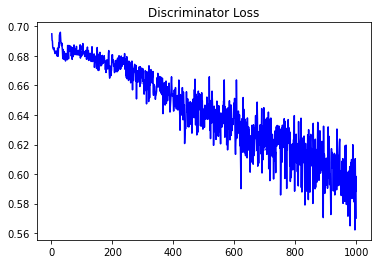

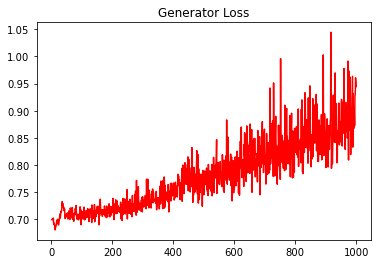

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[ 0.6275],
        [-0.8746],
        [ 1.0249],
        [ 0.8779],
        [ 0.4784],
        [-0.0472],
        [-0.5579],
        [ 0.6242],
        [-0.0855],
        [-1.8319],
        [ 0.9235],
        [-3.5318],
        [ 0.9620],
        [ 0.7222],
        [ 0.4707],
        [ 0.8608],
        [ 0.6176],
        [-0.9557],
        [-0.8602],
        [-0.0313]], grad_fn=<MmBackward>)
tensor([[ 0.5803],
        [-0.9604],
        [ 1.0401],
        [ 0.8556],
        [ 0.3826],
        [ 0.2321],
        [-0.6325],
        [ 0.6209],
        [-0.1069],
        [-1.9451],
        [ 0.8795],
        [-3.7829],
        [ 0.8862],
        [ 0.6916],
        [ 0.4692],
        [ 0.9124],
        [ 0.6303],
        [-0.8597],
        [-0.6648],
        [-0.0347]], grad_fn=<MmBackward>)
tensor([[ 7.6400e-01],
        [-1.0262e+00],
        [ 9.9090e-01],
        [ 7.4112e-01],
        [ 2.8696e-01],
        [-9.1739e-02],
        [-6.4346e-01],
        [ 5.7438e-01],
        [-

tensor([[ 0.6968],
        [-1.1728],
        [ 1.2250],
        [ 0.8076],
        [ 0.3188],
        [ 0.0862],
        [-0.4599],
        [ 0.5659],
        [-0.1572],
        [-1.5644],
        [ 0.8242],
        [-4.4771],
        [ 0.8892],
        [ 0.7333],
        [ 0.4695],
        [ 0.8978],
        [ 0.5741],
        [-0.6980],
        [-0.8136],
        [-0.4615]], grad_fn=<MmBackward>)
tensor([[ 0.5376],
        [-0.9322],
        [ 1.1863],
        [ 0.8496],
        [ 0.3190],
        [ 0.1252],
        [-0.5103],
        [ 0.6578],
        [-0.2716],
        [-1.8746],
        [ 0.9150],
        [-3.8428],
        [ 0.9584],
        [ 0.5157],
        [ 0.4480],
        [ 0.7684],
        [ 0.7997],
        [-1.0053],
        [-0.8530],
        [-0.4867]], grad_fn=<MmBackward>)
tensor([[ 0.7996],
        [-0.9152],
        [ 0.9924],
        [ 0.7437],
        [ 0.3351],
        [-0.0045],
        [-0.6139],
        [ 0.6998],
        [-0.0912],
        [-1.4165],
    

tensor([[ 0.6685],
        [-1.0560],
        [ 1.1885],
        [ 0.8642],
        [ 0.3425],
        [ 0.0132],
        [-0.5611],
        [ 0.5784],
        [-0.1870],
        [-1.7180],
        [ 0.9410],
        [-4.1985],
        [ 0.9734],
        [ 0.5223],
        [ 0.3874],
        [ 0.8923],
        [ 0.7007],
        [-0.8375],
        [-0.7164],
        [-0.6206]], grad_fn=<MmBackward>)
tensor([[ 0.8540],
        [-0.9519],
        [ 0.9829],
        [ 0.7978],
        [ 0.3358],
        [-0.0755],
        [-0.5839],
        [ 0.5852],
        [-0.1033],
        [-1.5259],
        [ 0.9091],
        [-4.2238],
        [ 1.0834],
        [ 0.7155],
        [ 0.4932],
        [ 0.9504],
        [ 0.5983],
        [-0.7196],
        [-0.7830],
        [ 0.0065]], grad_fn=<MmBackward>)
tensor([[ 0.6898],
        [-0.9348],
        [ 1.1442],
        [ 0.7385],
        [ 0.3590],
        [-0.0626],
        [-0.5666],
        [ 0.6943],
        [-0.0826],
        [-1.9920],
    

tensor([[ 7.8227e-01],
        [-9.1601e-01],
        [ 1.0660e+00],
        [ 8.0107e-01],
        [ 3.5716e-01],
        [-4.4386e-02],
        [-5.2884e-01],
        [ 6.9199e-01],
        [-8.9084e-02],
        [-1.4448e+00],
        [ 8.8076e-01],
        [-4.1099e+00],
        [ 1.1459e+00],
        [ 6.4794e-01],
        [ 4.8641e-01],
        [ 8.5424e-01],
        [ 5.9768e-01],
        [-1.0645e+00],
        [-7.5390e-01],
        [ 2.2415e-03]], grad_fn=<MmBackward>)
tensor([[ 0.7563],
        [-1.0784],
        [ 1.1777],
        [ 0.8114],
        [ 0.2958],
        [-0.0374],
        [-0.4770],
        [ 0.6181],
        [-0.1980],
        [-1.4988],
        [ 0.9581],
        [-4.0089],
        [ 0.8072],
        [ 0.6128],
        [ 0.4762],
        [ 0.8753],
        [ 0.6798],
        [-0.9047],
        [-0.7632],
        [-0.4274]], grad_fn=<MmBackward>)
tensor([[ 0.8419],
        [-0.9191],
        [ 1.0711],
        [ 0.8272],
        [ 0.2683],
        [ 0.0490],


tensor([[ 0.7570],
        [-0.8768],
        [ 1.1744],
        [ 0.8154],
        [ 0.3365],
        [-0.0759],
        [-0.5280],
        [ 0.6641],
        [-0.2317],
        [-1.8132],
        [ 1.1614],
        [-3.7052],
        [ 1.0456],
        [ 0.5696],
        [ 0.4794],
        [ 0.8418],
        [ 0.7163],
        [-0.8274],
        [-0.7106],
        [-0.6993]], grad_fn=<MmBackward>)
tensor([[ 5.9534e-01],
        [-1.0126e+00],
        [ 1.1849e+00],
        [ 8.5457e-01],
        [ 3.4104e-01],
        [ 2.9776e-03],
        [-4.6664e-01],
        [ 7.3639e-01],
        [-2.5779e-01],
        [-1.5411e+00],
        [ 1.0601e+00],
        [-3.9465e+00],
        [ 9.6594e-01],
        [ 6.9211e-01],
        [ 3.8044e-01],
        [ 8.0013e-01],
        [ 8.3719e-01],
        [-8.3363e-01],
        [-6.4326e-01],
        [-6.6558e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8093],
        [-0.9210],
        [ 1.0997],
        [ 0.7671],
        [ 0.3168],
        [ 0.0851],


tensor([[ 0.6529],
        [-0.9737],
        [ 1.0145],
        [ 0.7324],
        [ 0.3213],
        [-0.1709],
        [-0.6043],
        [ 0.7568],
        [-0.1649],
        [-1.7029],
        [ 0.9550],
        [-3.8967],
        [ 1.0633],
        [ 0.6756],
        [ 0.3957],
        [ 0.8449],
        [ 0.5607],
        [-0.8352],
        [-0.8639],
        [-0.3936]], grad_fn=<MmBackward>)
tensor([[ 0.8256],
        [-0.8909],
        [ 1.0461],
        [ 0.8280],
        [ 0.5904],
        [ 0.0806],
        [-0.5785],
        [ 0.6206],
        [-0.0819],
        [-1.9359],
        [ 0.9092],
        [-3.7403],
        [ 0.9373],
        [ 0.6580],
        [ 0.3817],
        [ 0.8871],
        [ 0.5479],
        [-1.1213],
        [-0.8417],
        [-0.0316]], grad_fn=<MmBackward>)
tensor([[ 0.7928],
        [-1.1823],
        [ 1.1504],
        [ 0.8125],
        [ 0.4658],
        [ 0.0883],
        [-0.5457],
        [ 0.5980],
        [-0.1825],
        [-2.0963],
    

tensor([[ 0.7667],
        [-0.9486],
        [ 1.0729],
        [ 0.8076],
        [ 0.3105],
        [-0.1379],
        [-0.4565],
        [ 0.7248],
        [-0.1795],
        [-1.4171],
        [ 1.0710],
        [-4.2843],
        [ 1.0750],
        [ 0.6869],
        [ 0.4785],
        [ 0.8255],
        [ 0.6566],
        [-0.8802],
        [-0.7569],
        [-0.5693]], grad_fn=<MmBackward>)
tensor([[ 0.7606],
        [-0.9615],
        [ 0.9203],
        [ 0.7260],
        [ 0.3159],
        [ 0.1166],
        [-0.5210],
        [ 0.6749],
        [-0.1136],
        [-1.3951],
        [ 1.0599],
        [-3.8818],
        [ 0.8420],
        [ 0.6909],
        [ 0.4781],
        [ 0.8157],
        [ 0.6627],
        [-0.7463],
        [-0.8200],
        [-0.0159]], grad_fn=<MmBackward>)
tensor([[ 0.7625],
        [-0.9389],
        [ 1.1431],
        [ 0.8811],
        [ 0.3520],
        [ 0.1719],
        [-0.5157],
        [ 0.6044],
        [-0.1578],
        [-1.5410],
    

tensor([[ 0.7077],
        [-0.8627],
        [ 1.2415],
        [ 0.8763],
        [ 0.3144],
        [ 0.0303],
        [-0.4775],
        [ 0.5993],
        [-0.1404],
        [-2.0298],
        [ 0.8754],
        [-3.4760],
        [ 0.9106],
        [ 0.7717],
        [ 0.3369],
        [ 0.8875],
        [ 0.6253],
        [-0.8687],
        [-0.7044],
        [-0.5917]], grad_fn=<MmBackward>)
tensor([[ 0.7843],
        [-0.9116],
        [ 0.9954],
        [ 0.7886],
        [ 0.2947],
        [ 0.0294],
        [-0.6022],
        [ 0.5955],
        [-0.1140],
        [-1.4264],
        [ 0.9147],
        [-4.1136],
        [ 0.8918],
        [ 0.6412],
        [ 0.4887],
        [ 0.8744],
        [ 0.5322],
        [-0.7618],
        [-0.7713],
        [-0.0533]], grad_fn=<MmBackward>)
tensor([[ 0.7651],
        [-0.9464],
        [ 1.1871],
        [ 0.8413],
        [ 0.2539],
        [ 0.2420],
        [-0.5912],
        [ 0.6251],
        [-0.1639],
        [-2.0854],
    

tensor([[ 0.7556],
        [-0.9989],
        [ 1.0631],
        [ 0.7380],
        [ 0.3376],
        [-0.1181],
        [-0.5775],
        [ 0.5883],
        [-0.1445],
        [-1.7367],
        [ 0.9407],
        [-4.1168],
        [ 0.8711],
        [ 0.7175],
        [ 0.5009],
        [ 0.9066],
        [ 0.6368],
        [-0.8508],
        [-0.8567],
        [-0.0864]], grad_fn=<MmBackward>)
tensor([[ 0.7891],
        [-1.1736],
        [ 1.0876],
        [ 0.8081],
        [ 0.3202],
        [-0.0537],
        [-0.5523],
        [ 0.6189],
        [-0.1915],
        [-1.4564],
        [ 1.0465],
        [-4.4902],
        [ 1.0823],
        [ 0.7105],
        [ 0.4691],
        [ 0.8366],
        [ 0.6098],
        [-0.8589],
        [-0.7599],
        [-0.5854]], grad_fn=<MmBackward>)
tensor([[ 0.5366],
        [-0.9463],
        [ 0.9428],
        [ 0.7943],
        [ 0.3373],
        [ 0.2050],
        [-0.6166],
        [ 0.6165],
        [-0.1295],
        [-1.4110],
    

tensor([[ 0.6793],
        [-0.8912],
        [ 1.0914],
        [ 0.8195],
        [ 0.3618],
        [-0.0755],
        [-0.5622],
        [ 0.7358],
        [-0.1084],
        [-1.5295],
        [ 0.9404],
        [-3.8458],
        [ 1.1355],
        [ 0.6627],
        [ 0.4976],
        [ 0.9169],
        [ 0.6298],
        [-1.1413],
        [-0.7622],
        [-0.0160]], grad_fn=<MmBackward>)
tensor([[ 0.7954],
        [-0.9432],
        [ 1.1963],
        [ 0.8232],
        [ 0.3113],
        [-0.1279],
        [-0.5228],
        [ 0.7517],
        [-0.2275],
        [-1.9797],
        [ 0.8574],
        [-4.0268],
        [ 1.0493],
        [ 0.5255],
        [ 0.4136],
        [ 0.7907],
        [ 0.6777],
        [-0.8670],
        [-0.7336],
        [-0.7242]], grad_fn=<MmBackward>)
tensor([[ 0.6944],
        [-0.8507],
        [ 1.0897],
        [ 0.8265],
        [ 0.3137],
        [-0.0542],
        [-0.5930],
        [ 0.6955],
        [-0.1283],
        [-1.3904],
    

tensor([[ 0.6030],
        [-0.9073],
        [ 0.9923],
        [ 0.8133],
        [ 0.3267],
        [-0.1275],
        [-0.5775],
        [ 0.6280],
        [-0.1143],
        [-1.5344],
        [ 0.9215],
        [-4.0861],
        [ 1.1183],
        [ 0.6011],
        [ 0.4777],
        [ 0.8743],
        [ 0.6082],
        [-0.7826],
        [-0.8171],
        [ 0.0261]], grad_fn=<MmBackward>)
tensor([[ 0.6882],
        [-0.9069],
        [ 1.1832],
        [ 0.7987],
        [ 0.3131],
        [-0.0542],
        [-0.6230],
        [ 0.5462],
        [-0.0971],
        [-2.0205],
        [ 0.8952],
        [-3.1224],
        [ 0.4276],
        [ 0.8106],
        [ 0.5022],
        [ 0.8454],
        [ 0.7140],
        [-0.8447],
        [-0.5959],
        [-0.4256]], grad_fn=<MmBackward>)
tensor([[ 0.7853],
        [-0.8467],
        [ 1.2063],
        [ 0.7961],
        [ 0.2877],
        [-0.1557],
        [-0.4404],
        [ 0.7780],
        [-0.2157],
        [-1.6703],
    

tensor([[ 0.4223],
        [-0.9389],
        [ 1.2530],
        [ 0.7801],
        [ 0.3067],
        [ 0.3239],
        [-0.5618],
        [ 0.5529],
        [-0.0794],
        [-2.0654],
        [ 0.8176],
        [-3.2918],
        [ 0.9406],
        [ 0.8020],
        [ 0.4307],
        [ 0.8407],
        [ 0.6061],
        [-0.5161],
        [-0.6824],
        [-0.5831]], grad_fn=<MmBackward>)
tensor([[ 0.7826],
        [-0.9393],
        [ 1.0921],
        [ 0.8780],
        [ 0.3680],
        [ 0.0490],
        [-0.5581],
        [ 0.6873],
        [-0.0830],
        [-1.3831],
        [ 0.8614],
        [-4.1762],
        [ 1.0681],
        [ 0.7040],
        [ 0.4694],
        [ 0.8716],
        [ 0.6209],
        [-0.9418],
        [-0.7147],
        [-0.0461]], grad_fn=<MmBackward>)
tensor([[ 0.7377],
        [-0.8614],
        [ 1.2023],
        [ 0.8760],
        [ 0.3213],
        [ 0.1724],
        [-0.5934],
        [ 0.5173],
        [-0.0842],
        [-1.9970],
    

tensor([[ 0.7685],
        [-0.9146],
        [ 0.9740],
        [ 0.7782],
        [ 0.2772],
        [-0.0452],
        [-0.6031],
        [ 0.6114],
        [-0.1052],
        [-1.8080],
        [ 0.9396],
        [-3.6623],
        [ 0.9335],
        [ 0.7097],
        [ 0.4812],
        [ 0.8906],
        [ 0.6185],
        [-1.0852],
        [-0.7634],
        [-0.0526]], grad_fn=<MmBackward>)
tensor([[ 0.6971],
        [-0.8441],
        [ 1.0106],
        [ 0.8081],
        [ 0.2805],
        [ 0.0116],
        [-0.5529],
        [ 0.6711],
        [-0.0822],
        [-1.7794],
        [ 1.1662],
        [-3.2664],
        [ 0.9204],
        [ 0.7863],
        [ 0.4707],
        [ 0.8281],
        [ 0.6920],
        [-0.8763],
        [-0.8100],
        [-0.0886]], grad_fn=<MmBackward>)
tensor([[ 0.7038],
        [-1.1645],
        [ 1.0907],
        [ 0.8208],
        [ 0.4080],
        [ 0.3702],
        [-0.5904],
        [ 0.4609],
        [-0.1916],
        [-1.5530],
    

tensor([[ 0.8156],
        [-0.9329],
        [ 1.2947],
        [ 0.7917],
        [ 0.4945],
        [-0.0818],
        [-0.5468],
        [ 0.6459],
        [-0.1415],
        [-2.0532],
        [ 0.8783],
        [-3.4582],
        [ 0.3599],
        [ 0.7160],
        [ 0.4563],
        [ 0.8452],
        [ 0.6988],
        [-0.8781],
        [-0.6040],
        [-0.2167]], grad_fn=<MmBackward>)
tensor([[ 0.5307],
        [-0.8710],
        [ 1.1716],
        [ 0.7486],
        [ 0.3350],
        [ 0.0261],
        [-0.5516],
        [ 0.5252],
        [-0.1434],
        [-2.1710],
        [ 0.8973],
        [-3.3677],
        [ 0.7922],
        [ 0.7790],
        [ 0.4327],
        [ 0.8080],
        [ 0.6072],
        [-0.6822],
        [-0.8366],
        [-0.6327]], grad_fn=<MmBackward>)
tensor([[ 0.7690],
        [-0.9035],
        [ 1.0511],
        [ 0.8042],
        [ 0.6162],
        [-0.0738],
        [-0.4682],
        [ 0.5959],
        [-0.1873],
        [-1.3541],
    

tensor([[ 0.7662],
        [-1.1382],
        [ 1.3386],
        [ 0.7579],
        [ 0.4093],
        [ 0.0418],
        [-0.5446],
        [ 0.5776],
        [-0.1326],
        [-1.4840],
        [ 0.8090],
        [-4.3696],
        [ 0.3545],
        [ 0.5674],
        [ 0.4888],
        [ 0.8392],
        [ 0.7534],
        [-0.8806],
        [-0.5639],
        [-0.4296]], grad_fn=<MmBackward>)
tensor([[ 0.7002],
        [-1.0028],
        [ 1.2244],
        [ 0.7714],
        [ 0.2661],
        [ 0.4033],
        [-0.5132],
        [ 0.5601],
        [-0.1378],
        [-1.4393],
        [ 0.8058],
        [-4.2094],
        [ 0.9101],
        [ 0.5556],
        [ 0.4576],
        [ 0.9083],
        [ 0.5579],
        [-0.7426],
        [-0.7392],
        [-0.1622]], grad_fn=<MmBackward>)
tensor([[ 0.6748],
        [-0.9966],
        [ 1.2449],
        [ 0.8276],
        [ 0.2736],
        [ 0.1761],
        [-0.5427],
        [ 0.5406],
        [-0.2067],
        [-2.0657],
    

tensor([[ 0.6161],
        [-1.2153],
        [ 1.1968],
        [ 0.6846],
        [ 0.2731],
        [ 0.0212],
        [-0.5302],
        [ 0.5806],
        [-0.2242],
        [-1.4808],
        [ 0.7909],
        [-4.2072],
        [ 0.8403],
        [ 0.6833],
        [ 0.4535],
        [ 0.7887],
        [ 0.6290],
        [-0.8874],
        [-0.7209],
        [-0.5109]], grad_fn=<MmBackward>)
tensor([[ 0.7681],
        [-0.9742],
        [ 1.1686],
        [ 0.7929],
        [ 0.3359],
        [ 0.0489],
        [-0.5253],
        [ 0.6163],
        [-0.1227],
        [-1.5317],
        [ 0.8527],
        [-4.1131],
        [ 0.7647],
        [ 0.6513],
        [ 0.4708],
        [ 0.8621],
        [ 0.6485],
        [-0.7785],
        [-0.7947],
        [-0.0083]], grad_fn=<MmBackward>)
tensor([[ 7.9380e-01],
        [-9.0264e-01],
        [ 1.1125e+00],
        [ 8.0731e-01],
        [ 3.7104e-01],
        [-4.6501e-02],
        [-4.6744e-01],
        [ 7.4612e-01],
        [-

tensor([[ 0.7089],
        [-0.9442],
        [ 1.0349],
        [ 0.8055],
        [ 0.2731],
        [-0.0364],
        [-0.5987],
        [ 0.6048],
        [-0.1692],
        [-1.9085],
        [ 1.0616],
        [-3.7465],
        [ 0.8840],
        [ 0.7493],
        [ 0.4633],
        [ 0.8220],
        [ 0.6578],
        [-0.9590],
        [-0.7083],
        [-0.4779]], grad_fn=<MmBackward>)
tensor([[ 0.7778],
        [-0.9078],
        [ 1.0335],
        [ 0.8692],
        [ 0.2862],
        [ 0.0865],
        [-0.5110],
        [ 0.6262],
        [-0.1341],
        [-1.6577],
        [ 0.9009],
        [-4.0955],
        [ 0.8619],
        [ 0.7733],
        [ 0.4738],
        [ 0.8790],
        [ 0.6612],
        [-0.7387],
        [-0.6384],
        [-0.0371]], grad_fn=<MmBackward>)
tensor([[ 0.7822],
        [-0.9413],
        [ 1.1233],
        [ 0.8085],
        [ 0.2872],
        [ 0.0060],
        [-0.5531],
        [ 0.6169],
        [-0.2020],
        [-1.4681],
    

tensor([[ 0.7754],
        [-0.8499],
        [ 1.2605],
        [ 0.8864],
        [ 0.3309],
        [-0.0554],
        [-0.6424],
        [ 0.5804],
        [-0.1221],
        [-2.0734],
        [ 0.9228],
        [-3.5650],
        [ 0.8806],
        [ 0.7987],
        [ 0.4692],
        [ 0.8461],
        [ 0.6293],
        [-0.6085],
        [-0.7425],
        [-0.6849]], grad_fn=<MmBackward>)
tensor([[ 0.7694],
        [-1.1655],
        [ 1.1573],
        [ 0.7915],
        [ 0.3266],
        [ 0.1086],
        [-0.4408],
        [ 0.6383],
        [-0.1669],
        [-1.4860],
        [ 0.8795],
        [-4.2182],
        [ 0.9588],
        [ 0.7671],
        [ 0.4632],
        [ 0.8699],
        [ 0.6566],
        [-1.1962],
        [-0.6766],
        [-0.1060]], grad_fn=<MmBackward>)
tensor([[ 0.7921],
        [-0.9615],
        [ 1.1341],
        [ 0.7938],
        [ 0.3144],
        [ 0.0476],
        [-0.6276],
        [ 0.5779],
        [-0.1590],
        [-2.0487],
    

tensor([[ 0.6782],
        [-0.9608],
        [ 1.0810],
        [ 0.7816],
        [ 0.4056],
        [ 0.0674],
        [-0.4981],
        [ 0.6041],
        [-0.0888],
        [-1.4761],
        [ 0.8785],
        [-3.9259],
        [ 0.9306],
        [ 0.6968],
        [ 0.5022],
        [ 0.9078],
        [ 0.5879],
        [-1.0444],
        [-0.7702],
        [-0.0290]], grad_fn=<MmBackward>)
tensor([[ 0.8203],
        [-0.9828],
        [ 1.1051],
        [ 0.8481],
        [ 0.3481],
        [ 0.0873],
        [-0.5563],
        [ 0.7154],
        [-0.0801],
        [-1.4427],
        [ 0.8012],
        [-4.2093],
        [ 1.0651],
        [ 0.6555],
        [ 0.4945],
        [ 0.9522],
        [ 0.5979],
        [-1.0320],
        [-0.6968],
        [-0.0403]], grad_fn=<MmBackward>)
tensor([[ 0.7497],
        [-0.9325],
        [ 0.8564],
        [ 0.7693],
        [ 0.3088],
        [-0.0573],
        [-0.5607],
        [ 0.6705],
        [-0.1204],
        [-1.4107],
    

tensor([[ 0.7547],
        [-0.8090],
        [ 1.1206],
        [ 0.7951],
        [ 0.3241],
        [-0.0785],
        [-0.5323],
        [ 0.6163],
        [-0.1014],
        [-2.0002],
        [ 0.9266],
        [-3.2637],
        [ 0.8736],
        [ 0.7456],
        [ 0.4909],
        [ 0.8246],
        [ 0.6143],
        [-0.9521],
        [-0.8602],
        [-0.3025]], grad_fn=<MmBackward>)
tensor([[ 0.7048],
        [-0.9696],
        [ 1.1884],
        [ 0.8170],
        [ 0.2637],
        [ 0.3526],
        [-0.4926],
        [ 0.6251],
        [-0.1347],
        [-1.7222],
        [ 0.7067],
        [-4.0375],
        [ 0.9355],
        [ 0.6443],
        [ 0.3994],
        [ 0.8186],
        [ 0.5944],
        [-0.7437],
        [-0.8183],
        [-0.0914]], grad_fn=<MmBackward>)
tensor([[ 0.7445],
        [-0.8793],
        [ 1.1354],
        [ 0.8111],
        [ 0.3499],
        [ 0.0293],
        [-0.5631],
        [ 0.6798],
        [-0.0796],
        [-1.8578],
    

tensor([[ 0.7418],
        [-1.1931],
        [ 1.2023],
        [ 0.8855],
        [ 0.3333],
        [ 0.3760],
        [-0.5523],
        [ 0.5593],
        [-0.1248],
        [-1.4304],
        [ 0.8663],
        [-4.6085],
        [ 0.9820],
        [ 0.6854],
        [ 0.4861],
        [ 0.9332],
        [ 0.5580],
        [-0.9732],
        [-0.8151],
        [-0.4254]], grad_fn=<MmBackward>)
tensor([[ 0.7202],
        [-0.9613],
        [ 1.1889],
        [ 0.7892],
        [ 0.4020],
        [-0.1431],
        [-0.5433],
        [ 0.6285],
        [-0.2324],
        [-1.9423],
        [ 0.8490],
        [-4.0815],
        [ 1.0389],
        [ 0.6678],
        [ 0.3783],
        [ 0.8502],
        [ 0.6019],
        [-0.8898],
        [-0.7560],
        [-0.4739]], grad_fn=<MmBackward>)
tensor([[ 0.7855],
        [-0.9611],
        [ 1.1279],
        [ 0.7874],
        [ 0.2776],
        [ 0.0495],
        [-0.5233],
        [ 0.5825],
        [-0.2311],
        [-1.5127],
    

tensor([[ 0.8148],
        [-0.9364],
        [ 0.9935],
        [ 0.7566],
        [ 0.3179],
        [-0.0385],
        [-0.6090],
        [ 0.5785],
        [-0.1010],
        [-1.8019],
        [ 0.9331],
        [-3.7572],
        [ 0.9115],
        [ 0.7638],
        [ 0.4888],
        [ 0.8250],
        [ 0.5879],
        [-0.6600],
        [-0.7730],
        [-0.0241]], grad_fn=<MmBackward>)
tensor([[ 0.6653],
        [-0.8958],
        [ 1.1685],
        [ 0.7477],
        [ 0.2818],
        [ 0.1697],
        [-0.5050],
        [ 0.6298],
        [-0.0661],
        [-1.9652],
        [ 0.8291],
        [-3.6043],
        [ 0.7911],
        [ 0.6154],
        [ 0.4332],
        [ 0.8183],
        [ 0.6277],
        [-1.0484],
        [-0.7737],
        [-0.0255]], grad_fn=<MmBackward>)
tensor([[ 0.6498],
        [-1.1850],
        [ 1.1431],
        [ 0.8178],
        [ 0.4900],
        [-0.1057],
        [-0.5850],
        [ 0.5888],
        [-0.2412],
        [-1.4572],
    

tensor([[ 0.7397],
        [-0.9706],
        [ 1.1623],
        [ 0.8140],
        [ 0.2838],
        [-0.0954],
        [-0.5052],
        [ 0.6230],
        [-0.2765],
        [-1.8315],
        [ 0.9950],
        [-4.0500],
        [ 0.8508],
        [ 0.7306],
        [ 0.3812],
        [ 0.8106],
        [ 0.6331],
        [-0.8011],
        [-0.8509],
        [-0.6131]], grad_fn=<MmBackward>)
tensor([[ 8.0958e-01],
        [-9.7053e-01],
        [ 1.0326e+00],
        [ 7.8934e-01],
        [ 2.9340e-01],
        [ 1.0370e-01],
        [-5.2000e-01],
        [ 6.1824e-01],
        [-7.1011e-02],
        [-1.5025e+00],
        [ 9.3908e-01],
        [-3.8194e+00],
        [ 8.7404e-01],
        [ 6.5058e-01],
        [ 4.8236e-01],
        [ 9.3051e-01],
        [ 6.0497e-01],
        [-1.1831e+00],
        [-6.9521e-01],
        [-7.5817e-05]], grad_fn=<MmBackward>)
tensor([[ 0.7158],
        [-0.9245],
        [ 1.0759],
        [ 0.8580],
        [ 0.3293],
        [ 0.1468],


tensor([[ 0.7882],
        [-0.9163],
        [ 1.1299],
        [ 0.7497],
        [ 0.2700],
        [ 0.0632],
        [-0.4933],
        [ 0.5960],
        [-0.1509],
        [-1.8045],
        [ 0.8975],
        [-3.6832],
        [ 0.7231],
        [ 0.5931],
        [ 0.4891],
        [ 0.8839],
        [ 0.6714],
        [-0.9678],
        [-0.9170],
        [-0.2485]], grad_fn=<MmBackward>)
tensor([[ 0.7197],
        [-0.9643],
        [ 1.0440],
        [ 0.7378],
        [ 0.3286],
        [ 0.1353],
        [-0.5736],
        [ 0.5863],
        [-0.1047],
        [-1.5028],
        [ 0.9579],
        [-3.7155],
        [ 0.8130],
        [ 0.5634],
        [ 0.4671],
        [ 0.8955],
        [ 0.6541],
        [-1.1347],
        [-0.8439],
        [-0.0253]], grad_fn=<MmBackward>)
tensor([[ 0.6797],
        [-0.9900],
        [ 1.1666],
        [ 0.8595],
        [ 0.3309],
        [-0.0731],
        [-0.4470],
        [ 0.6818],
        [-0.2167],
        [-1.3366],
    

tensor([[ 0.7565],
        [-0.8588],
        [ 1.1682],
        [ 0.7697],
        [ 0.3112],
        [ 0.1650],
        [-0.4327],
        [ 0.6094],
        [-0.1184],
        [-1.9505],
        [ 0.8798],
        [-3.4558],
        [ 0.8299],
        [ 0.7041],
        [ 0.3735],
        [ 0.9114],
        [ 0.6010],
        [-1.0143],
        [-0.8045],
        [-0.1663]], grad_fn=<MmBackward>)
tensor([[ 0.7508],
        [-1.0653],
        [ 1.2559],
        [ 0.8771],
        [ 0.4180],
        [ 0.0514],
        [-0.5539],
        [ 0.5414],
        [-0.2294],
        [-1.8551],
        [ 0.8259],
        [-4.2434],
        [ 0.4045],
        [ 0.7101],
        [ 0.4700],
        [ 0.9578],
        [ 0.7832],
        [-0.8653],
        [-0.4588],
        [-0.5097]], grad_fn=<MmBackward>)
tensor([[ 0.7578],
        [-1.1560],
        [ 1.1972],
        [ 0.8142],
        [ 0.3188],
        [ 0.0485],
        [-0.4097],
        [ 0.6329],
        [-0.2083],
        [-1.2569],
    

tensor([[ 0.7643],
        [-1.0208],
        [ 1.1235],
        [ 0.7690],
        [ 0.3148],
        [ 0.0641],
        [-0.5495],
        [ 0.5650],
        [-0.1997],
        [-1.6065],
        [ 0.8938],
        [-4.1974],
        [ 0.8716],
        [ 0.6926],
        [ 0.4492],
        [ 0.8640],
        [ 0.6111],
        [-0.8514],
        [-0.7867],
        [-0.4835]], grad_fn=<MmBackward>)
tensor([[ 0.6648],
        [-1.1477],
        [ 1.2105],
        [ 0.8109],
        [ 0.2925],
        [ 0.1595],
        [-0.3793],
        [ 0.6328],
        [-0.2409],
        [-1.3520],
        [ 0.8574],
        [-4.2462],
        [ 0.8173],
        [ 0.7327],
        [ 0.3439],
        [ 0.9101],
        [ 0.5715],
        [-1.2306],
        [-0.6994],
        [-0.4328]], grad_fn=<MmBackward>)
tensor([[ 0.7750],
        [-0.8254],
        [ 1.0612],
        [ 0.7398],
        [ 0.2609],
        [ 0.0136],
        [-0.3445],
        [ 0.6312],
        [-0.1423],
        [-1.3462],
    


tensor([[ 0.7427],
        [-0.8839],
        [ 1.0237],
        [ 0.7376],
        [ 0.2857],
        [ 0.0081],
        [-0.4330],
        [ 0.6202],
        [-0.0949],
        [-1.4784],
        [ 0.9340],
        [-3.8367],
        [ 0.9316],
        [ 0.7201],
        [ 0.4832],
        [ 0.8877],
        [ 0.5279],
        [-0.5008],
        [-0.8832],
        [-0.0225]], grad_fn=<MmBackward>)
tensor([[ 0.7074],
        [-0.9639],
        [ 1.1300],
        [ 0.9062],
        [ 0.3239],
        [ 0.0709],
        [-0.4761],
        [ 0.7082],
        [-0.1746],
        [-1.5140],
        [ 0.8688],
        [-3.9043],
        [ 0.8296],
        [ 0.6373],
        [ 0.4388],
        [ 0.8111],
        [ 0.7200],
        [-0.8156],
        [-0.8216],
        [-0.1521]], grad_fn=<MmBackward>)
tensor([[ 7.3282e-01],
        [-9.4030e-01],
        [ 1.1541e+00],
        [ 8.1736e-01],
        [ 3.0700e-01],
        [ 2.6949e-03],
        [-6.0554e-01],
        [ 6.4753e-01],
        [

tensor([[ 0.7689],
        [-0.9343],
        [ 1.1389],
        [ 0.7651],
        [ 0.3245],
        [ 0.2050],
        [-0.4259],
        [ 0.6493],
        [-0.1549],
        [-1.3845],
        [ 0.8443],
        [-4.0670],
        [ 0.8681],
        [ 0.7065],
        [ 0.4690],
        [ 0.8761],
        [ 0.6080],
        [-0.7640],
        [-0.7936],
        [-0.1205]], grad_fn=<MmBackward>)
tensor([[ 0.8463],
        [-0.9823],
        [ 1.0024],
        [ 0.7718],
        [ 0.4737],
        [-0.0337],
        [-0.5737],
        [ 0.6688],
        [-0.0972],
        [-1.6462],
        [ 0.9189],
        [-4.0600],
        [ 1.0327],
        [ 0.6990],
        [ 0.4632],
        [ 0.9214],
        [ 0.5610],
        [-0.9592],
        [-0.7942],
        [-0.0052]], grad_fn=<MmBackward>)
tensor([[ 7.0873e-01],
        [-9.7563e-01],
        [ 9.7969e-01],
        [ 7.9239e-01],
        [ 6.6981e-01],
        [-4.0176e-02],
        [-6.2455e-01],
        [ 5.9729e-01],
        [-

tensor([[ 0.6689],
        [-0.9262],
        [ 1.0899],
        [ 0.8126],
        [ 0.3235],
        [ 0.0271],
        [-0.5811],
        [ 0.6706],
        [-0.1347],
        [-2.0436],
        [ 0.9567],
        [-3.2045],
        [ 0.8106],
        [ 0.7913],
        [ 0.3371],
        [ 0.8238],
        [ 0.6318],
        [-0.8016],
        [-0.7278],
        [-0.6331]], grad_fn=<MmBackward>)
tensor([[ 0.7411],
        [-0.9398],
        [ 1.1515],
        [ 0.7344],
        [ 0.5452],
        [ 0.0372],
        [-0.4485],
        [ 0.6860],
        [-0.0837],
        [-1.4477],
        [ 0.8458],
        [-3.8616],
        [ 1.0220],
        [ 0.6845],
        [ 0.4747],
        [ 0.8796],
        [ 0.6201],
        [-1.2768],
        [-0.6942],
        [-0.0349]], grad_fn=<MmBackward>)
tensor([[ 0.8030],
        [-0.9110],
        [ 0.9745],
        [ 0.8023],
        [ 0.2707],
        [ 0.0360],
        [-0.5272],
        [ 0.6451],
        [-0.1169],
        [-1.2839],
    

tensor([[ 0.8114],
        [-0.9458],
        [ 1.1454],
        [ 0.7675],
        [ 0.3172],
        [ 0.0593],
        [-0.5611],
        [ 0.5473],
        [-0.1507],
        [-1.3534],
        [ 0.9344],
        [-4.1667],
        [ 0.9592],
        [ 0.7031],
        [ 0.4699],
        [ 0.9103],
        [ 0.6439],
        [-0.7426],
        [-0.6733],
        [-0.2469]], grad_fn=<MmBackward>)
tensor([[ 0.7935],
        [-0.8410],
        [ 1.0812],
        [ 0.7829],
        [ 0.3032],
        [ 0.1028],
        [-0.4758],
        [ 0.6168],
        [-0.1414],
        [-2.0008],
        [ 0.9266],
        [-3.5437],
        [ 0.9271],
        [ 0.7384],
        [ 0.4723],
        [ 0.8401],
        [ 0.6025],
        [-0.9273],
        [-0.8804],
        [-0.3900]], grad_fn=<MmBackward>)
tensor([[ 0.5279],
        [-0.6800],
        [ 1.1707],
        [ 0.8377],
        [ 0.3083],
        [ 0.5458],
        [-0.4874],
        [ 0.5263],
        [-0.0918],
        [-2.0348],
    

tensor([[ 0.6448],
        [-0.9567],
        [ 1.1305],
        [ 0.7789],
        [ 0.2763],
        [ 0.0849],
        [-0.5456],
        [ 0.5662],
        [-0.1525],
        [-1.5492],
        [ 0.8553],
        [-4.0650],
        [ 0.9417],
        [ 0.5343],
        [ 0.4360],
        [ 0.8060],
        [ 0.6183],
        [-0.8166],
        [-0.7587],
        [-0.0488]], grad_fn=<MmBackward>)
tensor([[ 0.7502],
        [-0.9795],
        [ 1.0873],
        [ 0.8795],
        [ 0.4622],
        [ 0.1044],
        [-0.5895],
        [ 0.6470],
        [-0.1709],
        [-1.4276],
        [ 0.9118],
        [-4.1775],
        [ 0.9152],
        [ 0.7221],
        [ 0.4661],
        [ 0.8965],
        [ 0.6108],
        [-0.9863],
        [-0.7611],
        [-0.0552]], grad_fn=<MmBackward>)
tensor([[ 6.2810e-01],
        [-9.5209e-01],
        [ 9.9551e-01],
        [ 8.0406e-01],
        [ 3.1073e-01],
        [ 3.2742e-02],
        [-5.7244e-01],
        [ 6.2553e-01],
        [-

tensor([[ 0.8193],
        [-0.8728],
        [ 1.0654],
        [ 0.7832],
        [ 0.2755],
        [ 0.0589],
        [-0.5028],
        [ 0.6331],
        [-0.0915],
        [-1.3971],
        [ 1.0005],
        [-3.9821],
        [ 1.0023],
        [ 0.7466],
        [ 0.4884],
        [ 0.8396],
        [ 0.6201],
        [-1.0281],
        [-0.7570],
        [-0.0222]], grad_fn=<MmBackward>)
tensor([[ 0.7572],
        [-1.0329],
        [ 1.1361],
        [ 0.8486],
        [ 0.2903],
        [ 0.1848],
        [-0.6141],
        [ 0.6863],
        [-0.2286],
        [-2.0830],
        [ 0.8503],
        [-4.2987],
        [ 0.9437],
        [ 0.6222],
        [ 0.3574],
        [ 0.8462],
        [ 0.5969],
        [-0.8739],
        [-0.7675],
        [-0.6345]], grad_fn=<MmBackward>)
tensor([[ 0.8228],
        [-0.9887],
        [ 1.1249],
        [ 0.8164],
        [ 0.5305],
        [ 0.0566],
        [-0.5168],
        [ 0.6455],
        [-0.1169],
        [-1.5052],
    

tensor([[ 0.8273],
        [-0.8798],
        [ 0.9734],
        [ 0.8619],
        [ 0.5104],
        [ 0.0899],
        [-0.5305],
        [ 0.6013],
        [-0.0668],
        [-1.3779],
        [ 0.9380],
        [-4.0508],
        [ 0.9328],
        [ 0.7442],
        [ 0.4348],
        [ 0.9366],
        [ 0.6594],
        [-1.0779],
        [-0.6576],
        [-0.0543]], grad_fn=<MmBackward>)
tensor([[ 0.7838],
        [-0.8911],
        [ 1.0503],
        [ 0.7931],
        [ 0.3531],
        [-0.0046],
        [-0.5259],
        [ 0.7735],
        [-0.0784],
        [-1.3658],
        [ 0.9188],
        [-4.1181],
        [ 1.0364],
        [ 0.6528],
        [ 0.4759],
        [ 0.9534],
        [ 0.5876],
        [-1.0843],
        [-0.7201],
        [-0.0336]], grad_fn=<MmBackward>)
tensor([[ 0.6456],
        [-0.9410],
        [ 1.1678],
        [ 0.8331],
        [ 0.3087],
        [ 0.0210],
        [-0.4153],
        [ 0.6528],
        [-0.1965],
        [-1.5222],
    

tensor([[ 0.8246],
        [-0.9572],
        [ 1.1254],
        [ 0.8520],
        [ 0.3253],
        [ 0.0787],
        [-0.4540],
        [ 0.5779],
        [-0.1045],
        [-1.5003],
        [ 0.9140],
        [-4.0121],
        [ 0.9099],
        [ 0.7365],
        [ 0.5453],
        [ 0.9644],
        [ 0.6815],
        [-1.2170],
        [-0.7604],
        [-0.0434]], grad_fn=<MmBackward>)
tensor([[ 0.7937],
        [-0.9677],
        [ 1.1903],
        [ 0.8447],
        [ 0.4509],
        [ 0.0157],
        [-0.5534],
        [ 0.6811],
        [-0.1669],
        [-1.4038],
        [ 0.9001],
        [-4.0977],
        [ 0.9129],
        [ 0.5856],
        [ 0.4581],
        [ 0.8560],
        [ 0.6367],
        [-0.7816],
        [-0.7836],
        [-0.2670]], grad_fn=<MmBackward>)
tensor([[ 0.7374],
        [-1.0820],
        [ 1.0727],
        [ 0.7647],
        [ 0.3405],
        [ 0.1711],
        [-0.6174],
        [ 0.5384],
        [-0.1015],
        [-1.5042],
    

tensor([[ 0.7794],
        [-1.0868],
        [ 1.3263],
        [ 0.8547],
        [ 0.4360],
        [ 0.0589],
        [-0.3971],
        [ 0.6761],
        [-0.2119],
        [-1.3824],
        [ 0.9063],
        [-4.5263],
        [ 1.0605],
        [ 0.6373],
        [ 0.4800],
        [ 0.8494],
        [ 0.6779],
        [-0.9779],
        [-0.6645],
        [-0.5474]], grad_fn=<MmBackward>)
tensor([[ 0.8282],
        [-0.9223],
        [ 1.0941],
        [ 0.7782],
        [ 0.5053],
        [-0.0433],
        [-0.6097],
        [ 0.6503],
        [-0.0893],
        [-1.9059],
        [ 0.8796],
        [-3.7014],
        [ 1.0307],
        [ 0.5900],
        [ 0.4849],
        [ 0.8554],
        [ 0.5977],
        [-0.5809],
        [-0.6216],
        [-0.0434]], grad_fn=<MmBackward>)
tensor([[ 0.7933],
        [-0.9277],
        [ 1.0226],
        [ 0.7636],
        [ 0.3493],
        [ 0.0610],
        [-0.5323],
        [ 0.6613],
        [-0.0797],
        [-1.5811],
    

tensor([[ 0.6194],
        [-1.0497],
        [ 1.1866],
        [ 0.8504],
        [ 0.2959],
        [ 0.1551],
        [-0.5153],
        [ 0.5445],
        [-0.2361],
        [-1.5398],
        [ 0.7721],
        [-4.6102],
        [ 0.9014],
        [ 0.7185],
        [ 0.4427],
        [ 0.9341],
        [ 0.6533],
        [-0.8278],
        [-0.6432],
        [-0.4842]], grad_fn=<MmBackward>)
tensor([[ 0.7506],
        [-1.0850],
        [ 1.1904],
        [ 0.8445],
        [ 0.3255],
        [ 0.2254],
        [-0.6080],
        [ 0.6695],
        [-0.2049],
        [-1.4671],
        [ 0.7662],
        [-4.4577],
        [ 0.8752],
        [ 0.7061],
        [ 0.4662],
        [ 0.9116],
        [ 0.6140],
        [-1.1102],
        [-0.8001],
        [-0.4458]], grad_fn=<MmBackward>)
tensor([[ 0.7382],
        [-1.2774],
        [ 1.0852],
        [ 0.7863],
        [ 0.3107],
        [ 0.0757],
        [-0.5954],
        [ 0.7184],
        [-0.1607],
        [-1.4167],
    

tensor([[ 0.7026],
        [-0.9883],
        [ 1.2054],
        [ 0.8746],
        [ 0.2966],
        [-0.0771],
        [-0.4621],
        [ 0.6545],
        [-0.2420],
        [-1.3672],
        [ 0.9786],
        [-4.3872],
        [ 0.8642],
        [ 0.6703],
        [ 0.4777],
        [ 0.8828],
        [ 0.6853],
        [-0.9469],
        [-0.7063],
        [-0.5806]], grad_fn=<MmBackward>)
tensor([[ 0.7082],
        [-1.0098],
        [ 1.1350],
        [ 0.7741],
        [ 0.3045],
        [ 0.0693],
        [-0.5455],
        [ 0.6987],
        [-0.1758],
        [-1.6681],
        [ 0.8298],
        [-4.1106],
        [ 0.9548],
        [ 0.6830],
        [ 0.4051],
        [ 0.8668],
        [ 0.6031],
        [-0.9280],
        [-0.7277],
        [-0.5355]], grad_fn=<MmBackward>)
tensor([[ 0.7807],
        [-0.8745],
        [ 1.0893],
        [ 0.7645],
        [ 0.3213],
        [-0.1125],
        [-0.5583],
        [ 0.7089],
        [-0.1432],
        [-1.9628],
    

tensor([[ 0.6857],
        [-1.0562],
        [ 1.2379],
        [ 0.7242],
        [ 0.3311],
        [ 0.1270],
        [-0.5859],
        [ 0.8249],
        [-0.1843],
        [-1.4309],
        [ 0.6750],
        [-4.3365],
        [ 1.0288],
        [ 0.6746],
        [ 0.3947],
        [ 0.8795],
        [ 0.5420],
        [-0.7583],
        [-0.7008],
        [-0.5731]], grad_fn=<MmBackward>)
tensor([[ 0.6149],
        [-0.9253],
        [ 1.2032],
        [ 0.7381],
        [ 0.2868],
        [ 0.0215],
        [-0.5769],
        [ 0.5937],
        [-0.1674],
        [-1.3586],
        [ 1.0412],
        [-3.9613],
        [ 0.9355],
        [ 0.7139],
        [ 0.4469],
        [ 0.8332],
        [ 0.5616],
        [-0.6007],
        [-0.8211],
        [-0.3419]], grad_fn=<MmBackward>)
tensor([[ 0.7047],
        [-0.9146],
        [ 1.2403],
        [ 0.8478],
        [ 0.3208],
        [ 0.2103],
        [-0.6060],
        [ 0.5560],
        [-0.1360],
        [-2.0969],
    

tensor([[ 0.5679],
        [-0.8077],
        [ 1.1696],
        [ 0.8104],
        [ 0.2628],
        [ 0.1554],
        [-0.5044],
        [ 0.5376],
        [-0.0032],
        [-1.8070],
        [ 0.8968],
        [-2.9868],
        [ 0.8207],
        [ 0.8080],
        [ 0.4711],
        [ 0.8826],
        [ 0.6166],
        [-0.9476],
        [-0.6802],
        [-0.4039]], grad_fn=<MmBackward>)
tensor([[ 0.8100],
        [-1.0074],
        [ 1.1271],
        [ 0.7936],
        [ 0.5005],
        [ 0.0592],
        [-0.5543],
        [ 0.5630],
        [-0.1345],
        [-1.5960],
        [ 0.9033],
        [-4.0221],
        [ 0.9424],
        [ 0.6491],
        [ 0.4264],
        [ 0.8859],
        [ 0.6520],
        [-0.8846],
        [-0.7682],
        [-0.0843]], grad_fn=<MmBackward>)
tensor([[ 0.7707],
        [-1.0750],
        [ 1.1392],
        [ 0.8597],
        [ 0.2995],
        [-0.2134],
        [-0.6214],
        [ 0.7433],
        [-0.2648],
        [-1.9004],
    

tensor([[ 0.7904],
        [-1.0614],
        [ 0.9853],
        [ 0.7115],
        [ 0.2921],
        [ 0.0499],
        [-0.5918],
        [ 0.5904],
        [-0.1243],
        [-1.5215],
        [ 0.9311],
        [-3.8595],
        [ 0.8961],
        [ 0.7479],
        [ 0.3728],
        [ 0.8358],
        [ 0.6029],
        [-0.8846],
        [-0.7965],
        [-0.0498]], grad_fn=<MmBackward>)
tensor([[ 0.7281],
        [-0.9233],
        [ 1.3452],
        [ 0.8425],
        [ 0.3856],
        [-0.0417],
        [-0.5599],
        [ 0.6563],
        [-0.1574],
        [-2.0770],
        [ 0.7457],
        [-3.6132],
        [ 0.4194],
        [ 0.6714],
        [ 0.5022],
        [ 0.8356],
        [ 0.7202],
        [-0.8379],
        [-0.6157],
        [-0.2501]], grad_fn=<MmBackward>)
tensor([[ 0.5195],
        [-0.9858],
        [ 1.0346],
        [ 0.7337],
        [ 0.2964],
        [ 0.0461],
        [-0.5704],
        [ 0.6071],
        [-0.0822],
        [-1.5392],
    

tensor([[ 7.7686e-01],
        [-1.0628e+00],
        [ 1.0301e+00],
        [ 8.1176e-01],
        [ 3.1596e-01],
        [-3.4309e-03],
        [-4.1945e-01],
        [ 6.3780e-01],
        [-9.7977e-02],
        [-1.4607e+00],
        [ 9.6496e-01],
        [-3.8932e+00],
        [ 9.4812e-01],
        [ 7.5819e-01],
        [ 4.9477e-01],
        [ 9.0404e-01],
        [ 5.6832e-01],
        [-1.1001e+00],
        [-8.8653e-01],
        [-3.5030e-02]], grad_fn=<MmBackward>)
tensor([[ 0.8111],
        [-0.8628],
        [ 0.9581],
        [ 0.7781],
        [ 0.3240],
        [-0.0246],
        [-0.5390],
        [ 0.6944],
        [-0.1228],
        [-1.3538],
        [ 1.1119],
        [-3.7501],
        [ 1.0487],
        [ 0.6495],
        [ 0.4697],
        [ 0.8447],
        [ 0.6286],
        [-0.9674],
        [-0.8208],
        [-0.0573]], grad_fn=<MmBackward>)
tensor([[ 6.4830e-01],
        [-8.4717e-01],
        [ 1.0491e+00],
        [ 8.5292e-01],
        [ 4.0065e-01],

tensor([[ 0.7455],
        [-1.0586],
        [ 1.3120],
        [ 0.7294],
        [ 0.3483],
        [ 0.4148],
        [-0.5131],
        [ 0.5721],
        [-0.0769],
        [-1.5641],
        [ 0.6367],
        [-3.9711],
        [ 0.4838],
        [ 0.6566],
        [ 0.4196],
        [ 0.8812],
        [ 0.6513],
        [-0.8670],
        [-0.6147],
        [-0.0230]], grad_fn=<MmBackward>)
tensor([[ 0.6970],
        [-0.9160],
        [ 1.2605],
        [ 0.7673],
        [ 0.2828],
        [ 0.0038],
        [-0.4889],
        [ 0.6349],
        [-0.2083],
        [-1.7715],
        [ 0.9391],
        [-3.7777],
        [ 0.8547],
        [ 0.6773],
        [ 0.4837],
        [ 0.8491],
        [ 0.6348],
        [-0.7363],
        [-0.8527],
        [-0.5629]], grad_fn=<MmBackward>)
tensor([[ 0.7382],
        [-0.8854],
        [ 1.0828],
        [ 0.7779],
        [ 0.2688],
        [ 0.1484],
        [-0.5233],
        [ 0.5942],
        [-0.1090],
        [-1.9987],
    

tensor([[ 0.7111],
        [-1.0009],
        [ 0.9721],
        [ 0.7969],
        [ 0.4858],
        [ 0.1565],
        [-0.6193],
        [ 0.5581],
        [-0.1166],
        [-1.4593],
        [ 0.9307],
        [-3.8402],
        [ 0.8525],
        [ 0.7232],
        [ 0.4387],
        [ 0.9156],
        [ 0.5319],
        [-1.2312],
        [-0.8875],
        [-0.0178]], grad_fn=<MmBackward>)
tensor([[ 0.5905],
        [-0.9248],
        [ 1.1883],
        [ 0.8978],
        [ 0.3184],
        [ 0.1124],
        [-0.4897],
        [ 0.5999],
        [-0.2482],
        [-1.5467],
        [ 0.8785],
        [-4.4530],
        [ 1.0130],
        [ 0.6804],
        [ 0.4322],
        [ 0.9018],
        [ 0.6721],
        [-0.8137],
        [-0.6622],
        [-0.3704]], grad_fn=<MmBackward>)
tensor([[ 0.7606],
        [-0.8829],
        [ 1.1484],
        [ 0.7564],
        [ 0.3065],
        [ 0.0761],
        [-0.5966],
        [ 0.5370],
        [-0.1538],
        [-1.7869],
    

tensor([[ 7.0421e-01],
        [-9.2111e-01],
        [ 9.8837e-01],
        [ 7.9957e-01],
        [ 3.3237e-01],
        [ 2.7184e-03],
        [-5.9852e-01],
        [ 6.1707e-01],
        [-8.6166e-02],
        [-1.8790e+00],
        [ 1.0613e+00],
        [-3.4371e+00],
        [ 7.7674e-01],
        [ 7.3935e-01],
        [ 4.5465e-01],
        [ 8.3921e-01],
        [ 6.1863e-01],
        [-9.8305e-01],
        [-8.4931e-01],
        [-4.8847e-02]], grad_fn=<MmBackward>)
tensor([[ 0.6718],
        [-0.9338],
        [ 1.0973],
        [ 0.7495],
        [ 0.3818],
        [-0.1469],
        [-0.5250],
        [ 0.6017],
        [-0.2020],
        [-1.3893],
        [ 0.9807],
        [-4.0382],
        [ 1.0628],
        [ 0.5974],
        [ 0.4676],
        [ 0.8516],
        [ 0.7144],
        [-0.8828],
        [-0.7613],
        [-0.3014]], grad_fn=<MmBackward>)
tensor([[ 0.7565],
        [-0.9159],
        [ 1.1423],
        [ 0.8834],
        [ 0.4266],
        [-0.0246],


tensor([[ 0.7840],
        [-0.8545],
        [ 1.1354],
        [ 0.8112],
        [ 0.2796],
        [ 0.1057],
        [-0.5639],
        [ 0.5597],
        [-0.1051],
        [-1.9518],
        [ 0.9315],
        [-3.4437],
        [ 0.8804],
        [ 0.7696],
        [ 0.4675],
        [ 0.8464],
        [ 0.6075],
        [-0.8405],
        [-0.8634],
        [-0.1551]], grad_fn=<MmBackward>)
tensor([[ 0.7942],
        [-1.0947],
        [ 1.2466],
        [ 0.8442],
        [ 0.3386],
        [ 0.2036],
        [-0.5701],
        [ 0.5330],
        [-0.1885],
        [-1.4825],
        [ 0.8710],
        [-4.5354],
        [ 0.9439],
        [ 0.7122],
        [ 0.4470],
        [ 0.9055],
        [ 0.6875],
        [-0.8941],
        [-0.7220],
        [-0.4924]], grad_fn=<MmBackward>)
tensor([[ 0.7157],
        [-1.0325],
        [ 1.0755],
        [ 0.7234],
        [ 0.3170],
        [-0.1794],
        [-0.6028],
        [ 0.7670],
        [-0.2114],
        [-1.4058],
    

tensor([[ 0.7920],
        [-0.8851],
        [ 1.0248],
        [ 0.7977],
        [ 0.3543],
        [-0.1110],
        [-0.4686],
        [ 0.7762],
        [-0.1370],
        [-1.6001],
        [ 0.9266],
        [-3.9770],
        [ 0.9463],
        [ 0.7081],
        [ 0.4629],
        [ 0.8902],
        [ 0.5636],
        [-0.8202],
        [-0.9055],
        [-0.0432]], grad_fn=<MmBackward>)
tensor([[ 0.7613],
        [-1.0296],
        [ 1.3026],
        [ 0.7662],
        [ 0.2736],
        [ 0.1667],
        [-0.5535],
        [ 0.6048],
        [-0.2497],
        [-1.8344],
        [ 0.8711],
        [-3.9993],
        [ 0.3838],
        [ 0.7088],
        [ 0.4712],
        [ 0.9140],
        [ 0.7342],
        [-0.7996],
        [-0.6069],
        [-0.4361]], grad_fn=<MmBackward>)
tensor([[ 0.6965],
        [-1.0083],
        [ 1.2247],
        [ 0.7157],
        [ 0.2978],
        [-0.0120],
        [-0.4784],
        [ 0.5874],
        [-0.1939],
        [-1.4966],
    

tensor([[ 0.7658],
        [-1.2074],
        [ 1.0971],
        [ 0.8173],
        [ 0.3186],
        [-0.0407],
        [-0.5926],
        [ 0.6490],
        [-0.1793],
        [-1.4023],
        [ 0.9436],
        [-4.4790],
        [ 0.9549],
        [ 0.7607],
        [ 0.4560],
        [ 0.8863],
        [ 0.5881],
        [-0.7718],
        [-0.7792],
        [-0.4533]], grad_fn=<MmBackward>)
tensor([[ 0.6061],
        [-0.9504],
        [ 1.1470],
        [ 0.8669],
        [ 0.2880],
        [-0.0877],
        [-0.5890],
        [ 0.6785],
        [-0.2397],
        [-1.5839],
        [ 1.2129],
        [-3.9542],
        [ 0.9550],
        [ 0.7839],
        [ 0.4499],
        [ 0.8243],
        [ 0.7237],
        [-0.7822],
        [-0.6045],
        [-0.5907]], grad_fn=<MmBackward>)
tensor([[ 0.7179],
        [-0.9463],
        [ 1.0848],
        [ 0.7778],
        [ 0.3060],
        [-0.1272],
        [-0.5657],
        [ 0.5748],
        [-0.2143],
        [-1.9493],
    

tensor([[ 0.5042],
        [-1.0181],
        [ 1.2050],
        [ 0.7877],
        [ 0.3403],
        [ 0.1995],
        [-0.5614],
        [ 0.5550],
        [-0.1609],
        [-1.4210],
        [ 0.8333],
        [-4.3551],
        [ 0.9551],
        [ 0.6970],
        [ 0.4678],
        [ 0.8866],
        [ 0.5644],
        [-0.7707],
        [-0.7444],
        [-0.4729]], grad_fn=<MmBackward>)
tensor([[ 0.6951],
        [-0.8811],
        [ 1.0931],
        [ 0.8668],
        [ 0.3271],
        [-0.0590],
        [-0.4436],
        [ 0.6804],
        [-0.1348],
        [-1.3595],
        [ 1.0552],
        [-3.8944],
        [ 0.9716],
        [ 0.6633],
        [ 0.4655],
        [ 0.8232],
        [ 0.6747],
        [-0.9242],
        [-0.8558],
        [-0.0866]], grad_fn=<MmBackward>)
tensor([[ 0.7271],
        [-1.0493],
        [ 1.1815],
        [ 0.7150],
        [ 0.2963],
        [ 0.0561],
        [-0.4830],
        [ 0.5845],
        [-0.1937],
        [-1.3865],
    

tensor([[ 0.8029],
        [-0.9248],
        [ 1.0630],
        [ 0.8047],
        [ 0.2961],
        [ 0.0701],
        [-0.4798],
        [ 0.6060],
        [-0.0946],
        [-1.4449],
        [ 0.9102],
        [-4.0578],
        [ 0.9990],
        [ 0.7177],
        [ 0.4139],
        [ 0.8950],
        [ 0.6015],
        [-0.6989],
        [-0.7172],
        [-0.0173]], grad_fn=<MmBackward>)
tensor([[ 7.2169e-01],
        [-9.3047e-01],
        [ 1.0409e+00],
        [ 7.5872e-01],
        [ 2.9440e-01],
        [-9.9620e-04],
        [-4.6622e-01],
        [ 6.4036e-01],
        [-1.7173e-01],
        [-1.5433e+00],
        [ 1.0351e+00],
        [-4.0627e+00],
        [ 9.1798e-01],
        [ 7.1159e-01],
        [ 3.7697e-01],
        [ 8.4709e-01],
        [ 6.7703e-01],
        [-8.4304e-01],
        [-7.8249e-01],
        [-7.5991e-02]], grad_fn=<MmBackward>)
tensor([[ 0.8068],
        [-1.0569],
        [ 1.1001],
        [ 0.8483],
        [ 0.4987],
        [ 0.0253],


tensor([[ 0.7805],
        [-0.8387],
        [ 1.2807],
        [ 0.8125],
        [ 0.3052],
        [ 0.0808],
        [-0.5419],
        [ 0.5969],
        [-0.0955],
        [-1.9239],
        [ 0.9216],
        [-3.2864],
        [ 0.8240],
        [ 0.8320],
        [ 0.4793],
        [ 0.8600],
        [ 0.6670],
        [-0.8199],
        [-0.5815],
        [-0.4930]], grad_fn=<MmBackward>)
tensor([[ 0.5024],
        [-0.9618],
        [ 1.2748],
        [ 0.7670],
        [ 0.3807],
        [ 0.1028],
        [-0.4719],
        [ 0.5746],
        [-0.2050],
        [-1.7163],
        [ 0.7772],
        [-4.1167],
        [ 0.8412],
        [ 0.6967],
        [ 0.4085],
        [ 0.8713],
        [ 0.6448],
        [-0.9018],
        [-0.6747],
        [-0.5930]], grad_fn=<MmBackward>)
tensor([[ 0.7025],
        [-0.9956],
        [ 1.0909],
        [ 0.8629],
        [ 0.2893],
        [-0.0174],
        [-0.4775],
        [ 0.6450],
        [-0.2851],
        [-1.2154],
    

tensor([[ 0.7363],
        [-0.9076],
        [ 0.8722],
        [ 0.7913],
        [ 0.3025],
        [ 0.0073],
        [-0.6281],
        [ 0.6371],
        [-0.0705],
        [-1.8614],
        [ 1.1372],
        [-3.4795],
        [ 0.8665],
        [ 0.7600],
        [ 0.4641],
        [ 0.8436],
        [ 0.6112],
        [-1.0096],
        [-0.7577],
        [-0.0614]], grad_fn=<MmBackward>)
tensor([[ 0.7451],
        [-0.9308],
        [ 1.1643],
        [ 0.7658],
        [ 0.2770],
        [-0.0924],
        [-0.4882],
        [ 0.7147],
        [-0.1885],
        [-1.2951],
        [ 1.0300],
        [-4.2354],
        [ 0.9880],
        [ 0.6836],
        [ 0.4617],
        [ 0.9002],
        [ 0.5616],
        [-0.8265],
        [-0.7677],
        [-0.5636]], grad_fn=<MmBackward>)
tensor([[ 0.6257],
        [-0.9623],
        [ 1.1702],
        [ 0.7825],
        [ 0.3291],
        [ 0.1133],
        [-0.5143],
        [ 0.6582],
        [-0.1079],
        [-1.5404],
    

tensor([[ 0.7300],
        [-1.0441],
        [ 1.0997],
        [ 0.8584],
        [ 0.3121],
        [-0.0816],
        [-0.4835],
        [ 0.6523],
        [-0.2244],
        [-1.3614],
        [ 1.1586],
        [-4.2312],
        [ 0.9592],
        [ 0.5771],
        [ 0.4606],
        [ 0.8199],
        [ 0.7398],
        [-0.9171],
        [-0.7600],
        [-0.6054]], grad_fn=<MmBackward>)
tensor([[ 0.7621],
        [-0.9847],
        [ 1.0589],
        [ 0.7835],
        [ 0.2810],
        [-0.0647],
        [-0.5914],
        [ 0.6512],
        [-0.2116],
        [-1.5876],
        [ 0.8851],
        [-4.3886],
        [ 0.8989],
        [ 0.7048],
        [ 0.4511],
        [ 0.8868],
        [ 0.6052],
        [-0.8663],
        [-0.7845],
        [-0.6129]], grad_fn=<MmBackward>)
tensor([[ 0.5482],
        [-0.9271],
        [ 1.0820],
        [ 0.8057],
        [ 0.3331],
        [ 0.0349],
        [-0.6465],
        [ 0.6864],
        [-0.1402],
        [-1.4182],
    

tensor([[ 0.7559],
        [-0.8716],
        [ 1.0275],
        [ 0.8493],
        [ 0.3243],
        [-0.0498],
        [-0.6135],
        [ 0.6857],
        [-0.0793],
        [-1.9011],
        [ 0.9545],
        [-3.5784],
        [ 0.9073],
        [ 0.6706],
        [ 0.3848],
        [ 0.8698],
        [ 0.6029],
        [-1.2036],
        [-0.7080],
        [-0.0565]], grad_fn=<MmBackward>)
tensor([[ 0.7510],
        [-0.9300],
        [ 1.0652],
        [ 0.8265],
        [ 0.3106],
        [-0.0282],
        [-0.5877],
        [ 0.5946],
        [-0.2062],
        [-1.3449],
        [ 0.9526],
        [-4.1897],
        [ 1.0067],
        [ 0.6235],
        [ 0.4716],
        [ 0.8398],
        [ 0.6700],
        [-0.9767],
        [-0.7287],
        [-0.3517]], grad_fn=<MmBackward>)
tensor([[ 0.7853],
        [-0.9507],
        [ 1.0883],
        [ 0.8479],
        [ 0.3671],
        [ 0.1794],
        [-0.5704],
        [ 0.6474],
        [-0.0686],
        [-1.6152],
    

tensor([[ 0.8099],
        [-0.9091],
        [ 1.2259],
        [ 0.8276],
        [ 0.3334],
        [ 0.0441],
        [-0.5278],
        [ 0.6192],
        [-0.1768],
        [-1.2834],
        [ 0.9982],
        [-4.2552],
        [ 1.0741],
        [ 0.6568],
        [ 0.4913],
        [ 0.9172],
        [ 0.5914],
        [-1.0169],
        [-0.7393],
        [-0.4659]], grad_fn=<MmBackward>)
tensor([[ 0.8456],
        [-0.8860],
        [ 1.0039],
        [ 0.7838],
        [ 0.3235],
        [ 0.0909],
        [-0.5305],
        [ 0.6322],
        [-0.0920],
        [-1.4942],
        [ 1.0134],
        [-3.9453],
        [ 0.8685],
        [ 0.6685],
        [ 0.5076],
        [ 0.8999],
        [ 0.5759],
        [-0.8667],
        [-0.8507],
        [-0.0196]], grad_fn=<MmBackward>)
tensor([[ 0.5851],
        [-1.2517],
        [ 1.2381],
        [ 0.8561],
        [ 0.3511],
        [ 0.2101],
        [-0.6228],
        [ 0.6638],
        [-0.1494],
        [-1.3637],
    

tensor([[ 0.5248],
        [-0.8900],
        [ 1.1135],
        [ 0.7727],
        [ 0.3345],
        [-0.1233],
        [-0.5009],
        [ 0.6581],
        [-0.1150],
        [-2.0320],
        [ 0.9242],
        [-3.3585],
        [ 0.8235],
        [ 0.6988],
        [ 0.4552],
        [ 0.8522],
        [ 0.5890],
        [-0.6702],
        [-0.9093],
        [-0.1296]], grad_fn=<MmBackward>)
tensor([[ 0.6987],
        [-1.0032],
        [ 1.1106],
        [ 0.8067],
        [ 0.3522],
        [ 0.1216],
        [-0.6098],
        [ 0.5640],
        [-0.1411],
        [-1.5290],
        [ 0.9055],
        [-4.2042],
        [ 0.9592],
        [ 0.7045],
        [ 0.3720],
        [ 0.8444],
        [ 0.5877],
        [-0.9095],
        [-0.7287],
        [-0.2179]], grad_fn=<MmBackward>)
tensor([[ 0.5288],
        [-0.8558],
        [ 1.1519],
        [ 0.8402],
        [ 0.2998],
        [ 0.2929],
        [-0.5990],
        [ 0.7290],
        [-0.1130],
        [-2.0460],
    

tensor([[ 0.7855],
        [-0.9001],
        [ 1.1575],
        [ 0.7959],
        [ 0.2969],
        [ 0.1354],
        [-0.5735],
        [ 0.6172],
        [-0.0889],
        [-1.9385],
        [ 0.8248],
        [-3.5892],
        [ 1.0238],
        [ 0.7532],
        [ 0.4314],
        [ 0.8049],
        [ 0.6236],
        [-0.5936],
        [-0.7345],
        [-0.0745]], grad_fn=<MmBackward>)
tensor([[ 0.8304],
        [-0.9174],
        [ 0.8703],
        [ 0.8711],
        [ 0.4928],
        [ 0.1291],
        [-0.5632],
        [ 0.5723],
        [-0.0809],
        [-1.4210],
        [ 0.9247],
        [-3.9936],
        [ 0.9229],
        [ 0.7156],
        [ 0.4023],
        [ 0.9704],
        [ 0.5685],
        [-1.2395],
        [-0.7356],
        [-0.0412]], grad_fn=<MmBackward>)
tensor([[ 0.6833],
        [-1.1825],
        [ 1.2299],
        [ 0.8938],
        [ 0.3605],
        [ 0.0134],
        [-0.4777],
        [ 0.7079],
        [-0.1991],
        [-1.2734],
    

tensor([[ 0.7644],
        [-0.9197],
        [ 1.1394],
        [ 0.7625],
        [ 0.2932],
        [ 0.1226],
        [-0.4759],
        [ 0.6067],
        [-0.0847],
        [-1.5214],
        [ 0.8872],
        [-3.8994],
        [ 0.9627],
        [ 0.7005],
        [ 0.4977],
        [ 0.9327],
        [ 0.6147],
        [-1.0691],
        [-0.6837],
        [-0.0166]], grad_fn=<MmBackward>)
tensor([[ 0.7192],
        [-0.9729],
        [ 1.2106],
        [ 0.8197],
        [ 0.2557],
        [ 0.4486],
        [-0.5805],
        [ 0.5857],
        [-0.1649],
        [-2.1613],
        [ 0.7993],
        [-3.6226],
        [ 0.8475],
        [ 0.7352],
        [ 0.3705],
        [ 0.8141],
        [ 0.6450],
        [-0.7510],
        [-0.7896],
        [-0.5659]], grad_fn=<MmBackward>)
tensor([[ 0.6438],
        [-0.9983],
        [ 1.2060],
        [ 0.8509],
        [ 0.3554],
        [ 0.1504],
        [-0.4736],
        [ 0.5533],
        [-0.1557],
        [-1.5692],
    

tensor([[ 0.7312],
        [-0.8646],
        [ 1.1296],
        [ 0.8304],
        [ 0.2959],
        [ 0.4031],
        [-0.4504],
        [ 0.6236],
        [-0.2004],
        [-1.9192],
        [ 0.7843],
        [-3.7394],
        [ 0.7782],
        [ 0.7164],
        [ 0.2849],
        [ 0.9015],
        [ 0.6003],
        [-0.8862],
        [-0.6281],
        [-0.4585]], grad_fn=<MmBackward>)
tensor([[ 0.7515],
        [-0.9254],
        [ 0.9936],
        [ 0.6985],
        [ 0.2682],
        [ 0.0322],
        [-0.5963],
        [ 0.6009],
        [-0.1011],
        [-1.8323],
        [ 1.1080],
        [-3.6513],
        [ 0.9017],
        [ 0.7332],
        [ 0.4781],
        [ 0.8281],
        [ 0.6060],
        [-0.7325],
        [-0.7981],
        [-0.0247]], grad_fn=<MmBackward>)
tensor([[ 0.6251],
        [-0.8857],
        [ 1.1031],
        [ 0.7701],
        [ 0.3273],
        [ 0.0272],
        [-0.5276],
        [ 0.6360],
        [-0.0966],
        [-1.9560],
    

tensor([[ 0.6246],
        [-1.2285],
        [ 1.2493],
        [ 0.7804],
        [ 0.3155],
        [ 0.1478],
        [-0.5022],
        [ 0.5277],
        [-0.2274],
        [-1.5149],
        [ 0.7983],
        [-4.5238],
        [ 0.9030],
        [ 0.6656],
        [ 0.4666],
        [ 0.8676],
        [ 0.6114],
        [-0.8622],
        [-0.6412],
        [-0.5074]], grad_fn=<MmBackward>)
tensor([[ 0.7417],
        [-1.0925],
        [ 1.2011],
        [ 0.6719],
        [ 0.2757],
        [ 0.4382],
        [-0.4874],
        [ 0.5331],
        [-0.1953],
        [-1.5321],
        [ 0.7331],
        [-4.2349],
        [ 0.8842],
        [ 0.6287],
        [ 0.3391],
        [ 0.8187],
        [ 0.5864],
        [-0.8106],
        [-0.7401],
        [-0.6211]], grad_fn=<MmBackward>)
tensor([[ 0.7176],
        [-0.9157],
        [ 1.2382],
        [ 0.7555],
        [ 0.2712],
        [ 0.1922],
        [-0.5198],
        [ 0.7036],
        [-0.1702],
        [-1.9275],
    

tensor([[ 0.7500],
        [-0.7493],
        [ 1.1105],
        [ 0.8175],
        [ 0.2565],
        [ 0.4858],
        [-0.4830],
        [ 0.5370],
        [-0.0792],
        [-1.3534],
        [ 0.8690],
        [-3.9116],
        [ 0.9608],
        [ 0.6719],
        [ 0.4267],
        [ 0.8996],
        [ 0.6298],
        [-1.1286],
        [-0.7187],
        [-0.0490]], grad_fn=<MmBackward>)
tensor([[ 0.8065],
        [-0.9153],
        [ 1.0820],
        [ 0.8656],
        [ 0.3653],
        [ 0.1807],
        [-0.5366],
        [ 0.6095],
        [-0.0850],
        [-1.6089],
        [ 0.9165],
        [-4.0523],
        [ 0.8378],
        [ 0.6786],
        [ 0.4349],
        [ 0.9058],
        [ 0.5821],
        [-0.9335],
        [-0.8414],
        [-0.0161]], grad_fn=<MmBackward>)
tensor([[ 0.7183],
        [-1.1444],
        [ 1.1894],
        [ 0.8301],
        [ 0.3369],
        [-0.1949],
        [-0.3911],
        [ 0.7930],
        [-0.2316],
        [-1.4152],
    

tensor([[ 0.7520],
        [-0.8599],
        [ 1.1711],
        [ 0.8558],
        [ 0.2782],
        [-0.0143],
        [-0.5138],
        [ 0.6115],
        [-0.1215],
        [-1.9420],
        [ 0.9858],
        [-3.2730],
        [ 0.8888],
        [ 0.8079],
        [ 0.3658],
        [ 0.7986],
        [ 0.6533],
        [-0.6003],
        [-0.7535],
        [-0.7423]], grad_fn=<MmBackward>)
tensor([[ 0.7345],
        [-0.9971],
        [ 1.2362],
        [ 0.8426],
        [ 0.3647],
        [ 0.2559],
        [-0.5247],
        [ 0.5427],
        [-0.1974],
        [-1.5606],
        [ 0.7685],
        [-4.3689],
        [ 0.9368],
        [ 0.6542],
        [ 0.3924],
        [ 0.8826],
        [ 0.6962],
        [-1.0235],
        [-0.5790],
        [-0.5747]], grad_fn=<MmBackward>)
tensor([[ 0.7906],
        [-1.1325],
        [ 1.0595],
        [ 0.7412],
        [ 0.4774],
        [-0.0252],
        [-0.6501],
        [ 0.5266],
        [-0.1913],
        [-1.6411],
    

tensor([[ 0.6608],
        [-0.7985],
        [ 1.0987],
        [ 0.7871],
        [ 0.3115],
        [ 0.5258],
        [-0.5735],
        [ 0.4855],
        [-0.0976],
        [-1.4873],
        [ 0.7746],
        [-4.0026],
        [ 0.7535],
        [ 0.5671],
        [ 0.5022],
        [ 0.9533],
        [ 0.6470],
        [-1.2654],
        [-0.7111],
        [-0.1078]], grad_fn=<MmBackward>)
tensor([[ 0.7669],
        [-0.9119],
        [ 1.0640],
        [ 0.8762],
        [ 0.3745],
        [ 0.0859],
        [-0.5152],
        [ 0.6352],
        [-0.1040],
        [-1.6750],
        [ 0.9264],
        [-4.1661],
        [ 0.9217],
        [ 0.7318],
        [ 0.4589],
        [ 0.8476],
        [ 0.5906],
        [-0.7815],
        [-0.8990],
        [-0.0582]], grad_fn=<MmBackward>)
tensor([[ 0.7310],
        [-1.0490],
        [ 1.1746],
        [ 0.8059],
        [ 0.2982],
        [ 0.2744],
        [-0.5709],
        [ 0.5452],
        [-0.2108],
        [-1.7700],
    

tensor([[ 0.7163],
        [-1.0402],
        [ 1.1047],
        [ 0.7711],
        [ 0.3152],
        [-0.1781],
        [-0.6225],
        [ 0.5958],
        [-0.2249],
        [-1.5851],
        [ 0.8832],
        [-4.3954],
        [ 0.8870],
        [ 0.6637],
        [ 0.3959],
        [ 0.8746],
        [ 0.6341],
        [-0.9106],
        [-0.7404],
        [-0.6043]], grad_fn=<MmBackward>)
tensor([[ 0.6125],
        [-0.9108],
        [ 1.1548],
        [ 0.8507],
        [ 0.2907],
        [ 0.1097],
        [-0.6125],
        [ 0.5940],
        [-0.1611],
        [-2.1117],
        [ 0.8948],
        [-3.5436],
        [ 0.9051],
        [ 0.7854],
        [ 0.4520],
        [ 0.8469],
        [ 0.6221],
        [-0.6557],
        [-0.7993],
        [-0.6223]], grad_fn=<MmBackward>)
tensor([[ 0.7673],
        [-0.9647],
        [ 0.8960],
        [ 0.7742],
        [ 0.4126],
        [-0.0231],
        [-0.6198],
        [ 0.6006],
        [-0.1440],
        [-1.3908],
    

tensor([[ 0.8679],
        [-0.9219],
        [ 1.1103],
        [ 0.8444],
        [ 0.3417],
        [ 0.0707],
        [-0.5529],
        [ 0.6387],
        [-0.0683],
        [-1.3827],
        [ 0.8736],
        [-4.1830],
        [ 0.9771],
        [ 0.6955],
        [ 0.4949],
        [ 0.8797],
        [ 0.6089],
        [-0.9134],
        [-0.6960],
        [-0.0363]], grad_fn=<MmBackward>)
tensor([[ 0.5926],
        [-0.9311],
        [ 1.1953],
        [ 0.8439],
        [ 0.3548],
        [-0.1623],
        [-0.5022],
        [ 0.7220],
        [-0.1823],
        [-1.5213],
        [ 0.9144],
        [-4.2764],
        [ 1.0155],
        [ 0.6758],
        [ 0.3997],
        [ 0.9074],
        [ 0.6005],
        [-0.8092],
        [-0.8017],
        [-0.5981]], grad_fn=<MmBackward>)
tensor([[ 0.7202],
        [-0.9565],
        [ 1.1939],
        [ 0.8330],
        [ 0.3813],
        [ 0.0151],
        [-0.5166],
        [ 0.5630],
        [-0.2008],
        [-1.4042],
    

tensor([[ 0.7445],
        [-0.9985],
        [ 1.2830],
        [ 0.8286],
        [ 0.3670],
        [ 0.2198],
        [-0.4431],
        [ 0.5824],
        [-0.1234],
        [-1.5856],
        [ 0.8380],
        [-3.9813],
        [ 0.4934],
        [ 0.7039],
        [ 0.4882],
        [ 0.9266],
        [ 0.6892],
        [-0.9326],
        [-0.7418],
        [-0.0662]], grad_fn=<MmBackward>)
tensor([[ 0.7639],
        [-1.0006],
        [ 1.1803],
        [ 0.7895],
        [ 0.3859],
        [ 0.1172],
        [-0.5606],
        [ 0.5901],
        [-0.1553],
        [-1.6219],
        [ 0.7664],
        [-4.2451],
        [ 1.0099],
        [ 0.6659],
        [ 0.3576],
        [ 0.9229],
        [ 0.5858],
        [-0.8010],
        [-0.7650],
        [-0.0574]], grad_fn=<MmBackward>)
tensor([[ 0.7246],
        [-1.0323],
        [ 1.2330],
        [ 0.7928],
        [ 0.4164],
        [-0.1662],
        [-0.5593],
        [ 0.7411],
        [-0.2164],
        [-1.3854],
    

tensor([[ 0.7245],
        [-0.9213],
        [ 1.1724],
        [ 0.8244],
        [ 0.3412],
        [ 0.1333],
        [-0.4465],
        [ 0.6022],
        [-0.1207],
        [-1.6132],
        [ 0.8531],
        [-4.1078],
        [ 0.9195],
        [ 0.6332],
        [ 0.3631],
        [ 0.9034],
        [ 0.5478],
        [-0.7060],
        [-0.8531],
        [-0.1104]], grad_fn=<MmBackward>)
tensor([[ 0.7435],
        [-0.9560],
        [ 1.0349],
        [ 0.8298],
        [ 0.4011],
        [ 0.0275],
        [-0.5697],
        [ 0.5945],
        [-0.1142],
        [-1.5037],
        [ 1.0036],
        [-3.9874],
        [ 0.9077],
        [ 0.6724],
        [ 0.4925],
        [ 0.9095],
        [ 0.5904],
        [-1.2121],
        [-0.8489],
        [-0.0278]], grad_fn=<MmBackward>)
tensor([[ 0.7262],
        [-0.9367],
        [ 1.1731],
        [ 0.8711],
        [ 0.2732],
        [ 0.2173],
        [-0.4545],
        [ 0.5553],
        [-0.1620],
        [-1.3671],
    

tensor([[ 0.7179],
        [-0.9028],
        [ 1.0350],
        [ 0.8642],
        [ 0.3399],
        [ 0.0466],
        [-0.6397],
        [ 0.6154],
        [-0.1113],
        [-1.9785],
        [ 0.8675],
        [-3.9073],
        [ 0.9646],
        [ 0.7324],
        [ 0.4575],
        [ 0.9078],
        [ 0.6074],
        [-0.6681],
        [-0.6948],
        [-0.0707]], grad_fn=<MmBackward>)
tensor([[ 0.8408],
        [-0.8555],
        [ 1.0287],
        [ 0.8495],
        [ 0.3190],
        [ 0.0856],
        [-0.4816],
        [ 0.6168],
        [-0.0737],
        [-1.4365],
        [ 0.9697],
        [-4.0185],
        [ 0.9022],
        [ 0.7245],
        [ 0.4328],
        [ 0.9050],
        [ 0.5800],
        [-1.0536],
        [-0.8178],
        [-0.0514]], grad_fn=<MmBackward>)
tensor([[ 0.7188],
        [-1.0264],
        [ 1.2570],
        [ 0.7187],
        [ 0.2768],
        [ 0.3859],
        [-0.5645],
        [ 0.5559],
        [-0.0885],
        [-2.0743],
    

tensor([[ 0.7640],
        [-1.0509],
        [ 1.2270],
        [ 0.8044],
        [ 0.2804],
        [ 0.1890],
        [-0.5361],
        [ 0.6770],
        [-0.1873],
        [-1.3856],
        [ 0.7383],
        [-4.5655],
        [ 0.8460],
        [ 0.6907],
        [ 0.4613],
        [ 0.9005],
        [ 0.6062],
        [-0.7853],
        [-0.7905],
        [-0.5727]], grad_fn=<MmBackward>)
tensor([[ 0.8709],
        [-0.9472],
        [ 0.9105],
        [ 0.7924],
        [ 0.5341],
        [ 0.1169],
        [-0.5681],
        [ 0.6143],
        [-0.0969],
        [-1.4504],
        [ 0.9246],
        [-4.1389],
        [ 0.9384],
        [ 0.6874],
        [ 0.4334],
        [ 0.9014],
        [ 0.5974],
        [-0.7594],
        [-0.6984],
        [-0.0321]], grad_fn=<MmBackward>)
tensor([[ 0.8065],
        [-0.9640],
        [ 1.1868],
        [ 0.8364],
        [ 0.2954],
        [ 0.0601],
        [-0.4997],
        [ 0.6194],
        [-0.2154],
        [-1.3502],
    

tensor([[ 0.8036],
        [-0.9737],
        [ 1.1748],
        [ 0.7144],
        [ 0.2966],
        [ 0.0887],
        [-0.4747],
        [ 0.7443],
        [-0.2194],
        [-2.0937],
        [ 0.5679],
        [-3.7462],
        [ 0.5562],
        [ 0.8519],
        [ 0.4062],
        [ 0.8690],
        [ 0.6733],
        [-0.7033],
        [-0.5018],
        [-0.4998]], grad_fn=<MmBackward>)
tensor([[ 0.7608],
        [-0.9571],
        [ 1.0123],
        [ 0.7952],
        [ 0.4245],
        [-0.1746],
        [-0.5630],
        [ 0.6686],
        [-0.1027],
        [-1.5768],
        [ 0.9228],
        [-4.0890],
        [ 1.1061],
        [ 0.7084],
        [ 0.4339],
        [ 0.8175],
        [ 0.6003],
        [-0.9665],
        [-0.7428],
        [-0.0141]], grad_fn=<MmBackward>)
tensor([[ 0.6947],
        [-1.0297],
        [ 1.1524],
        [ 0.8100],
        [ 0.3075],
        [ 0.0830],
        [-0.5415],
        [ 0.6044],
        [-0.2683],
        [-1.5297],
    

tensor([[ 0.8137],
        [-0.9868],
        [ 1.2310],
        [ 0.8018],
        [ 0.3328],
        [-0.1048],
        [-0.6256],
        [ 0.5794],
        [-0.2475],
        [-1.3620],
        [ 0.8956],
        [-4.4969],
        [ 0.9033],
        [ 0.7600],
        [ 0.4688],
        [ 0.9294],
        [ 0.6758],
        [-0.7790],
        [-0.6651],
        [-0.5219]], grad_fn=<MmBackward>)
tensor([[ 0.6665],
        [-0.9618],
        [ 1.1472],
        [ 0.7797],
        [ 0.3024],
        [ 0.0856],
        [-0.6118],
        [ 0.5863],
        [-0.1647],
        [-1.9347],
        [ 0.8833],
        [-4.0967],
        [ 0.9591],
        [ 0.6151],
        [ 0.4798],
        [ 0.9121],
        [ 0.6146],
        [-0.8349],
        [-0.7644],
        [-0.2684]], grad_fn=<MmBackward>)
tensor([[ 0.7207],
        [-0.8562],
        [ 1.1770],
        [ 0.8545],
        [ 0.2719],
        [-0.1198],
        [-0.6233],
        [ 0.6089],
        [-0.1288],
        [-1.9538],
    

tensor([[ 0.6750],
        [-1.1724],
        [ 1.1369],
        [ 0.7791],
        [ 0.2631],
        [ 0.3345],
        [-0.5777],
        [ 0.5312],
        [-0.1760],
        [-1.5806],
        [ 0.7979],
        [-4.2926],
        [ 0.9110],
        [ 0.5910],
        [ 0.4555],
        [ 0.8629],
        [ 0.5900],
        [-1.1107],
        [-0.7882],
        [-0.5545]], grad_fn=<MmBackward>)
tensor([[ 0.7667],
        [-0.9032],
        [ 1.1413],
        [ 0.8514],
        [ 0.3282],
        [-0.1459],
        [-0.6510],
        [ 0.6733],
        [-0.1764],
        [-2.0227],
        [ 1.0094],
        [-3.5560],
        [ 0.9425],
        [ 0.8047],
        [ 0.4515],
        [ 0.7936],
        [ 0.6957],
        [-0.6776],
        [-0.7144],
        [-0.6842]], grad_fn=<MmBackward>)
tensor([[ 0.7257],
        [-0.8098],
        [ 1.1699],
        [ 0.8139],
        [ 0.3266],
        [-0.0727],
        [-0.5154],
        [ 0.6700],
        [-0.0974],
        [-1.8835],
    

tensor([[ 0.6042],
        [-0.6072],
        [ 1.2471],
        [ 0.7608],
        [ 0.2690],
        [ 0.7052],
        [-0.5102],
        [ 0.5063],
        [-0.0761],
        [-1.8741],
        [ 0.7863],
        [-3.2693],
        [ 0.7751],
        [ 0.6999],
        [ 0.4370],
        [ 0.8254],
        [ 0.6385],
        [-0.6204],
        [-0.9465],
        [-0.6273]], grad_fn=<MmBackward>)
tensor([[ 0.7500],
        [-0.9118],
        [ 1.3137],
        [ 0.7866],
        [ 0.2519],
        [ 0.3284],
        [-0.5549],
        [ 0.5888],
        [-0.0643],
        [-1.9937],
        [ 0.8683],
        [-3.6973],
        [ 0.3555],
        [ 0.7999],
        [ 0.5143],
        [ 0.9542],
        [ 0.6446],
        [-0.9219],
        [-0.6583],
        [-0.2401]], grad_fn=<MmBackward>)
tensor([[ 0.7377],
        [-0.8859],
        [ 1.2837],
        [ 0.8487],
        [ 0.3334],
        [ 0.1673],
        [-0.5021],
        [ 0.6269],
        [-0.1808],
        [-2.1375],
    

tensor([[ 0.7482],
        [-1.0077],
        [ 1.0281],
        [ 0.8605],
        [ 0.3222],
        [ 0.4060],
        [-0.5770],
        [ 0.5453],
        [-0.1267],
        [-1.5307],
        [ 0.8215],
        [-3.9318],
        [ 0.8146],
        [ 0.7827],
        [ 0.4353],
        [ 0.9034],
        [ 0.5995],
        [-1.0352],
        [-0.7418],
        [-0.0105]], grad_fn=<MmBackward>)
tensor([[ 0.6511],
        [-0.9288],
        [ 1.0011],
        [ 0.7393],
        [ 0.3115],
        [-0.1691],
        [-0.4972],
        [ 0.7488],
        [-0.1048],
        [-1.4466],
        [ 1.0151],
        [-3.7036],
        [ 1.0480],
        [ 0.7077],
        [ 0.4795],
        [ 0.8674],
        [ 0.5860],
        [-0.9320],
        [-0.8768],
        [-0.0055]], grad_fn=<MmBackward>)
tensor([[ 0.8212],
        [-0.9723],
        [ 1.0109],
        [ 0.7679],
        [ 0.4221],
        [-0.0462],
        [-0.5763],
        [ 0.7074],
        [-0.1359],
        [-1.5537],
    

tensor([[ 0.6445],
        [-0.9778],
        [ 1.1842],
        [ 0.8018],
        [ 0.3324],
        [ 0.0650],
        [-0.5056],
        [ 0.5401],
        [-0.2485],
        [-1.3406],
        [ 0.8686],
        [-4.2731],
        [ 0.8111],
        [ 0.7480],
        [ 0.4420],
        [ 0.8945],
        [ 0.6351],
        [-0.7563],
        [-0.6953],
        [-0.5317]], grad_fn=<MmBackward>)
tensor([[ 0.7754],
        [-0.9056],
        [ 1.1124],
        [ 0.8194],
        [ 0.4875],
        [ 0.1823],
        [-0.6180],
        [ 0.5193],
        [-0.1516],
        [-2.1041],
        [ 0.9009],
        [-3.7188],
        [ 0.9208],
        [ 0.7721],
        [ 0.4108],
        [ 0.8870],
        [ 0.6409],
        [-0.6792],
        [-0.6801],
        [-0.6157]], grad_fn=<MmBackward>)
tensor([[ 0.8062],
        [-0.9839],
        [ 1.0971],
        [ 0.8781],
        [ 0.3080],
        [ 0.0786],
        [-0.5629],
        [ 0.5981],
        [-0.1629],
        [-1.4783],
    

tensor([[ 0.6096],
        [-0.9115],
        [ 1.1260],
        [ 0.7909],
        [ 0.2831],
        [ 0.0842],
        [-0.5484],
        [ 0.5749],
        [-0.1616],
        [-2.0067],
        [ 0.9857],
        [-3.5474],
        [ 0.7475],
        [ 0.7719],
        [ 0.4538],
        [ 0.8661],
        [ 0.6257],
        [-0.6918],
        [-0.8532],
        [-0.4391]], grad_fn=<MmBackward>)
tensor([[ 0.7734],
        [-0.8758],
        [ 1.2127],
        [ 0.9078],
        [ 0.3182],
        [ 0.0618],
        [-0.4916],
        [ 0.6778],
        [-0.2506],
        [-1.3153],
        [ 0.9346],
        [-4.2612],
        [ 1.0546],
        [ 0.7355],
        [ 0.4697],
        [ 0.8642],
        [ 0.7258],
        [-0.8589],
        [-0.6768],
        [-0.3149]], grad_fn=<MmBackward>)
tensor([[ 0.6663],
        [-0.9497],
        [ 1.1720],
        [ 0.8346],
        [ 0.3943],
        [-0.0404],
        [-0.4555],
        [ 0.7383],
        [-0.1049],
        [-1.4526],
    

tensor([[ 0.7641],
        [-0.9877],
        [ 1.2472],
        [ 0.7699],
        [ 0.2884],
        [ 0.0643],
        [-0.6024],
        [ 0.6890],
        [-0.2191],
        [-2.0182],
        [ 0.8388],
        [-3.8629],
        [ 1.0018],
        [ 0.7291],
        [ 0.4001],
        [ 0.8629],
        [ 0.5954],
        [-0.6483],
        [-0.5654],
        [-0.5628]], grad_fn=<MmBackward>)
tensor([[ 0.5489],
        [-0.9255],
        [ 1.0107],
        [ 0.8143],
        [ 0.3956],
        [ 0.0160],
        [-0.6237],
        [ 0.5866],
        [-0.0746],
        [-1.9116],
        [ 0.9456],
        [-3.2115],
        [ 0.8369],
        [ 0.7609],
        [ 0.4552],
        [ 0.8851],
        [ 0.5554],
        [-1.2756],
        [-0.6888],
        [-0.0856]], grad_fn=<MmBackward>)
tensor([[ 0.7583],
        [-0.9200],
        [ 1.3035],
        [ 0.8033],
        [ 0.2881],
        [ 0.0635],
        [-0.5403],
        [ 0.6225],
        [-0.1348],
        [-2.1469],
    

tensor([[ 0.6686],
        [-1.1384],
        [ 1.1080],
        [ 0.8523],
        [ 0.2919],
        [ 0.4268],
        [-0.5744],
        [ 0.5520],
        [-0.1527],
        [-1.3493],
        [ 0.9533],
        [-4.3722],
        [ 0.9269],
        [ 0.7442],
        [ 0.4305],
        [ 0.8743],
        [ 0.6599],
        [-0.9894],
        [-0.7703],
        [-0.4373]], grad_fn=<MmBackward>)
tensor([[ 0.5825],
        [-0.9401],
        [ 1.0274],
        [ 0.7470],
        [ 0.3497],
        [-0.0291],
        [-0.5698],
        [ 0.7842],
        [-0.1020],
        [-1.4686],
        [ 0.9142],
        [-3.8157],
        [ 1.0411],
        [ 0.7022],
        [ 0.4386],
        [ 0.8601],
        [ 0.5339],
        [-0.7095],
        [-0.8426],
        [-0.0374]], grad_fn=<MmBackward>)
tensor([[ 0.6479],
        [-0.6209],
        [ 1.0649],
        [ 0.8740],
        [ 0.2934],
        [ 0.6035],
        [-0.4451],
        [ 0.5204],
        [-0.0691],
        [-1.6855],
    

tensor([[ 0.8151],
        [-0.9455],
        [ 1.0132],
        [ 0.7357],
        [ 0.3235],
        [ 0.0481],
        [-0.4727],
        [ 0.6136],
        [-0.1193],
        [-1.6925],
        [ 0.8897],
        [-4.1763],
        [ 1.0492],
        [ 0.6522],
        [ 0.4885],
        [ 0.8673],
        [ 0.5613],
        [-0.8073],
        [-0.8012],
        [-0.0145]], grad_fn=<MmBackward>)
tensor([[ 0.6729],
        [-0.6507],
        [ 1.0999],
        [ 0.7714],
        [ 0.2744],
        [ 0.5296],
        [-0.6078],
        [ 0.5386],
        [-0.0649],
        [-1.9081],
        [ 0.9111],
        [-3.4185],
        [ 0.7773],
        [ 0.6810],
        [ 0.4322],
        [ 0.8534],
        [ 0.5998],
        [-0.8284],
        [-0.9186],
        [-0.0990]], grad_fn=<MmBackward>)
tensor([[ 0.7231],
        [-1.0701],
        [ 1.2769],
        [ 0.8283],
        [ 0.3394],
        [-0.0609],
        [-0.5721],
        [ 0.5956],
        [-0.1320],
        [-2.0442],
    

tensor([[ 0.7809],
        [-0.8882],
        [ 1.0063],
        [ 0.7505],
        [ 0.3322],
        [-0.0778],
        [-0.5870],
        [ 0.7249],
        [-0.0783],
        [-1.9112],
        [ 0.9369],
        [-3.4584],
        [ 0.9103],
        [ 0.6356],
        [ 0.4584],
        [ 0.8369],
        [ 0.5429],
        [-1.2607],
        [-0.8134],
        [-0.0437]], grad_fn=<MmBackward>)
tensor([[ 0.6826],
        [-0.7622],
        [ 1.2359],
        [ 0.8576],
        [ 0.2612],
        [ 0.5385],
        [-0.3665],
        [ 0.5647],
        [-0.0635],
        [-1.5796],
        [ 0.8177],
        [-3.8982],
        [ 0.9326],
        [ 0.6181],
        [ 0.4646],
        [ 0.9253],
        [ 0.6076],
        [-0.9954],
        [-0.8414],
        [-0.0431]], grad_fn=<MmBackward>)
tensor([[ 0.6655],
        [-0.9064],
        [ 1.1259],
        [ 0.8364],
        [ 0.3204],
        [ 0.1756],
        [-0.5908],
        [ 0.5564],
        [-0.1205],
        [-2.0604],
    

tensor([[ 0.7401],
        [-1.0036],
        [ 1.2109],
        [ 0.7095],
        [ 0.2769],
        [ 0.1054],
        [-0.5038],
        [ 0.6206],
        [-0.1745],
        [-1.5675],
        [ 0.8437],
        [-4.2033],
        [ 1.0953],
        [ 0.6633],
        [ 0.4361],
        [ 0.7821],
        [ 0.6267],
        [-0.8439],
        [-0.6884],
        [-0.1461]], grad_fn=<MmBackward>)
tensor([[ 0.6964],
        [-0.9478],
        [ 1.1621],
        [ 0.7174],
        [ 0.2934],
        [-0.0452],
        [-0.5973],
        [ 0.7389],
        [-0.1555],
        [-2.1032],
        [ 0.8751],
        [-3.2837],
        [ 0.8436],
        [ 0.7849],
        [ 0.3890],
        [ 0.7703],
        [ 0.7273],
        [-0.9557],
        [-0.7377],
        [-0.7101]], grad_fn=<MmBackward>)
tensor([[ 0.8235],
        [-0.9878],
        [ 1.2299],
        [ 0.8091],
        [ 0.2894],
        [ 0.1956],
        [-0.4925],
        [ 0.5656],
        [-0.1611],
        [-1.5976],
    

tensor([[ 0.7065],
        [-1.0324],
        [ 1.1847],
        [ 0.7748],
        [ 0.2783],
        [ 0.0902],
        [-0.5739],
        [ 0.6448],
        [-0.2220],
        [-1.6181],
        [ 0.7052],
        [-3.8439],
        [ 0.7240],
        [ 0.6977],
        [ 0.4877],
        [ 0.8452],
        [ 0.7096],
        [-1.2739],
        [-0.7045],
        [-0.2107]], grad_fn=<MmBackward>)
tensor([[ 0.7137],
        [-0.9032],
        [ 1.1790],
        [ 0.7388],
        [ 0.2907],
        [ 0.0722],
        [-0.5131],
        [ 0.5959],
        [-0.0807],
        [-1.8744],
        [ 0.8192],
        [-3.2876],
        [ 0.9471],
        [ 0.6864],
        [ 0.4069],
        [ 0.8329],
        [ 0.6307],
        [-0.9761],
        [-0.6778],
        [-0.1736]], grad_fn=<MmBackward>)
tensor([[ 0.7795],
        [-1.0227],
        [ 1.1809],
        [ 0.8068],
        [ 0.3347],
        [ 0.0350],
        [-0.5247],
        [ 0.7149],
        [-0.2804],
        [-1.4256],
    

tensor([[ 0.6336],
        [-0.8797],
        [ 1.0887],
        [ 0.7797],
        [ 0.3402],
        [-0.0399],
        [-0.6123],
        [ 0.6947],
        [-0.1372],
        [-1.5526],
        [ 0.8973],
        [-4.0278],
        [ 0.9792],
        [ 0.6675],
        [ 0.4676],
        [ 0.9230],
        [ 0.5154],
        [-0.7990],
        [-0.8975],
        [-0.2015]], grad_fn=<MmBackward>)
tensor([[ 0.7923],
        [-0.8987],
        [ 1.0805],
        [ 0.7957],
        [ 0.2860],
        [ 0.0755],
        [-0.4672],
        [ 0.6733],
        [-0.0908],
        [-1.4769],
        [ 0.9205],
        [-4.1093],
        [ 1.0430],
        [ 0.7435],
        [ 0.4777],
        [ 0.9260],
        [ 0.6547],
        [-0.7604],
        [-0.6633],
        [-0.0170]], grad_fn=<MmBackward>)
tensor([[ 0.8104],
        [-0.8835],
        [ 1.2300],
        [ 0.8125],
        [ 0.3484],
        [ 0.1198],
        [-0.3805],
        [ 0.7131],
        [-0.1364],
        [-1.3973],
    

tensor([[ 0.7974],
        [-0.9450],
        [ 1.1551],
        [ 0.8188],
        [ 0.3014],
        [ 0.1297],
        [-0.5981],
        [ 0.7028],
        [-0.1202],
        [-1.4974],
        [ 0.8168],
        [-4.1872],
        [ 0.9712],
        [ 0.5328],
        [ 0.4931],
        [ 0.9225],
        [ 0.5678],
        [-1.1383],
        [-0.7262],
        [-0.0310]], grad_fn=<MmBackward>)
tensor([[ 0.8338],
        [-0.9259],
        [ 1.1061],
        [ 0.7880],
        [ 0.3393],
        [ 0.0733],
        [-0.5354],
        [ 0.6700],
        [-0.0967],
        [-1.4375],
        [ 0.8972],
        [-4.2559],
        [ 1.0543],
        [ 0.7368],
        [ 0.4198],
        [ 0.9650],
        [ 0.6400],
        [-0.7563],
        [-0.6399],
        [-0.0348]], grad_fn=<MmBackward>)
tensor([[ 0.7067],
        [-1.1772],
        [ 1.1350],
        [ 0.8263],
        [ 0.3061],
        [-0.0155],
        [-0.5200],
        [ 0.6402],
        [-0.2180],
        [-1.3341],
    

tensor([[ 0.7829],
        [-0.8900],
        [ 0.9125],
        [ 0.8021],
        [ 0.3377],
        [ 0.0428],
        [-0.5937],
        [ 0.6242],
        [-0.0588],
        [-1.7518],
        [ 1.0511],
        [-3.6178],
        [ 0.9085],
        [ 0.7514],
        [ 0.4937],
        [ 0.8827],
        [ 0.5906],
        [-0.9206],
        [-0.8066],
        [-0.0353]], grad_fn=<MmBackward>)
tensor([[ 0.8065],
        [-0.9158],
        [ 1.1356],
        [ 0.8718],
        [ 0.3873],
        [ 0.0319],
        [-0.5299],
        [ 0.6764],
        [-0.0978],
        [-1.5262],
        [ 0.9264],
        [-4.0691],
        [ 1.0102],
        [ 0.6050],
        [ 0.4356],
        [ 0.8128],
        [ 0.6808],
        [-1.0079],
        [-0.6931],
        [-0.0438]], grad_fn=<MmBackward>)
tensor([[ 6.9446e-01],
        [-9.5409e-01],
        [ 1.0052e+00],
        [ 8.1881e-01],
        [ 3.2356e-01],
        [-7.1685e-02],
        [-6.2522e-01],
        [ 5.9206e-01],
        [-

tensor([[ 0.8200],
        [-1.2088],
        [ 1.1717],
        [ 0.8093],
        [ 0.3389],
        [ 0.0246],
        [-0.5147],
        [ 0.6541],
        [-0.1967],
        [-1.7167],
        [ 0.8883],
        [-4.3480],
        [ 0.8361],
        [ 0.6654],
        [ 0.2979],
        [ 0.8512],
        [ 0.5957],
        [-1.0947],
        [-0.7953],
        [-0.5732]], grad_fn=<MmBackward>)
tensor([[ 0.6961],
        [-0.9833],
        [ 1.2056],
        [ 0.9877],
        [ 0.3312],
        [ 0.2019],
        [-0.5019],
        [ 0.6295],
        [-0.2738],
        [-1.3102],
        [ 0.9088],
        [-4.4888],
        [ 0.9034],
        [ 0.6891],
        [ 0.3469],
        [ 0.8405],
        [ 0.7540],
        [-0.9187],
        [-0.6447],
        [-0.5365]], grad_fn=<MmBackward>)
tensor([[ 0.7638],
        [-1.0005],
        [ 1.1651],
        [ 0.8172],
        [ 0.3632],
        [ 0.0591],
        [-0.5378],
        [ 0.7149],
        [-0.1159],
        [-1.6083],
    

tensor([[ 7.2852e-01],
        [-9.0696e-01],
        [ 1.0438e+00],
        [ 7.4564e-01],
        [ 3.1566e-01],
        [-1.0026e-03],
        [-6.1917e-01],
        [ 6.4428e-01],
        [-6.0732e-02],
        [-1.8675e+00],
        [ 1.0318e+00],
        [-3.3050e+00],
        [ 9.3537e-01],
        [ 8.0282e-01],
        [ 4.5628e-01],
        [ 7.9166e-01],
        [ 6.8237e-01],
        [-6.4778e-01],
        [-7.6149e-01],
        [-1.0462e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7129],
        [-1.0353],
        [ 1.1248],
        [ 0.8474],
        [ 0.3353],
        [-0.0291],
        [-0.4716],
        [ 0.7217],
        [-0.2428],
        [-1.4193],
        [ 0.9049],
        [-4.4222],
        [ 1.0097],
        [ 0.6605],
        [ 0.3997],
        [ 0.8046],
        [ 0.6866],
        [-0.8130],
        [-0.7121],
        [-0.5991]], grad_fn=<MmBackward>)
tensor([[ 0.7750],
        [-0.9691],
        [ 1.0922],
        [ 0.7664],
        [ 0.2602],
        [ 0.0383],


tensor([[ 0.6411],
        [-0.5811],
        [ 1.1452],
        [ 0.8605],
        [ 0.3035],
        [ 0.6029],
        [-0.5085],
        [ 0.5019],
        [-0.0550],
        [-1.2800],
        [ 0.8811],
        [-4.0208],
        [ 0.8871],
        [ 0.6700],
        [ 0.4903],
        [ 0.9481],
        [ 0.6250],
        [-0.8515],
        [-0.9339],
        [-0.0621]], grad_fn=<MmBackward>)
tensor([[ 0.7444],
        [-0.8724],
        [ 1.0196],
        [ 0.8565],
        [ 0.3618],
        [ 0.0959],
        [-0.5344],
        [ 0.5995],
        [-0.0669],
        [-1.4595],
        [ 0.9405],
        [-4.0955],
        [ 0.9887],
        [ 0.6856],
        [ 0.5051],
        [ 0.9783],
        [ 0.5699],
        [-1.1682],
        [-0.8576],
        [ 0.0168]], grad_fn=<MmBackward>)
tensor([[ 7.3073e-01],
        [-9.4131e-01],
        [ 1.0775e+00],
        [ 8.4519e-01],
        [ 2.9149e-01],
        [ 1.3225e-01],
        [-4.9484e-01],
        [ 6.2194e-01],
        [-

tensor([[ 0.4837],
        [-0.9563],
        [ 1.2299],
        [ 0.8393],
        [ 0.2513],
        [ 0.0970],
        [-0.4636],
        [ 0.6359],
        [-0.1938],
        [-1.5794],
        [ 0.8097],
        [-4.0546],
        [ 1.0110],
        [ 0.7067],
        [ 0.4732],
        [ 0.9256],
        [ 0.6313],
        [-0.9093],
        [-0.7484],
        [-0.5146]], grad_fn=<MmBackward>)
tensor([[ 0.7261],
        [-1.0096],
        [ 1.1495],
        [ 0.8710],
        [ 0.3867],
        [ 0.3299],
        [-0.4262],
        [ 0.6038],
        [-0.1104],
        [-1.4500],
        [ 0.8312],
        [-3.8024],
        [ 0.6695],
        [ 0.7093],
        [ 0.4303],
        [ 0.8795],
        [ 0.6516],
        [-1.0205],
        [-0.7490],
        [-0.0840]], grad_fn=<MmBackward>)
tensor([[ 0.7207],
        [-0.8181],
        [ 1.1337],
        [ 0.7967],
        [ 0.3664],
        [-0.0348],
        [-0.5660],
        [ 0.7073],
        [-0.1453],
        [-1.8915],
    

tensor([[ 0.8490],
        [-0.9639],
        [ 1.2246],
        [ 0.8727],
        [ 0.3006],
        [ 0.1081],
        [-0.5235],
        [ 0.6958],
        [-0.2315],
        [-1.4527],
        [ 0.9707],
        [-4.7795],
        [ 1.0745],
        [ 0.6738],
        [ 0.4547],
        [ 0.8984],
        [ 0.6146],
        [-0.8294],
        [-0.7761],
        [-0.5398]], grad_fn=<MmBackward>)
tensor([[ 0.8103],
        [-0.9671],
        [ 1.1278],
        [ 0.7709],
        [ 0.5232],
        [ 0.1456],
        [-0.5814],
        [ 0.7758],
        [-0.0922],
        [-1.4329],
        [ 0.7264],
        [-4.1930],
        [ 1.0371],
        [ 0.5732],
        [ 0.4607],
        [ 0.9512],
        [ 0.5599],
        [-1.1680],
        [-0.7117],
        [-0.1132]], grad_fn=<MmBackward>)


tensor([[ 0.7182],
        [-0.8980],
        [ 1.0378],
        [ 0.8044],
        [ 0.4142],
        [-0.1720],
        [-0.5018],
        [ 0.6449],
        [-0.1105],
        [-1.5014],
        [ 1.0275],
        [-3.8673],
        [ 1.0398],
        [ 0.7444],
        [ 0.4797],
        [ 0.7787],
        [ 0.6201],
        [-0.6261],
        [-0.7773],
        [-0.0237]], grad_fn=<MmBackward>)
tensor([[ 0.7568],
        [-0.8741],
        [ 0.9250],
        [ 0.8030],
        [ 0.3254],
        [-0.0479],
        [-0.6397],
        [ 0.7282],
        [-0.0740],
        [-1.5945],
        [ 0.9650],
        [-3.6229],
        [ 0.9913],
        [ 0.8032],
        [ 0.4710],
        [ 0.8516],
        [ 0.7005],
        [-0.8647],
        [-0.6956],
        [-0.0362]], grad_fn=<MmBackward>)


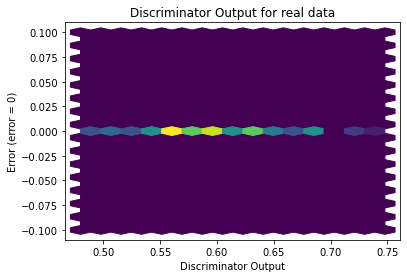

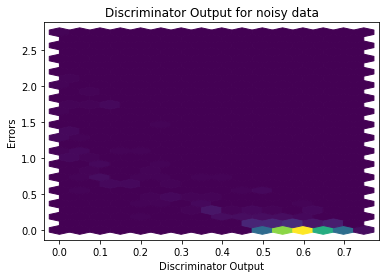

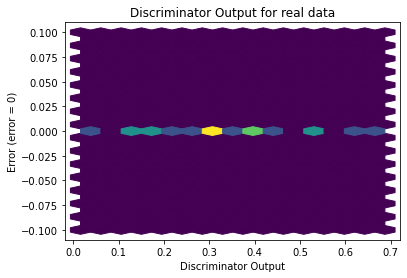

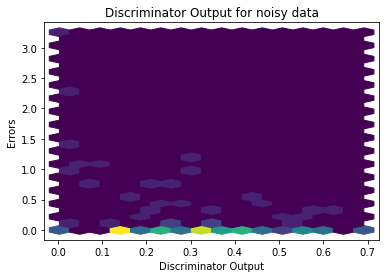

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)